In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from sklearn.feature_selection import RFECV 
from sklearn.linear_model import LinearRegression
import category_encoders as ce
from category_encoders.target_encoder import TargetEncoder

In [3]:
from scipy import stats

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Input,InputLayer
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [5]:
df1 = pd.read_csv('E:\\My files\\Dr Buzna\\trips\\NN\\real_distance\\tripdf_ps_sps.csv', index_col=0)
df2 = pd.read_csv('E:\\My files\\Dr Buzna\\trips\\NN\\real_distance\\tripdf1_ps_sps.csv', index_col=0)
df1 = df1.drop(['4d ranked','5th ranked','6th ranked','4rd dist','5th dist','6th dist'],axis=1)
df1['hr_sin'] = np.sin(df1['hour of day']*(2.*np.pi/24))
df1['hr_cos'] = np.cos(df1['hour of day']*(2.*np.pi/24))
print(df1.shape)
df1.head(5)

(7613, 11)


travel time   distance  hour of day 1st ranked   2nd ranked    3rd ranked  \
0         1562  19784.000           17    primary     tertiary  unclassified   
1         1247  18663.286           23    primary     tertiary   residential   
2          823  11453.273            6    primary     tertiary  primary_link   
3         1066  14463.104           14    primary     tertiary       service   
4          665  10011.876           17    primary  residential      tertiary   

   1st dist  2nd dist  3rd dist    hr_sin        hr_cos  
0  0.898625  0.045157  0.036173 -0.965926 -2.588190e-01  
1  0.881608  0.048556  0.037621 -0.258819  9.659258e-01  
2  0.835209  0.098678  0.033588  1.000000  6.123234e-17  
3  0.695410  0.245933  0.026378 -0.500000 -8.660254e-01  
4  0.829429  0.103264  0.067307 -0.965926 -2.588190e-01

In [6]:
print(df2.shape)
df2.head(5)

(7613, 19)


travel time   distance  hour of day  living_street  motorway  \
0         1562  19784.000           17            0.0       0.0   
1         1247  18663.286           23            0.0       0.0   
2          823  11453.273            6            0.0       0.0   
3         1066  14463.104           14            0.0       0.0   
4          665  10011.876           17            0.0       0.0   

   motorway_link    primary  primary_link  residential  road  secondary  \
0            0.0  17778.401       396.576        0.000   0.0        0.0   
1            0.0  16453.699       601.240      702.134   0.0        0.0   
2            0.0   9565.882       384.698       81.136   0.0        0.0   
3            0.0  10057.793       152.983      270.947   0.0        0.0   
4            0.0   8304.143         0.000     1033.862   0.0        0.0   

   secondary_link  service  tertiary  track  trunk  trunk_link  unclassified  \
0             0.0    0.000   893.382    0.0    0.0         0.0       715.641   
1             0.0    0.000   906.213    0.0    0.0         0.0         0.000   
2             0.0  188.852  1130.185    0.0    0.0         0.0       102.520   
3             0.0  381.502  3556.950    0.0    0.0         0.0        42.929   
4             0.0    0.000   673.871    0.0    0.0         0.0         0.000   

   others  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7613 entries, 0 to 7612
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   travel time     7613 non-null   int64  
 1   distance        7613 non-null   float64
 2   hour of day     7613 non-null   int64  
 3   living_street   7613 non-null   float64
 4   motorway        7613 non-null   float64
 5   motorway_link   7613 non-null   float64
 6   primary         7613 non-null   float64
 7   primary_link    7613 non-null   float64
 8   residential     7613 non-null   float64
 9   road            7613 non-null   float64
 10  secondary       7613 non-null   float64
 11  secondary_link  7613 non-null   float64
 12  service         7613 non-null   float64
 13  tertiary        7613 non-null   float64
 14  track           7613 non-null   float64
 15  trunk           7613 non-null   float64
 16  trunk_link      7613 non-null   float64
 17  unclassified    7613 non-null   f

In [8]:
# df0 = pd.merge(df1,df2, on=['travel time','distance','hour of day'])
# df0.shape
# df0

In [9]:
df3 = pd.read_csv('E:\\My files\\Dr Buzna\\trips\\NN\\dijk_distance\\tripdf_ps_sps.csv', index_col=0)
print(df3.shape)
df3.head()

(7492, 6)


travel time  hour of day   distance   est_dist  similarity  similarity_dijk
0          823            6  11453.273   9875.124    0.682353         0.878788
1         1066           14  14463.104  15713.106    0.734375         0.734375
2          665           17  10011.876   9537.444    0.718310         0.796875
3         1053           21  13655.761  11554.068    0.563107         0.725000
4         1936            5  42682.694  42900.152    0.719828         0.716738

In [10]:
df1 = pd.merge(df3,df1, on = ['travel time','distance','hour of day'])
df2 = pd.merge(df3,df2, on = ['travel time','distance','hour of day'])
df2

travel time  hour of day   distance   est_dist  similarity  \
0             823            6  11453.273   9875.124    0.682353   
1            1066           14  14463.104  15713.106    0.734375   
2             665           17  10011.876   9537.444    0.718310   
3            1053           21  13655.761  11554.068    0.563107   
4            1936            5  42682.694  42900.152    0.719828   
...           ...          ...        ...        ...         ...   
7487          945           18  15008.896  14416.353    0.500000   
7488          935           10  13358.373  14205.734    0.494737   
7489         1122           16  13258.039  11894.576    0.306122   
7490         1285           19  22855.665  21897.951    0.641026   
7491          499           20   6495.842   6117.602    0.441860   

      similarity_dijk  living_street  motorway  motorway_link    primary  ...  \
0            0.878788            0.0       0.0            0.0   9565.882  ...   
1            0.734375            0.0       0.0            0.0  10057.793  ...   
2            0.796875            0.0       0.0            0.0   8304.143  ...   
3            0.725000            0.0       0.0            0.0  10417.651  ...   
4            0.716738            0.0       0.0            0.0  39735.437  ...   
...               ...            ...       ...            ...        ...  ...   
7487         0.523077            0.0       0.0            0.0   8979.961  ...   
7488         0.456311            0.0       0.0            0.0  11132.470  ...   
7489         0.312500            0.0       0.0            0.0   9557.675  ...   
7490         0.663717            0.0       0.0            0.0  18316.769  ...   
7491         0.475000            0.0       0.0            0.0   2166.255  ...   

      road  secondary  secondary_link  service  tertiary  track  trunk  \
0      0.0      0.000             0.0  188.852  1130.185    0.0    0.0   
1      0.0      0.000             0.0  381.502  3556.950    0.0    0.0   
2      0.0      0.000             0.0    0.000   673.871    0.0    0.0   
3      0.0      0.000             0.0  835.884  1437.041    0.0    0.0   
4      0.0   1266.655             0.0   29.222  1380.763    0.0    0.0   
...    ...        ...             ...      ...       ...    ...    ...   
7487   0.0      0.000             0.0    0.000  5127.448    0.0    0.0   
7488   0.0      0.000             0.0    0.000   486.506    0.0    0.0   
7489   0.0      0.000             0.0  148.002   873.939    0.0    0.0   
7490   0.0    759.010             0.0   49.571  2905.730    0.0    0.0   
7491   0.0      0.000             0.0    0.000  3149.586    0.0    0.0   

      trunk_link  unclassified  others  
0            0.0       102.520     0.0  
1            0.0        42.929     0.0  
2            0.0         0.000     0.0  
3            0.0       450.567     0.0  
4            0.0         0.000     0.0  
...          ...           ...     ...  
7487         0.0         0.000     0.0  
7488         0.0         0.000     0.0  
7489         0.0         0.000     0.0  
7490         0.0         0.000     0.0  
7491         0.0         0.000     0.0  

[7492 rows x 22 columns]

In [11]:
# # category reduction
# option = ['residential','tertiary','primary']
# df_merged.loc[~df_merged['1st ranked'].isin(option),'1st ranked'] = 'others1'
# option = ['residential','tertiary','secondary','not']
# df_merged.loc[~df_merged['2nd ranked'].isin(option),'2nd ranked'] = 'others2'
# option = ['residential','tertiary','not']
# df_merged.loc[~df_merged['3rd ranked'].isin(option),'3rd ranked'] = 'others3'

In [12]:
# # feature (mean) encoding
# te = TargetEncoder()
# df_merged['1st ranked'] = te.fit_transform(df_merged['1st ranked'],df_merged['travel time'])
# df_merged['2nd ranked'] = te.fit_transform(df_merged['2nd ranked'],df_merged['travel time'])
# df_merged['3rd ranked'] = te.fit_transform(df_merged['3rd ranked'],df_merged['travel time'])
# print(df_merged.shape)
# df_merged.iloc[1:5,2:]


In [13]:
# outlier removal
from scipy import stats
df1 = df1[(np.abs(stats.zscore(df1['distance'])) < 3)]
df2 = df2[(np.abs(stats.zscore(df2['distance'])) < 3)]
df1

travel time  hour of day   distance   est_dist  similarity  \
0             823            6  11453.273   9875.124    0.682353   
1            1066           14  14463.104  15713.106    0.734375   
2             665           17  10011.876   9537.444    0.718310   
3            1053           21  13655.761  11554.068    0.563107   
5            1441           22  11668.050  13089.102    0.610526   
...           ...          ...        ...        ...         ...   
7487          945           18  15008.896  14416.353    0.500000   
7488          935           10  13358.373  14205.734    0.494737   
7489         1122           16  13258.039  11894.576    0.306122   
7490         1285           19  22855.665  21897.951    0.641026   
7491          499           20   6495.842   6117.602    0.441860   

      similarity_dijk 1st ranked   2nd ranked    3rd ranked  1st dist  \
0            0.878788    primary     tertiary  primary_link  0.835209   
1            0.734375    primary     tertiary       service  0.695410   
2            0.796875    primary  residential      tertiary  0.829429   
3            0.725000    primary     tertiary       service  0.762876   
5            0.623656    primary  residential      tertiary  0.711699   
...               ...        ...          ...           ...       ...   
7487         0.523077    primary     tertiary   residential  0.598309   
7488         0.456311    primary  residential  primary_link  0.833370   
7489         0.312500    primary  residential      tertiary  0.720897   
7490         0.663717    primary     tertiary   residential  0.801410   
7491         0.475000   tertiary      primary   residential  0.484862   

      2nd dist  3rd dist    hr_sin        hr_cos  
0     0.098678  0.033588  1.000000  6.123234e-17  
1     0.245933  0.026378 -0.500000 -8.660254e-01  
2     0.103264  0.067307 -0.965926 -2.588190e-01  
3     0.105233  0.061211 -0.707107  7.071068e-01  
5     0.201618  0.086683 -0.500000  8.660254e-01  
...        ...       ...       ...           ...  
7487  0.341627  0.060064 -1.000000 -1.836970e-16  
7488  0.079986  0.050224  0.500000 -8.660254e-01  
7489  0.168790  0.065918 -0.866025 -5.000000e-01  
7490  0.127134  0.036078 -0.965926  2.588190e-01  
7491  0.333483  0.181655 -0.866025  5.000000e-01  

[7406 rows x 14 columns]

In [14]:
# # standardization
# from sklearn import preprocessing
# min_max = preprocessing.MinMaxScaler()
# scaled_df = min_max.fit_transform(df_merged.iloc[:,2:3].values)
# df = pd.DataFrame(scaled_df,columns=df_merged.columns[2:3])

In [15]:
# Normalize using Min/Max Normalization.
normalized_distance2=(df1['distance']-df1['distance'].min())/(df1['distance'].max()-df1['distance'].min())
normalized_distance22=(df2['distance']-df2['distance'].min())/(df2['distance'].max()-df2['distance'].min())

normalized_distance3=(df1['est_dist']-df1['est_dist'].min())/(df1['est_dist'].max()-df1['est_dist'].min())
normalized_distance33=(df2['est_dist']-df2['est_dist'].min())/(df2['est_dist'].max()-df2['est_dist'].min())

In [16]:
df1['distance'] = normalized_distance2
df2['distance'] = normalized_distance22

df1['est_dist'] = normalized_distance3
df2['est_dist'] = normalized_distance33

display(df1.head(2))
display(df2.head(2))

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0          823            6  0.358222  0.256935    0.682353         0.878788   
1         1066           14  0.453845  0.408831    0.734375         0.734375   

  1st ranked 2nd ranked    3rd ranked  1st dist  2nd dist  3rd dist  hr_sin  \
0    primary   tertiary  primary_link  0.835209  0.098678  0.033588     1.0   
1    primary   tertiary       service  0.695410  0.245933  0.026378    -0.5   

         hr_cos  
0  6.123234e-17  
1 -8.660254e-01

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0          823            6  0.358222  0.256935    0.682353         0.878788   
1         1066           14  0.453845  0.408831    0.734375         0.734375   

   living_street  motorway  motorway_link    primary  ...  road  secondary  \
0            0.0       0.0            0.0   9565.882  ...   0.0        0.0   
1            0.0       0.0            0.0  10057.793  ...   0.0        0.0   

   secondary_link  service  tertiary  track  trunk  trunk_link  unclassified  \
0             0.0  188.852  1130.185    0.0    0.0         0.0       102.520   
1             0.0  381.502  3556.950    0.0    0.0         0.0        42.929   

   others  
0     0.0  
1     0.0  

[2 rows x 22 columns]

# NN-based modeling

In [17]:
# fix random seed for reproducibility
#The specific seed value does not matter as long as it stays the same for each run of your code, it could be 1,2,3,...
np.random.seed(7)

In [18]:
def nnmodel(*num_neuron,num_hlayers,Epoch):

    if num_hlayers == 1:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(1))
    else:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(num_neuron[1], activation='relu'))
        model.add(Dense(1))
    # model.compile(loss='mse', optimizer='adam')
    learning_rate = 0.5
    model.compile(optimizer='adam',
                  loss=tf.keras.metrics.mean_squared_error,
                  metrics=['mape',tf.keras.metrics.RootMeanSquaredError(name='rmse')])
    history = model.fit(X_train, y_train, verbose=1, epochs=Epoch,
                       validation_data=(X_test, y_test))  
    print('minimum testing RMSE: ',min(history.history['val_rmse'])/60)
    print('minimum testing MAPE: ',min(history.history['val_mape'])/100)
    
    return history

In [19]:
def nnmodel_(*num_neuron,num_hlayers,Epoch):

    if num_hlayers == 1:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(1))
    elif num_hlayers == 2:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(num_neuron[1], activation='relu'))
        model.add(Dense(1))
    else:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(num_neuron[1], activation='relu'))
        model.add(Dense(num_neuron[2], activation='relu'))
        model.add(Dense(1))        
    # model.compile(loss='mse', optimizer='adam')
    learning_rate = 0.5
    model.compile(optimizer='adam',
                  loss=tf.keras.metrics.mean_squared_error,
                  metrics=['mape',tf.keras.metrics.RootMeanSquaredError(name='rmse')])
    X_train0 = tf.convert_to_tensor(X_train,dtype = tf.float32)
    y_train0 = tf.convert_to_tensor(y_train,dtype = tf.float32)
    X_test0 = tf.convert_to_tensor(X_test,dtype = tf.float32)
    y_test0 = tf.convert_to_tensor(y_test,dtype = tf.float32)
    history = model.fit(X_train0, y_train0, verbose=1, epochs=Epoch,
                       validation_data=(X_test0, y_test0)) 
    print('minimum testing RMSE: ',min(history.history['val_rmse'])/60)
    print('minimum testing MAPE: ',min(history.history['val_mape'])/100)
    
    return history

In [20]:
def plotme(model):

    # Plot the training and validation accuracy and loss at each epoch
    loss1 = [f/60 for f in model.history['rmse']]
    val_loss1 = [f/60 for f in model.history['val_rmse']]
    loss2 = model.history['mape']
    val_loss2 = model.history['val_mape']
    epochs = range(1, len(model.history['loss'])+1)
    plt.figure(figsize=(5, 3))
    plt.plot(epochs, val_loss1, 'r', label='Validation rmse')
    plt.plot(epochs, loss1, 'y', label='Trainnig rmse')
    plt.plot(epochs, val_loss2, 'k', label='Validation mape')
    plt.plot(epochs, loss2, 'b', label='Trainnig mape')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    #plt.xlim(lims)
    yli = max(model.history['val_mape'])
    plt.ylim([-1, yli+10])
    plt.legend()
    plt.show()

## sub-problem 1:     ******* input:distance *********

In [21]:
my_df = df1[['travel time','est_dist']]
my_df.head(3)

travel time  est_dist
0          823  0.256935
1         1066  0.408831
2          665  0.248150

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

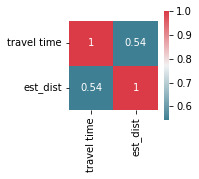

In [22]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(2,2))
corr = my_df.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [23]:
x = np.array(df1[['est_dist']])
y = np.array(df1['travel time'])
# x

In [24]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
print(X_train.shape)
print(X_test.shape)
# X_train

(5924, 1)
(1482, 1)


In [26]:
# inputs: distance
model1_1 = nnmodel(5, num_hlayers=1,Epoch=500)
model1_1

Epoch 1/500
186/186 [==============================] - 0s 1ms/step - loss: 1236906.7500 - mape: 99.9885 - rmse: 1112.1631 - val_loss: 1232430.0000 - val_mape: 99.9767 - val_rmse: 1110.1487
Epoch 2/500
186/186 [==============================] - 0s 861us/step - loss: 1236534.1250 - mape: 99.9651 - rmse: 1111.9956 - val_loss: 1232058.2500 - val_mape: 99.9534 - val_rmse: 1109.9812
Epoch 3/500
186/186 [==============================] - 0s 752us/step - loss: 1236162.1250 - mape: 99.9417 - rmse: 1111.8282 - val_loss: 1231687.0000 - val_mape: 99.9301 - val_rmse: 1109.8140
Epoch 4/500
186/186 [==============================] - 0s 779us/step - loss: 1235790.3750 - mape: 99.9185 - rmse: 1111.6611 - val_loss: 1231316.2500 - val_mape: 99.9069 - val_rmse: 1109.6469
Epoch 5/500
186/186 [==============================] - 0s 811us/step - loss: 1235419.7500 - mape: 99.8951 - rmse: 1111.4944 - val_loss: 1230945.8750 - val_mape: 99.8837 - val_rmse: 1109.4800
Epoch 6/500
186/186 [==========================

Epoch 44/500
186/186 [==============================] - 0s 777us/step - loss: 1220990.3750 - mape: 98.9863 - rmse: 1104.9844 - val_loss: 1216541.2500 - val_mape: 98.9774 - val_rmse: 1102.9692
Epoch 45/500
186/186 [==============================] - 0s 665us/step - loss: 1220621.8750 - mape: 98.9631 - rmse: 1104.8176 - val_loss: 1216173.1250 - val_mape: 98.9542 - val_rmse: 1102.8024
Epoch 46/500
186/186 [==============================] - 0s 870us/step - loss: 1220253.8750 - mape: 98.9398 - rmse: 1104.6510 - val_loss: 1215805.6250 - val_mape: 98.9310 - val_rmse: 1102.6357
Epoch 47/500
186/186 [==============================] - 0s 713us/step - loss: 1219886.0000 - mape: 98.9165 - rmse: 1104.4845 - val_loss: 1215438.1250 - val_mape: 98.9077 - val_rmse: 1102.4691
Epoch 48/500
186/186 [==============================] - 0s 715us/step - loss: 1219517.6250 - mape: 98.8934 - rmse: 1104.3177 - val_loss: 1215070.8750 - val_mape: 98.8846 - val_rmse: 1102.3025
Epoch 49/500
186/186 [==================

Epoch 87/500
186/186 [==============================] - 0s 749us/step - loss: 1205205.0000 - mape: 97.9846 - rmse: 1097.8182 - val_loss: 1200783.1250 - val_mape: 97.9784 - val_rmse: 1095.8025
Epoch 88/500
186/186 [==============================] - 0s 637us/step - loss: 1204839.5000 - mape: 97.9612 - rmse: 1097.6519 - val_loss: 1200417.7500 - val_mape: 97.9552 - val_rmse: 1095.6357
Epoch 89/500
186/186 [==============================] - 0s 654us/step - loss: 1204472.8750 - mape: 97.9380 - rmse: 1097.4847 - val_loss: 1200051.8750 - val_mape: 97.9319 - val_rmse: 1095.4688
Epoch 90/500
186/186 [==============================] - 0s 637us/step - loss: 1204107.5000 - mape: 97.9147 - rmse: 1097.3184 - val_loss: 1199687.3750 - val_mape: 97.9087 - val_rmse: 1095.3024
Epoch 91/500
186/186 [==============================] - 0s 715us/step - loss: 1203742.2500 - mape: 97.8913 - rmse: 1097.1519 - val_loss: 1199322.2500 - val_mape: 97.8854 - val_rmse: 1095.1357
Epoch 92/500
186/186 [==================

186/186 [==============================] - 0s 713us/step - loss: 1189910.3750 - mape: 97.0063 - rmse: 1090.8301 - val_loss: 1185514.0000 - val_mape: 97.0027 - val_rmse: 1088.8131
Epoch 130/500
186/186 [==============================] - 0s 787us/step - loss: 1189548.1250 - mape: 96.9827 - rmse: 1090.6641 - val_loss: 1185151.8750 - val_mape: 96.9795 - val_rmse: 1088.6469
Epoch 131/500
186/186 [==============================] - 0s 752us/step - loss: 1189186.2500 - mape: 96.9596 - rmse: 1090.4982 - val_loss: 1184790.7500 - val_mape: 96.9563 - val_rmse: 1088.4810
Epoch 132/500
186/186 [==============================] - 0s 778us/step - loss: 1188823.2500 - mape: 96.9363 - rmse: 1090.3317 - val_loss: 1184428.1250 - val_mape: 96.9330 - val_rmse: 1088.3143
Epoch 133/500
186/186 [==============================] - 0s 730us/step - loss: 1188460.5000 - mape: 96.9132 - rmse: 1090.1654 - val_loss: 1184066.6250 - val_mape: 96.9098 - val_rmse: 1088.1483
Epoch 134/500
186/186 [==========================

186/186 [==============================] - 0s 760us/step - loss: 1174739.8750 - mape: 96.0279 - rmse: 1083.8541 - val_loss: 1170369.1250 - val_mape: 96.0272 - val_rmse: 1081.8359
Epoch 172/500
186/186 [==============================] - 0s 711us/step - loss: 1174379.1250 - mape: 96.0048 - rmse: 1083.6877 - val_loss: 1170009.3750 - val_mape: 96.0039 - val_rmse: 1081.6697
Epoch 173/500
186/186 [==============================] - 0s 679us/step - loss: 1174019.0000 - mape: 95.9813 - rmse: 1083.5216 - val_loss: 1169649.8750 - val_mape: 95.9806 - val_rmse: 1081.5035
Epoch 174/500
186/186 [==============================] - 0s 698us/step - loss: 1173659.2500 - mape: 95.9580 - rmse: 1083.3556 - val_loss: 1169291.0000 - val_mape: 95.9574 - val_rmse: 1081.3376
Epoch 175/500
186/186 [==============================] - 0s 681us/step - loss: 1173299.6250 - mape: 95.9348 - rmse: 1083.1896 - val_loss: 1168931.2500 - val_mape: 95.9341 - val_rmse: 1081.1713
Epoch 176/500
186/186 [==========================

186/186 [==============================] - 0s 707us/step - loss: 1159689.2500 - mape: 95.0497 - rmse: 1076.8887 - val_loss: 1155344.3750 - val_mape: 95.0515 - val_rmse: 1074.8695
Epoch 214/500
186/186 [==============================] - 0s 694us/step - loss: 1159332.2500 - mape: 95.0264 - rmse: 1076.7229 - val_loss: 1154988.6250 - val_mape: 95.0284 - val_rmse: 1074.7040
Epoch 215/500
186/186 [==============================] - 0s 735us/step - loss: 1158974.8750 - mape: 95.0032 - rmse: 1076.5570 - val_loss: 1154632.2500 - val_mape: 95.0051 - val_rmse: 1074.5382
Epoch 216/500
186/186 [==============================] - 0s 660us/step - loss: 1158618.5000 - mape: 94.9798 - rmse: 1076.3915 - val_loss: 1154276.6250 - val_mape: 94.9819 - val_rmse: 1074.3727
Epoch 217/500
186/186 [==============================] - 0s 816us/step - loss: 1158262.3750 - mape: 94.9567 - rmse: 1076.2260 - val_loss: 1153920.5000 - val_mape: 94.9587 - val_rmse: 1074.2069
Epoch 218/500
186/186 [==========================

186/186 [==============================] - 0s 722us/step - loss: 1144761.5000 - mape: 94.0717 - rmse: 1069.9353 - val_loss: 1140442.2500 - val_mape: 94.0761 - val_rmse: 1067.9149
Epoch 256/500
186/186 [==============================] - 0s 822us/step - loss: 1144407.2500 - mape: 94.0484 - rmse: 1069.7698 - val_loss: 1140089.3750 - val_mape: 94.0529 - val_rmse: 1067.7496
Epoch 257/500
186/186 [==============================] - 0s 779us/step - loss: 1144053.1250 - mape: 94.0251 - rmse: 1069.6042 - val_loss: 1139736.1250 - val_mape: 94.0296 - val_rmse: 1067.5842
Epoch 258/500
186/186 [==============================] - 0s 704us/step - loss: 1143699.7500 - mape: 94.0017 - rmse: 1069.4390 - val_loss: 1139383.2500 - val_mape: 94.0064 - val_rmse: 1067.4189
Epoch 259/500
186/186 [==============================] - 0s 735us/step - loss: 1143345.7500 - mape: 93.9785 - rmse: 1069.2734 - val_loss: 1139029.3750 - val_mape: 93.9832 - val_rmse: 1067.2532
Epoch 260/500
186/186 [==========================

186/186 [==============================] - 0s 681us/step - loss: 1129953.0000 - mape: 93.0935 - rmse: 1062.9924 - val_loss: 1125661.1250 - val_mape: 93.1006 - val_rmse: 1060.9718
Epoch 298/500
186/186 [==============================] - 0s 683us/step - loss: 1129602.3750 - mape: 93.0703 - rmse: 1062.8275 - val_loss: 1125311.5000 - val_mape: 93.0774 - val_rmse: 1060.8070
Epoch 299/500
186/186 [==============================] - 0s 638us/step - loss: 1129251.5000 - mape: 93.0469 - rmse: 1062.6625 - val_loss: 1124960.6250 - val_mape: 93.0542 - val_rmse: 1060.6416
Epoch 300/500
186/186 [==============================] - 0s 699us/step - loss: 1128900.5000 - mape: 93.0236 - rmse: 1062.4973 - val_loss: 1124609.6250 - val_mape: 93.0309 - val_rmse: 1060.4761
Epoch 301/500
186/186 [==============================] - 0s 718us/step - loss: 1128549.3750 - mape: 93.0002 - rmse: 1062.3320 - val_loss: 1124259.8750 - val_mape: 93.0077 - val_rmse: 1060.3112
Epoch 302/500
186/186 [==========================

186/186 [==============================] - 0s 746us/step - loss: 1115267.8750 - mape: 92.1152 - rmse: 1056.0625 - val_loss: 1111001.0000 - val_mape: 92.1252 - val_rmse: 1054.0403
Epoch 340/500
186/186 [==============================] - 0s 744us/step - loss: 1114919.3750 - mape: 92.0920 - rmse: 1055.8975 - val_loss: 1110653.6250 - val_mape: 92.1020 - val_rmse: 1053.8755
Epoch 341/500
186/186 [==============================] - 0s 701us/step - loss: 1114572.2500 - mape: 92.0687 - rmse: 1055.7330 - val_loss: 1110307.7500 - val_mape: 92.0788 - val_rmse: 1053.7114
Epoch 342/500
186/186 [==============================] - 0s 733us/step - loss: 1114224.5000 - mape: 92.0455 - rmse: 1055.5684 - val_loss: 1109960.6250 - val_mape: 92.0556 - val_rmse: 1053.5466
Epoch 343/500
186/186 [==============================] - 0s 720us/step - loss: 1113875.5000 - mape: 92.0220 - rmse: 1055.4030 - val_loss: 1109612.0000 - val_mape: 92.0323 - val_rmse: 1053.3812
Epoch 344/500
186/186 [==========================

186/186 [==============================] - 0s 747us/step - loss: 1100706.1250 - mape: 91.1374 - rmse: 1049.1454 - val_loss: 1096466.2500 - val_mape: 91.1500 - val_rmse: 1047.1228
Epoch 382/500
186/186 [==============================] - 0s 734us/step - loss: 1100361.1250 - mape: 91.1142 - rmse: 1048.9810 - val_loss: 1096121.3750 - val_mape: 91.1268 - val_rmse: 1046.9581
Epoch 383/500
186/186 [==============================] - 0s 766us/step - loss: 1100015.3750 - mape: 91.0908 - rmse: 1048.8162 - val_loss: 1095775.7500 - val_mape: 91.1035 - val_rmse: 1046.7931
Epoch 384/500
186/186 [==============================] - 0s 737us/step - loss: 1099669.3750 - mape: 91.0675 - rmse: 1048.6512 - val_loss: 1095432.3750 - val_mape: 91.0804 - val_rmse: 1046.6290
Epoch 385/500
186/186 [==============================] - 0s 730us/step - loss: 1099324.7500 - mape: 91.0442 - rmse: 1048.4869 - val_loss: 1095086.8750 - val_mape: 91.0571 - val_rmse: 1046.4640
Epoch 386/500
186/186 [==========================

186/186 [==============================] - 0s 746us/step - loss: 1086268.1250 - mape: 90.1598 - rmse: 1042.2418 - val_loss: 1082054.0000 - val_mape: 90.1750 - val_rmse: 1040.2183
Epoch 424/500
186/186 [==============================] - 0s 746us/step - loss: 1085924.8750 - mape: 90.1365 - rmse: 1042.0771 - val_loss: 1081711.8750 - val_mape: 90.1517 - val_rmse: 1040.0538
Epoch 425/500
186/186 [==============================] - 0s 727us/step - loss: 1085582.7500 - mape: 90.1131 - rmse: 1041.9130 - val_loss: 1081370.1250 - val_mape: 90.1285 - val_rmse: 1039.8895
Epoch 426/500
186/186 [==============================] - 0s 761us/step - loss: 1085240.1250 - mape: 90.0899 - rmse: 1041.7485 - val_loss: 1081028.6250 - val_mape: 90.1053 - val_rmse: 1039.7252
Epoch 427/500
186/186 [==============================] - 0s 751us/step - loss: 1084898.1250 - mape: 90.0665 - rmse: 1041.5845 - val_loss: 1080686.0000 - val_mape: 90.0820 - val_rmse: 1039.5604
Epoch 428/500
186/186 [==========================

186/186 [==============================] - 0s 710us/step - loss: 1071945.5000 - mape: 89.1818 - rmse: 1035.3480 - val_loss: 1067758.0000 - val_mape: 89.1997 - val_rmse: 1033.3237
Epoch 466/500
186/186 [==============================] - 0s 759us/step - loss: 1071606.5000 - mape: 89.1585 - rmse: 1035.1843 - val_loss: 1067419.5000 - val_mape: 89.1765 - val_rmse: 1033.1599
Epoch 467/500
186/186 [==============================] - 0s 699us/step - loss: 1071267.2500 - mape: 89.1353 - rmse: 1035.0204 - val_loss: 1067081.0000 - val_mape: 89.1533 - val_rmse: 1032.9961
Epoch 468/500
186/186 [==============================] - 0s 693us/step - loss: 1070928.5000 - mape: 89.1122 - rmse: 1034.8568 - val_loss: 1066742.8750 - val_mape: 89.1301 - val_rmse: 1032.8324
Epoch 469/500
186/186 [==============================] - 0s 753us/step - loss: 1070589.5000 - mape: 89.0886 - rmse: 1034.6930 - val_loss: 1066403.6250 - val_mape: 89.1068 - val_rmse: 1032.6682
Epoch 470/500
186/186 [==========================

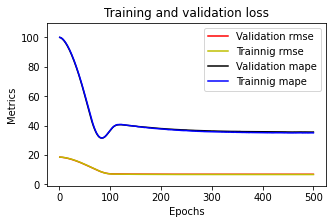

In [26]:
plotme(model1_1)

In [27]:
# inputs: distance
model1_2 = nnmodel(10, num_hlayers=1,Epoch=500)
model1_2

Epoch 1/500
186/186 [==============================] - 0s 1ms/step - loss: 1236527.5000 - mape: 99.9679 - rmse: 1111.9926 - val_loss: 1231662.0000 - val_mape: 99.9362 - val_rmse: 1109.8027
Epoch 2/500
186/186 [==============================] - 0s 734us/step - loss: 1235342.2500 - mape: 99.9015 - rmse: 1111.4595 - val_loss: 1230399.0000 - val_mape: 99.8625 - val_rmse: 1109.2335
Epoch 3/500
186/186 [==============================] - 0s 695us/step - loss: 1233886.8750 - mape: 99.8165 - rmse: 1110.8046 - val_loss: 1228762.0000 - val_mape: 99.7666 - val_rmse: 1108.4954
Epoch 4/500
186/186 [==============================] - 0s 690us/step - loss: 1232046.6250 - mape: 99.7103 - rmse: 1109.9760 - val_loss: 1226740.3750 - val_mape: 99.6482 - val_rmse: 1107.5831
Epoch 5/500
186/186 [==============================] - 0s 805us/step - loss: 1229819.3750 - mape: 99.5794 - rmse: 1108.9722 - val_loss: 1224340.5000 - val_mape: 99.5075 - val_rmse: 1106.4993
Epoch 6/500
186/186 [==========================

Epoch 44/500
186/186 [==============================] - 0s 769us/step - loss: 967112.1875 - mape: 83.1621 - rmse: 983.4186 - val_loss: 959734.1250 - val_mape: 82.8923 - val_rmse: 979.6602
Epoch 45/500
186/186 [==============================] - 0s 777us/step - loss: 957520.1250 - mape: 82.5132 - rmse: 978.5296 - val_loss: 950184.0625 - val_mape: 82.2486 - val_rmse: 974.7739
Epoch 46/500
186/186 [==============================] - 0s 766us/step - loss: 947834.1875 - mape: 81.8591 - rmse: 973.5677 - val_loss: 940511.8750 - val_mape: 81.5926 - val_rmse: 969.7999
Epoch 47/500
186/186 [==============================] - 0s 782us/step - loss: 938070.3125 - mape: 81.1977 - rmse: 968.5403 - val_loss: 930763.7500 - val_mape: 80.9273 - val_rmse: 964.7610
Epoch 48/500
186/186 [==============================] - 0s 662us/step - loss: 928232.5000 - mape: 80.5231 - rmse: 963.4482 - val_loss: 920950.6875 - val_mape: 80.2533 - val_rmse: 959.6617
Epoch 49/500
186/186 [==============================] - 0s 7

186/186 [==============================] - 0s 777us/step - loss: 519128.7188 - mape: 48.3198 - rmse: 720.5059 - val_loss: 514682.9062 - val_mape: 47.8177 - val_rmse: 717.4141
Epoch 88/500
186/186 [==============================] - 0s 665us/step - loss: 509098.0000 - mape: 47.4284 - rmse: 713.5110 - val_loss: 504763.6875 - val_mape: 46.9255 - val_rmse: 710.4672
Epoch 89/500
186/186 [==============================] - 0s 642us/step - loss: 499134.6562 - mape: 46.5618 - rmse: 706.4946 - val_loss: 494931.3125 - val_mape: 46.0477 - val_rmse: 703.5135
Epoch 90/500
186/186 [==============================] - 0s 755us/step - loss: 489250.4062 - mape: 45.7022 - rmse: 699.4644 - val_loss: 485176.8750 - val_mape: 45.1818 - val_rmse: 696.5464
Epoch 91/500
186/186 [==============================] - 0s 760us/step - loss: 479448.5312 - mape: 44.8466 - rmse: 692.4222 - val_loss: 475480.1250 - val_mape: 44.3220 - val_rmse: 689.5507
Epoch 92/500
186/186 [==============================] - 0s 760us/step - l

186/186 [==============================] - 0s 795us/step - loss: 208283.4844 - mape: 33.1600 - rmse: 456.3809 - val_loss: 210335.5312 - val_mape: 33.0372 - val_rmse: 458.6235
Epoch 131/500
186/186 [==============================] - 0s 760us/step - loss: 205035.8438 - mape: 33.4435 - rmse: 452.8088 - val_loss: 207239.1094 - val_mape: 33.3107 - val_rmse: 455.2352
Epoch 132/500
186/186 [==============================] - 0s 760us/step - loss: 201976.0312 - mape: 33.7252 - rmse: 449.4174 - val_loss: 204343.2812 - val_mape: 33.6001 - val_rmse: 452.0435
Epoch 133/500
186/186 [==============================] - 0s 759us/step - loss: 199134.3594 - mape: 34.0381 - rmse: 446.2447 - val_loss: 201637.3125 - val_mape: 33.8995 - val_rmse: 449.0404
Epoch 134/500
186/186 [==============================] - 0s 703us/step - loss: 196469.8281 - mape: 34.3461 - rmse: 443.2492 - val_loss: 199133.3438 - val_mape: 34.2097 - val_rmse: 446.2436
Epoch 135/500
186/186 [==============================] - 0s 685us/ste

186/186 [==============================] - 0s 706us/step - loss: 171738.1719 - mape: 40.8284 - rmse: 414.4131 - val_loss: 176840.6719 - val_mape: 40.6813 - val_rmse: 420.5243
Epoch 174/500
186/186 [==============================] - 0s 678us/step - loss: 171609.2969 - mape: 40.8125 - rmse: 414.2575 - val_loss: 176735.5625 - val_mape: 40.6600 - val_rmse: 420.3993
Epoch 175/500
186/186 [==============================] - 0s 812us/step - loss: 171482.0000 - mape: 40.7817 - rmse: 414.1039 - val_loss: 176628.6250 - val_mape: 40.6386 - val_rmse: 420.2721
Epoch 176/500
186/186 [==============================] - 0s 783us/step - loss: 171356.5938 - mape: 40.7600 - rmse: 413.9524 - val_loss: 176526.1875 - val_mape: 40.6196 - val_rmse: 420.1502
Epoch 177/500
186/186 [==============================] - 0s 766us/step - loss: 171232.7500 - mape: 40.7630 - rmse: 413.8028 - val_loss: 176423.0938 - val_mape: 40.6203 - val_rmse: 420.0275
Epoch 178/500
186/186 [==============================] - 0s 626us/ste

186/186 [==============================] - 0s 700us/step - loss: 167067.9688 - mape: 39.4663 - rmse: 408.7395 - val_loss: 173039.0625 - val_mape: 39.5348 - val_rmse: 415.9796
Epoch 217/500
186/186 [==============================] - 0s 755us/step - loss: 166981.6562 - mape: 39.4072 - rmse: 408.6339 - val_loss: 172968.1719 - val_mape: 39.4960 - val_rmse: 415.8944
Epoch 218/500
186/186 [==============================] - 0s 784us/step - loss: 166891.7812 - mape: 39.3865 - rmse: 408.5239 - val_loss: 172900.0312 - val_mape: 39.4784 - val_rmse: 415.8125
Epoch 219/500
186/186 [==============================] - 0s 766us/step - loss: 166807.7969 - mape: 39.3914 - rmse: 408.4211 - val_loss: 172834.8281 - val_mape: 39.4553 - val_rmse: 415.7341
Epoch 220/500
186/186 [==============================] - 0s 754us/step - loss: 166722.3906 - mape: 39.3592 - rmse: 408.3165 - val_loss: 172767.6406 - val_mape: 39.4199 - val_rmse: 415.6533
Epoch 221/500
186/186 [==============================] - 0s 761us/ste

186/186 [==============================] - 0s 763us/step - loss: 164041.5938 - mape: 38.1891 - rmse: 405.0205 - val_loss: 170716.2812 - val_mape: 38.4205 - val_rmse: 413.1783
Epoch 260/500
186/186 [==============================] - 0s 763us/step - loss: 163986.3438 - mape: 38.1701 - rmse: 404.9523 - val_loss: 170676.6562 - val_mape: 38.3901 - val_rmse: 413.1303
Epoch 261/500
186/186 [==============================] - 0s 695us/step - loss: 163933.9844 - mape: 38.1257 - rmse: 404.8876 - val_loss: 170637.5781 - val_mape: 38.3578 - val_rmse: 413.0830
Epoch 262/500
186/186 [==============================] - 0s 789us/step - loss: 163881.1406 - mape: 38.1363 - rmse: 404.8224 - val_loss: 170602.1094 - val_mape: 38.3726 - val_rmse: 413.0401
Epoch 263/500
186/186 [==============================] - 0s 738us/step - loss: 163828.4531 - mape: 38.1038 - rmse: 404.7573 - val_loss: 170563.2188 - val_mape: 38.3395 - val_rmse: 412.9930
Epoch 264/500
186/186 [==============================] - 0s 755us/ste

186/186 [==============================] - 0s 718us/step - loss: 162247.6406 - mape: 37.2726 - rmse: 402.7997 - val_loss: 169474.3125 - val_mape: 37.6408 - val_rmse: 411.6726
Epoch 303/500
186/186 [==============================] - 0s 684us/step - loss: 162218.8906 - mape: 37.2467 - rmse: 402.7641 - val_loss: 169454.1875 - val_mape: 37.6114 - val_rmse: 411.6481
Epoch 304/500
186/186 [==============================] - 0s 800us/step - loss: 162188.1719 - mape: 37.2386 - rmse: 402.7259 - val_loss: 169435.1562 - val_mape: 37.5941 - val_rmse: 411.6250
Epoch 305/500
186/186 [==============================] - 0s 760us/step - loss: 162156.6562 - mape: 37.2197 - rmse: 402.6868 - val_loss: 169416.0469 - val_mape: 37.5772 - val_rmse: 411.6018
Epoch 306/500
186/186 [==============================] - 0s 756us/step - loss: 162128.5469 - mape: 37.1922 - rmse: 402.6519 - val_loss: 169397.2500 - val_mape: 37.5622 - val_rmse: 411.5790
Epoch 307/500
186/186 [==============================] - 0s 761us/ste

186/186 [==============================] - 0s 742us/step - loss: 161254.5000 - mape: 36.6144 - rmse: 401.5651 - val_loss: 168888.2188 - val_mape: 37.0209 - val_rmse: 410.9601
Epoch 346/500
186/186 [==============================] - 0s 716us/step - loss: 161238.2656 - mape: 36.5776 - rmse: 401.5449 - val_loss: 168879.9062 - val_mape: 36.9974 - val_rmse: 410.9500
Epoch 347/500
186/186 [==============================] - 0s 686us/step - loss: 161219.1250 - mape: 36.5897 - rmse: 401.5210 - val_loss: 168872.0156 - val_mape: 37.0022 - val_rmse: 410.9404
Epoch 348/500
186/186 [==============================] - 0s 661us/step - loss: 161205.1875 - mape: 36.5209 - rmse: 401.5037 - val_loss: 168863.3281 - val_mape: 36.9648 - val_rmse: 410.9298
Epoch 349/500
186/186 [==============================] - 0s 710us/step - loss: 161189.7344 - mape: 36.5162 - rmse: 401.4844 - val_loss: 168856.8906 - val_mape: 36.9789 - val_rmse: 410.9220
Epoch 350/500
186/186 [==============================] - 0s 705us/ste

186/186 [==============================] - 0s 795us/step - loss: 160731.7812 - mape: 36.0848 - rmse: 400.9137 - val_loss: 168662.6562 - val_mape: 36.5542 - val_rmse: 410.6856
Epoch 389/500
186/186 [==============================] - 0s 812us/step - loss: 160722.5938 - mape: 36.0457 - rmse: 400.9022 - val_loss: 168660.5938 - val_mape: 36.5571 - val_rmse: 410.6831
Epoch 390/500
186/186 [==============================] - 0s 760us/step - loss: 160713.9062 - mape: 36.0480 - rmse: 400.8914 - val_loss: 168657.5938 - val_mape: 36.5423 - val_rmse: 410.6794
Epoch 391/500
186/186 [==============================] - 0s 771us/step - loss: 160706.0781 - mape: 36.0621 - rmse: 400.8816 - val_loss: 168655.9062 - val_mape: 36.5461 - val_rmse: 410.6774
Epoch 392/500
186/186 [==============================] - 0s 645us/step - loss: 160701.4688 - mape: 36.0329 - rmse: 400.8759 - val_loss: 168654.5156 - val_mape: 36.5575 - val_rmse: 410.6757
Epoch 393/500
186/186 [==============================] - 0s 770us/ste

186/186 [==============================] - 0s 760us/step - loss: 160472.2500 - mape: 35.7632 - rmse: 400.5899 - val_loss: 168611.6406 - val_mape: 36.2799 - val_rmse: 410.6235
Epoch 432/500
186/186 [==============================] - 0s 769us/step - loss: 160466.0625 - mape: 35.7256 - rmse: 400.5822 - val_loss: 168609.7656 - val_mape: 36.2419 - val_rmse: 410.6212
Epoch 433/500
186/186 [==============================] - 0s 749us/step - loss: 160463.4531 - mape: 35.7176 - rmse: 400.5789 - val_loss: 168608.7969 - val_mape: 36.2170 - val_rmse: 410.6200
Epoch 434/500
186/186 [==============================] - 0s 786us/step - loss: 160456.8750 - mape: 35.6905 - rmse: 400.5707 - val_loss: 168608.3594 - val_mape: 36.2014 - val_rmse: 410.6195
Epoch 435/500
186/186 [==============================] - 0s 766us/step - loss: 160452.8594 - mape: 35.6737 - rmse: 400.5657 - val_loss: 168608.3594 - val_mape: 36.1969 - val_rmse: 410.6195
Epoch 436/500
186/186 [==============================] - 0s 773us/ste

186/186 [==============================] - 0s 797us/step - loss: 160340.3906 - mape: 35.4436 - rmse: 400.4253 - val_loss: 168624.9531 - val_mape: 35.9918 - val_rmse: 410.6397
Epoch 475/500
186/186 [==============================] - 0s 732us/step - loss: 160338.5156 - mape: 35.4286 - rmse: 400.4229 - val_loss: 168625.2969 - val_mape: 35.9758 - val_rmse: 410.6401
Epoch 476/500
186/186 [==============================] - 0s 775us/step - loss: 160336.8281 - mape: 35.4164 - rmse: 400.4208 - val_loss: 168626.0625 - val_mape: 35.9656 - val_rmse: 410.6411
Epoch 477/500
186/186 [==============================] - 0s 775us/step - loss: 160336.7500 - mape: 35.4178 - rmse: 400.4207 - val_loss: 168626.6875 - val_mape: 35.9564 - val_rmse: 410.6418
Epoch 478/500
186/186 [==============================] - 0s 771us/step - loss: 160332.9062 - mape: 35.4162 - rmse: 400.4159 - val_loss: 168628.1875 - val_mape: 35.9759 - val_rmse: 410.6436
Epoch 479/500
186/186 [==============================] - 0s 847us/ste

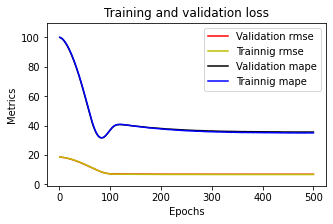

In [28]:
plotme(model1_2)

In [28]:
# inputs: distance
model1_3 = nnmodel(20, num_hlayers=1,Epoch=500)
model1_3

Epoch 1/500
186/186 [==============================] - 0s 1ms/step - loss: 1236671.5000 - mape: 99.9749 - rmse: 1112.0574 - val_loss: 1231814.6250 - val_mape: 99.9419 - val_rmse: 1109.8715
Epoch 2/500
186/186 [==============================] - 0s 738us/step - loss: 1235229.8750 - mape: 99.8916 - rmse: 1111.4089 - val_loss: 1229793.3750 - val_mape: 99.8240 - val_rmse: 1108.9604
Epoch 3/500
186/186 [==============================] - 0s 730us/step - loss: 1232342.0000 - mape: 99.7244 - rmse: 1110.1090 - val_loss: 1226084.0000 - val_mape: 99.6075 - val_rmse: 1107.2867
Epoch 4/500
186/186 [==============================] - 0s 757us/step - loss: 1227919.5000 - mape: 99.4664 - rmse: 1108.1152 - val_loss: 1221033.7500 - val_mape: 99.3118 - val_rmse: 1105.0039
Epoch 5/500
186/186 [==============================] - 0s 715us/step - loss: 1222260.7500 - mape: 99.1363 - rmse: 1105.5591 - val_loss: 1214833.0000 - val_mape: 98.9477 - val_rmse: 1102.1946
Epoch 6/500
186/186 [==========================

186/186 [==============================] - 0s 713us/step - loss: 595649.5625 - mape: 55.0475 - rmse: 771.7834 - val_loss: 586452.8750 - val_mape: 54.2302 - val_rmse: 765.8021
Epoch 45/500
186/186 [==============================] - 0s 727us/step - loss: 577331.0625 - mape: 53.4735 - rmse: 759.8231 - val_loss: 568377.2500 - val_mape: 52.6491 - val_rmse: 753.9080
Epoch 46/500
186/186 [==============================] - 0s 743us/step - loss: 559139.5625 - mape: 51.8522 - rmse: 747.7563 - val_loss: 550425.1875 - val_mape: 51.0530 - val_rmse: 741.9064
Epoch 47/500
186/186 [==============================] - 0s 724us/step - loss: 541188.2500 - mape: 50.2881 - rmse: 735.6550 - val_loss: 532743.8750 - val_mape: 49.4671 - val_rmse: 729.8931
Epoch 48/500
186/186 [==============================] - 0s 791us/step - loss: 523445.1875 - mape: 48.7228 - rmse: 723.4951 - val_loss: 515239.9062 - val_mape: 47.8921 - val_rmse: 717.8021
Epoch 49/500
186/186 [==============================] - 0s 707us/step - l

Epoch 88/500
186/186 [==============================] - 0s 678us/step - loss: 174958.5469 - mape: 39.6290 - rmse: 418.2805 - val_loss: 179414.4062 - val_mape: 39.5148 - val_rmse: 423.5734
Epoch 89/500
186/186 [==============================] - 0s 671us/step - loss: 174506.6250 - mape: 39.8708 - rmse: 417.7399 - val_loss: 179062.0156 - val_mape: 39.7736 - val_rmse: 423.1572
Epoch 90/500
186/186 [==============================] - 0s 795us/step - loss: 174140.6406 - mape: 40.1388 - rmse: 417.3016 - val_loss: 178765.0469 - val_mape: 40.0087 - val_rmse: 422.8062
Epoch 91/500
186/186 [==============================] - 0s 728us/step - loss: 173832.9375 - mape: 40.3127 - rmse: 416.9328 - val_loss: 178520.9062 - val_mape: 40.1821 - val_rmse: 422.5173
Epoch 92/500
186/186 [==============================] - 0s 727us/step - loss: 173564.7344 - mape: 40.4350 - rmse: 416.6110 - val_loss: 178302.6250 - val_mape: 40.3252 - val_rmse: 422.2589
Epoch 93/500
186/186 [==============================] - 0s 7

186/186 [==============================] - 0s 806us/step - loss: 166418.3438 - mape: 39.2028 - rmse: 407.9440 - val_loss: 172501.7344 - val_mape: 39.2730 - val_rmse: 415.3333
Epoch 132/500
186/186 [==============================] - 0s 803us/step - loss: 166280.4062 - mape: 39.1488 - rmse: 407.7749 - val_loss: 172394.4531 - val_mape: 39.2150 - val_rmse: 415.2041
Epoch 133/500
186/186 [==============================] - 0s 866us/step - loss: 166147.5938 - mape: 39.0706 - rmse: 407.6121 - val_loss: 172287.1719 - val_mape: 39.1563 - val_rmse: 415.0749
Epoch 134/500
186/186 [==============================] - 0s 786us/step - loss: 166010.7656 - mape: 39.0048 - rmse: 407.4442 - val_loss: 172185.3906 - val_mape: 39.1176 - val_rmse: 414.9523
Epoch 135/500
186/186 [==============================] - 0s 755us/step - loss: 165880.0312 - mape: 38.9577 - rmse: 407.2837 - val_loss: 172082.4062 - val_mape: 39.0623 - val_rmse: 414.8282
Epoch 136/500
186/186 [==============================] - 0s 773us/ste

186/186 [==============================] - 0s 758us/step - loss: 162403.5312 - mape: 37.4728 - rmse: 402.9932 - val_loss: 169575.2344 - val_mape: 37.8250 - val_rmse: 411.7951
Epoch 175/500
186/186 [==============================] - 0s 767us/step - loss: 162350.9688 - mape: 37.4277 - rmse: 402.9280 - val_loss: 169536.5312 - val_mape: 37.7514 - val_rmse: 411.7481
Epoch 176/500
186/186 [==============================] - 0s 713us/step - loss: 162299.3438 - mape: 37.3579 - rmse: 402.8639 - val_loss: 169500.0312 - val_mape: 37.6912 - val_rmse: 411.7038
Epoch 177/500
186/186 [==============================] - 0s 800us/step - loss: 162248.3125 - mape: 37.3771 - rmse: 402.8006 - val_loss: 169468.5625 - val_mape: 37.6903 - val_rmse: 411.6656
Epoch 178/500
186/186 [==============================] - 0s 781us/step - loss: 162195.4062 - mape: 37.3318 - rmse: 402.7349 - val_loss: 169435.5781 - val_mape: 37.6605 - val_rmse: 411.6255
Epoch 179/500
186/186 [==============================] - 0s 756us/ste

186/186 [==============================] - 0s 726us/step - loss: 160909.4844 - mape: 36.3205 - rmse: 401.1353 - val_loss: 168727.1406 - val_mape: 36.7532 - val_rmse: 410.7641
Epoch 218/500
186/186 [==============================] - 0s 742us/step - loss: 160889.4844 - mape: 36.2716 - rmse: 401.1103 - val_loss: 168719.2969 - val_mape: 36.7346 - val_rmse: 410.7545
Epoch 219/500
186/186 [==============================] - 0s 720us/step - loss: 160873.6250 - mape: 36.2410 - rmse: 401.0905 - val_loss: 168712.6719 - val_mape: 36.7222 - val_rmse: 410.7465
Epoch 220/500
186/186 [==============================] - 0s 833us/step - loss: 160855.3906 - mape: 36.1740 - rmse: 401.0678 - val_loss: 168705.1406 - val_mape: 36.6937 - val_rmse: 410.7373
Epoch 221/500
186/186 [==============================] - 0s 712us/step - loss: 160836.1562 - mape: 36.2095 - rmse: 401.0438 - val_loss: 168698.1875 - val_mape: 36.6761 - val_rmse: 410.7289
Epoch 222/500
186/186 [==============================] - 0s 715us/ste

186/186 [==============================] - 0s 743us/step - loss: 160429.5469 - mape: 35.6798 - rmse: 400.5366 - val_loss: 168611.0156 - val_mape: 36.1801 - val_rmse: 410.6227
Epoch 261/500
186/186 [==============================] - 0s 722us/step - loss: 160421.6562 - mape: 35.6992 - rmse: 400.5267 - val_loss: 168612.2031 - val_mape: 36.1856 - val_rmse: 410.6242
Epoch 262/500
186/186 [==============================] - 0s 718us/step - loss: 160411.5625 - mape: 35.6449 - rmse: 400.5141 - val_loss: 168611.6250 - val_mape: 36.1568 - val_rmse: 410.6235
Epoch 263/500
186/186 [==============================] - 0s 758us/step - loss: 160408.3438 - mape: 35.6360 - rmse: 400.5101 - val_loss: 168610.3281 - val_mape: 36.1000 - val_rmse: 410.6219
Epoch 264/500
186/186 [==============================] - 0s 737us/step - loss: 160401.0469 - mape: 35.5007 - rmse: 400.5010 - val_loss: 168610.8125 - val_mape: 36.0846 - val_rmse: 410.6225
Epoch 265/500
186/186 [==============================] - 0s 739us/ste

186/186 [==============================] - 0s 740us/step - loss: 160281.2031 - mape: 35.2659 - rmse: 400.3513 - val_loss: 168662.9375 - val_mape: 35.8363 - val_rmse: 410.6859
Epoch 304/500
186/186 [==============================] - 0s 802us/step - loss: 160282.7031 - mape: 35.2614 - rmse: 400.3532 - val_loss: 168665.3438 - val_mape: 35.8521 - val_rmse: 410.6889
Epoch 305/500
186/186 [==============================] - 0s 740us/step - loss: 160279.8906 - mape: 35.2918 - rmse: 400.3497 - val_loss: 168666.3750 - val_mape: 35.8420 - val_rmse: 410.6901
Epoch 306/500
186/186 [==============================] - 0s 739us/step - loss: 160275.7344 - mape: 35.2544 - rmse: 400.3445 - val_loss: 168667.5312 - val_mape: 35.8145 - val_rmse: 410.6915
Epoch 307/500
186/186 [==============================] - 0s 756us/step - loss: 160273.8750 - mape: 35.2479 - rmse: 400.3422 - val_loss: 168669.6094 - val_mape: 35.8101 - val_rmse: 410.6941
Epoch 308/500
186/186 [==============================] - 0s 765us/ste

186/186 [==============================] - 0s 721us/step - loss: 160237.6250 - mape: 35.0842 - rmse: 400.2969 - val_loss: 168728.2969 - val_mape: 35.6917 - val_rmse: 410.7655
Epoch 347/500
186/186 [==============================] - 0s 721us/step - loss: 160241.7969 - mape: 35.0635 - rmse: 400.3021 - val_loss: 168731.3438 - val_mape: 35.7170 - val_rmse: 410.7692
Epoch 348/500
186/186 [==============================] - 0s 763us/step - loss: 160241.2344 - mape: 35.1505 - rmse: 400.3014 - val_loss: 168732.5156 - val_mape: 35.7028 - val_rmse: 410.7706
Epoch 349/500
186/186 [==============================] - 0s 764us/step - loss: 160237.5625 - mape: 35.0585 - rmse: 400.2968 - val_loss: 168732.7969 - val_mape: 35.6867 - val_rmse: 410.7710
Epoch 350/500
186/186 [==============================] - 0s 781us/step - loss: 160236.1250 - mape: 35.1223 - rmse: 400.2950 - val_loss: 168734.5469 - val_mape: 35.7015 - val_rmse: 410.7731
Epoch 351/500
186/186 [==============================] - 0s 677us/ste

186/186 [==============================] - 0s 756us/step - loss: 160228.3438 - mape: 34.9756 - rmse: 400.2853 - val_loss: 168772.5625 - val_mape: 35.6210 - val_rmse: 410.8194
Epoch 390/500
186/186 [==============================] - 0s 758us/step - loss: 160226.2344 - mape: 35.0265 - rmse: 400.2827 - val_loss: 168772.9688 - val_mape: 35.6048 - val_rmse: 410.8199
Epoch 391/500
186/186 [==============================] - 0s 776us/step - loss: 160233.0938 - mape: 35.0217 - rmse: 400.2913 - val_loss: 168775.4219 - val_mape: 35.6653 - val_rmse: 410.8228
Epoch 392/500
186/186 [==============================] - 0s 757us/step - loss: 160227.3438 - mape: 35.0569 - rmse: 400.2841 - val_loss: 168774.3438 - val_mape: 35.6316 - val_rmse: 410.8215
Epoch 393/500
186/186 [==============================] - 0s 733us/step - loss: 160228.1562 - mape: 35.0499 - rmse: 400.2851 - val_loss: 168774.0469 - val_mape: 35.6168 - val_rmse: 410.8212
Epoch 394/500
186/186 [==============================] - 0s 712us/ste

186/186 [==============================] - 0s 756us/step - loss: 160228.1875 - mape: 34.9092 - rmse: 400.2851 - val_loss: 168800.8594 - val_mape: 35.5772 - val_rmse: 410.8538
Epoch 433/500
186/186 [==============================] - 0s 765us/step - loss: 160224.4844 - mape: 34.9792 - rmse: 400.2805 - val_loss: 168800.5625 - val_mape: 35.5650 - val_rmse: 410.8535
Epoch 434/500
186/186 [==============================] - 0s 772us/step - loss: 160224.4688 - mape: 34.9790 - rmse: 400.2805 - val_loss: 168800.9531 - val_mape: 35.5705 - val_rmse: 410.8539
Epoch 435/500
186/186 [==============================] - 0s 754us/step - loss: 160225.7656 - mape: 34.9602 - rmse: 400.2821 - val_loss: 168799.1562 - val_mape: 35.5149 - val_rmse: 410.8517
Epoch 436/500
186/186 [==============================] - 0s 719us/step - loss: 160225.2969 - mape: 34.9504 - rmse: 400.2815 - val_loss: 168802.5000 - val_mape: 35.5934 - val_rmse: 410.8558
Epoch 437/500
186/186 [==============================] - 0s 770us/ste

186/186 [==============================] - 0s 767us/step - loss: 160227.6562 - mape: 34.8724 - rmse: 400.2845 - val_loss: 168814.9844 - val_mape: 35.5227 - val_rmse: 410.8710
Epoch 476/500
186/186 [==============================] - 0s 728us/step - loss: 160226.2500 - mape: 34.8486 - rmse: 400.2827 - val_loss: 168816.4531 - val_mape: 35.5250 - val_rmse: 410.8728
Epoch 477/500
186/186 [==============================] - 0s 694us/step - loss: 160222.8594 - mape: 34.9197 - rmse: 400.2785 - val_loss: 168818.0625 - val_mape: 35.5505 - val_rmse: 410.8748
Epoch 478/500
186/186 [==============================] - 0s 765us/step - loss: 160226.7188 - mape: 34.9277 - rmse: 400.2833 - val_loss: 168817.1406 - val_mape: 35.5156 - val_rmse: 410.8736
Epoch 479/500
186/186 [==============================] - 0s 786us/step - loss: 160222.5312 - mape: 34.9605 - rmse: 400.2781 - val_loss: 168818.7656 - val_mape: 35.5392 - val_rmse: 410.8756
Epoch 480/500
186/186 [==============================] - 0s 796us/ste

In [29]:
# inputs: distance
model1_4 = nnmodel(10,5, num_hlayers=2,Epoch=500)
model1_4

Epoch 1/500
186/186 [==============================] - 0s 1ms/step - loss: 1235912.3750 - mape: 99.9330 - rmse: 1111.7159 - val_loss: 1229880.8750 - val_mape: 99.8301 - val_rmse: 1109.0000
Epoch 2/500
186/186 [==============================] - 0s 800us/step - loss: 1229935.6250 - mape: 99.5822 - rmse: 1109.0247 - val_loss: 1219454.0000 - val_mape: 99.2215 - val_rmse: 1104.2889
Epoch 3/500
186/186 [==============================] - 0s 783us/step - loss: 1212946.3750 - mape: 98.5893 - rmse: 1101.3385 - val_loss: 1195170.3750 - val_mape: 97.7909 - val_rmse: 1093.2385
Epoch 4/500
186/186 [==============================] - 0s 786us/step - loss: 1179970.5000 - mape: 96.6377 - rmse: 1086.2645 - val_loss: 1153309.2500 - val_mape: 95.2827 - val_rmse: 1073.9224
Epoch 5/500
186/186 [==============================] - 0s 799us/step - loss: 1128158.5000 - mape: 93.4868 - rmse: 1062.1481 - val_loss: 1091935.5000 - val_mape: 91.5044 - val_rmse: 1044.9572
Epoch 6/500
186/186 [==========================

186/186 [==============================] - 0s 775us/step - loss: 163229.5156 - mape: 37.6994 - rmse: 404.0167 - val_loss: 170050.0156 - val_mape: 38.1468 - val_rmse: 412.3712
Epoch 45/500
186/186 [==============================] - 0s 791us/step - loss: 162986.7344 - mape: 37.9241 - rmse: 403.7162 - val_loss: 169871.8594 - val_mape: 37.7416 - val_rmse: 412.1552
Epoch 46/500
186/186 [==============================] - 0s 785us/step - loss: 162761.4375 - mape: 37.5173 - rmse: 403.4370 - val_loss: 169727.4531 - val_mape: 37.8219 - val_rmse: 411.9799
Epoch 47/500
186/186 [==============================] - 0s 782us/step - loss: 162535.5312 - mape: 37.7109 - rmse: 403.1570 - val_loss: 169589.2500 - val_mape: 37.5218 - val_rmse: 411.8122
Epoch 48/500
186/186 [==============================] - 0s 771us/step - loss: 162349.5625 - mape: 37.3403 - rmse: 402.9262 - val_loss: 169458.1250 - val_mape: 37.5240 - val_rmse: 411.6529
Epoch 49/500
186/186 [==============================] - 0s 773us/step - l

Epoch 88/500
186/186 [==============================] - 0s 793us/step - loss: 160257.8906 - mape: 35.0278 - rmse: 400.3222 - val_loss: 168717.6875 - val_mape: 35.8351 - val_rmse: 410.7526
Epoch 89/500
186/186 [==============================] - 0s 799us/step - loss: 160286.1875 - mape: 35.2775 - rmse: 400.3576 - val_loss: 168719.9688 - val_mape: 35.8079 - val_rmse: 410.7554
Epoch 90/500
186/186 [==============================] - 0s 786us/step - loss: 160270.0781 - mape: 35.2837 - rmse: 400.3375 - val_loss: 168717.7188 - val_mape: 35.6182 - val_rmse: 410.7526
Epoch 91/500
186/186 [==============================] - 0s 789us/step - loss: 160274.3281 - mape: 35.2034 - rmse: 400.3428 - val_loss: 168732.6562 - val_mape: 35.3962 - val_rmse: 410.7708
Epoch 92/500
186/186 [==============================] - 0s 774us/step - loss: 160260.7969 - mape: 34.8469 - rmse: 400.3259 - val_loss: 168733.2344 - val_mape: 35.7317 - val_rmse: 410.7715
Epoch 93/500
186/186 [==============================] - 0s 7

186/186 [==============================] - 0s 752us/step - loss: 160256.0469 - mape: 34.9916 - rmse: 400.3199 - val_loss: 168813.0156 - val_mape: 35.5458 - val_rmse: 410.8686
Epoch 132/500
186/186 [==============================] - 0s 789us/step - loss: 160264.1094 - mape: 34.9671 - rmse: 400.3300 - val_loss: 168812.9062 - val_mape: 35.4673 - val_rmse: 410.8685
Epoch 133/500
186/186 [==============================] - 0s 853us/step - loss: 160240.7500 - mape: 34.8145 - rmse: 400.3008 - val_loss: 168823.7656 - val_mape: 35.6408 - val_rmse: 410.8817
Epoch 134/500
186/186 [==============================] - 0s 805us/step - loss: 160261.5781 - mape: 34.9743 - rmse: 400.3268 - val_loss: 168818.4844 - val_mape: 35.4074 - val_rmse: 410.8753
Epoch 135/500
186/186 [==============================] - 0s 783us/step - loss: 160267.3906 - mape: 35.0031 - rmse: 400.3341 - val_loss: 168819.1719 - val_mape: 35.3381 - val_rmse: 410.8761
Epoch 136/500
186/186 [==============================] - 0s 782us/ste

186/186 [==============================] - 0s 753us/step - loss: 160260.9375 - mape: 34.8508 - rmse: 400.3260 - val_loss: 168843.0625 - val_mape: 35.6142 - val_rmse: 410.9052
Epoch 175/500
186/186 [==============================] - 0s 759us/step - loss: 160290.3438 - mape: 34.8794 - rmse: 400.3628 - val_loss: 168848.2188 - val_mape: 35.6602 - val_rmse: 410.9114
Epoch 176/500
186/186 [==============================] - 0s 786us/step - loss: 160242.2188 - mape: 34.8576 - rmse: 400.3027 - val_loss: 168832.3438 - val_mape: 35.4412 - val_rmse: 410.8921
Epoch 177/500
186/186 [==============================] - 0s 762us/step - loss: 160297.5469 - mape: 34.9182 - rmse: 400.3718 - val_loss: 168842.0781 - val_mape: 35.6563 - val_rmse: 410.9040
Epoch 178/500
186/186 [==============================] - 0s 759us/step - loss: 160259.7031 - mape: 34.8575 - rmse: 400.3245 - val_loss: 168856.2812 - val_mape: 35.7433 - val_rmse: 410.9213
Epoch 179/500
186/186 [==============================] - 0s 754us/ste

186/186 [==============================] - 0s 752us/step - loss: 160251.3906 - mape: 34.6913 - rmse: 400.3141 - val_loss: 168837.1250 - val_mape: 35.3912 - val_rmse: 410.8979
Epoch 218/500
186/186 [==============================] - 0s 802us/step - loss: 160233.3594 - mape: 35.0569 - rmse: 400.2916 - val_loss: 168840.5781 - val_mape: 35.2313 - val_rmse: 410.9022
Epoch 219/500
186/186 [==============================] - 0s 735us/step - loss: 160256.3438 - mape: 34.6385 - rmse: 400.3203 - val_loss: 168846.2656 - val_mape: 35.5921 - val_rmse: 410.9091
Epoch 220/500
186/186 [==============================] - 0s 762us/step - loss: 160262.5156 - mape: 34.8611 - rmse: 400.3280 - val_loss: 168839.4531 - val_mape: 35.4794 - val_rmse: 410.9008
Epoch 221/500
186/186 [==============================] - 0s 749us/step - loss: 160249.4844 - mape: 34.9520 - rmse: 400.3117 - val_loss: 168837.5312 - val_mape: 35.4520 - val_rmse: 410.8984
Epoch 222/500
186/186 [==============================] - 0s 747us/ste

186/186 [==============================] - 0s 754us/step - loss: 160258.3750 - mape: 34.9265 - rmse: 400.3228 - val_loss: 168830.6250 - val_mape: 35.4458 - val_rmse: 410.8900
Epoch 261/500
186/186 [==============================] - 0s 759us/step - loss: 160254.4844 - mape: 35.0025 - rmse: 400.3180 - val_loss: 168829.8906 - val_mape: 35.4757 - val_rmse: 410.8892
Epoch 262/500
186/186 [==============================] - 0s 815us/step - loss: 160261.0625 - mape: 34.8049 - rmse: 400.3262 - val_loss: 168831.3125 - val_mape: 35.4556 - val_rmse: 410.8909
Epoch 263/500
186/186 [==============================] - 0s 709us/step - loss: 160270.0625 - mape: 34.9690 - rmse: 400.3374 - val_loss: 168832.4688 - val_mape: 35.3385 - val_rmse: 410.8923
Epoch 264/500
186/186 [==============================] - 0s 835us/step - loss: 160247.7812 - mape: 34.9362 - rmse: 400.3096 - val_loss: 168833.3750 - val_mape: 35.4473 - val_rmse: 410.8934
Epoch 265/500
186/186 [==============================] - 0s 742us/ste

186/186 [==============================] - 0s 768us/step - loss: 160250.9219 - mape: 34.9607 - rmse: 400.3135 - val_loss: 168821.3750 - val_mape: 35.4463 - val_rmse: 410.8788
Epoch 304/500
186/186 [==============================] - 0s 768us/step - loss: 160261.4844 - mape: 34.7902 - rmse: 400.3267 - val_loss: 168823.2812 - val_mape: 35.4210 - val_rmse: 410.8811
Epoch 305/500
186/186 [==============================] - 0s 753us/step - loss: 160250.6875 - mape: 34.8628 - rmse: 400.3132 - val_loss: 168837.4531 - val_mape: 35.6545 - val_rmse: 410.8983
Epoch 306/500
186/186 [==============================] - 0s 755us/step - loss: 160241.4844 - mape: 34.9631 - rmse: 400.3017 - val_loss: 168828.8281 - val_mape: 35.5776 - val_rmse: 410.8878
Epoch 307/500
186/186 [==============================] - 0s 787us/step - loss: 160241.8438 - mape: 35.0499 - rmse: 400.3022 - val_loss: 168830.8438 - val_mape: 35.2488 - val_rmse: 410.8903
Epoch 308/500
186/186 [==============================] - 0s 812us/ste

186/186 [==============================] - 0s 806us/step - loss: 160256.5938 - mape: 34.6753 - rmse: 400.3206 - val_loss: 168832.2344 - val_mape: 35.4185 - val_rmse: 410.8920
Epoch 347/500
186/186 [==============================] - 0s 788us/step - loss: 160226.4844 - mape: 34.6585 - rmse: 400.2830 - val_loss: 168862.4219 - val_mape: 35.7694 - val_rmse: 410.9287
Epoch 348/500
186/186 [==============================] - 0s 801us/step - loss: 160255.5156 - mape: 35.0392 - rmse: 400.3193 - val_loss: 168831.8750 - val_mape: 35.4667 - val_rmse: 410.8916
Epoch 349/500
186/186 [==============================] - 0s 805us/step - loss: 160239.0000 - mape: 34.9999 - rmse: 400.2986 - val_loss: 168829.7344 - val_mape: 35.5053 - val_rmse: 410.8889
Epoch 350/500
186/186 [==============================] - 0s 831us/step - loss: 160253.0781 - mape: 35.0323 - rmse: 400.3162 - val_loss: 168831.0312 - val_mape: 35.2994 - val_rmse: 410.8905
Epoch 351/500
186/186 [==============================] - 0s 846us/ste

186/186 [==============================] - 0s 867us/step - loss: 160240.1875 - mape: 34.9282 - rmse: 400.3001 - val_loss: 168840.2344 - val_mape: 35.5150 - val_rmse: 410.9017
Epoch 390/500
186/186 [==============================] - 0s 812us/step - loss: 160238.0938 - mape: 34.7603 - rmse: 400.2975 - val_loss: 168845.1094 - val_mape: 35.5265 - val_rmse: 410.9077
Epoch 391/500
186/186 [==============================] - 0s 789us/step - loss: 160240.4375 - mape: 34.9762 - rmse: 400.3004 - val_loss: 168840.6406 - val_mape: 35.5173 - val_rmse: 410.9022
Epoch 392/500
186/186 [==============================] - 0s 752us/step - loss: 160238.8125 - mape: 34.8897 - rmse: 400.2984 - val_loss: 168834.9844 - val_mape: 35.3744 - val_rmse: 410.8954
Epoch 393/500
186/186 [==============================] - 0s 741us/step - loss: 160229.9375 - mape: 34.6271 - rmse: 400.2873 - val_loss: 168864.5625 - val_mape: 35.7258 - val_rmse: 410.9313
Epoch 394/500
186/186 [==============================] - 0s 772us/ste

186/186 [==============================] - 0s 762us/step - loss: 160257.3906 - mape: 34.9154 - rmse: 400.3216 - val_loss: 168824.0625 - val_mape: 35.4198 - val_rmse: 410.8820
Epoch 433/500
186/186 [==============================] - 0s 710us/step - loss: 160252.8750 - mape: 34.8965 - rmse: 400.3160 - val_loss: 168822.7344 - val_mape: 35.3889 - val_rmse: 410.8804
Epoch 434/500
186/186 [==============================] - 0s 788us/step - loss: 160252.7656 - mape: 34.8521 - rmse: 400.3158 - val_loss: 168829.4375 - val_mape: 35.5965 - val_rmse: 410.8886
Epoch 435/500
186/186 [==============================] - 0s 794us/step - loss: 160230.2656 - mape: 34.6941 - rmse: 400.2877 - val_loss: 168879.6875 - val_mape: 35.9150 - val_rmse: 410.9497
Epoch 436/500
186/186 [==============================] - 0s 801us/step - loss: 160254.5469 - mape: 35.0114 - rmse: 400.3181 - val_loss: 168825.4531 - val_mape: 35.5270 - val_rmse: 410.8838
Epoch 437/500
186/186 [==============================] - 0s 839us/ste

186/186 [==============================] - 0s 761us/step - loss: 160251.5000 - mape: 34.9787 - rmse: 400.3142 - val_loss: 168831.0625 - val_mape: 35.4152 - val_rmse: 410.8906
Epoch 476/500
186/186 [==============================] - 0s 764us/step - loss: 160242.6719 - mape: 34.8676 - rmse: 400.3032 - val_loss: 168835.5938 - val_mape: 35.4500 - val_rmse: 410.8961
Epoch 477/500
186/186 [==============================] - 0s 766us/step - loss: 160247.2344 - mape: 34.9717 - rmse: 400.3089 - val_loss: 168834.3906 - val_mape: 35.5286 - val_rmse: 410.8946
Epoch 478/500
186/186 [==============================] - 0s 826us/step - loss: 160250.5000 - mape: 34.7845 - rmse: 400.3130 - val_loss: 168837.5625 - val_mape: 35.5952 - val_rmse: 410.8985
Epoch 479/500
186/186 [==============================] - 0s 784us/step - loss: 160237.1094 - mape: 34.9067 - rmse: 400.2963 - val_loss: 168832.8594 - val_mape: 35.4106 - val_rmse: 410.8928
Epoch 480/500
186/186 [==============================] - 0s 753us/ste

In [30]:
# plotme(model1_4)

In [31]:
# inputs: distance
model1_5 = nnmodel(20,10, num_hlayers=2,Epoch=500)
model1_5

Epoch 1/500
186/186 [==============================] - 0s 1ms/step - loss: 1235532.8750 - mape: 99.9120 - rmse: 1111.5453 - val_loss: 1228514.2500 - val_mape: 99.7533 - val_rmse: 1108.3837
Epoch 2/500
186/186 [==============================] - 0s 832us/step - loss: 1225720.6250 - mape: 99.3398 - rmse: 1107.1227 - val_loss: 1211150.6250 - val_mape: 98.7400 - val_rmse: 1100.5228
Epoch 3/500
186/186 [==============================] - 0s 811us/step - loss: 1197161.2500 - mape: 97.6750 - rmse: 1094.1487 - val_loss: 1170154.0000 - val_mape: 96.3093 - val_rmse: 1081.7366
Epoch 4/500
186/186 [==============================] - 0s 795us/step - loss: 1141355.8750 - mape: 94.3233 - rmse: 1068.3425 - val_loss: 1099145.0000 - val_mape: 91.9724 - val_rmse: 1048.4011
Epoch 5/500
186/186 [==============================] - 0s 778us/step - loss: 1054509.8750 - mape: 88.8915 - rmse: 1026.8933 - val_loss: 997333.0625 - val_mape: 85.4476 - val_rmse: 998.6656
Epoch 6/500
186/186 [============================

186/186 [==============================] - 0s 761us/step - loss: 161508.7656 - mape: 36.8640 - rmse: 401.8815 - val_loss: 168969.6562 - val_mape: 37.1634 - val_rmse: 411.0592
Epoch 45/500
186/186 [==============================] - 0s 775us/step - loss: 161352.7500 - mape: 36.7979 - rmse: 401.6874 - val_loss: 168891.5156 - val_mape: 36.9739 - val_rmse: 410.9641
Epoch 46/500
186/186 [==============================] - 0s 749us/step - loss: 161232.8281 - mape: 36.4336 - rmse: 401.5381 - val_loss: 168833.5156 - val_mape: 36.9281 - val_rmse: 410.8936
Epoch 47/500
186/186 [==============================] - 0s 758us/step - loss: 161131.2188 - mape: 36.4933 - rmse: 401.4115 - val_loss: 168783.7188 - val_mape: 36.6068 - val_rmse: 410.8329
Epoch 48/500
186/186 [==============================] - 0s 762us/step - loss: 160998.2500 - mape: 36.3243 - rmse: 401.2459 - val_loss: 168737.2188 - val_mape: 36.6699 - val_rmse: 410.7764
Epoch 49/500
186/186 [==============================] - 0s 762us/step - l

Epoch 88/500
186/186 [==============================] - 0s 782us/step - loss: 160266.9375 - mape: 34.9430 - rmse: 400.3335 - val_loss: 168785.8438 - val_mape: 35.4443 - val_rmse: 410.8355
Epoch 89/500
186/186 [==============================] - 0s 740us/step - loss: 160239.6094 - mape: 34.8379 - rmse: 400.2994 - val_loss: 168791.7188 - val_mape: 35.5943 - val_rmse: 410.8427
Epoch 90/500
186/186 [==============================] - 0s 807us/step - loss: 160306.4531 - mape: 34.9721 - rmse: 400.3829 - val_loss: 168877.9844 - val_mape: 36.0524 - val_rmse: 410.9477
Epoch 91/500
186/186 [==============================] - 0s 789us/step - loss: 160272.2969 - mape: 35.0626 - rmse: 400.3402 - val_loss: 168831.6406 - val_mape: 35.8136 - val_rmse: 410.8913
Epoch 92/500
186/186 [==============================] - 0s 779us/step - loss: 160264.4219 - mape: 35.1166 - rmse: 400.3304 - val_loss: 168802.5625 - val_mape: 35.4943 - val_rmse: 410.8559
Epoch 93/500
186/186 [==============================] - 0s 7

186/186 [==============================] - 0s 836us/step - loss: 160282.6719 - mape: 34.7992 - rmse: 400.3532 - val_loss: 168830.1562 - val_mape: 35.3406 - val_rmse: 410.8895
Epoch 132/500
186/186 [==============================] - 0s 780us/step - loss: 160248.8125 - mape: 34.6954 - rmse: 400.3109 - val_loss: 168833.3438 - val_mape: 35.5074 - val_rmse: 410.8933
Epoch 133/500
186/186 [==============================] - 0s 790us/step - loss: 160248.8750 - mape: 35.1178 - rmse: 400.3110 - val_loss: 168833.1719 - val_mape: 35.3973 - val_rmse: 410.8931
Epoch 134/500
186/186 [==============================] - 0s 802us/step - loss: 160269.3438 - mape: 34.8242 - rmse: 400.3365 - val_loss: 168830.0312 - val_mape: 35.3856 - val_rmse: 410.8893
Epoch 135/500
186/186 [==============================] - 0s 715us/step - loss: 160226.8125 - mape: 34.7315 - rmse: 400.2834 - val_loss: 168870.5781 - val_mape: 35.8198 - val_rmse: 410.9387
Epoch 136/500
186/186 [==============================] - 0s 953us/ste

186/186 [==============================] - 0s 737us/step - loss: 160248.4062 - mape: 34.9730 - rmse: 400.3104 - val_loss: 168839.0469 - val_mape: 35.3422 - val_rmse: 410.9003
Epoch 175/500
186/186 [==============================] - 0s 819us/step - loss: 160229.4844 - mape: 34.6995 - rmse: 400.2867 - val_loss: 168868.1094 - val_mape: 35.7683 - val_rmse: 410.9356
Epoch 176/500
186/186 [==============================] - 0s 720us/step - loss: 160242.2188 - mape: 35.2013 - rmse: 400.3027 - val_loss: 168841.7656 - val_mape: 35.2053 - val_rmse: 410.9036
Epoch 177/500
186/186 [==============================] - 0s 705us/step - loss: 160244.9375 - mape: 34.6699 - rmse: 400.3061 - val_loss: 168846.2656 - val_mape: 35.6006 - val_rmse: 410.9091
Epoch 178/500
186/186 [==============================] - 0s 760us/step - loss: 160260.9062 - mape: 34.8899 - rmse: 400.3260 - val_loss: 168853.2969 - val_mape: 35.6821 - val_rmse: 410.9176
Epoch 179/500
186/186 [==============================] - 0s 849us/ste

186/186 [==============================] - 0s 812us/step - loss: 160269.0000 - mape: 34.9442 - rmse: 400.3361 - val_loss: 168826.1875 - val_mape: 35.2630 - val_rmse: 410.8846
Epoch 218/500
186/186 [==============================] - 0s 735us/step - loss: 160262.7656 - mape: 34.9581 - rmse: 400.3283 - val_loss: 168839.5625 - val_mape: 35.1463 - val_rmse: 410.9009
Epoch 219/500
186/186 [==============================] - 0s 808us/step - loss: 160259.4844 - mape: 34.7125 - rmse: 400.3242 - val_loss: 168832.6250 - val_mape: 35.5852 - val_rmse: 410.8925
Epoch 220/500
186/186 [==============================] - 0s 818us/step - loss: 160229.8125 - mape: 35.1392 - rmse: 400.2872 - val_loss: 168836.3906 - val_mape: 35.1660 - val_rmse: 410.8971
Epoch 221/500
186/186 [==============================] - 0s 732us/step - loss: 160249.9062 - mape: 34.7306 - rmse: 400.3123 - val_loss: 168823.0469 - val_mape: 35.4933 - val_rmse: 410.8808
Epoch 222/500
186/186 [==============================] - 0s 780us/ste

186/186 [==============================] - 0s 813us/step - loss: 160252.7656 - mape: 34.9532 - rmse: 400.3158 - val_loss: 168828.4062 - val_mape: 35.4692 - val_rmse: 410.8873
Epoch 261/500
186/186 [==============================] - 0s 827us/step - loss: 160254.0625 - mape: 34.9437 - rmse: 400.3174 - val_loss: 168826.5000 - val_mape: 35.5258 - val_rmse: 410.8850
Epoch 262/500
186/186 [==============================] - 0s 756us/step - loss: 160244.0469 - mape: 34.7643 - rmse: 400.3049 - val_loss: 168840.7812 - val_mape: 35.6655 - val_rmse: 410.9024
Epoch 263/500
186/186 [==============================] - 0s 767us/step - loss: 160248.9844 - mape: 34.8454 - rmse: 400.3111 - val_loss: 168821.6406 - val_mape: 35.3934 - val_rmse: 410.8791
Epoch 264/500
186/186 [==============================] - 0s 776us/step - loss: 160255.0312 - mape: 34.9957 - rmse: 400.3187 - val_loss: 168849.9688 - val_mape: 35.0978 - val_rmse: 410.9136
Epoch 265/500
186/186 [==============================] - 0s 832us/ste

186/186 [==============================] - 0s 852us/step - loss: 160254.6562 - mape: 34.9637 - rmse: 400.3182 - val_loss: 168826.7031 - val_mape: 35.5128 - val_rmse: 410.8853
Epoch 304/500
186/186 [==============================] - 0s 761us/step - loss: 160274.0781 - mape: 34.9565 - rmse: 400.3424 - val_loss: 168821.7656 - val_mape: 35.4522 - val_rmse: 410.8793
Epoch 305/500
186/186 [==============================] - 0s 776us/step - loss: 160253.1406 - mape: 35.1998 - rmse: 400.3163 - val_loss: 168825.4844 - val_mape: 35.2369 - val_rmse: 410.8838
Epoch 306/500
186/186 [==============================] - 0s 762us/step - loss: 160215.1250 - mape: 34.6186 - rmse: 400.2688 - val_loss: 168854.3438 - val_mape: 35.8302 - val_rmse: 410.9189
Epoch 307/500
186/186 [==============================] - 0s 761us/step - loss: 160282.8750 - mape: 35.1978 - rmse: 400.3534 - val_loss: 168816.3594 - val_mape: 35.4584 - val_rmse: 410.8727
Epoch 308/500
186/186 [==============================] - 0s 850us/ste

186/186 [==============================] - 0s 784us/step - loss: 160253.4375 - mape: 34.8956 - rmse: 400.3167 - val_loss: 168849.2031 - val_mape: 35.7583 - val_rmse: 410.9127
Epoch 347/500
186/186 [==============================] - 0s 799us/step - loss: 160284.8125 - mape: 34.8732 - rmse: 400.3559 - val_loss: 168829.5312 - val_mape: 35.5692 - val_rmse: 410.8887
Epoch 348/500
186/186 [==============================] - 0s 793us/step - loss: 160228.6719 - mape: 35.1775 - rmse: 400.2857 - val_loss: 168833.8281 - val_mape: 35.1738 - val_rmse: 410.8940
Epoch 349/500
186/186 [==============================] - 0s 804us/step - loss: 160261.6094 - mape: 34.7270 - rmse: 400.3269 - val_loss: 168855.2812 - val_mape: 35.8213 - val_rmse: 410.9200
Epoch 350/500
186/186 [==============================] - 0s 794us/step - loss: 160266.9688 - mape: 34.9383 - rmse: 400.3336 - val_loss: 168828.9844 - val_mape: 35.6066 - val_rmse: 410.8880
Epoch 351/500
186/186 [==============================] - 0s 788us/ste

186/186 [==============================] - 0s 742us/step - loss: 160253.8125 - mape: 34.9089 - rmse: 400.3171 - val_loss: 168837.2344 - val_mape: 35.6690 - val_rmse: 410.8981
Epoch 390/500
186/186 [==============================] - 0s 751us/step - loss: 160254.9688 - mape: 34.9340 - rmse: 400.3186 - val_loss: 168828.7031 - val_mape: 35.5667 - val_rmse: 410.8877
Epoch 391/500
186/186 [==============================] - 0s 730us/step - loss: 160258.7188 - mape: 34.9742 - rmse: 400.3233 - val_loss: 168823.3125 - val_mape: 35.4778 - val_rmse: 410.8811
Epoch 392/500
186/186 [==============================] - 0s 910us/step - loss: 160278.6875 - mape: 34.8277 - rmse: 400.3482 - val_loss: 168824.3281 - val_mape: 35.4526 - val_rmse: 410.8824
Epoch 393/500
186/186 [==============================] - 0s 778us/step - loss: 160248.3125 - mape: 34.8773 - rmse: 400.3103 - val_loss: 168830.9062 - val_mape: 35.2829 - val_rmse: 410.8904
Epoch 394/500
186/186 [==============================] - 0s 756us/ste

186/186 [==============================] - 0s 762us/step - loss: 160270.9375 - mape: 34.8090 - rmse: 400.3385 - val_loss: 168836.6562 - val_mape: 35.2607 - val_rmse: 410.8974
Epoch 433/500
186/186 [==============================] - 0s 763us/step - loss: 160261.7812 - mape: 34.8960 - rmse: 400.3271 - val_loss: 168833.6250 - val_mape: 35.4126 - val_rmse: 410.8937
Epoch 434/500
186/186 [==============================] - 0s 770us/step - loss: 160243.7500 - mape: 35.0064 - rmse: 400.3046 - val_loss: 168833.8281 - val_mape: 35.2914 - val_rmse: 410.8940
Epoch 435/500
186/186 [==============================] - 0s 747us/step - loss: 160227.6719 - mape: 34.7154 - rmse: 400.2845 - val_loss: 168845.2500 - val_mape: 35.6752 - val_rmse: 410.9078
Epoch 436/500
186/186 [==============================] - 0s 774us/step - loss: 160254.9688 - mape: 34.8816 - rmse: 400.3186 - val_loss: 168853.1250 - val_mape: 35.7260 - val_rmse: 410.9174
Epoch 437/500
186/186 [==============================] - 0s 808us/ste

186/186 [==============================] - 0s 782us/step - loss: 160269.2656 - mape: 35.0361 - rmse: 400.3364 - val_loss: 168817.1875 - val_mape: 35.4226 - val_rmse: 410.8737
Epoch 476/500
186/186 [==============================] - 0s 787us/step - loss: 160247.5938 - mape: 34.7988 - rmse: 400.3094 - val_loss: 168822.1094 - val_mape: 35.5240 - val_rmse: 410.8797
Epoch 477/500
186/186 [==============================] - 0s 762us/step - loss: 160253.1875 - mape: 34.8980 - rmse: 400.3163 - val_loss: 168819.3125 - val_mape: 35.4872 - val_rmse: 410.8763
Epoch 478/500
186/186 [==============================] - 0s 741us/step - loss: 160268.3906 - mape: 34.9576 - rmse: 400.3354 - val_loss: 168822.1719 - val_mape: 35.4417 - val_rmse: 410.8798
Epoch 479/500
186/186 [==============================] - 0s 748us/step - loss: 160280.9062 - mape: 34.9704 - rmse: 400.3510 - val_loss: 168823.7500 - val_mape: 35.5700 - val_rmse: 410.8817
Epoch 480/500
186/186 [==============================] - 0s 810us/ste

# sub-problem 2:     ******* input: distance & hour *********

In [36]:
df1.shape

(7406, 14)

In [37]:
df1.head()

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0          823            6  0.358222  0.256935    0.682353         0.878788   
1         1066           14  0.453845  0.408831    0.734375         0.734375   
2          665           17  0.312429  0.248150    0.718310         0.796875   
3         1053           21  0.428195  0.300619    0.563107         0.725000   
5         1441           22  0.365045  0.340558    0.610526         0.623656   

  1st ranked   2nd ranked    3rd ranked  1st dist  2nd dist  3rd dist  \
0    primary     tertiary  primary_link  0.835209  0.098678  0.033588   
1    primary     tertiary       service  0.695410  0.245933  0.026378   
2    primary  residential      tertiary  0.829429  0.103264  0.067307   
3    primary     tertiary       service  0.762876  0.105233  0.061211   
5    primary  residential      tertiary  0.711699  0.201618  0.086683   

     hr_sin        hr_cos  
0  1.000000  6.123234e-17  
1 -0.500000 -8.660254e-01  
2 -0.965926 -2.588190e-01  
3 -0.707107  7.071068e-01  
5 -0.500000  8.660254e-01

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


<AxesSubplot:>

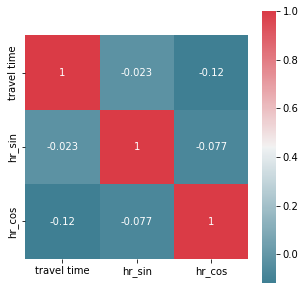

In [38]:
# run correlation matrix and plot
my_df = df1[['travel time','hr_sin','hr_cos']]
f, ax = plt.subplots(figsize=(5,5))
corr = my_df.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

### cyclical encoding of hour

In [39]:
x = np.array(df1[['est_dist','hr_sin','hr_cos']])
y = np.array(df1['travel time'])
x

array([[ 2.56935426e-01,  1.00000000e+00,  6.12323400e-17],
       [ 4.08830673e-01, -5.00000000e-01, -8.66025404e-01],
       [ 2.48149516e-01, -9.65925826e-01, -2.58819045e-01],
       ...,
       [ 3.09478438e-01, -8.66025404e-01, -5.00000000e-01],
       [ 5.69750757e-01, -9.65925826e-01,  2.58819045e-01],
       [ 1.59170526e-01, -8.66025404e-01,  5.00000000e-01]])

In [40]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [41]:
print(X_train.shape)
print(X_test.shape)
# X_train

(5924, 3)
(1482, 3)


In [42]:
# inputs: distance + hour
model2_1 = nnmodel(20, num_hlayers=1,Epoch=500)
model2_1

Epoch 1/500
186/186 [==============================] - 0s 1ms/step - loss: 1235311.0000 - mape: 99.8941 - rmse: 1111.4454 - val_loss: 1228966.7500 - val_mape: 99.7701 - val_rmse: 1108.5878
Epoch 2/500
186/186 [==============================] - 0s 787us/step - loss: 1229928.3750 - mape: 99.5748 - rmse: 1109.0214 - val_loss: 1221614.5000 - val_mape: 99.3347 - val_rmse: 1105.2667
Epoch 3/500
186/186 [==============================] - 0s 786us/step - loss: 1219481.7500 - mape: 98.9679 - rmse: 1104.3015 - val_loss: 1207854.5000 - val_mape: 98.5353 - val_rmse: 1099.0243
Epoch 4/500
186/186 [==============================] - 0s 756us/step - loss: 1202194.0000 - mape: 97.9684 - rmse: 1096.4460 - val_loss: 1187986.8750 - val_mape: 97.3714 - val_rmse: 1089.9481
Epoch 5/500
186/186 [==============================] - 0s 765us/step - loss: 1179791.0000 - mape: 96.6485 - rmse: 1086.1819 - val_loss: 1163700.1250 - val_mape: 95.9316 - val_rmse: 1078.7494
Epoch 6/500
186/186 [==========================

Epoch 88/500
186/186 [==============================] - 0s 706us/step - loss: 159506.5156 - mape: 37.1086 - rmse: 399.3827 - val_loss: 167961.8750 - val_mape: 37.2344 - val_rmse: 409.8315
Epoch 89/500
186/186 [==============================] - 0s 799us/step - loss: 159366.5938 - mape: 37.1345 - rmse: 399.2075 - val_loss: 167860.7969 - val_mape: 37.1570 - val_rmse: 409.7082
Epoch 90/500
186/186 [==============================] - 0s 708us/step - loss: 159235.8750 - mape: 36.9639 - rmse: 399.0437 - val_loss: 167776.4375 - val_mape: 37.0805 - val_rmse: 409.6052
Epoch 91/500
186/186 [==============================] - 0s 822us/step - loss: 159103.9531 - mape: 36.8646 - rmse: 398.8784 - val_loss: 167674.2812 - val_mape: 37.0712 - val_rmse: 409.4805
Epoch 92/500
186/186 [==============================] - 0s 795us/step - loss: 158990.1250 - mape: 36.9015 - rmse: 398.7357 - val_loss: 167587.7969 - val_mape: 37.0444 - val_rmse: 409.3749
Epoch 93/500
186/186 [==============================] - 0s 6

186/186 [==============================] - 0s 767us/step - loss: 156616.9375 - mape: 34.5355 - rmse: 395.7486 - val_loss: 166343.6406 - val_mape: 34.9361 - val_rmse: 407.8525
Epoch 175/500
186/186 [==============================] - 0s 734us/step - loss: 156619.0781 - mape: 34.5087 - rmse: 395.7513 - val_loss: 166350.2031 - val_mape: 34.9290 - val_rmse: 407.8605
Epoch 176/500
186/186 [==============================] - 0s 728us/step - loss: 156617.4219 - mape: 34.4969 - rmse: 395.7492 - val_loss: 166356.5938 - val_mape: 34.9231 - val_rmse: 407.8683
Epoch 177/500
186/186 [==============================] - 0s 695us/step - loss: 156619.5938 - mape: 34.4895 - rmse: 395.7519 - val_loss: 166350.8281 - val_mape: 34.9170 - val_rmse: 407.8613
Epoch 178/500
186/186 [==============================] - 0s 781us/step - loss: 156628.5312 - mape: 34.4464 - rmse: 395.7632 - val_loss: 166370.1406 - val_mape: 34.8158 - val_rmse: 407.8849
Epoch 179/500
186/186 [==============================] - 0s 731us/ste

186/186 [==============================] - 0s 727us/step - loss: 156596.1875 - mape: 34.2486 - rmse: 395.7224 - val_loss: 166426.6875 - val_mape: 34.7526 - val_rmse: 407.9543
Epoch 261/500
186/186 [==============================] - 0s 797us/step - loss: 156594.5312 - mape: 34.2129 - rmse: 395.7203 - val_loss: 166429.7812 - val_mape: 34.7015 - val_rmse: 407.9581
Epoch 262/500
186/186 [==============================] - 0s 766us/step - loss: 156593.8906 - mape: 34.2627 - rmse: 395.7195 - val_loss: 166434.3906 - val_mape: 34.6547 - val_rmse: 407.9637
Epoch 263/500
186/186 [==============================] - 0s 713us/step - loss: 156599.3750 - mape: 34.2668 - rmse: 395.7264 - val_loss: 166434.2188 - val_mape: 34.7211 - val_rmse: 407.9635
Epoch 264/500
186/186 [==============================] - 0s 790us/step - loss: 156597.5469 - mape: 34.1755 - rmse: 395.7241 - val_loss: 166429.9219 - val_mape: 34.7618 - val_rmse: 407.9582
Epoch 265/500
186/186 [==============================] - 0s 773us/ste

186/186 [==============================] - 0s 725us/step - loss: 156595.9219 - mape: 34.2056 - rmse: 395.7220 - val_loss: 166453.2500 - val_mape: 34.6877 - val_rmse: 407.9868
Epoch 347/500
186/186 [==============================] - 0s 819us/step - loss: 156596.5000 - mape: 34.1661 - rmse: 395.7227 - val_loss: 166447.3125 - val_mape: 34.7320 - val_rmse: 407.9796
Epoch 348/500
186/186 [==============================] - 0s 704us/step - loss: 156600.9844 - mape: 34.2258 - rmse: 395.7284 - val_loss: 166448.0938 - val_mape: 34.6663 - val_rmse: 407.9805
Epoch 349/500
186/186 [==============================] - 0s 849us/step - loss: 156601.2812 - mape: 34.2287 - rmse: 395.7288 - val_loss: 166454.1719 - val_mape: 34.6922 - val_rmse: 407.9879
Epoch 350/500
186/186 [==============================] - 0s 722us/step - loss: 156602.8750 - mape: 34.2685 - rmse: 395.7308 - val_loss: 166447.4688 - val_mape: 34.7134 - val_rmse: 407.9797
Epoch 351/500
186/186 [==============================] - 0s 782us/ste

186/186 [==============================] - 0s 751us/step - loss: 156594.0781 - mape: 34.2893 - rmse: 395.7197 - val_loss: 166429.8438 - val_mape: 34.7171 - val_rmse: 407.9581
Epoch 433/500
186/186 [==============================] - 0s 805us/step - loss: 156594.3906 - mape: 34.2088 - rmse: 395.7201 - val_loss: 166421.6562 - val_mape: 34.7852 - val_rmse: 407.9481
Epoch 434/500
186/186 [==============================] - 0s 793us/step - loss: 156598.5625 - mape: 34.3633 - rmse: 395.7254 - val_loss: 166425.4062 - val_mape: 34.7521 - val_rmse: 407.9527
Epoch 435/500
186/186 [==============================] - 0s 673us/step - loss: 156601.8750 - mape: 34.2844 - rmse: 395.7296 - val_loss: 166441.0156 - val_mape: 34.6540 - val_rmse: 407.9718
Epoch 436/500
186/186 [==============================] - 0s 677us/step - loss: 156599.5312 - mape: 34.1912 - rmse: 395.7266 - val_loss: 166443.0625 - val_mape: 34.6301 - val_rmse: 407.9743
Epoch 437/500
186/186 [==============================] - 0s 826us/ste

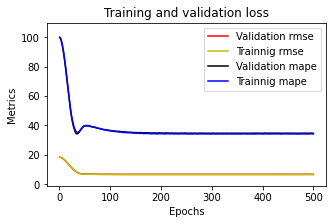

In [43]:
plotme(model2_1)

In [44]:
# inputs: distance + hour
model2_2 = nnmodel(50, num_hlayers=1,Epoch=1000)
model2_2

Epoch 1/1000
186/186 [==============================] - 0s 1ms/step - loss: 1234047.8750 - mape: 99.8188 - rmse: 1110.8771 - val_loss: 1225036.1250 - val_mape: 99.5406 - val_rmse: 1106.8135
Epoch 2/1000
186/186 [==============================] - 0s 770us/step - loss: 1219659.5000 - mape: 98.9898 - rmse: 1104.3820 - val_loss: 1202959.1250 - val_mape: 98.2585 - val_rmse: 1096.7949
Epoch 3/1000
186/186 [==============================] - 0s 757us/step - loss: 1188201.2500 - mape: 97.1437 - rmse: 1090.0464 - val_loss: 1163132.7500 - val_mape: 95.9202 - val_rmse: 1078.4863
Epoch 4/1000
186/186 [==============================] - 0s 847us/step - loss: 1139938.5000 - mape: 94.2774 - rmse: 1067.6791 - val_loss: 1108454.7500 - val_mape: 92.6195 - val_rmse: 1052.8318
Epoch 5/1000
186/186 [==============================] - 0s 800us/step - loss: 1078770.6250 - mape: 90.5330 - rmse: 1038.6388 - val_loss: 1042637.3125 - val_mape: 88.4950 - val_rmse: 1021.0961
Epoch 6/1000
186/186 [====================

186/186 [==============================] - 0s 694us/step - loss: 156745.0625 - mape: 34.7770 - rmse: 395.9104 - val_loss: 166312.5469 - val_mape: 35.1469 - val_rmse: 407.8144
Epoch 88/1000
186/186 [==============================] - 0s 758us/step - loss: 156725.2344 - mape: 34.6729 - rmse: 395.8854 - val_loss: 166294.7656 - val_mape: 35.3388 - val_rmse: 407.7925
Epoch 89/1000
186/186 [==============================] - 0s 815us/step - loss: 156710.3125 - mape: 34.8971 - rmse: 395.8665 - val_loss: 166307.9375 - val_mape: 35.1970 - val_rmse: 407.8087
Epoch 90/1000
186/186 [==============================] - 0s 755us/step - loss: 156705.0469 - mape: 34.7818 - rmse: 395.8599 - val_loss: 166316.1719 - val_mape: 35.0635 - val_rmse: 407.8188
Epoch 91/1000
186/186 [==============================] - 0s 802us/step - loss: 156721.1406 - mape: 34.8030 - rmse: 395.8802 - val_loss: 166323.0156 - val_mape: 35.0579 - val_rmse: 407.8272
Epoch 92/1000
186/186 [==============================] - 0s 735us/ste

186/186 [==============================] - 0s 785us/step - loss: 156606.8750 - mape: 34.3322 - rmse: 395.7359 - val_loss: 166431.4062 - val_mape: 34.8002 - val_rmse: 407.9601
Epoch 174/1000
186/186 [==============================] - 0s 808us/step - loss: 156610.2031 - mape: 34.4115 - rmse: 395.7401 - val_loss: 166416.0938 - val_mape: 34.7441 - val_rmse: 407.9413
Epoch 175/1000
186/186 [==============================] - 0s 797us/step - loss: 156610.6094 - mape: 34.2163 - rmse: 395.7406 - val_loss: 166428.7656 - val_mape: 34.6944 - val_rmse: 407.9568
Epoch 176/1000
186/186 [==============================] - 0s 754us/step - loss: 156619.6094 - mape: 34.1719 - rmse: 395.7520 - val_loss: 166420.9844 - val_mape: 34.7525 - val_rmse: 407.9473
Epoch 177/1000
186/186 [==============================] - 0s 798us/step - loss: 156615.4688 - mape: 34.2588 - rmse: 395.7467 - val_loss: 166417.5000 - val_mape: 34.8007 - val_rmse: 407.9430
Epoch 178/1000
186/186 [==============================] - 0s 792u

186/186 [==============================] - 0s 770us/step - loss: 156606.6094 - mape: 34.3310 - rmse: 395.7355 - val_loss: 166437.7812 - val_mape: 34.7223 - val_rmse: 407.9679
Epoch 260/1000
186/186 [==============================] - 0s 817us/step - loss: 156599.0156 - mape: 34.2193 - rmse: 395.7259 - val_loss: 166433.3125 - val_mape: 34.7011 - val_rmse: 407.9624
Epoch 261/1000
186/186 [==============================] - 0s 830us/step - loss: 156625.2812 - mape: 34.1873 - rmse: 395.7591 - val_loss: 166439.8125 - val_mape: 34.6635 - val_rmse: 407.9704
Epoch 262/1000
186/186 [==============================] - 0s 791us/step - loss: 156624.0156 - mape: 34.1294 - rmse: 395.7575 - val_loss: 166431.3281 - val_mape: 34.7595 - val_rmse: 407.9600
Epoch 263/1000
186/186 [==============================] - 0s 822us/step - loss: 156624.6875 - mape: 34.2931 - rmse: 395.7584 - val_loss: 166448.0469 - val_mape: 34.6486 - val_rmse: 407.9804
Epoch 264/1000
186/186 [==============================] - 0s 776u

186/186 [==============================] - 0s 724us/step - loss: 156612.8906 - mape: 34.3210 - rmse: 395.7435 - val_loss: 166418.1406 - val_mape: 34.6888 - val_rmse: 407.9438
Epoch 346/1000
186/186 [==============================] - 0s 835us/step - loss: 156616.1406 - mape: 34.1483 - rmse: 395.7476 - val_loss: 166421.3594 - val_mape: 34.8498 - val_rmse: 407.9478
Epoch 347/1000
186/186 [==============================] - 0s 758us/step - loss: 156612.0781 - mape: 34.2291 - rmse: 395.7424 - val_loss: 166433.0938 - val_mape: 34.7959 - val_rmse: 407.9621
Epoch 348/1000
186/186 [==============================] - 0s 748us/step - loss: 156607.7344 - mape: 34.2594 - rmse: 395.7369 - val_loss: 166434.4219 - val_mape: 34.7550 - val_rmse: 407.9637
Epoch 349/1000
186/186 [==============================] - 0s 816us/step - loss: 156610.6250 - mape: 34.2833 - rmse: 395.7406 - val_loss: 166433.6562 - val_mape: 34.7631 - val_rmse: 407.9628
Epoch 350/1000
186/186 [==============================] - 0s 806u

186/186 [==============================] - 0s 703us/step - loss: 156618.8750 - mape: 34.3892 - rmse: 395.7510 - val_loss: 166422.9688 - val_mape: 34.9586 - val_rmse: 407.9497
Epoch 432/1000
186/186 [==============================] - 0s 737us/step - loss: 156611.7969 - mape: 34.2387 - rmse: 395.7421 - val_loss: 166426.6094 - val_mape: 34.8295 - val_rmse: 407.9542
Epoch 433/1000
186/186 [==============================] - 0s 774us/step - loss: 156624.4062 - mape: 34.3701 - rmse: 395.7580 - val_loss: 166434.1562 - val_mape: 34.8570 - val_rmse: 407.9634
Epoch 434/1000
186/186 [==============================] - 0s 777us/step - loss: 156617.4688 - mape: 34.2702 - rmse: 395.7492 - val_loss: 166434.7500 - val_mape: 34.7508 - val_rmse: 407.9641
Epoch 435/1000
186/186 [==============================] - 0s 783us/step - loss: 156605.2500 - mape: 34.3274 - rmse: 395.7338 - val_loss: 166450.2500 - val_mape: 34.6273 - val_rmse: 407.9832
Epoch 436/1000
186/186 [==============================] - 0s 785u

186/186 [==============================] - 0s 804us/step - loss: 156622.6250 - mape: 34.1836 - rmse: 395.7558 - val_loss: 166447.3594 - val_mape: 34.7458 - val_rmse: 407.9796
Epoch 518/1000
186/186 [==============================] - 0s 726us/step - loss: 156606.7969 - mape: 34.3171 - rmse: 395.7358 - val_loss: 166449.9531 - val_mape: 34.6170 - val_rmse: 407.9828
Epoch 519/1000
186/186 [==============================] - 0s 789us/step - loss: 156636.6875 - mape: 34.3138 - rmse: 395.7735 - val_loss: 166453.5312 - val_mape: 34.5876 - val_rmse: 407.9872
Epoch 520/1000
186/186 [==============================] - 0s 842us/step - loss: 156607.6250 - mape: 34.0344 - rmse: 395.7368 - val_loss: 166441.2031 - val_mape: 34.7036 - val_rmse: 407.9721
Epoch 521/1000
186/186 [==============================] - 0s 772us/step - loss: 156604.6562 - mape: 34.2504 - rmse: 395.7331 - val_loss: 166442.9219 - val_mape: 34.6496 - val_rmse: 407.9742
Epoch 522/1000
186/186 [==============================] - 0s 739u

186/186 [==============================] - 0s 804us/step - loss: 156603.7812 - mape: 34.2093 - rmse: 395.7320 - val_loss: 166420.0781 - val_mape: 34.8031 - val_rmse: 407.9462
Epoch 604/1000
186/186 [==============================] - 0s 815us/step - loss: 156606.8281 - mape: 34.1614 - rmse: 395.7358 - val_loss: 166415.6250 - val_mape: 34.8052 - val_rmse: 407.9407
Epoch 605/1000
186/186 [==============================] - 0s 727us/step - loss: 156606.8594 - mape: 34.3807 - rmse: 395.7358 - val_loss: 166426.5156 - val_mape: 34.8128 - val_rmse: 407.9541
Epoch 606/1000
186/186 [==============================] - 0s 822us/step - loss: 156611.2188 - mape: 34.2716 - rmse: 395.7414 - val_loss: 166439.4219 - val_mape: 34.6870 - val_rmse: 407.9699
Epoch 607/1000
186/186 [==============================] - 0s 786us/step - loss: 156619.3906 - mape: 34.2902 - rmse: 395.7517 - val_loss: 166441.0938 - val_mape: 34.7470 - val_rmse: 407.9719
Epoch 608/1000
186/186 [==============================] - 0s 767u

186/186 [==============================] - 0s 756us/step - loss: 156602.7188 - mape: 34.2837 - rmse: 395.7306 - val_loss: 166451.4062 - val_mape: 34.6959 - val_rmse: 407.9846
Epoch 690/1000
186/186 [==============================] - 0s 839us/step - loss: 156622.1250 - mape: 34.2317 - rmse: 395.7551 - val_loss: 166442.1875 - val_mape: 34.6889 - val_rmse: 407.9733
Epoch 691/1000
186/186 [==============================] - 0s 769us/step - loss: 156624.4688 - mape: 34.1536 - rmse: 395.7581 - val_loss: 166453.4688 - val_mape: 34.6700 - val_rmse: 407.9871
Epoch 692/1000
186/186 [==============================] - 0s 709us/step - loss: 156618.0625 - mape: 34.1094 - rmse: 395.7500 - val_loss: 166435.3906 - val_mape: 34.8649 - val_rmse: 407.9649
Epoch 693/1000
186/186 [==============================] - 0s 762us/step - loss: 156616.1250 - mape: 34.4892 - rmse: 395.7476 - val_loss: 166434.5000 - val_mape: 34.7829 - val_rmse: 407.9638
Epoch 694/1000
186/186 [==============================] - 0s 729u

186/186 [==============================] - 0s 818us/step - loss: 156622.0156 - mape: 34.2049 - rmse: 395.7550 - val_loss: 166435.9844 - val_mape: 34.8978 - val_rmse: 407.9657
Epoch 776/1000
186/186 [==============================] - 0s 748us/step - loss: 156612.3125 - mape: 34.3349 - rmse: 395.7427 - val_loss: 166424.6406 - val_mape: 34.8074 - val_rmse: 407.9518
Epoch 777/1000
186/186 [==============================] - 0s 700us/step - loss: 156625.9844 - mape: 34.2548 - rmse: 395.7600 - val_loss: 166432.1406 - val_mape: 34.7501 - val_rmse: 407.9610
Epoch 778/1000
186/186 [==============================] - 0s 717us/step - loss: 156609.5156 - mape: 34.2764 - rmse: 395.7392 - val_loss: 166455.4688 - val_mape: 34.6013 - val_rmse: 407.9895
Epoch 779/1000
186/186 [==============================] - 0s 862us/step - loss: 156604.8281 - mape: 34.1146 - rmse: 395.7333 - val_loss: 166436.8438 - val_mape: 34.7096 - val_rmse: 407.9667
Epoch 780/1000
186/186 [==============================] - 0s 721u

186/186 [==============================] - 0s 795us/step - loss: 156604.5781 - mape: 34.2544 - rmse: 395.7330 - val_loss: 166451.1250 - val_mape: 34.6460 - val_rmse: 407.9842
Epoch 862/1000
186/186 [==============================] - 0s 759us/step - loss: 156613.5156 - mape: 34.2858 - rmse: 395.7443 - val_loss: 166441.6562 - val_mape: 34.6659 - val_rmse: 407.9726
Epoch 863/1000
186/186 [==============================] - 0s 844us/step - loss: 156608.7500 - mape: 34.1433 - rmse: 395.7382 - val_loss: 166449.0156 - val_mape: 34.7098 - val_rmse: 407.9816
Epoch 864/1000
186/186 [==============================] - 0s 773us/step - loss: 156607.1094 - mape: 34.1719 - rmse: 395.7362 - val_loss: 166436.6094 - val_mape: 34.7976 - val_rmse: 407.9664
Epoch 865/1000
186/186 [==============================] - 0s 768us/step - loss: 156617.0625 - mape: 34.2363 - rmse: 395.7487 - val_loss: 166431.5625 - val_mape: 34.7802 - val_rmse: 407.9602
Epoch 866/1000
186/186 [==============================] - 0s 819u

186/186 [==============================] - 0s 836us/step - loss: 156621.4531 - mape: 34.2779 - rmse: 395.7543 - val_loss: 166446.9062 - val_mape: 34.7374 - val_rmse: 407.9791
Epoch 948/1000
186/186 [==============================] - 0s 738us/step - loss: 156600.9062 - mape: 34.3153 - rmse: 395.7283 - val_loss: 166429.7500 - val_mape: 34.6818 - val_rmse: 407.9580
Epoch 949/1000
186/186 [==============================] - 0s 782us/step - loss: 156608.3281 - mape: 34.1637 - rmse: 395.7377 - val_loss: 166431.5469 - val_mape: 34.7045 - val_rmse: 407.9602
Epoch 950/1000
186/186 [==============================] - 0s 763us/step - loss: 156613.3594 - mape: 34.4520 - rmse: 395.7440 - val_loss: 166418.4375 - val_mape: 34.7373 - val_rmse: 407.9442
Epoch 951/1000
186/186 [==============================] - 0s 701us/step - loss: 156603.7188 - mape: 34.2899 - rmse: 395.7319 - val_loss: 166423.3750 - val_mape: 34.6774 - val_rmse: 407.9502
Epoch 952/1000
186/186 [==============================] - 0s 768u

In [45]:
# plotme(model2_2)

In [46]:
# inputs: distance + hour
model2_3 = nnmodel(100, num_hlayers=1,Epoch=500)
model2_3

Epoch 1/500
186/186 [==============================] - 0s 1ms/step - loss: 1231454.7500 - mape: 99.6651 - rmse: 1109.7094 - val_loss: 1217350.8750 - val_mape: 99.0838 - val_rmse: 1103.3363
Epoch 2/500
186/186 [==============================] - 0s 886us/step - loss: 1200001.6250 - mape: 97.8156 - rmse: 1095.4458 - val_loss: 1167831.3750 - val_mape: 96.1677 - val_rmse: 1080.6625
Epoch 3/500
186/186 [==============================] - 0s 777us/step - loss: 1133232.6250 - mape: 93.8303 - rmse: 1064.5339 - val_loss: 1086700.2500 - val_mape: 91.2182 - val_rmse: 1042.4492
Epoch 4/500
186/186 [==============================] - 0s 911us/step - loss: 1039995.5625 - mape: 87.9970 - rmse: 1019.8017 - val_loss: 984977.2500 - val_mape: 84.7042 - val_rmse: 992.4602
Epoch 5/500
186/186 [==============================] - 0s 876us/step - loss: 930735.1875 - mape: 80.7329 - rmse: 964.7462 - val_loss: 872309.8125 - val_mape: 77.0010 - val_rmse: 933.9753
Epoch 6/500
186/186 [==============================] 

Epoch 88/500
186/186 [==============================] - 0s 852us/step - loss: 156624.6250 - mape: 34.2108 - rmse: 395.7583 - val_loss: 166379.1562 - val_mape: 34.8152 - val_rmse: 407.8960
Epoch 89/500
186/186 [==============================] - 0s 910us/step - loss: 156634.2031 - mape: 34.1750 - rmse: 395.7704 - val_loss: 166376.6875 - val_mape: 34.9632 - val_rmse: 407.8930
Epoch 90/500
186/186 [==============================] - 0s 794us/step - loss: 156636.7500 - mape: 34.4539 - rmse: 395.7736 - val_loss: 166399.9531 - val_mape: 34.8457 - val_rmse: 407.9215
Epoch 91/500
186/186 [==============================] - 0s 935us/step - loss: 156644.2812 - mape: 34.4151 - rmse: 395.7831 - val_loss: 166411.2656 - val_mape: 34.8176 - val_rmse: 407.9354
Epoch 92/500
186/186 [==============================] - 0s 845us/step - loss: 156626.5781 - mape: 34.2107 - rmse: 395.7608 - val_loss: 166406.4062 - val_mape: 35.0021 - val_rmse: 407.9294
Epoch 93/500
186/186 [==============================] - 0s 8

186/186 [==============================] - 0s 828us/step - loss: 156599.3906 - mape: 34.4647 - rmse: 395.7264 - val_loss: 166470.4531 - val_mape: 34.4713 - val_rmse: 408.0079
Epoch 175/500
186/186 [==============================] - 0s 900us/step - loss: 156618.0625 - mape: 34.0631 - rmse: 395.7500 - val_loss: 166439.8438 - val_mape: 34.6831 - val_rmse: 407.9704
Epoch 176/500
186/186 [==============================] - 0s 925us/step - loss: 156635.6094 - mape: 34.3152 - rmse: 395.7722 - val_loss: 166463.8125 - val_mape: 34.6617 - val_rmse: 407.9998
Epoch 177/500
186/186 [==============================] - 0s 837us/step - loss: 156614.2500 - mape: 34.0552 - rmse: 395.7452 - val_loss: 166455.7969 - val_mape: 34.7446 - val_rmse: 407.9900
Epoch 178/500
186/186 [==============================] - 0s 860us/step - loss: 156621.8594 - mape: 34.1123 - rmse: 395.7548 - val_loss: 166448.8906 - val_mape: 34.9989 - val_rmse: 407.9815
Epoch 179/500
186/186 [==============================] - 0s 839us/ste

186/186 [==============================] - 0s 836us/step - loss: 156626.9531 - mape: 34.3363 - rmse: 395.7612 - val_loss: 166448.8906 - val_mape: 34.6067 - val_rmse: 407.9815
Epoch 261/500
186/186 [==============================] - 0s 831us/step - loss: 156617.1250 - mape: 34.1982 - rmse: 395.7488 - val_loss: 166439.8594 - val_mape: 34.6859 - val_rmse: 407.9704
Epoch 262/500
186/186 [==============================] - 0s 851us/step - loss: 156634.3750 - mape: 34.3732 - rmse: 395.7706 - val_loss: 166427.3594 - val_mape: 34.7735 - val_rmse: 407.9551
Epoch 263/500
186/186 [==============================] - 0s 860us/step - loss: 156630.9531 - mape: 34.1231 - rmse: 395.7663 - val_loss: 166444.8906 - val_mape: 34.6394 - val_rmse: 407.9766
Epoch 264/500
186/186 [==============================] - 0s 853us/step - loss: 156625.2500 - mape: 34.2852 - rmse: 395.7591 - val_loss: 166435.1250 - val_mape: 34.7276 - val_rmse: 407.9646
Epoch 265/500
186/186 [==============================] - 0s 839us/ste

186/186 [==============================] - 0s 834us/step - loss: 156621.5312 - mape: 34.2748 - rmse: 395.7544 - val_loss: 166420.0312 - val_mape: 34.8438 - val_rmse: 407.9461
Epoch 347/500
186/186 [==============================] - 0s 803us/step - loss: 156631.5469 - mape: 34.3916 - rmse: 395.7670 - val_loss: 166457.5469 - val_mape: 34.7064 - val_rmse: 407.9921
Epoch 348/500
186/186 [==============================] - 0s 847us/step - loss: 156619.1094 - mape: 34.4045 - rmse: 395.7513 - val_loss: 166452.2188 - val_mape: 34.6476 - val_rmse: 407.9856
Epoch 349/500
186/186 [==============================] - 0s 829us/step - loss: 156618.3750 - mape: 34.2351 - rmse: 395.7504 - val_loss: 166426.2812 - val_mape: 34.8966 - val_rmse: 407.9538
Epoch 350/500
186/186 [==============================] - 0s 795us/step - loss: 156633.0938 - mape: 34.2794 - rmse: 395.7690 - val_loss: 166438.6250 - val_mape: 34.6407 - val_rmse: 407.9689
Epoch 351/500
186/186 [==============================] - 0s 799us/ste

186/186 [==============================] - 0s 923us/step - loss: 156633.2656 - mape: 34.1773 - rmse: 395.7692 - val_loss: 166449.5469 - val_mape: 34.8369 - val_rmse: 407.9823
Epoch 433/500
186/186 [==============================] - 0s 848us/step - loss: 156617.6406 - mape: 34.1324 - rmse: 395.7495 - val_loss: 166435.5469 - val_mape: 34.9890 - val_rmse: 407.9651
Epoch 434/500
186/186 [==============================] - 0s 813us/step - loss: 156612.7500 - mape: 34.4693 - rmse: 395.7433 - val_loss: 166442.7812 - val_mape: 34.7099 - val_rmse: 407.9740
Epoch 435/500
186/186 [==============================] - 0s 873us/step - loss: 156618.5000 - mape: 34.2890 - rmse: 395.7505 - val_loss: 166428.7969 - val_mape: 34.7391 - val_rmse: 407.9568
Epoch 436/500
186/186 [==============================] - 0s 854us/step - loss: 156632.2812 - mape: 34.1914 - rmse: 395.7680 - val_loss: 166436.3125 - val_mape: 34.8450 - val_rmse: 407.9661
Epoch 437/500
186/186 [==============================] - 0s 842us/ste

In [47]:
# inputs: distance + hour
model2_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model2_4

Epoch 1/500
186/186 [==============================] - 0s 1ms/step - loss: 1178895.6250 - mape: 96.4749 - rmse: 1085.7697 - val_loss: 998725.6875 - val_mape: 85.4008 - val_rmse: 999.3627
Epoch 2/500
186/186 [==============================] - 0s 833us/step - loss: 579242.9375 - mape: 55.5424 - rmse: 761.0801 - val_loss: 244703.7031 - val_mape: 34.1321 - val_rmse: 494.6754
Epoch 3/500
186/186 [==============================] - 0s 847us/step - loss: 186985.5000 - mape: 38.2935 - rmse: 432.4182 - val_loss: 177241.6250 - val_mape: 39.8185 - val_rmse: 421.0007
Epoch 4/500
186/186 [==============================] - 0s 819us/step - loss: 168316.3125 - mape: 39.9626 - rmse: 410.2637 - val_loss: 173644.3125 - val_mape: 40.2637 - val_rmse: 416.7065
Epoch 5/500
186/186 [==============================] - 0s 862us/step - loss: 165365.1250 - mape: 39.6897 - rmse: 406.6511 - val_loss: 171624.3906 - val_mape: 38.9849 - val_rmse: 414.2758
Epoch 6/500
186/186 [==============================] - 0s 783us/s

Epoch 45/500
186/186 [==============================] - 0s 818us/step - loss: 155428.3594 - mape: 34.1483 - rmse: 394.2440 - val_loss: 165187.9375 - val_mape: 33.3568 - val_rmse: 406.4332
Epoch 46/500
186/186 [==============================] - 0s 843us/step - loss: 155306.1406 - mape: 33.7713 - rmse: 394.0890 - val_loss: 164795.6406 - val_mape: 34.8843 - val_rmse: 405.9503
Epoch 47/500
186/186 [==============================] - 0s 879us/step - loss: 155334.0000 - mape: 34.0651 - rmse: 394.1244 - val_loss: 164788.2656 - val_mape: 35.1934 - val_rmse: 405.9412
Epoch 48/500
186/186 [==============================] - 0s 814us/step - loss: 155416.4219 - mape: 34.3031 - rmse: 394.2289 - val_loss: 164746.7656 - val_mape: 34.0951 - val_rmse: 405.8901
Epoch 49/500
186/186 [==============================] - 0s 766us/step - loss: 155369.9688 - mape: 33.9880 - rmse: 394.1700 - val_loss: 164941.7812 - val_mape: 33.7850 - val_rmse: 406.1302
Epoch 50/500
186/186 [==============================] - 0s 7

186/186 [==============================] - 0s 813us/step - loss: 154856.2031 - mape: 33.9571 - rmse: 393.5177 - val_loss: 164216.0000 - val_mape: 34.7043 - val_rmse: 405.2357
Epoch 132/500
186/186 [==============================] - 0s 795us/step - loss: 154949.0312 - mape: 34.0752 - rmse: 393.6357 - val_loss: 164215.6719 - val_mape: 34.8743 - val_rmse: 405.2353
Epoch 133/500
186/186 [==============================] - 0s 829us/step - loss: 154830.0312 - mape: 34.0922 - rmse: 393.4845 - val_loss: 164286.2500 - val_mape: 33.9506 - val_rmse: 405.3224
Epoch 134/500
186/186 [==============================] - 0s 737us/step - loss: 154824.8750 - mape: 34.0181 - rmse: 393.4779 - val_loss: 164062.8594 - val_mape: 34.2045 - val_rmse: 405.0467
Epoch 135/500
186/186 [==============================] - 0s 817us/step - loss: 154768.8125 - mape: 33.9879 - rmse: 393.4067 - val_loss: 164217.4219 - val_mape: 34.2134 - val_rmse: 405.2375
Epoch 136/500
186/186 [==============================] - 0s 826us/ste

186/186 [==============================] - 0s 777us/step - loss: 154462.8906 - mape: 33.9842 - rmse: 393.0177 - val_loss: 163777.4688 - val_mape: 34.0221 - val_rmse: 404.6943
Epoch 218/500
186/186 [==============================] - 0s 836us/step - loss: 154531.5625 - mape: 34.1440 - rmse: 393.1050 - val_loss: 163898.5156 - val_mape: 33.4585 - val_rmse: 404.8438
Epoch 219/500
186/186 [==============================] - 0s 818us/step - loss: 154469.0312 - mape: 33.8558 - rmse: 393.0255 - val_loss: 163778.5312 - val_mape: 35.6158 - val_rmse: 404.6956
Epoch 220/500
186/186 [==============================] - 0s 803us/step - loss: 154487.8594 - mape: 34.1653 - rmse: 393.0494 - val_loss: 163532.4844 - val_mape: 34.8797 - val_rmse: 404.3915
Epoch 221/500
186/186 [==============================] - 0s 824us/step - loss: 154383.9844 - mape: 34.0472 - rmse: 392.9173 - val_loss: 163471.4375 - val_mape: 34.4844 - val_rmse: 404.3160
Epoch 222/500
186/186 [==============================] - 0s 764us/ste

186/186 [==============================] - 0s 769us/step - loss: 154051.6719 - mape: 33.9629 - rmse: 392.4942 - val_loss: 162950.1094 - val_mape: 33.8740 - val_rmse: 403.6708
Epoch 304/500
186/186 [==============================] - 0s 890us/step - loss: 153957.4375 - mape: 34.0738 - rmse: 392.3741 - val_loss: 163252.0000 - val_mape: 33.8835 - val_rmse: 404.0446
Epoch 305/500
186/186 [==============================] - 0s 792us/step - loss: 154067.7656 - mape: 33.9696 - rmse: 392.5147 - val_loss: 162843.9688 - val_mape: 34.7252 - val_rmse: 403.5393
Epoch 306/500
186/186 [==============================] - 0s 815us/step - loss: 153850.8750 - mape: 33.9582 - rmse: 392.2383 - val_loss: 163064.0625 - val_mape: 35.9049 - val_rmse: 403.8119
Epoch 307/500
186/186 [==============================] - 0s 772us/step - loss: 153926.7344 - mape: 34.1966 - rmse: 392.3350 - val_loss: 162764.0000 - val_mape: 34.1854 - val_rmse: 403.4402
Epoch 308/500
186/186 [==============================] - 0s 784us/ste

186/186 [==============================] - 0s 790us/step - loss: 152908.5469 - mape: 34.4253 - rmse: 391.0352 - val_loss: 160965.9219 - val_mape: 33.4035 - val_rmse: 401.2056
Epoch 390/500
186/186 [==============================] - 0s 761us/step - loss: 152820.6094 - mape: 33.7600 - rmse: 390.9228 - val_loss: 160814.7500 - val_mape: 34.1567 - val_rmse: 401.0172
Epoch 391/500
186/186 [==============================] - 0s 835us/step - loss: 152711.6719 - mape: 33.9381 - rmse: 390.7834 - val_loss: 160506.5938 - val_mape: 34.4389 - val_rmse: 400.6328
Epoch 392/500
186/186 [==============================] - 0s 846us/step - loss: 152697.2656 - mape: 33.9031 - rmse: 390.7650 - val_loss: 161051.6562 - val_mape: 35.7209 - val_rmse: 401.3124
Epoch 393/500
186/186 [==============================] - 0s 777us/step - loss: 152889.9688 - mape: 34.1427 - rmse: 391.0115 - val_loss: 160573.8750 - val_mape: 34.5897 - val_rmse: 400.7167
Epoch 394/500
186/186 [==============================] - 0s 792us/ste

186/186 [==============================] - 0s 869us/step - loss: 151964.0625 - mape: 34.1727 - rmse: 389.8257 - val_loss: 158696.1094 - val_mape: 34.5323 - val_rmse: 398.3668
Epoch 476/500
186/186 [==============================] - 0s 858us/step - loss: 151921.8750 - mape: 33.7885 - rmse: 389.7716 - val_loss: 158639.1562 - val_mape: 34.0880 - val_rmse: 398.2953
Epoch 477/500
186/186 [==============================] - 0s 837us/step - loss: 151950.9062 - mape: 34.2439 - rmse: 389.8088 - val_loss: 158663.7656 - val_mape: 34.3133 - val_rmse: 398.3262
Epoch 478/500
186/186 [==============================] - 0s 814us/step - loss: 151840.8750 - mape: 34.1141 - rmse: 389.6676 - val_loss: 158597.6719 - val_mape: 34.2525 - val_rmse: 398.2432
Epoch 479/500
186/186 [==============================] - 0s 777us/step - loss: 151930.5156 - mape: 34.2226 - rmse: 389.7827 - val_loss: 158703.5156 - val_mape: 34.8257 - val_rmse: 398.3761
Epoch 480/500
186/186 [==============================] - 0s 768us/ste

In [48]:
# inputs: distance + hour
model2_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model2_5

Epoch 1/500
186/186 [==============================] - 0s 1ms/step - loss: 1045846.4375 - mape: 87.3903 - rmse: 1022.6663 - val_loss: 539419.1250 - val_mape: 50.4628 - val_rmse: 734.4516
Epoch 2/500
186/186 [==============================] - 0s 906us/step - loss: 244523.7344 - mape: 39.3888 - rmse: 494.4934 - val_loss: 178139.2969 - val_mape: 41.2402 - val_rmse: 422.0655
Epoch 3/500
186/186 [==============================] - 0s 876us/step - loss: 168292.4219 - mape: 40.4507 - rmse: 410.2346 - val_loss: 172826.2188 - val_mape: 39.1641 - val_rmse: 415.7237
Epoch 4/500
186/186 [==============================] - 0s 889us/step - loss: 163674.2812 - mape: 38.9712 - rmse: 404.5668 - val_loss: 170031.6719 - val_mape: 37.0066 - val_rmse: 412.3490
Epoch 5/500
186/186 [==============================] - 0s 910us/step - loss: 160642.6094 - mape: 37.6418 - rmse: 400.8025 - val_loss: 167458.3125 - val_mape: 37.5258 - val_rmse: 409.2167
Epoch 6/500
186/186 [==============================] - 0s 906us/s

Epoch 45/500
186/186 [==============================] - 0s 847us/step - loss: 155269.8594 - mape: 34.0990 - rmse: 394.0430 - val_loss: 164307.5156 - val_mape: 35.2654 - val_rmse: 405.3486
Epoch 46/500
186/186 [==============================] - 0s 817us/step - loss: 155149.5781 - mape: 34.0588 - rmse: 393.8903 - val_loss: 165046.9219 - val_mape: 35.7082 - val_rmse: 406.2597
Epoch 47/500
186/186 [==============================] - 0s 902us/step - loss: 155239.2969 - mape: 34.0793 - rmse: 394.0042 - val_loss: 164504.9844 - val_mape: 34.4714 - val_rmse: 405.5921
Epoch 48/500
186/186 [==============================] - 0s 921us/step - loss: 155205.9219 - mape: 34.1279 - rmse: 393.9618 - val_loss: 164340.5156 - val_mape: 34.4018 - val_rmse: 405.3893
Epoch 49/500
186/186 [==============================] - 0s 896us/step - loss: 155298.5781 - mape: 33.9518 - rmse: 394.0794 - val_loss: 164213.3594 - val_mape: 34.1191 - val_rmse: 405.2325
Epoch 50/500
186/186 [==============================] - 0s 8

186/186 [==============================] - 0s 829us/step - loss: 154846.1719 - mape: 34.1508 - rmse: 393.5050 - val_loss: 163605.6094 - val_mape: 34.8421 - val_rmse: 404.4819
Epoch 132/500
186/186 [==============================] - 0s 828us/step - loss: 154578.1250 - mape: 34.2418 - rmse: 393.1642 - val_loss: 163601.9375 - val_mape: 34.4229 - val_rmse: 404.4774
Epoch 133/500
186/186 [==============================] - 0s 849us/step - loss: 154481.1406 - mape: 33.9449 - rmse: 393.0409 - val_loss: 163920.5781 - val_mape: 33.9443 - val_rmse: 404.8711
Epoch 134/500
186/186 [==============================] - 0s 917us/step - loss: 154559.8594 - mape: 33.9149 - rmse: 393.1410 - val_loss: 164481.0938 - val_mape: 36.5420 - val_rmse: 405.5627
Epoch 135/500
186/186 [==============================] - 0s 852us/step - loss: 154502.0000 - mape: 33.9605 - rmse: 393.0674 - val_loss: 164098.8750 - val_mape: 33.3790 - val_rmse: 405.0912
Epoch 136/500
186/186 [==============================] - 0s 879us/ste

186/186 [==============================] - 0s 872us/step - loss: 153462.5469 - mape: 33.8985 - rmse: 391.7430 - val_loss: 162221.4375 - val_mape: 33.3079 - val_rmse: 402.7672
Epoch 218/500
186/186 [==============================] - 0s 914us/step - loss: 153219.7188 - mape: 34.0072 - rmse: 391.4329 - val_loss: 161510.6875 - val_mape: 35.0449 - val_rmse: 401.8839
Epoch 219/500
186/186 [==============================] - 0s 880us/step - loss: 153257.4219 - mape: 34.0006 - rmse: 391.4810 - val_loss: 161646.0469 - val_mape: 34.3748 - val_rmse: 402.0523
Epoch 220/500
186/186 [==============================] - 0s 926us/step - loss: 153381.1875 - mape: 33.8249 - rmse: 391.6391 - val_loss: 161733.8750 - val_mape: 34.0453 - val_rmse: 402.1615
Epoch 221/500
186/186 [==============================] - 0s 922us/step - loss: 153273.8906 - mape: 34.1736 - rmse: 391.5021 - val_loss: 161521.5312 - val_mape: 33.6592 - val_rmse: 401.8974
Epoch 222/500
186/186 [==============================] - 0s 887us/ste

186/186 [==============================] - 0s 894us/step - loss: 151853.2500 - mape: 33.8268 - rmse: 389.6835 - val_loss: 158450.2188 - val_mape: 33.8192 - val_rmse: 398.0580
Epoch 304/500
186/186 [==============================] - 0s 888us/step - loss: 151971.5938 - mape: 33.7864 - rmse: 389.8353 - val_loss: 158588.6562 - val_mape: 34.8290 - val_rmse: 398.2319
Epoch 305/500
186/186 [==============================] - 0s 890us/step - loss: 152008.0625 - mape: 34.0636 - rmse: 389.8821 - val_loss: 158671.2500 - val_mape: 34.0842 - val_rmse: 398.3356
Epoch 306/500
186/186 [==============================] - 0s 873us/step - loss: 152116.9219 - mape: 33.9969 - rmse: 390.0217 - val_loss: 158905.6875 - val_mape: 35.3445 - val_rmse: 398.6298
Epoch 307/500
186/186 [==============================] - 0s 902us/step - loss: 151900.8125 - mape: 33.9831 - rmse: 389.7445 - val_loss: 158496.6094 - val_mape: 33.7542 - val_rmse: 398.1163
Epoch 308/500
186/186 [==============================] - 0s 867us/ste

186/186 [==============================] - 0s 888us/step - loss: 151238.0938 - mape: 34.0801 - rmse: 388.8934 - val_loss: 157394.9219 - val_mape: 33.5459 - val_rmse: 396.7303
Epoch 390/500
186/186 [==============================] - 0s 897us/step - loss: 151387.0625 - mape: 33.9591 - rmse: 389.0849 - val_loss: 157424.0938 - val_mape: 32.8268 - val_rmse: 396.7671
Epoch 391/500
186/186 [==============================] - 0s 873us/step - loss: 151277.4219 - mape: 33.8928 - rmse: 388.9440 - val_loss: 157181.9531 - val_mape: 33.5288 - val_rmse: 396.4618
Epoch 392/500
186/186 [==============================] - 0s 922us/step - loss: 151299.5938 - mape: 34.0582 - rmse: 388.9725 - val_loss: 157046.3438 - val_mape: 33.7035 - val_rmse: 396.2907
Epoch 393/500
186/186 [==============================] - 0s 911us/step - loss: 151267.2344 - mape: 33.8136 - rmse: 388.9309 - val_loss: 157044.7031 - val_mape: 33.6494 - val_rmse: 396.2887
Epoch 394/500
186/186 [==============================] - 0s 879us/ste

186/186 [==============================] - 0s 828us/step - loss: 150636.6875 - mape: 33.9614 - rmse: 388.1194 - val_loss: 155542.6406 - val_mape: 33.8399 - val_rmse: 394.3889
Epoch 476/500
186/186 [==============================] - 0s 903us/step - loss: 150404.2500 - mape: 33.8584 - rmse: 387.8199 - val_loss: 155756.9219 - val_mape: 33.8471 - val_rmse: 394.6605
Epoch 477/500
186/186 [==============================] - 0s 854us/step - loss: 150346.0625 - mape: 33.6426 - rmse: 387.7448 - val_loss: 155843.0312 - val_mape: 35.0840 - val_rmse: 394.7696
Epoch 478/500
186/186 [==============================] - 0s 845us/step - loss: 150466.6875 - mape: 34.1873 - rmse: 387.9004 - val_loss: 156350.2344 - val_mape: 32.5980 - val_rmse: 395.4115
Epoch 479/500
186/186 [==============================] - 0s 945us/step - loss: 150463.9062 - mape: 33.7144 - rmse: 387.8968 - val_loss: 156303.4844 - val_mape: 35.1787 - val_rmse: 395.3524
Epoch 480/500
186/186 [==============================] - 0s 847us/ste

# sub-problem 3:     ******* input: distance & hour & dominated roadtype *********

In [49]:
df11 = df1.iloc[:,0:7].copy()
# df1 = df1.drop('hr_sin',axis=1)
# df1 = df1.drop('hr_cos',axis=1)
df11.head()

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0          823            6  0.358222  0.256935    0.682353         0.878788   
1         1066           14  0.453845  0.408831    0.734375         0.734375   
2          665           17  0.312429  0.248150    0.718310         0.796875   
3         1053           21  0.428195  0.300619    0.563107         0.725000   
5         1441           22  0.365045  0.340558    0.610526         0.623656   

  1st ranked  
0    primary  
1    primary  
2    primary  
3    primary  
5    primary

In [50]:
df11['1st ranked'].isna().sum()

0

In [51]:
summar1 = df11.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
motorway          89
primary         3047
residential     1117
secondary       1967
service            5
tertiary        1024
track              7
unclassified     150
Name: travel time, dtype: int64

In [52]:
option = ['residential','tertiary','primary','secondary']
df11.loc[~df11['1st ranked'].isin(option),'1st ranked'] = 'others1'
summar1 = df11.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
others1         251
primary        3047
residential    1117
secondary      1967
tertiary       1024
Name: travel time, dtype: int64

### 1. One-hot encoding of dominated roadtype

In [53]:
import category_encoders as ce
from category_encoders.target_encoder import TargetEncoder

In [54]:
dummy_ = pd.get_dummies(df11['1st ranked'], prefix='dominant_')
df11 = pd.merge(
    left=df11,
    right=dummy_,
    left_index=True,
    right_index=True,)


In [55]:
df11 = df11.drop(columns = ['1st ranked'])
df11 = df11.drop(columns = ['similarity_dijk'])
df11 = df11.drop(columns = ['similarity'])

df11.head()

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0          823            6  0.358222  0.256935    0.682353         0.878788   
1         1066           14  0.453845  0.408831    0.734375         0.734375   
2          665           17  0.312429  0.248150    0.718310         0.796875   
3         1053           21  0.428195  0.300619    0.563107         0.725000   
5         1441           22  0.365045  0.340558    0.610526         0.623656   

  1st ranked  dominant__others1  dominant__primary  dominant__residential  \
0    primary                  0                  1                      0   
1    primary                  0                  1                      0   
2    primary                  0                  1                      0   
3    primary                  0                  1                      0   
5    primary                  0                  1                      0   

   dominant__secondary  dominant__tertiary  
0                    0                   0  
1                    0                   0  
2                    0                   0  
3                    0                   0  
5                    0                   0

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

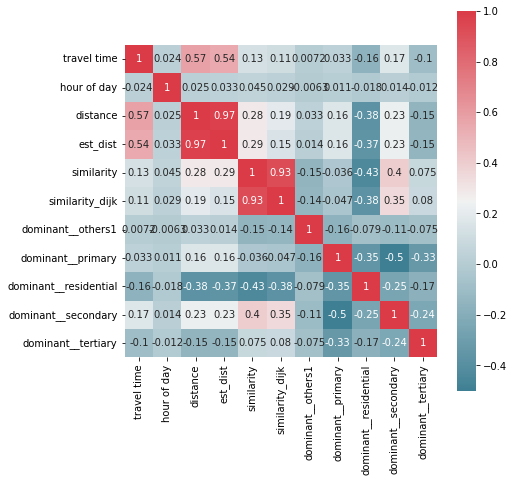

In [56]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(7,7))
corr = df11.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [57]:
x = np.array(df11[['est_dist','dominant__others1','dominant__primary','dominant__residential','dominant__tertiary','dominant__secondary']])
# x = np.array(df1.iloc[:,1:])
y = np.array(df11['travel time'])
x

array([[0.25693543, 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.40883067, 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.24814952, 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       ...,
       [0.30947844, 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.56975076, 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.15917053, 0.        , 0.        , 0.        , 1.        ,
        0.        ]])

In [58]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [59]:
print(X_train.shape)
print(X_test.shape)
# X_train

(5924, 6)
(1482, 6)


In [60]:
# inputs: distance +  dominant road
model3_1_1 = nnmodel(50, num_hlayers=1,Epoch=500)
model3_1_1

Epoch 1/500
186/186 [==============================] - 0s 1ms/step - loss: 1233050.3750 - mape: 99.7574 - rmse: 1110.4280 - val_loss: 1221773.0000 - val_mape: 99.3391 - val_rmse: 1105.3384
Epoch 2/500
186/186 [==============================] - 0s 846us/step - loss: 1210531.0000 - mape: 98.4021 - rmse: 1100.2413 - val_loss: 1186426.2500 - val_mape: 97.1937 - val_rmse: 1089.2319
Epoch 3/500
186/186 [==============================] - 0s 769us/step - loss: 1162278.2500 - mape: 95.4539 - rmse: 1078.0901 - val_loss: 1125162.0000 - val_mape: 93.3854 - val_rmse: 1060.7366
Epoch 4/500
186/186 [==============================] - 0s 850us/step - loss: 1090156.0000 - mape: 90.8853 - rmse: 1044.1053 - val_loss: 1044184.0000 - val_mape: 88.1503 - val_rmse: 1021.8532
Epoch 5/500
186/186 [==============================] - 0s 877us/step - loss: 1002203.1250 - mape: 85.0293 - rmse: 1001.1010 - val_loss: 950631.7500 - val_mape: 81.8280 - val_rmse: 975.0035
Epoch 6/500
186/186 [============================

Epoch 88/500
186/186 [==============================] - 0s 831us/step - loss: 160161.2031 - mape: 35.7841 - rmse: 400.2014 - val_loss: 167050.3281 - val_mape: 36.6608 - val_rmse: 408.7179
Epoch 89/500
186/186 [==============================] - 0s 815us/step - loss: 160114.9219 - mape: 36.2392 - rmse: 400.1436 - val_loss: 167011.1406 - val_mape: 36.3936 - val_rmse: 408.6700
Epoch 90/500
186/186 [==============================] - 0s 851us/step - loss: 160034.3438 - mape: 35.9311 - rmse: 400.0429 - val_loss: 167000.2344 - val_mape: 36.2809 - val_rmse: 408.6566
Epoch 91/500
186/186 [==============================] - 0s 855us/step - loss: 159980.2031 - mape: 35.8866 - rmse: 399.9753 - val_loss: 166995.0938 - val_mape: 36.2108 - val_rmse: 408.6503
Epoch 92/500
186/186 [==============================] - 0s 832us/step - loss: 159920.5000 - mape: 35.9193 - rmse: 399.9006 - val_loss: 166997.7188 - val_mape: 36.0966 - val_rmse: 408.6535
Epoch 93/500
186/186 [==============================] - 0s 8

186/186 [==============================] - 0s 913us/step - loss: 159135.6250 - mape: 34.6399 - rmse: 398.9181 - val_loss: 167764.5938 - val_mape: 35.2742 - val_rmse: 409.5908
Epoch 175/500
186/186 [==============================] - 0s 753us/step - loss: 159141.1719 - mape: 34.7832 - rmse: 398.9250 - val_loss: 167765.8438 - val_mape: 35.2660 - val_rmse: 409.5923
Epoch 176/500
186/186 [==============================] - 0s 825us/step - loss: 159150.3125 - mape: 34.5991 - rmse: 398.9365 - val_loss: 167776.3281 - val_mape: 35.3379 - val_rmse: 409.6051
Epoch 177/500
186/186 [==============================] - 0s 806us/step - loss: 159139.1719 - mape: 34.6221 - rmse: 398.9225 - val_loss: 167778.1562 - val_mape: 35.2507 - val_rmse: 409.6073
Epoch 178/500
186/186 [==============================] - 0s 879us/step - loss: 159130.5938 - mape: 34.6645 - rmse: 398.9118 - val_loss: 167774.2969 - val_mape: 35.2437 - val_rmse: 409.6026
Epoch 179/500
186/186 [==============================] - 0s 832us/ste

186/186 [==============================] - 0s 886us/step - loss: 159144.9375 - mape: 34.6612 - rmse: 398.9297 - val_loss: 167815.9844 - val_mape: 35.1501 - val_rmse: 409.6535
Epoch 261/500
186/186 [==============================] - 0s 790us/step - loss: 159128.6250 - mape: 34.5814 - rmse: 398.9093 - val_loss: 167808.9688 - val_mape: 35.1595 - val_rmse: 409.6449
Epoch 262/500
186/186 [==============================] - 0s 764us/step - loss: 159120.6094 - mape: 34.4252 - rmse: 398.8993 - val_loss: 167815.9062 - val_mape: 35.1863 - val_rmse: 409.6534
Epoch 263/500
186/186 [==============================] - 0s 863us/step - loss: 159151.3594 - mape: 34.7943 - rmse: 398.9378 - val_loss: 167807.2500 - val_mape: 35.2003 - val_rmse: 409.6428
Epoch 264/500
186/186 [==============================] - 0s 809us/step - loss: 159131.3906 - mape: 34.6774 - rmse: 398.9128 - val_loss: 167828.7969 - val_mape: 34.9510 - val_rmse: 409.6691
Epoch 265/500
186/186 [==============================] - 0s 757us/ste

186/186 [==============================] - 0s 823us/step - loss: 159138.2969 - mape: 34.6054 - rmse: 398.9214 - val_loss: 167830.3750 - val_mape: 35.0942 - val_rmse: 409.6711
Epoch 347/500
186/186 [==============================] - 0s 833us/step - loss: 159133.5156 - mape: 34.7417 - rmse: 398.9154 - val_loss: 167834.5469 - val_mape: 34.9489 - val_rmse: 409.6761
Epoch 348/500
186/186 [==============================] - 0s 839us/step - loss: 159163.4688 - mape: 34.7221 - rmse: 398.9530 - val_loss: 167868.5469 - val_mape: 34.7260 - val_rmse: 409.7177
Epoch 349/500
186/186 [==============================] - 0s 777us/step - loss: 159161.9531 - mape: 34.3096 - rmse: 398.9511 - val_loss: 167822.0312 - val_mape: 35.0482 - val_rmse: 409.6609
Epoch 350/500
186/186 [==============================] - 0s 840us/step - loss: 159128.7344 - mape: 34.4473 - rmse: 398.9094 - val_loss: 167827.6094 - val_mape: 35.0675 - val_rmse: 409.6677
Epoch 351/500
186/186 [==============================] - 0s 806us/ste

186/186 [==============================] - 0s 875us/step - loss: 159128.5469 - mape: 34.7099 - rmse: 398.9092 - val_loss: 167814.0781 - val_mape: 35.1590 - val_rmse: 409.6512
Epoch 433/500
186/186 [==============================] - 0s 821us/step - loss: 159159.1250 - mape: 34.5938 - rmse: 398.9475 - val_loss: 167825.9219 - val_mape: 35.4169 - val_rmse: 409.6656
Epoch 434/500
186/186 [==============================] - 0s 873us/step - loss: 159128.8906 - mape: 34.4962 - rmse: 398.9096 - val_loss: 167810.2500 - val_mape: 35.2838 - val_rmse: 409.6465
Epoch 435/500
186/186 [==============================] - 0s 797us/step - loss: 159142.5000 - mape: 34.6942 - rmse: 398.9267 - val_loss: 167814.8281 - val_mape: 35.2283 - val_rmse: 409.6521
Epoch 436/500
186/186 [==============================] - 0s 759us/step - loss: 159127.5781 - mape: 34.5500 - rmse: 398.9080 - val_loss: 167808.3281 - val_mape: 35.2491 - val_rmse: 409.6441
Epoch 437/500
186/186 [==============================] - 0s 860us/ste

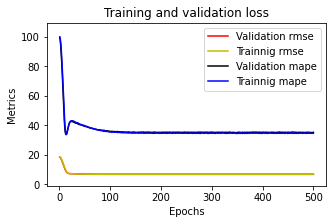

In [61]:
plotme(model3_1_1)


In [62]:
# inputs: distance +  dominant road
model3_1_2 = nnmodel(100, num_hlayers=1,Epoch=500)
model3_1_2

Epoch 1/500
186/186 [==============================] - 0s 1ms/step - loss: 1229856.2500 - mape: 99.5617 - rmse: 1108.9889 - val_loss: 1211226.5000 - val_mape: 98.7016 - val_rmse: 1100.5574
Epoch 2/500
186/186 [==============================] - 0s 803us/step - loss: 1183981.3750 - mape: 96.7410 - rmse: 1088.1091 - val_loss: 1139514.6250 - val_mape: 94.2731 - val_rmse: 1067.4805
Epoch 3/500
186/186 [==============================] - 0s 741us/step - loss: 1090645.0000 - mape: 90.8593 - rmse: 1044.3395 - val_loss: 1027422.3125 - val_mape: 87.0038 - val_rmse: 1013.6184
Epoch 4/500
186/186 [==============================] - 0s 822us/step - loss: 963593.5000 - mape: 82.3689 - rmse: 981.6280 - val_loss: 889253.1250 - val_mape: 77.4330 - val_rmse: 943.0022
Epoch 5/500
186/186 [==============================] - 0s 761us/step - loss: 819069.1250 - mape: 71.9283 - rmse: 905.0244 - val_loss: 742183.1250 - val_mape: 66.2102 - val_rmse: 861.5005
Epoch 6/500
186/186 [==============================] - 

Epoch 88/500
186/186 [==============================] - 0s 758us/step - loss: 159238.3281 - mape: 35.2259 - rmse: 399.0468 - val_loss: 167359.2812 - val_mape: 35.3941 - val_rmse: 409.0957
Epoch 89/500
186/186 [==============================] - 0s 769us/step - loss: 159227.3281 - mape: 35.0759 - rmse: 399.0330 - val_loss: 167373.9062 - val_mape: 35.4269 - val_rmse: 409.1136
Epoch 90/500
186/186 [==============================] - 0s 760us/step - loss: 159249.2969 - mape: 34.9610 - rmse: 399.0605 - val_loss: 167403.7969 - val_mape: 35.3909 - val_rmse: 409.1501
Epoch 91/500
186/186 [==============================] - 0s 792us/step - loss: 159216.5781 - mape: 35.0375 - rmse: 399.0195 - val_loss: 167398.8438 - val_mape: 35.5197 - val_rmse: 409.1440
Epoch 92/500
186/186 [==============================] - 0s 785us/step - loss: 159212.0625 - mape: 34.9259 - rmse: 399.0139 - val_loss: 167405.7188 - val_mape: 35.3194 - val_rmse: 409.1524
Epoch 93/500
186/186 [==============================] - 0s 8

186/186 [==============================] - 0s 822us/step - loss: 159144.3125 - mape: 34.6938 - rmse: 398.9290 - val_loss: 167820.1719 - val_mape: 35.0805 - val_rmse: 409.6586
Epoch 175/500
186/186 [==============================] - 0s 776us/step - loss: 159149.2656 - mape: 34.5479 - rmse: 398.9352 - val_loss: 167795.7031 - val_mape: 35.2279 - val_rmse: 409.6287
Epoch 176/500
186/186 [==============================] - 0s 774us/step - loss: 159152.7812 - mape: 34.4509 - rmse: 398.9396 - val_loss: 167801.3125 - val_mape: 35.3149 - val_rmse: 409.6356
Epoch 177/500
186/186 [==============================] - 0s 756us/step - loss: 159144.6250 - mape: 34.7445 - rmse: 398.9294 - val_loss: 167832.2500 - val_mape: 35.2395 - val_rmse: 409.6733
Epoch 178/500
186/186 [==============================] - 0s 809us/step - loss: 159171.4531 - mape: 34.6018 - rmse: 398.9630 - val_loss: 167820.5469 - val_mape: 34.9843 - val_rmse: 409.6591
Epoch 179/500
186/186 [==============================] - 0s 772us/ste

186/186 [==============================] - 0s 817us/step - loss: 159153.8281 - mape: 34.6343 - rmse: 398.9409 - val_loss: 167825.0156 - val_mape: 35.1132 - val_rmse: 409.6645
Epoch 261/500
186/186 [==============================] - 0s 804us/step - loss: 159130.9531 - mape: 34.4641 - rmse: 398.9122 - val_loss: 167817.6094 - val_mape: 35.4008 - val_rmse: 409.6555
Epoch 262/500
186/186 [==============================] - 0s 772us/step - loss: 159153.6562 - mape: 34.7542 - rmse: 398.9407 - val_loss: 167816.2031 - val_mape: 35.1408 - val_rmse: 409.6537
Epoch 263/500
186/186 [==============================] - 0s 819us/step - loss: 159185.0000 - mape: 34.6686 - rmse: 398.9799 - val_loss: 167823.7969 - val_mape: 35.0681 - val_rmse: 409.6630
Epoch 264/500
186/186 [==============================] - 0s 749us/step - loss: 159141.6250 - mape: 34.5249 - rmse: 398.9256 - val_loss: 167837.2812 - val_mape: 35.1412 - val_rmse: 409.6795
Epoch 265/500
186/186 [==============================] - 0s 818us/ste

186/186 [==============================] - 0s 770us/step - loss: 159134.0625 - mape: 34.6088 - rmse: 398.9161 - val_loss: 167840.3906 - val_mape: 35.3437 - val_rmse: 409.6833
Epoch 347/500
186/186 [==============================] - 0s 729us/step - loss: 159148.9688 - mape: 34.6529 - rmse: 398.9348 - val_loss: 167805.9219 - val_mape: 35.1613 - val_rmse: 409.6412
Epoch 348/500
186/186 [==============================] - 0s 773us/step - loss: 159149.8125 - mape: 34.5015 - rmse: 398.9359 - val_loss: 167811.3438 - val_mape: 35.3411 - val_rmse: 409.6478
Epoch 349/500
186/186 [==============================] - 0s 769us/step - loss: 159151.2969 - mape: 34.6174 - rmse: 398.9377 - val_loss: 167820.9844 - val_mape: 35.3635 - val_rmse: 409.6596
Epoch 350/500
186/186 [==============================] - 0s 845us/step - loss: 159166.5000 - mape: 34.7087 - rmse: 398.9568 - val_loss: 167808.1562 - val_mape: 35.2987 - val_rmse: 409.6440
Epoch 351/500
186/186 [==============================] - 0s 781us/ste

186/186 [==============================] - 0s 776us/step - loss: 159141.9375 - mape: 34.6580 - rmse: 398.9260 - val_loss: 167832.5625 - val_mape: 35.0647 - val_rmse: 409.6737
Epoch 433/500
186/186 [==============================] - 0s 817us/step - loss: 159144.1094 - mape: 34.4943 - rmse: 398.9287 - val_loss: 167822.7344 - val_mape: 35.0855 - val_rmse: 409.6617
Epoch 434/500
186/186 [==============================] - 0s 779us/step - loss: 159149.0625 - mape: 34.6043 - rmse: 398.9349 - val_loss: 167823.1719 - val_mape: 35.1335 - val_rmse: 409.6623
Epoch 435/500
186/186 [==============================] - 0s 746us/step - loss: 159153.9531 - mape: 34.7195 - rmse: 398.9410 - val_loss: 167824.1562 - val_mape: 35.0651 - val_rmse: 409.6635
Epoch 436/500
186/186 [==============================] - 0s 817us/step - loss: 159157.4062 - mape: 34.5359 - rmse: 398.9454 - val_loss: 167792.8906 - val_mape: 35.0566 - val_rmse: 409.6253
Epoch 437/500
186/186 [==============================] - 0s 742us/ste

In [63]:
202.7127227783203/60

3.378545379638672

In [64]:
# inputs: distance +  dominant road
model3_1_3 = nnmodel(200, num_hlayers=1,Epoch=500)
model3_1_3

Epoch 1/500
186/186 [==============================] - 0s 1ms/step - loss: 1223805.8750 - mape: 99.1992 - rmse: 1106.2576 - val_loss: 1190913.2500 - val_mape: 97.4651 - val_rmse: 1091.2897
Epoch 2/500
186/186 [==============================] - 0s 907us/step - loss: 1134307.6250 - mape: 93.6860 - rmse: 1065.0388 - val_loss: 1053818.8750 - val_mape: 88.7764 - val_rmse: 1026.5568
Epoch 3/500
186/186 [==============================] - 0s 749us/step - loss: 961550.3750 - mape: 82.1878 - rmse: 980.5867 - val_loss: 854599.9375 - val_mape: 74.9227 - val_rmse: 924.4457
Epoch 4/500
186/186 [==============================] - 0s 778us/step - loss: 750045.9375 - mape: 66.5552 - rmse: 866.0519 - val_loss: 640911.5000 - val_mape: 57.7874 - val_rmse: 800.5695
Epoch 5/500
186/186 [==============================] - 0s 824us/step - loss: 547376.5000 - mape: 49.6726 - rmse: 739.8490 - val_loss: 456605.2812 - val_mape: 42.0778 - val_rmse: 675.7258
Epoch 6/500
186/186 [==============================] - 0s 8

Epoch 88/500
186/186 [==============================] - 0s 822us/step - loss: 159177.8281 - mape: 34.6921 - rmse: 398.9709 - val_loss: 167714.7031 - val_mape: 35.0917 - val_rmse: 409.5298
Epoch 89/500
186/186 [==============================] - 0s 827us/step - loss: 159192.7344 - mape: 34.8573 - rmse: 398.9897 - val_loss: 167714.0781 - val_mape: 35.2713 - val_rmse: 409.5291
Epoch 90/500
186/186 [==============================] - 0s 781us/step - loss: 159169.7031 - mape: 34.7004 - rmse: 398.9608 - val_loss: 167728.1250 - val_mape: 35.0179 - val_rmse: 409.5462
Epoch 91/500
186/186 [==============================] - 0s 843us/step - loss: 159169.5469 - mape: 34.3223 - rmse: 398.9606 - val_loss: 167725.3125 - val_mape: 35.2459 - val_rmse: 409.5428
Epoch 92/500
186/186 [==============================] - 0s 823us/step - loss: 159178.7500 - mape: 34.7820 - rmse: 398.9721 - val_loss: 167740.6719 - val_mape: 35.1783 - val_rmse: 409.5616
Epoch 93/500
186/186 [==============================] - 0s 7

186/186 [==============================] - 0s 821us/step - loss: 159149.6406 - mape: 34.7815 - rmse: 398.9356 - val_loss: 167878.5781 - val_mape: 34.7901 - val_rmse: 409.7299
Epoch 175/500
186/186 [==============================] - 0s 774us/step - loss: 159151.3594 - mape: 34.3491 - rmse: 398.9378 - val_loss: 167850.7812 - val_mape: 35.4419 - val_rmse: 409.6960
Epoch 176/500
186/186 [==============================] - 0s 791us/step - loss: 159177.1406 - mape: 34.6364 - rmse: 398.9701 - val_loss: 167924.9062 - val_mape: 35.6349 - val_rmse: 409.7864
Epoch 177/500
186/186 [==============================] - 0s 759us/step - loss: 159204.5625 - mape: 34.8237 - rmse: 399.0045 - val_loss: 167873.8750 - val_mape: 34.8586 - val_rmse: 409.7242
Epoch 178/500
186/186 [==============================] - 0s 813us/step - loss: 159145.4375 - mape: 34.4938 - rmse: 398.9304 - val_loss: 167863.3125 - val_mape: 35.2316 - val_rmse: 409.7112
Epoch 179/500
186/186 [==============================] - 0s 736us/ste

186/186 [==============================] - 0s 766us/step - loss: 159177.6250 - mape: 34.6810 - rmse: 398.9707 - val_loss: 167805.9688 - val_mape: 35.0270 - val_rmse: 409.6413
Epoch 261/500
186/186 [==============================] - 0s 817us/step - loss: 159158.9844 - mape: 34.4576 - rmse: 398.9474 - val_loss: 167796.6406 - val_mape: 35.3372 - val_rmse: 409.6299
Epoch 262/500
186/186 [==============================] - 0s 823us/step - loss: 159159.7500 - mape: 34.5949 - rmse: 398.9483 - val_loss: 167801.8125 - val_mape: 35.4060 - val_rmse: 409.6362
Epoch 263/500
186/186 [==============================] - 0s 811us/step - loss: 159162.1094 - mape: 34.5307 - rmse: 398.9513 - val_loss: 167834.2656 - val_mape: 35.4030 - val_rmse: 409.6758
Epoch 264/500
186/186 [==============================] - 0s 749us/step - loss: 159203.4375 - mape: 34.7341 - rmse: 399.0031 - val_loss: 167835.2500 - val_mape: 35.4106 - val_rmse: 409.6770
Epoch 265/500
186/186 [==============================] - 0s 808us/ste

186/186 [==============================] - 0s 794us/step - loss: 159175.7031 - mape: 34.5817 - rmse: 398.9683 - val_loss: 167823.6719 - val_mape: 35.0794 - val_rmse: 409.6629
Epoch 347/500
186/186 [==============================] - 0s 829us/step - loss: 159164.2812 - mape: 34.4139 - rmse: 398.9540 - val_loss: 167820.5469 - val_mape: 35.4119 - val_rmse: 409.6591
Epoch 348/500
186/186 [==============================] - 0s 797us/step - loss: 159163.6094 - mape: 34.5665 - rmse: 398.9532 - val_loss: 167794.9531 - val_mape: 35.1880 - val_rmse: 409.6278
Epoch 349/500
186/186 [==============================] - 0s 809us/step - loss: 159175.5938 - mape: 34.5467 - rmse: 398.9682 - val_loss: 167823.7031 - val_mape: 35.1073 - val_rmse: 409.6629
Epoch 350/500
186/186 [==============================] - 0s 749us/step - loss: 159161.3438 - mape: 34.6025 - rmse: 398.9503 - val_loss: 167811.5938 - val_mape: 35.4056 - val_rmse: 409.6481
Epoch 351/500
186/186 [==============================] - 0s 766us/ste

186/186 [==============================] - 0s 782us/step - loss: 159164.2344 - mape: 34.4314 - rmse: 398.9539 - val_loss: 167842.0625 - val_mape: 35.5208 - val_rmse: 409.6853
Epoch 433/500
186/186 [==============================] - 0s 832us/step - loss: 159206.8281 - mape: 34.7338 - rmse: 399.0073 - val_loss: 167817.5156 - val_mape: 35.2396 - val_rmse: 409.6554
Epoch 434/500
186/186 [==============================] - 0s 817us/step - loss: 159151.5625 - mape: 34.6752 - rmse: 398.9380 - val_loss: 167845.7500 - val_mape: 34.8693 - val_rmse: 409.6898
Epoch 435/500
186/186 [==============================] - 0s 756us/step - loss: 159162.2188 - mape: 34.6872 - rmse: 398.9514 - val_loss: 167850.2500 - val_mape: 34.7681 - val_rmse: 409.6953
Epoch 436/500
186/186 [==============================] - 0s 709us/step - loss: 159205.8281 - mape: 34.5195 - rmse: 399.0060 - val_loss: 167831.7344 - val_mape: 34.8613 - val_rmse: 409.6727
Epoch 437/500
186/186 [==============================] - 0s 756us/ste

In [65]:
202.6893768310547/60

3.378156280517578

In [66]:
# inputs: distance +  dominant road
model3_1_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model3_1_4

Epoch 1/500
186/186 [==============================] - 0s 1ms/step - loss: 1165135.7500 - mape: 95.4344 - rmse: 1079.4146 - val_loss: 920039.8750 - val_mape: 79.7245 - val_rmse: 959.1871
Epoch 2/500
186/186 [==============================] - 0s 831us/step - loss: 457869.2188 - mape: 47.0993 - rmse: 676.6603 - val_loss: 196488.4844 - val_mape: 39.5814 - val_rmse: 443.2702
Epoch 3/500
186/186 [==============================] - 0s 744us/step - loss: 187580.7812 - mape: 43.1459 - rmse: 433.1060 - val_loss: 185619.1094 - val_mape: 42.7901 - val_rmse: 430.8354
Epoch 4/500
186/186 [==============================] - 0s 827us/step - loss: 182766.0469 - mape: 42.7554 - rmse: 427.5114 - val_loss: 181715.2188 - val_mape: 41.2943 - val_rmse: 426.2807
Epoch 5/500
186/186 [==============================] - 0s 804us/step - loss: 179159.9688 - mape: 41.7142 - rmse: 423.2729 - val_loss: 178651.4531 - val_mape: 40.6156 - val_rmse: 422.6718
Epoch 6/500
186/186 [==============================] - 0s 829us/s

Epoch 45/500
186/186 [==============================] - 0s 809us/step - loss: 159386.2344 - mape: 34.8776 - rmse: 399.2321 - val_loss: 168143.6094 - val_mape: 34.1148 - val_rmse: 410.0532
Epoch 46/500
186/186 [==============================] - 0s 801us/step - loss: 159481.8281 - mape: 34.3712 - rmse: 399.3517 - val_loss: 167850.8906 - val_mape: 35.6707 - val_rmse: 409.6961
Epoch 47/500
186/186 [==============================] - 0s 768us/step - loss: 159337.5781 - mape: 34.6899 - rmse: 399.1711 - val_loss: 167863.5625 - val_mape: 34.6006 - val_rmse: 409.7115
Epoch 48/500
186/186 [==============================] - 0s 791us/step - loss: 159401.3438 - mape: 34.4831 - rmse: 399.2510 - val_loss: 167826.2500 - val_mape: 35.3939 - val_rmse: 409.6660
Epoch 49/500
186/186 [==============================] - 0s 784us/step - loss: 159391.6875 - mape: 34.5722 - rmse: 399.2389 - val_loss: 168030.3281 - val_mape: 36.1997 - val_rmse: 409.9150
Epoch 50/500
186/186 [==============================] - 0s 8

186/186 [==============================] - 0s 854us/step - loss: 159346.8750 - mape: 34.4260 - rmse: 399.1828 - val_loss: 168034.2031 - val_mape: 36.0919 - val_rmse: 409.9197
Epoch 132/500
186/186 [==============================] - 0s 814us/step - loss: 159526.6406 - mape: 34.6605 - rmse: 399.4079 - val_loss: 167873.1406 - val_mape: 35.1506 - val_rmse: 409.7232
Epoch 133/500
186/186 [==============================] - 0s 793us/step - loss: 159339.2500 - mape: 34.5903 - rmse: 399.1732 - val_loss: 168057.9531 - val_mape: 34.1249 - val_rmse: 409.9487
Epoch 134/500
186/186 [==============================] - 0s 841us/step - loss: 159404.5469 - mape: 34.5393 - rmse: 399.2550 - val_loss: 167909.3438 - val_mape: 35.3181 - val_rmse: 409.7674
Epoch 135/500
186/186 [==============================] - 0s 865us/step - loss: 159381.3750 - mape: 34.4259 - rmse: 399.2260 - val_loss: 167923.4844 - val_mape: 35.4759 - val_rmse: 409.7847
Epoch 136/500
186/186 [==============================] - 0s 797us/ste

186/186 [==============================] - 0s 835us/step - loss: 159303.9688 - mape: 34.6585 - rmse: 399.1290 - val_loss: 167697.6250 - val_mape: 35.0057 - val_rmse: 409.5090
Epoch 218/500
186/186 [==============================] - 0s 859us/step - loss: 159358.9375 - mape: 34.5841 - rmse: 399.1979 - val_loss: 167748.6719 - val_mape: 35.3153 - val_rmse: 409.5713
Epoch 219/500
186/186 [==============================] - 0s 832us/step - loss: 159367.0000 - mape: 34.6291 - rmse: 399.2080 - val_loss: 168778.1875 - val_mape: 37.2877 - val_rmse: 410.8262
Epoch 220/500
186/186 [==============================] - 0s 798us/step - loss: 159342.8906 - mape: 34.8072 - rmse: 399.1778 - val_loss: 167967.5625 - val_mape: 36.2952 - val_rmse: 409.8385
Epoch 221/500
186/186 [==============================] - 0s 819us/step - loss: 159372.8125 - mape: 34.6451 - rmse: 399.2152 - val_loss: 167983.1875 - val_mape: 36.0417 - val_rmse: 409.8575
Epoch 222/500
186/186 [==============================] - 0s 772us/ste

186/186 [==============================] - 0s 818us/step - loss: 159345.6719 - mape: 34.6846 - rmse: 399.1812 - val_loss: 167871.4219 - val_mape: 35.3838 - val_rmse: 409.7212
Epoch 304/500
186/186 [==============================] - 0s 817us/step - loss: 159372.2969 - mape: 34.5569 - rmse: 399.2146 - val_loss: 167812.4219 - val_mape: 34.8994 - val_rmse: 409.6491
Epoch 305/500
186/186 [==============================] - 0s 806us/step - loss: 159391.7656 - mape: 34.5017 - rmse: 399.2390 - val_loss: 168089.9844 - val_mape: 36.3134 - val_rmse: 409.9878
Epoch 306/500
186/186 [==============================] - 0s 810us/step - loss: 159348.7656 - mape: 34.6643 - rmse: 399.1851 - val_loss: 167877.6250 - val_mape: 35.1951 - val_rmse: 409.7287
Epoch 307/500
186/186 [==============================] - 0s 830us/step - loss: 159332.0781 - mape: 34.6857 - rmse: 399.1642 - val_loss: 167884.6250 - val_mape: 35.5095 - val_rmse: 409.7373
Epoch 308/500
186/186 [==============================] - 0s 735us/ste

186/186 [==============================] - 0s 834us/step - loss: 159376.0469 - mape: 34.7405 - rmse: 399.2193 - val_loss: 167943.5781 - val_mape: 35.9975 - val_rmse: 409.8092
Epoch 390/500
186/186 [==============================] - 0s 814us/step - loss: 159308.8594 - mape: 34.8118 - rmse: 399.1351 - val_loss: 167805.8438 - val_mape: 35.4521 - val_rmse: 409.6411
Epoch 391/500
186/186 [==============================] - 0s 846us/step - loss: 159317.5000 - mape: 34.6267 - rmse: 399.1460 - val_loss: 167989.5469 - val_mape: 35.7738 - val_rmse: 409.8653
Epoch 392/500
186/186 [==============================] - 0s 791us/step - loss: 159285.6719 - mape: 34.7089 - rmse: 399.1061 - val_loss: 167976.4062 - val_mape: 36.0174 - val_rmse: 409.8492
Epoch 393/500
186/186 [==============================] - 0s 782us/step - loss: 159432.5938 - mape: 34.5705 - rmse: 399.2901 - val_loss: 167780.9062 - val_mape: 35.1508 - val_rmse: 409.6107
Epoch 394/500
186/186 [==============================] - 0s 844us/ste

186/186 [==============================] - 0s 724us/step - loss: 159407.6719 - mape: 34.7409 - rmse: 399.2589 - val_loss: 167773.3594 - val_mape: 34.8939 - val_rmse: 409.6015
Epoch 476/500
186/186 [==============================] - 0s 811us/step - loss: 159433.2344 - mape: 34.7405 - rmse: 399.2909 - val_loss: 167795.5938 - val_mape: 35.8142 - val_rmse: 409.6286
Epoch 477/500
186/186 [==============================] - 0s 724us/step - loss: 159322.0000 - mape: 34.4935 - rmse: 399.1516 - val_loss: 167902.7969 - val_mape: 36.0519 - val_rmse: 409.7594
Epoch 478/500
186/186 [==============================] - 0s 797us/step - loss: 159317.0938 - mape: 34.8570 - rmse: 399.1454 - val_loss: 167675.3438 - val_mape: 34.7936 - val_rmse: 409.4818
Epoch 479/500
186/186 [==============================] - 0s 802us/step - loss: 159347.2812 - mape: 34.5934 - rmse: 399.1833 - val_loss: 167992.5312 - val_mape: 34.1952 - val_rmse: 409.8689
Epoch 480/500
186/186 [==============================] - 0s 803us/ste

In [67]:
202.09515380859375/60

3.3682525634765623

In [68]:
# inputs: distance +  dominant road
model3_1_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model3_1_5

Epoch 1/500
186/186 [==============================] - 0s 1ms/step - loss: 960158.1875 - mape: 80.2615 - rmse: 979.8766 - val_loss: 299188.0625 - val_mape: 33.9656 - val_rmse: 546.9808
Epoch 2/500
186/186 [==============================] - 0s 908us/step - loss: 194956.1875 - mape: 42.2362 - rmse: 441.5384 - val_loss: 183819.2656 - val_mape: 42.0573 - val_rmse: 428.7415
Epoch 3/500
186/186 [==============================] - 0s 1ms/step - loss: 179568.6406 - mape: 42.0738 - rmse: 423.7554 - val_loss: 178524.3125 - val_mape: 41.9345 - val_rmse: 422.5214
Epoch 4/500
186/186 [==============================] - 0s 874us/step - loss: 174398.3906 - mape: 40.7748 - rmse: 417.6103 - val_loss: 174422.0312 - val_mape: 40.4947 - val_rmse: 417.6386
Epoch 5/500
186/186 [==============================] - 0s 896us/step - loss: 170068.4219 - mape: 39.8346 - rmse: 412.3935 - val_loss: 171385.4531 - val_mape: 38.9723 - val_rmse: 413.9873
Epoch 6/500
186/186 [==============================] - 0s 910us/step 

Epoch 45/500
186/186 [==============================] - 0s 859us/step - loss: 159318.8125 - mape: 34.6011 - rmse: 399.1476 - val_loss: 167643.2344 - val_mape: 34.9186 - val_rmse: 409.4426
Epoch 46/500
186/186 [==============================] - 0s 942us/step - loss: 159579.0781 - mape: 34.4703 - rmse: 399.4735 - val_loss: 167567.0312 - val_mape: 35.1433 - val_rmse: 409.3495
Epoch 47/500
186/186 [==============================] - 0s 848us/step - loss: 159754.9219 - mape: 34.7123 - rmse: 399.6935 - val_loss: 167630.7344 - val_mape: 34.9003 - val_rmse: 409.4273
Epoch 48/500
186/186 [==============================] - 0s 876us/step - loss: 159491.2969 - mape: 34.6738 - rmse: 399.3636 - val_loss: 167792.3750 - val_mape: 35.8378 - val_rmse: 409.6247
Epoch 49/500
186/186 [==============================] - 0s 895us/step - loss: 159401.7969 - mape: 34.7214 - rmse: 399.2516 - val_loss: 167756.7031 - val_mape: 34.5598 - val_rmse: 409.5811
Epoch 50/500
186/186 [==============================] - 0s 9

186/186 [==============================] - 0s 860us/step - loss: 157338.5000 - mape: 34.5549 - rmse: 396.6592 - val_loss: 165397.0312 - val_mape: 36.7286 - val_rmse: 406.6903
Epoch 132/500
186/186 [==============================] - 0s 878us/step - loss: 157380.1875 - mape: 34.7284 - rmse: 396.7117 - val_loss: 164681.9219 - val_mape: 34.6742 - val_rmse: 405.8102
Epoch 133/500
186/186 [==============================] - 0s 901us/step - loss: 157211.7188 - mape: 34.1481 - rmse: 396.4993 - val_loss: 165849.3438 - val_mape: 37.4284 - val_rmse: 407.2461
Epoch 134/500
186/186 [==============================] - 0s 867us/step - loss: 157443.4219 - mape: 34.6330 - rmse: 396.7914 - val_loss: 164531.6719 - val_mape: 35.3398 - val_rmse: 405.6250
Epoch 135/500
186/186 [==============================] - 0s 860us/step - loss: 156972.0938 - mape: 34.5049 - rmse: 396.1971 - val_loss: 164595.2031 - val_mape: 34.0344 - val_rmse: 405.7033
Epoch 136/500
186/186 [==============================] - 0s 944us/ste

186/186 [==============================] - 0s 822us/step - loss: 155100.7656 - mape: 34.3701 - rmse: 393.8283 - val_loss: 161196.1719 - val_mape: 33.9893 - val_rmse: 401.4924
Epoch 218/500
186/186 [==============================] - 0s 900us/step - loss: 154966.0781 - mape: 34.1448 - rmse: 393.6573 - val_loss: 160906.0781 - val_mape: 34.9534 - val_rmse: 401.1310
Epoch 219/500
186/186 [==============================] - 0s 874us/step - loss: 155259.6094 - mape: 34.4334 - rmse: 394.0300 - val_loss: 161141.1250 - val_mape: 35.5131 - val_rmse: 401.4239
Epoch 220/500
186/186 [==============================] - 0s 938us/step - loss: 155035.4375 - mape: 34.4807 - rmse: 393.7454 - val_loss: 160902.9688 - val_mape: 35.0098 - val_rmse: 401.1271
Epoch 221/500
186/186 [==============================] - 0s 911us/step - loss: 155082.4062 - mape: 34.4492 - rmse: 393.8050 - val_loss: 160955.8906 - val_mape: 33.8590 - val_rmse: 401.1931
Epoch 222/500
186/186 [==============================] - 0s 907us/ste

186/186 [==============================] - 0s 917us/step - loss: 154085.4844 - mape: 34.1688 - rmse: 392.5372 - val_loss: 158435.5781 - val_mape: 34.5216 - val_rmse: 398.0397
Epoch 304/500
186/186 [==============================] - 0s 893us/step - loss: 153843.0156 - mape: 34.1670 - rmse: 392.2283 - val_loss: 158725.3594 - val_mape: 33.6014 - val_rmse: 398.4035
Epoch 305/500
186/186 [==============================] - 0s 967us/step - loss: 153818.8750 - mape: 34.1288 - rmse: 392.1975 - val_loss: 158455.0781 - val_mape: 35.1542 - val_rmse: 398.0642
Epoch 306/500
186/186 [==============================] - 0s 930us/step - loss: 153651.7344 - mape: 34.2751 - rmse: 391.9843 - val_loss: 158757.2188 - val_mape: 33.6438 - val_rmse: 398.4435
Epoch 307/500
186/186 [==============================] - 0s 839us/step - loss: 153828.7188 - mape: 34.0172 - rmse: 392.2101 - val_loss: 159052.8906 - val_mape: 35.9689 - val_rmse: 398.8144
Epoch 308/500
186/186 [==============================] - 0s 888us/ste

186/186 [==============================] - 0s 929us/step - loss: 153045.9219 - mape: 34.1469 - rmse: 391.2108 - val_loss: 157026.7500 - val_mape: 32.7115 - val_rmse: 396.2660
Epoch 390/500
186/186 [==============================] - 0s 877us/step - loss: 153360.4375 - mape: 34.1110 - rmse: 391.6126 - val_loss: 156451.4844 - val_mape: 33.6441 - val_rmse: 395.5395
Epoch 391/500
186/186 [==============================] - 0s 876us/step - loss: 153087.8750 - mape: 33.7635 - rmse: 391.2645 - val_loss: 157228.0469 - val_mape: 35.5507 - val_rmse: 396.5199
Epoch 392/500
186/186 [==============================] - 0s 910us/step - loss: 153090.8125 - mape: 34.2124 - rmse: 391.2682 - val_loss: 156953.3125 - val_mape: 34.5742 - val_rmse: 396.1733
Epoch 393/500
186/186 [==============================] - 0s 935us/step - loss: 153167.6406 - mape: 34.2550 - rmse: 391.3664 - val_loss: 157049.2031 - val_mape: 32.7829 - val_rmse: 396.2943
Epoch 394/500
186/186 [==============================] - 0s 831us/ste

186/186 [==============================] - 0s 911us/step - loss: 152748.1406 - mape: 34.0480 - rmse: 390.8301 - val_loss: 155820.2344 - val_mape: 34.7282 - val_rmse: 394.7407
Epoch 476/500
186/186 [==============================] - 0s 949us/step - loss: 152859.1094 - mape: 33.9113 - rmse: 390.9720 - val_loss: 156545.5000 - val_mape: 36.2087 - val_rmse: 395.6583
Epoch 477/500
186/186 [==============================] - 0s 829us/step - loss: 152960.9062 - mape: 34.2877 - rmse: 391.1022 - val_loss: 155883.8594 - val_mape: 33.0973 - val_rmse: 394.8213
Epoch 478/500
186/186 [==============================] - 0s 895us/step - loss: 152873.8125 - mape: 34.0907 - rmse: 390.9908 - val_loss: 157605.7812 - val_mape: 31.2538 - val_rmse: 396.9959
Epoch 479/500
186/186 [==============================] - 0s 935us/step - loss: 153080.9062 - mape: 33.8329 - rmse: 391.2556 - val_loss: 155839.6406 - val_mape: 33.2193 - val_rmse: 394.7653
Epoch 480/500
186/186 [==============================] - 0s 880us/ste

In [69]:
202.09852600097656/60

3.3683087666829428

#### 2. Target (mean) encoding of dominated roadtype

In [70]:
df22 = df1.iloc[:,0:6].copy()
df22 = df22.drop('hour of day',axis=1)
df22.head()

travel time  distance  est_dist  similarity_dijk 1st ranked
0          823  0.358222  0.256935         0.878788    primary
1         1066  0.453845  0.408831         0.734375    primary
2          665  0.312429  0.248150         0.796875    primary
3         1053  0.428195  0.300619         0.725000    primary
5         1441  0.365045  0.340558         0.623656    primary

In [71]:
te = TargetEncoder()
df22['1st ranked'] = te.fit_transform(df22['1st ranked'],df22['travel time'])

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [72]:
df22.head()

travel time  distance  est_dist  similarity_dijk   1st ranked
0          823  0.358222  0.256935         0.878788  1022.278963
1         1066  0.453845  0.408831         0.734375  1022.278963
2          665  0.312429  0.248150         0.796875  1022.278963
3         1053  0.428195  0.300619         0.725000  1022.278963
5         1441  0.365045  0.340558         0.623656  1022.278963

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

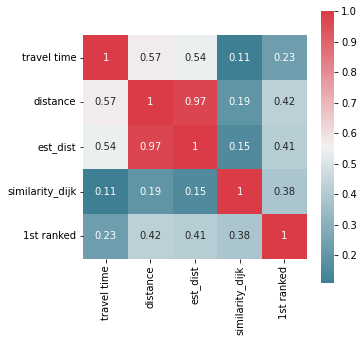

In [73]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(5,5))
corr = df22.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [74]:
x = np.array(df22[['est_dist','1st ranked']])
y = np.array(df22['travel time'])
x

array([[2.56935426e-01, 1.02227896e+03],
       [4.08830673e-01, 1.02227896e+03],
       [2.48149516e-01, 1.02227896e+03],
       ...,
       [3.09478438e-01, 1.02227896e+03],
       [5.69750757e-01, 1.02227896e+03],
       [1.59170526e-01, 8.81838867e+02]])

In [75]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [76]:
print(X_train.shape)
print(X_test.shape)
# X_train

(5924, 2)
(1482, 2)


In [77]:
# inputs: distance + hour + dominant road
model3_3_1 = nnmodel(50, num_hlayers=1,Epoch=500)
model3_3_1

Epoch 1/500
186/186 [==============================] - 0s 1ms/step - loss: 351179.7812 - mape: 46.1447 - rmse: 592.6042 - val_loss: 213470.5469 - val_mape: 47.2877 - val_rmse: 462.0287
Epoch 2/500
186/186 [==============================] - 0s 773us/step - loss: 218889.8750 - mape: 47.6703 - rmse: 467.8567 - val_loss: 213160.8594 - val_mape: 46.4394 - val_rmse: 461.6935
Epoch 3/500
186/186 [==============================] - 0s 802us/step - loss: 218945.5781 - mape: 47.5125 - rmse: 467.9162 - val_loss: 213109.6719 - val_mape: 46.1843 - val_rmse: 461.6380
Epoch 4/500
186/186 [==============================] - 0s 745us/step - loss: 218782.4844 - mape: 47.5284 - rmse: 467.7419 - val_loss: 213284.0781 - val_mape: 45.2168 - val_rmse: 461.8269
Epoch 5/500
186/186 [==============================] - 0s 777us/step - loss: 218710.2969 - mape: 47.4922 - rmse: 467.6647 - val_loss: 213784.3125 - val_mape: 44.4213 - val_rmse: 462.3682
Epoch 6/500
186/186 [==============================] - 0s 762us/ste

Epoch 45/500
186/186 [==============================] - 0s 742us/step - loss: 216882.9062 - mape: 47.2823 - rmse: 465.7069 - val_loss: 210705.1406 - val_mape: 45.6297 - val_rmse: 459.0263
Epoch 46/500
186/186 [==============================] - 0s 762us/step - loss: 216149.3438 - mape: 46.9373 - rmse: 464.9186 - val_loss: 210893.7969 - val_mape: 46.8985 - val_rmse: 459.2318
Epoch 47/500
186/186 [==============================] - 0s 690us/step - loss: 216480.8594 - mape: 47.2603 - rmse: 465.2750 - val_loss: 210555.4375 - val_mape: 45.2328 - val_rmse: 458.8632
Epoch 48/500
186/186 [==============================] - 0s 714us/step - loss: 215989.2656 - mape: 46.9794 - rmse: 464.7465 - val_loss: 210392.6406 - val_mape: 46.0187 - val_rmse: 458.6858
Epoch 49/500
186/186 [==============================] - 0s 836us/step - loss: 215601.5469 - mape: 46.9255 - rmse: 464.3291 - val_loss: 211076.0781 - val_mape: 47.6151 - val_rmse: 459.4302
Epoch 50/500
186/186 [==============================] - 0s 7

186/186 [==============================] - 0s 697us/step - loss: 180519.7031 - mape: 40.2743 - rmse: 424.8761 - val_loss: 180829.3750 - val_mape: 42.5189 - val_rmse: 425.2404
Epoch 132/500
186/186 [==============================] - 0s 783us/step - loss: 181219.2344 - mape: 40.4886 - rmse: 425.6985 - val_loss: 180024.8125 - val_mape: 41.7262 - val_rmse: 424.2933
Epoch 133/500
186/186 [==============================] - 0s 671us/step - loss: 180405.4375 - mape: 40.3899 - rmse: 424.7416 - val_loss: 184162.8281 - val_mape: 35.0059 - val_rmse: 429.1420
Epoch 134/500
186/186 [==============================] - 0s 703us/step - loss: 179906.7188 - mape: 40.1699 - rmse: 424.1541 - val_loss: 177857.4531 - val_mape: 39.7756 - val_rmse: 421.7315
Epoch 135/500
186/186 [==============================] - 0s 872us/step - loss: 179870.8438 - mape: 40.2225 - rmse: 424.1118 - val_loss: 177684.2031 - val_mape: 38.6041 - val_rmse: 421.5260
Epoch 136/500
186/186 [==============================] - 0s 777us/ste

186/186 [==============================] - 0s 711us/step - loss: 161937.8281 - mape: 34.8415 - rmse: 402.4150 - val_loss: 163571.3125 - val_mape: 34.5244 - val_rmse: 404.4395
Epoch 218/500
186/186 [==============================] - 0s 736us/step - loss: 161770.5781 - mape: 34.4769 - rmse: 402.2071 - val_loss: 166452.8438 - val_mape: 38.5039 - val_rmse: 407.9863
Epoch 219/500
186/186 [==============================] - 0s 833us/step - loss: 161572.5469 - mape: 34.4503 - rmse: 401.9609 - val_loss: 163547.4531 - val_mape: 36.2481 - val_rmse: 404.4100
Epoch 220/500
186/186 [==============================] - 0s 710us/step - loss: 161837.4375 - mape: 34.5372 - rmse: 402.2903 - val_loss: 165151.7031 - val_mape: 36.0334 - val_rmse: 406.3886
Epoch 221/500
186/186 [==============================] - 0s 783us/step - loss: 161847.9375 - mape: 34.6046 - rmse: 402.3033 - val_loss: 164115.4844 - val_mape: 33.7341 - val_rmse: 405.1117
Epoch 222/500
186/186 [==============================] - 0s 787us/ste

186/186 [==============================] - 0s 798us/step - loss: 160827.0469 - mape: 34.3296 - rmse: 401.0325 - val_loss: 164101.3125 - val_mape: 32.9169 - val_rmse: 405.0942
Epoch 304/500
186/186 [==============================] - 0s 795us/step - loss: 160897.5156 - mape: 34.5270 - rmse: 401.1203 - val_loss: 164192.8281 - val_mape: 35.9341 - val_rmse: 405.2072
Epoch 305/500
186/186 [==============================] - 0s 781us/step - loss: 162779.5312 - mape: 34.3813 - rmse: 403.4594 - val_loss: 164004.5156 - val_mape: 35.5540 - val_rmse: 404.9747
Epoch 306/500
186/186 [==============================] - 0s 758us/step - loss: 160779.0156 - mape: 34.2978 - rmse: 400.9726 - val_loss: 163459.5625 - val_mape: 37.0557 - val_rmse: 404.3013
Epoch 307/500
186/186 [==============================] - 0s 707us/step - loss: 160921.4688 - mape: 34.3453 - rmse: 401.1502 - val_loss: 163965.9531 - val_mape: 32.3823 - val_rmse: 404.9271
Epoch 308/500
186/186 [==============================] - 0s 739us/ste

186/186 [==============================] - 0s 716us/step - loss: 161138.5781 - mape: 34.3128 - rmse: 401.4207 - val_loss: 164407.7500 - val_mape: 31.5867 - val_rmse: 405.4723
Epoch 390/500
186/186 [==============================] - 0s 756us/step - loss: 160561.9219 - mape: 34.0899 - rmse: 400.7018 - val_loss: 163582.5156 - val_mape: 37.0194 - val_rmse: 404.4534
Epoch 391/500
186/186 [==============================] - 0s 692us/step - loss: 160829.5156 - mape: 34.4974 - rmse: 401.0356 - val_loss: 162750.1094 - val_mape: 33.4566 - val_rmse: 403.4230
Epoch 392/500
186/186 [==============================] - 0s 784us/step - loss: 160604.7969 - mape: 34.2147 - rmse: 400.7553 - val_loss: 165241.8281 - val_mape: 36.0417 - val_rmse: 406.4995
Epoch 393/500
186/186 [==============================] - 0s 775us/step - loss: 160864.0469 - mape: 34.3305 - rmse: 401.0786 - val_loss: 163424.7344 - val_mape: 32.6514 - val_rmse: 404.2582
Epoch 394/500
186/186 [==============================] - 0s 685us/ste

186/186 [==============================] - 0s 774us/step - loss: 160488.0781 - mape: 34.3226 - rmse: 400.6096 - val_loss: 163800.7188 - val_mape: 32.0081 - val_rmse: 404.7230
Epoch 476/500
186/186 [==============================] - 0s 690us/step - loss: 160595.0312 - mape: 34.0582 - rmse: 400.7431 - val_loss: 162022.9844 - val_mape: 34.5251 - val_rmse: 402.5208
Epoch 477/500
186/186 [==============================] - 0s 725us/step - loss: 159913.5469 - mape: 34.1557 - rmse: 399.8919 - val_loss: 163538.2031 - val_mape: 36.2651 - val_rmse: 404.3986
Epoch 478/500
186/186 [==============================] - 0s 705us/step - loss: 160750.4375 - mape: 34.4345 - rmse: 400.9370 - val_loss: 162166.6875 - val_mape: 34.1370 - val_rmse: 402.6992
Epoch 479/500
186/186 [==============================] - 0s 731us/step - loss: 159854.0156 - mape: 34.3732 - rmse: 399.8175 - val_loss: 164651.6875 - val_mape: 33.6657 - val_rmse: 405.7729
Epoch 480/500
186/186 [==============================] - 0s 781us/ste

In [78]:
# inputs: distance + hour + dominant road
model3_3_2 = nnmodel(100, num_hlayers=1,Epoch=500)
model3_3_2

Epoch 1/500
186/186 [==============================] - 0s 1ms/step - loss: 383469.0312 - mape: 49.2764 - rmse: 619.2488 - val_loss: 213119.0312 - val_mape: 46.3109 - val_rmse: 461.6482
Epoch 2/500
186/186 [==============================] - 0s 792us/step - loss: 218836.3281 - mape: 47.5221 - rmse: 467.7994 - val_loss: 213077.8750 - val_mape: 46.0331 - val_rmse: 461.6036
Epoch 3/500
186/186 [==============================] - 0s 744us/step - loss: 218541.6562 - mape: 47.4137 - rmse: 467.4844 - val_loss: 213257.6250 - val_mape: 45.1749 - val_rmse: 461.7982
Epoch 4/500
186/186 [==============================] - 0s 766us/step - loss: 218827.1719 - mape: 47.4180 - rmse: 467.7897 - val_loss: 213268.5781 - val_mape: 47.2274 - val_rmse: 461.8101
Epoch 5/500
186/186 [==============================] - 0s 834us/step - loss: 218704.2969 - mape: 47.5643 - rmse: 467.6583 - val_loss: 212967.8594 - val_mape: 45.7097 - val_rmse: 461.4844
Epoch 6/500
186/186 [==============================] - 0s 706us/ste

Epoch 45/500
186/186 [==============================] - 0s 747us/step - loss: 214365.6094 - mape: 46.8489 - rmse: 462.9963 - val_loss: 208940.1562 - val_mape: 44.7204 - val_rmse: 457.0997
Epoch 46/500
186/186 [==============================] - 0s 695us/step - loss: 214085.9688 - mape: 46.7590 - rmse: 462.6942 - val_loss: 208805.4688 - val_mape: 44.4951 - val_rmse: 456.9524
Epoch 47/500
186/186 [==============================] - 0s 797us/step - loss: 213923.3438 - mape: 46.7241 - rmse: 462.5185 - val_loss: 208337.7344 - val_mape: 45.5232 - val_rmse: 456.4403
Epoch 48/500
186/186 [==============================] - 0s 830us/step - loss: 213266.4688 - mape: 46.8918 - rmse: 461.8078 - val_loss: 208192.4062 - val_mape: 44.6848 - val_rmse: 456.2811
Epoch 49/500
186/186 [==============================] - 0s 765us/step - loss: 213713.6562 - mape: 46.5061 - rmse: 462.2917 - val_loss: 208038.5000 - val_mape: 46.2860 - val_rmse: 456.1124
Epoch 50/500
186/186 [==============================] - 0s 7

186/186 [==============================] - 0s 783us/step - loss: 170200.6562 - mape: 37.8147 - rmse: 412.5538 - val_loss: 173165.7812 - val_mape: 40.1813 - val_rmse: 416.1319
Epoch 132/500
186/186 [==============================] - 0s 734us/step - loss: 169576.1875 - mape: 37.5329 - rmse: 411.7963 - val_loss: 171385.5469 - val_mape: 39.2948 - val_rmse: 413.9874
Epoch 133/500
186/186 [==============================] - 0s 788us/step - loss: 169735.7969 - mape: 37.7064 - rmse: 411.9901 - val_loss: 175663.0938 - val_mape: 32.8129 - val_rmse: 419.1218
Epoch 134/500
186/186 [==============================] - 0s 781us/step - loss: 169735.3750 - mape: 37.2906 - rmse: 411.9895 - val_loss: 171427.7500 - val_mape: 39.1919 - val_rmse: 414.0383
Epoch 135/500
186/186 [==============================] - 0s 789us/step - loss: 169636.1719 - mape: 37.3827 - rmse: 411.8691 - val_loss: 170446.3281 - val_mape: 38.3812 - val_rmse: 412.8515
Epoch 136/500
186/186 [==============================] - 0s 718us/ste

186/186 [==============================] - 0s 794us/step - loss: 163372.9062 - mape: 34.6191 - rmse: 404.1942 - val_loss: 165429.2344 - val_mape: 35.1628 - val_rmse: 406.7299
Epoch 218/500
186/186 [==============================] - 0s 723us/step - loss: 162212.0000 - mape: 34.5866 - rmse: 402.7555 - val_loss: 167802.8750 - val_mape: 31.7272 - val_rmse: 409.6375
Epoch 219/500
186/186 [==============================] - 0s 762us/step - loss: 162858.5469 - mape: 34.4586 - rmse: 403.5574 - val_loss: 176531.0938 - val_mape: 42.2958 - val_rmse: 420.1560
Epoch 220/500
186/186 [==============================] - 0s 804us/step - loss: 163046.2812 - mape: 34.8788 - rmse: 403.7899 - val_loss: 166572.8125 - val_mape: 36.4510 - val_rmse: 408.1333
Epoch 221/500
186/186 [==============================] - 0s 683us/step - loss: 162868.0156 - mape: 34.6115 - rmse: 403.5691 - val_loss: 165144.8594 - val_mape: 33.7436 - val_rmse: 406.3802
Epoch 222/500
186/186 [==============================] - 0s 808us/ste

186/186 [==============================] - 0s 746us/step - loss: 161169.2188 - mape: 34.1921 - rmse: 401.4589 - val_loss: 165717.5781 - val_mape: 32.5962 - val_rmse: 407.0842
Epoch 304/500
186/186 [==============================] - 0s 733us/step - loss: 162160.6406 - mape: 34.5399 - rmse: 402.6917 - val_loss: 165336.5469 - val_mape: 35.8576 - val_rmse: 406.6160
Epoch 305/500
186/186 [==============================] - 0s 787us/step - loss: 162039.8281 - mape: 34.3470 - rmse: 402.5417 - val_loss: 164261.3906 - val_mape: 34.4774 - val_rmse: 405.2917
Epoch 306/500
186/186 [==============================] - 0s 772us/step - loss: 161387.8438 - mape: 34.4259 - rmse: 401.7310 - val_loss: 164915.0625 - val_mape: 33.0290 - val_rmse: 406.0974
Epoch 307/500
186/186 [==============================] - 0s 839us/step - loss: 161919.4062 - mape: 34.0455 - rmse: 402.3921 - val_loss: 164918.7500 - val_mape: 36.7000 - val_rmse: 406.1019
Epoch 308/500
186/186 [==============================] - 0s 805us/ste

186/186 [==============================] - 0s 705us/step - loss: 161003.3281 - mape: 34.5325 - rmse: 401.2522 - val_loss: 164931.1875 - val_mape: 34.9075 - val_rmse: 406.1172
Epoch 390/500
186/186 [==============================] - 0s 742us/step - loss: 161793.6250 - mape: 34.4387 - rmse: 402.2358 - val_loss: 166002.2188 - val_mape: 31.8974 - val_rmse: 407.4337
Epoch 391/500
186/186 [==============================] - 0s 730us/step - loss: 160891.6094 - mape: 34.2209 - rmse: 401.1130 - val_loss: 179898.5156 - val_mape: 43.0138 - val_rmse: 424.1444
Epoch 392/500
186/186 [==============================] - 0s 743us/step - loss: 162302.6094 - mape: 34.7075 - rmse: 402.8680 - val_loss: 163877.0938 - val_mape: 34.5840 - val_rmse: 404.8174
Epoch 393/500
186/186 [==============================] - 0s 827us/step - loss: 160719.5625 - mape: 34.3194 - rmse: 400.8984 - val_loss: 165478.2188 - val_mape: 33.4099 - val_rmse: 406.7901
Epoch 394/500
186/186 [==============================] - 0s 740us/ste

186/186 [==============================] - 0s 704us/step - loss: 160198.5156 - mape: 34.4037 - rmse: 400.2481 - val_loss: 163640.5781 - val_mape: 34.5611 - val_rmse: 404.5251
Epoch 476/500
186/186 [==============================] - 0s 709us/step - loss: 159907.8750 - mape: 34.2015 - rmse: 399.8848 - val_loss: 163595.9062 - val_mape: 33.4927 - val_rmse: 404.4699
Epoch 477/500
186/186 [==============================] - 0s 771us/step - loss: 160936.7344 - mape: 34.5060 - rmse: 401.1692 - val_loss: 164037.2188 - val_mape: 36.7945 - val_rmse: 405.0151
Epoch 478/500
186/186 [==============================] - 0s 731us/step - loss: 161517.3438 - mape: 34.7092 - rmse: 401.8922 - val_loss: 178971.0312 - val_mape: 29.1820 - val_rmse: 423.0497
Epoch 479/500
186/186 [==============================] - 0s 714us/step - loss: 161044.0469 - mape: 34.0827 - rmse: 401.3029 - val_loss: 168525.8750 - val_mape: 38.7723 - val_rmse: 410.5190
Epoch 480/500
186/186 [==============================] - 0s 785us/ste

In [79]:
# inputs: distance + hour + dominant road
model3_3_3 = nnmodel(300, num_hlayers=1,Epoch=500)
model3_3_3

Epoch 1/500
186/186 [==============================] - 0s 1ms/step - loss: 327923.9062 - mape: 49.7494 - rmse: 572.6464 - val_loss: 213470.4844 - val_mape: 47.3702 - val_rmse: 462.0287
Epoch 2/500
186/186 [==============================] - 0s 816us/step - loss: 218859.3906 - mape: 47.4340 - rmse: 467.8241 - val_loss: 213055.6562 - val_mape: 46.3703 - val_rmse: 461.5795
Epoch 3/500
186/186 [==============================] - 0s 860us/step - loss: 218781.7812 - mape: 47.4361 - rmse: 467.7411 - val_loss: 213106.6406 - val_mape: 46.9170 - val_rmse: 461.6347
Epoch 4/500
186/186 [==============================] - 0s 801us/step - loss: 219003.3594 - mape: 47.5519 - rmse: 467.9779 - val_loss: 212864.0938 - val_mape: 46.0770 - val_rmse: 461.3720
Epoch 5/500
186/186 [==============================] - 0s 784us/step - loss: 218996.3125 - mape: 47.1860 - rmse: 467.9704 - val_loss: 214432.0000 - val_mape: 48.8273 - val_rmse: 463.0680
Epoch 6/500
186/186 [==============================] - 0s 830us/ste

Epoch 45/500
186/186 [==============================] - 0s 828us/step - loss: 205644.1875 - mape: 45.0448 - rmse: 453.4801 - val_loss: 202411.4219 - val_mape: 47.4732 - val_rmse: 449.9016
Epoch 46/500
186/186 [==============================] - 0s 844us/step - loss: 205010.3438 - mape: 45.3491 - rmse: 452.7807 - val_loss: 201663.3750 - val_mape: 40.6421 - val_rmse: 449.0695
Epoch 47/500
186/186 [==============================] - 0s 818us/step - loss: 202842.9688 - mape: 44.9028 - rmse: 450.3809 - val_loss: 200177.0312 - val_mape: 40.8434 - val_rmse: 447.4115
Epoch 48/500
186/186 [==============================] - 0s 749us/step - loss: 203319.3125 - mape: 44.6006 - rmse: 450.9094 - val_loss: 197174.0000 - val_mape: 43.7094 - val_rmse: 444.0428
Epoch 49/500
186/186 [==============================] - 0s 836us/step - loss: 201165.6406 - mape: 44.5608 - rmse: 448.5149 - val_loss: 200603.0156 - val_mape: 47.9804 - val_rmse: 447.8873
Epoch 50/500
186/186 [==============================] - 0s 8

186/186 [==============================] - 0s 760us/step - loss: 165414.2656 - mape: 34.7286 - rmse: 406.7115 - val_loss: 169966.5469 - val_mape: 38.3852 - val_rmse: 412.2700
Epoch 132/500
186/186 [==============================] - 0s 846us/step - loss: 165881.4844 - mape: 35.1574 - rmse: 407.2855 - val_loss: 167548.4844 - val_mape: 36.6235 - val_rmse: 409.3269
Epoch 133/500
186/186 [==============================] - 0s 807us/step - loss: 164170.3281 - mape: 34.7153 - rmse: 405.1794 - val_loss: 167500.3438 - val_mape: 33.6085 - val_rmse: 409.2681
Epoch 134/500
186/186 [==============================] - 0s 833us/step - loss: 165157.2031 - mape: 34.6561 - rmse: 406.3954 - val_loss: 168450.9219 - val_mape: 37.9462 - val_rmse: 410.4277
Epoch 135/500
186/186 [==============================] - 0s 750us/step - loss: 166222.3594 - mape: 34.8607 - rmse: 407.7038 - val_loss: 169606.1094 - val_mape: 31.8670 - val_rmse: 411.8326
Epoch 136/500
186/186 [==============================] - 0s 768us/ste

186/186 [==============================] - 0s 776us/step - loss: 165000.7812 - mape: 34.8113 - rmse: 406.2029 - val_loss: 168295.5156 - val_mape: 36.2038 - val_rmse: 410.2384
Epoch 218/500
186/186 [==============================] - 0s 847us/step - loss: 165470.5000 - mape: 35.1342 - rmse: 406.7806 - val_loss: 169383.7344 - val_mape: 32.7061 - val_rmse: 411.5626
Epoch 219/500
186/186 [==============================] - 0s 775us/step - loss: 165094.0312 - mape: 34.6835 - rmse: 406.3177 - val_loss: 172748.5625 - val_mape: 30.7259 - val_rmse: 415.6303
Epoch 220/500
186/186 [==============================] - 0s 849us/step - loss: 165204.4062 - mape: 34.8403 - rmse: 406.4535 - val_loss: 167918.3125 - val_mape: 35.7644 - val_rmse: 409.7784
Epoch 221/500
186/186 [==============================] - 0s 768us/step - loss: 165334.7188 - mape: 34.6249 - rmse: 406.6137 - val_loss: 168637.0469 - val_mape: 33.4855 - val_rmse: 410.6544
Epoch 222/500
186/186 [==============================] - 0s 810us/ste

186/186 [==============================] - 0s 845us/step - loss: 164733.2500 - mape: 34.8400 - rmse: 405.8734 - val_loss: 170101.6094 - val_mape: 38.4047 - val_rmse: 412.4338
Epoch 304/500
186/186 [==============================] - 0s 758us/step - loss: 165077.8438 - mape: 34.7800 - rmse: 406.2977 - val_loss: 168381.0781 - val_mape: 34.5358 - val_rmse: 410.3426
Epoch 305/500
186/186 [==============================] - 0s 804us/step - loss: 164970.4062 - mape: 34.7633 - rmse: 406.1655 - val_loss: 168221.6094 - val_mape: 35.0002 - val_rmse: 410.1483
Epoch 306/500
186/186 [==============================] - 0s 774us/step - loss: 164589.0469 - mape: 35.0344 - rmse: 405.6958 - val_loss: 168796.7969 - val_mape: 36.9829 - val_rmse: 410.8489
Epoch 307/500
186/186 [==============================] - 0s 822us/step - loss: 165323.2188 - mape: 34.9053 - rmse: 406.5996 - val_loss: 168284.6562 - val_mape: 35.8147 - val_rmse: 410.2251
Epoch 308/500
186/186 [==============================] - 0s 821us/ste

186/186 [==============================] - 0s 777us/step - loss: 164864.4375 - mape: 34.8892 - rmse: 406.0350 - val_loss: 176612.5625 - val_mape: 42.7878 - val_rmse: 420.2530
Epoch 390/500
186/186 [==============================] - 0s 768us/step - loss: 163678.8750 - mape: 34.7307 - rmse: 404.5724 - val_loss: 171729.6406 - val_mape: 39.9607 - val_rmse: 414.4027
Epoch 391/500
186/186 [==============================] - 0s 757us/step - loss: 163400.2812 - mape: 34.7916 - rmse: 404.2280 - val_loss: 168146.9844 - val_mape: 33.9051 - val_rmse: 410.0573
Epoch 392/500
186/186 [==============================] - 0s 804us/step - loss: 164299.8281 - mape: 35.0275 - rmse: 405.3391 - val_loss: 168129.4688 - val_mape: 33.7337 - val_rmse: 410.0359
Epoch 393/500
186/186 [==============================] - 0s 843us/step - loss: 164361.3594 - mape: 34.9613 - rmse: 405.4150 - val_loss: 168518.8438 - val_mape: 33.2167 - val_rmse: 410.5105
Epoch 394/500
186/186 [==============================] - 0s 784us/ste

186/186 [==============================] - 0s 847us/step - loss: 164722.0781 - mape: 34.9536 - rmse: 405.8597 - val_loss: 168919.3750 - val_mape: 32.3691 - val_rmse: 410.9980
Epoch 476/500
186/186 [==============================] - 0s 816us/step - loss: 163943.6094 - mape: 34.8347 - rmse: 404.8995 - val_loss: 166952.2500 - val_mape: 35.1863 - val_rmse: 408.5979
Epoch 477/500
186/186 [==============================] - 0s 809us/step - loss: 162448.1250 - mape: 34.7217 - rmse: 403.0486 - val_loss: 172376.0469 - val_mape: 30.4986 - val_rmse: 415.1819
Epoch 478/500
186/186 [==============================] - 0s 794us/step - loss: 163887.6250 - mape: 34.8880 - rmse: 404.8304 - val_loss: 169862.4219 - val_mape: 31.9069 - val_rmse: 412.1437
Epoch 479/500
186/186 [==============================] - 0s 726us/step - loss: 164289.4375 - mape: 34.7902 - rmse: 405.3263 - val_loss: 168477.8438 - val_mape: 37.6440 - val_rmse: 410.4605
Epoch 480/500
186/186 [==============================] - 0s 833us/ste

In [80]:
# inputs: distance + hour + dominant road
model3_3_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model3_3_4

Epoch 1/500
186/186 [==============================] - 0s 1ms/step - loss: 311693.9062 - mape: 49.6942 - rmse: 558.2955 - val_loss: 213293.3281 - val_mape: 45.3541 - val_rmse: 461.8369
Epoch 2/500
186/186 [==============================] - 0s 847us/step - loss: 219204.6094 - mape: 47.4574 - rmse: 468.1929 - val_loss: 213196.5938 - val_mape: 46.8254 - val_rmse: 461.7322
Epoch 3/500
186/186 [==============================] - 0s 838us/step - loss: 219402.3281 - mape: 47.6466 - rmse: 468.4040 - val_loss: 213178.9844 - val_mape: 45.3411 - val_rmse: 461.7131
Epoch 4/500
186/186 [==============================] - 0s 800us/step - loss: 219390.2969 - mape: 47.4057 - rmse: 468.3912 - val_loss: 213085.3594 - val_mape: 45.4168 - val_rmse: 461.6117
Epoch 5/500
186/186 [==============================] - 0s 852us/step - loss: 219057.2656 - mape: 47.3883 - rmse: 468.0356 - val_loss: 212931.0938 - val_mape: 46.4829 - val_rmse: 461.4446
Epoch 6/500
186/186 [==============================] - 0s 823us/ste

Epoch 45/500
186/186 [==============================] - 0s 791us/step - loss: 206108.7656 - mape: 45.4683 - rmse: 453.9920 - val_loss: 201897.1719 - val_mape: 47.1971 - val_rmse: 449.3297
Epoch 46/500
186/186 [==============================] - 0s 885us/step - loss: 204172.2031 - mape: 45.0593 - rmse: 451.8542 - val_loss: 198620.3906 - val_mape: 41.9412 - val_rmse: 445.6685
Epoch 47/500
186/186 [==============================] - 0s 778us/step - loss: 204374.7812 - mape: 44.8226 - rmse: 452.0783 - val_loss: 197418.1562 - val_mape: 41.2537 - val_rmse: 444.3176
Epoch 48/500
186/186 [==============================] - 0s 881us/step - loss: 200533.0469 - mape: 44.1114 - rmse: 447.8092 - val_loss: 196806.3125 - val_mape: 46.5694 - val_rmse: 443.6286
Epoch 49/500
186/186 [==============================] - 0s 792us/step - loss: 198711.5781 - mape: 43.9186 - rmse: 445.7708 - val_loss: 193116.6562 - val_mape: 40.0733 - val_rmse: 439.4504
Epoch 50/500
186/186 [==============================] - 0s 8

186/186 [==============================] - 0s 824us/step - loss: 163727.0781 - mape: 34.7199 - rmse: 404.6320 - val_loss: 175754.5312 - val_mape: 41.9876 - val_rmse: 419.2309
Epoch 132/500
186/186 [==============================] - 0s 817us/step - loss: 165830.4219 - mape: 35.0877 - rmse: 407.2228 - val_loss: 165297.9062 - val_mape: 37.6996 - val_rmse: 406.5685
Epoch 133/500
186/186 [==============================] - 0s 822us/step - loss: 165254.7188 - mape: 35.2171 - rmse: 406.5154 - val_loss: 164618.9531 - val_mape: 33.2504 - val_rmse: 405.7326
Epoch 134/500
186/186 [==============================] - 0s 825us/step - loss: 164451.6094 - mape: 34.8162 - rmse: 405.5263 - val_loss: 165973.0625 - val_mape: 32.3148 - val_rmse: 407.3979
Epoch 135/500
186/186 [==============================] - 0s 831us/step - loss: 163132.8594 - mape: 34.7661 - rmse: 403.8971 - val_loss: 164090.1406 - val_mape: 35.8148 - val_rmse: 405.0804
Epoch 136/500
186/186 [==============================] - 0s 728us/ste

186/186 [==============================] - 0s 814us/step - loss: 165059.2344 - mape: 35.2784 - rmse: 406.2748 - val_loss: 165748.6094 - val_mape: 32.5681 - val_rmse: 407.1223
Epoch 218/500
186/186 [==============================] - 0s 886us/step - loss: 162391.5625 - mape: 34.3329 - rmse: 402.9784 - val_loss: 162490.6250 - val_mape: 36.3669 - val_rmse: 403.1013
Epoch 219/500
186/186 [==============================] - 0s 790us/step - loss: 163075.9062 - mape: 35.1813 - rmse: 403.8266 - val_loss: 184296.0469 - val_mape: 30.5499 - val_rmse: 429.2971
Epoch 220/500
186/186 [==============================] - 0s 814us/step - loss: 163176.2344 - mape: 34.4855 - rmse: 403.9508 - val_loss: 162181.4062 - val_mape: 35.2948 - val_rmse: 402.7175
Epoch 221/500
186/186 [==============================] - 0s 834us/step - loss: 164869.2656 - mape: 35.4033 - rmse: 406.0410 - val_loss: 163578.4375 - val_mape: 37.2847 - val_rmse: 404.4483
Epoch 222/500
186/186 [==============================] - 0s 825us/ste

186/186 [==============================] - 0s 848us/step - loss: 162842.7656 - mape: 35.4192 - rmse: 403.5378 - val_loss: 161934.0000 - val_mape: 33.8935 - val_rmse: 402.4102
Epoch 304/500
186/186 [==============================] - 0s 751us/step - loss: 161001.7812 - mape: 34.6612 - rmse: 401.2503 - val_loss: 163671.0469 - val_mape: 33.1067 - val_rmse: 404.5628
Epoch 305/500
186/186 [==============================] - 0s 788us/step - loss: 162017.5156 - mape: 34.8956 - rmse: 402.5140 - val_loss: 163998.8906 - val_mape: 34.7982 - val_rmse: 404.9678
Epoch 306/500
186/186 [==============================] - 0s 846us/step - loss: 160985.4375 - mape: 34.3155 - rmse: 401.2299 - val_loss: 164610.2500 - val_mape: 36.6139 - val_rmse: 405.7219
Epoch 307/500
186/186 [==============================] - 0s 847us/step - loss: 161668.8438 - mape: 34.9156 - rmse: 402.0807 - val_loss: 162695.3906 - val_mape: 32.2352 - val_rmse: 403.3552
Epoch 308/500
186/186 [==============================] - 0s 814us/ste

186/186 [==============================] - 0s 833us/step - loss: 159876.2188 - mape: 34.1269 - rmse: 399.8452 - val_loss: 161146.6719 - val_mape: 34.2743 - val_rmse: 401.4308
Epoch 390/500
186/186 [==============================] - 0s 886us/step - loss: 160299.8438 - mape: 34.7952 - rmse: 400.3746 - val_loss: 185747.2188 - val_mape: 44.3201 - val_rmse: 430.9840
Epoch 391/500
186/186 [==============================] - 0s 838us/step - loss: 161758.8750 - mape: 34.6160 - rmse: 402.1926 - val_loss: 161682.7969 - val_mape: 33.5792 - val_rmse: 402.0980
Epoch 392/500
186/186 [==============================] - 0s 778us/step - loss: 160048.8281 - mape: 34.2515 - rmse: 400.0610 - val_loss: 161384.0156 - val_mape: 35.8443 - val_rmse: 401.7263
Epoch 393/500
186/186 [==============================] - 0s 809us/step - loss: 160507.2031 - mape: 34.6147 - rmse: 400.6335 - val_loss: 161606.5469 - val_mape: 36.1609 - val_rmse: 402.0032
Epoch 394/500
186/186 [==============================] - 0s 830us/ste

186/186 [==============================] - 0s 816us/step - loss: 160746.5938 - mape: 34.7104 - rmse: 400.9322 - val_loss: 161388.7031 - val_mape: 33.7222 - val_rmse: 401.7321
Epoch 476/500
186/186 [==============================] - 0s 822us/step - loss: 160915.4688 - mape: 34.2647 - rmse: 401.1427 - val_loss: 161969.3594 - val_mape: 32.7020 - val_rmse: 402.4542
Epoch 477/500
186/186 [==============================] - 0s 762us/step - loss: 160304.5000 - mape: 34.3848 - rmse: 400.3804 - val_loss: 161077.0156 - val_mape: 34.2935 - val_rmse: 401.3440
Epoch 478/500
186/186 [==============================] - 0s 740us/step - loss: 159038.7188 - mape: 34.5450 - rmse: 398.7966 - val_loss: 166586.8281 - val_mape: 32.0527 - val_rmse: 408.1505
Epoch 479/500
186/186 [==============================] - 0s 814us/step - loss: 161297.4219 - mape: 34.7207 - rmse: 401.6185 - val_loss: 161504.1562 - val_mape: 33.2616 - val_rmse: 401.8758
Epoch 480/500
186/186 [==============================] - 0s 855us/ste

In [81]:
# inputs: distance + hour + dominant road
model3_3_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model3_3_5

Epoch 1/500
186/186 [==============================] - 0s 1ms/step - loss: 291085.7500 - mape: 50.0567 - rmse: 539.5236 - val_loss: 215497.6250 - val_mape: 43.1878 - val_rmse: 464.2172
Epoch 2/500
186/186 [==============================] - 0s 909us/step - loss: 219739.1094 - mape: 47.4732 - rmse: 468.7634 - val_loss: 213130.7812 - val_mape: 45.6182 - val_rmse: 461.6609
Epoch 3/500
186/186 [==============================] - 0s 913us/step - loss: 219545.1094 - mape: 47.4063 - rmse: 468.5564 - val_loss: 213982.3750 - val_mape: 44.1622 - val_rmse: 462.5823
Epoch 4/500
186/186 [==============================] - 0s 879us/step - loss: 219366.9531 - mape: 47.2319 - rmse: 468.3663 - val_loss: 216245.8438 - val_mape: 50.0560 - val_rmse: 465.0224
Epoch 5/500
186/186 [==============================] - 0s 877us/step - loss: 220036.6719 - mape: 47.6429 - rmse: 469.0807 - val_loss: 214137.5938 - val_mape: 43.8569 - val_rmse: 462.7500
Epoch 6/500
186/186 [==============================] - 0s 965us/ste

Epoch 45/500
186/186 [==============================] - 0s 935us/step - loss: 168858.0938 - mape: 36.4478 - rmse: 410.9235 - val_loss: 167290.5156 - val_mape: 35.6374 - val_rmse: 409.0116
Epoch 46/500
186/186 [==============================] - 0s 809us/step - loss: 167608.3438 - mape: 35.9197 - rmse: 409.4000 - val_loss: 170784.2188 - val_mape: 39.4213 - val_rmse: 413.2605
Epoch 47/500
186/186 [==============================] - 0s 853us/step - loss: 169845.0156 - mape: 36.1197 - rmse: 412.1226 - val_loss: 177158.2969 - val_mape: 43.3399 - val_rmse: 420.9018
Epoch 48/500
186/186 [==============================] - 0s 875us/step - loss: 169297.6406 - mape: 36.2151 - rmse: 411.4579 - val_loss: 166779.2188 - val_mape: 37.3379 - val_rmse: 408.3861
Epoch 49/500
186/186 [==============================] - 0s 901us/step - loss: 166352.6875 - mape: 35.6068 - rmse: 407.8636 - val_loss: 166398.5469 - val_mape: 34.6636 - val_rmse: 407.9198
Epoch 50/500
186/186 [==============================] - 0s 8

186/186 [==============================] - 0s 836us/step - loss: 163336.5469 - mape: 34.8974 - rmse: 404.1492 - val_loss: 164261.8750 - val_mape: 34.3209 - val_rmse: 405.2923
Epoch 132/500
186/186 [==============================] - 0s 918us/step - loss: 163542.5312 - mape: 34.9828 - rmse: 404.4039 - val_loss: 163931.1250 - val_mape: 36.2387 - val_rmse: 404.8841
Epoch 133/500
186/186 [==============================] - 0s 924us/step - loss: 163769.6094 - mape: 34.8569 - rmse: 404.6846 - val_loss: 165564.1250 - val_mape: 32.1660 - val_rmse: 406.8957
Epoch 134/500
186/186 [==============================] - 0s 903us/step - loss: 163570.4062 - mape: 34.7614 - rmse: 404.4384 - val_loss: 170642.2969 - val_mape: 29.9156 - val_rmse: 413.0887
Epoch 135/500
186/186 [==============================] - 0s 868us/step - loss: 163851.0469 - mape: 34.7279 - rmse: 404.7852 - val_loss: 179176.9219 - val_mape: 29.5578 - val_rmse: 423.2929
Epoch 136/500
186/186 [==============================] - 0s 828us/ste

186/186 [==============================] - 0s 900us/step - loss: 162120.7500 - mape: 34.2375 - rmse: 402.6422 - val_loss: 171255.6250 - val_mape: 42.0326 - val_rmse: 413.8304
Epoch 218/500
186/186 [==============================] - 0s 935us/step - loss: 162815.6719 - mape: 35.0603 - rmse: 403.5042 - val_loss: 162607.9062 - val_mape: 36.1107 - val_rmse: 403.2467
Epoch 219/500
186/186 [==============================] - 0s 838us/step - loss: 164922.5000 - mape: 35.3040 - rmse: 406.1065 - val_loss: 175970.7188 - val_mape: 31.1373 - val_rmse: 419.4886
Epoch 220/500
186/186 [==============================] - 0s 919us/step - loss: 164239.0156 - mape: 35.4129 - rmse: 405.2641 - val_loss: 164081.0156 - val_mape: 36.9593 - val_rmse: 405.0692
Epoch 221/500
186/186 [==============================] - 0s 906us/step - loss: 161464.6562 - mape: 34.6367 - rmse: 401.8267 - val_loss: 163767.9375 - val_mape: 34.8741 - val_rmse: 404.6825
Epoch 222/500
186/186 [==============================] - 0s 893us/ste

186/186 [==============================] - 0s 874us/step - loss: 161628.4844 - mape: 35.0187 - rmse: 402.0305 - val_loss: 164293.7031 - val_mape: 31.8595 - val_rmse: 405.3316
Epoch 304/500
186/186 [==============================] - 0s 827us/step - loss: 161383.0469 - mape: 34.5993 - rmse: 401.7251 - val_loss: 161987.6562 - val_mape: 34.9444 - val_rmse: 402.4769
Epoch 305/500
186/186 [==============================] - 0s 940us/step - loss: 163209.8125 - mape: 34.9481 - rmse: 403.9923 - val_loss: 166721.8125 - val_mape: 38.8770 - val_rmse: 408.3158
Epoch 306/500
186/186 [==============================] - 0s 924us/step - loss: 161342.4062 - mape: 34.7596 - rmse: 401.6745 - val_loss: 169237.0938 - val_mape: 39.6293 - val_rmse: 411.3844
Epoch 307/500
186/186 [==============================] - 0s 853us/step - loss: 161952.0938 - mape: 35.0924 - rmse: 402.4327 - val_loss: 162295.9531 - val_mape: 34.1213 - val_rmse: 402.8597
Epoch 308/500
186/186 [==============================] - 0s 938us/ste

186/186 [==============================] - 0s 815us/step - loss: 160375.7500 - mape: 34.7545 - rmse: 400.4694 - val_loss: 163633.3438 - val_mape: 31.6647 - val_rmse: 404.5162
Epoch 390/500
186/186 [==============================] - 0s 850us/step - loss: 159981.3594 - mape: 34.2267 - rmse: 399.9767 - val_loss: 161750.6094 - val_mape: 33.9387 - val_rmse: 402.1823
Epoch 391/500
186/186 [==============================] - 0s 862us/step - loss: 161326.7188 - mape: 34.8750 - rmse: 401.6550 - val_loss: 167536.7812 - val_mape: 38.7465 - val_rmse: 409.3126
Epoch 392/500
186/186 [==============================] - 0s 833us/step - loss: 161944.8438 - mape: 34.8153 - rmse: 402.4237 - val_loss: 164102.3438 - val_mape: 38.0074 - val_rmse: 405.0955
Epoch 393/500
186/186 [==============================] - 0s 864us/step - loss: 160981.3750 - mape: 34.8177 - rmse: 401.2249 - val_loss: 163183.8438 - val_mape: 35.5294 - val_rmse: 403.9602
Epoch 394/500
186/186 [==============================] - 0s 830us/ste

186/186 [==============================] - 0s 848us/step - loss: 159964.6562 - mape: 34.5691 - rmse: 399.9558 - val_loss: 162024.9219 - val_mape: 34.4472 - val_rmse: 402.5232
Epoch 476/500
186/186 [==============================] - 0s 893us/step - loss: 159998.1094 - mape: 34.3361 - rmse: 399.9977 - val_loss: 161966.9062 - val_mape: 34.1000 - val_rmse: 402.4511
Epoch 477/500
186/186 [==============================] - 0s 895us/step - loss: 161196.0938 - mape: 34.8079 - rmse: 401.4923 - val_loss: 162264.1562 - val_mape: 35.9500 - val_rmse: 402.8203
Epoch 478/500
186/186 [==============================] - 0s 884us/step - loss: 160155.5000 - mape: 34.5160 - rmse: 400.1943 - val_loss: 165635.8906 - val_mape: 32.0326 - val_rmse: 406.9839
Epoch 479/500
186/186 [==============================] - 0s 891us/step - loss: 160701.0469 - mape: 34.7710 - rmse: 400.8753 - val_loss: 162445.4531 - val_mape: 32.5004 - val_rmse: 403.0452
Epoch 480/500
186/186 [==============================] - 0s 922us/ste

# sub-problem 4:     ******* input: distance & hour & [1,2,3]ranked roadtypes *********

#### Analysis of features

In [23]:
df4 = df1.copy()
# df4 = df4.drop(['hr_sin','hr_cos','hour of day'],axis=1)
df4.head(10)

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0           823            6  0.358222  0.256935    0.682353         0.878788   
1          1066           14  0.453845  0.408831    0.734375         0.734375   
2           665           17  0.312429  0.248150    0.718310         0.796875   
3          1053           21  0.428195  0.300619    0.563107         0.725000   
5          1441           22  0.365045  0.340558    0.610526         0.623656   
6           663           19  0.366691  0.319411    0.872093         0.925926   
7           838           14  0.368505  0.342642    0.578947         0.555556   
8          1193           14  0.364528  0.319223    0.673684         0.688172   
9           753           16  0.301707  0.264006    0.617284         0.595238   
10          761           23  0.334188  0.270957    0.864198         0.972222   

   1st ranked   2nd ranked    3rd ranked  1st dist  2nd dist  3rd dist  \
0     primary     tertiary  primary_link  0.835209  0.098678  0.033588   
1     primary     tertiary       service  0.695410  0.245933  0.026378   
2     primary  residential      tertiary  0.829429  0.103264  0.067307   
3     primary     tertiary       service  0.762876  0.105233  0.061211   
5     primary  residential      tertiary  0.711699  0.201618  0.086683   
6     primary     tertiary  primary_link  0.888890  0.086300  0.013053   
7     primary  residential      tertiary  0.705119  0.177638  0.117243   
8     primary  residential      tertiary  0.712694  0.212829  0.074477   
9     primary     tertiary   residential  0.682060  0.149788  0.143389   
10    primary     tertiary       service  0.799773  0.094553  0.033452   

      hr_sin        hr_cos  
0   1.000000  6.123234e-17  
1  -0.500000 -8.660254e-01  
2  -0.965926 -2.588190e-01  
3  -0.707107  7.071068e-01  
5  -0.500000  8.660254e-01  
6  -0.965926  2.588190e-01  
7  -0.500000 -8.660254e-01  
8  -0.500000 -8.660254e-01  
9  -0.866025 -5.000000e-01  
10 -0.258819  9.659258e-01

In [24]:
df4 = df4.replace({np.nan:None})
df4.head()

travel time  hour of day  distance  est_dist similarity similarity_dijk  \
0          823            6  0.358222  0.256935   0.682353        0.878788   
1         1066           14  0.453845  0.408831   0.734375        0.734375   
2          665           17  0.312429   0.24815    0.71831        0.796875   
3         1053           21  0.428195  0.300619   0.563107           0.725   
5         1441           22  0.365045  0.340558   0.610526        0.623656   

  1st ranked   2nd ranked    3rd ranked  1st dist   2nd dist   3rd dist  \
0    primary     tertiary  primary_link  0.835209  0.0986779  0.0335885   
1    primary     tertiary       service   0.69541   0.245933  0.0263776   
2    primary  residential      tertiary  0.829429   0.103264  0.0673072   
3    primary     tertiary       service  0.762876   0.105233  0.0612111   
5    primary  residential      tertiary  0.711699   0.201618  0.0866827   

     hr_sin       hr_cos  
0         1  6.12323e-17  
1      -0.5    -0.866025  
2 -0.965926    -0.258819  
3 -0.707107     0.707107  
5      -0.5     0.866025

## Encoding features

#### 1. Target (mean) encoding of dominated roadtype

In [25]:
te = TargetEncoder()
df4['1st ranked'] = te.fit_transform(df4['1st ranked'],df4['travel time'])
df4['2nd ranked'] = te.fit_transform(df4['2nd ranked'],df4['travel time'])
df4['3rd ranked'] = te.fit_transform(df4['3rd ranked'],df4['travel time'])

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [26]:
# Normalize using Min/Max Normalization.
normalize=(df4['1st ranked']-df4['1st ranked'].min())/(df4['1st ranked'].max()-df4['1st ranked'].min())
df4['1st ranked'] = normalize
normalize=(df4['2nd ranked']-df4['2nd ranked'].min())/(df4['2nd ranked'].max()-df4['2nd ranked'].min())
df4['2nd ranked'] = normalize
normalize=(df4['3rd ranked']-df4['3rd ranked'].min())/(df4['3rd ranked'].max()-df4['3rd ranked'].min())
df4['3rd ranked'] = normalize

In [324]:
df4.head()

travel time  hour of day  distance  est_dist similarity similarity_dijk  \
0          823            6  0.358222  0.256935   0.682353        0.878788   
1         1066           14  0.453845  0.408831   0.734375        0.734375   
2          665           17  0.312429   0.24815    0.71831        0.796875   
3         1053           21  0.428195  0.300619   0.563107           0.725   
5         1441           22  0.365045  0.340558   0.610526        0.623656   

   1st ranked  2nd ranked  3rd ranked  1st dist   2nd dist   3rd dist  \
0    0.370117    0.273258    0.155189  0.835209  0.0986779  0.0335885   
1    0.370117    0.273258    0.123172   0.69541   0.245933  0.0263776   
2    0.370117    0.173095    0.379671  0.829429   0.103264  0.0673072   
3    0.370117    0.273258    0.123172  0.762876   0.105233  0.0612111   
5    0.370117    0.173095    0.379671  0.711699   0.201618  0.0866827   

     hr_sin       hr_cos  
0         1  6.12323e-17  
1      -0.5    -0.866025  
2 -0.965926    -0.258819  
3 -0.707107     0.707107  
5      -0.5     0.866025

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

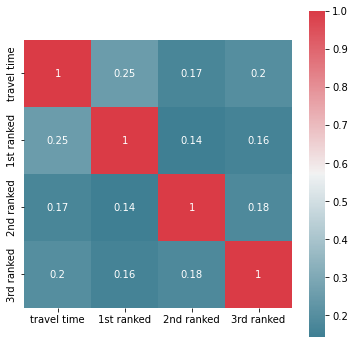

In [113]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(6,6))
corr = df4[['travel time','1st ranked','2nd ranked','3rd ranked']].corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [114]:
x = np.array(df4[['est_dist','1st ranked','2nd ranked','3rd ranked']])
y = np.array(df4['travel time'])
x

array([[0.25693542616036574, 0.3701171631896464, 0.2732576684308975,
        0.15518854728391135],
       [0.40883067254780797, 0.3701171631896464, 0.2732576684308975,
        0.12317157815718732],
       [0.24814951575500446, 0.3701171631896464, 0.1730952221881768,
        0.37967088360444784],
       ...,
       [0.30947843830182353, 0.3701171631896464, 0.1730952221881768,
        0.37967088360444784],
       [0.5697507567726549, 0.3701171631896464, 0.2732576684308975,
        0.31134181498960206],
       [0.15917052554980624, 0.11834331144162333, 0.2901554560011654,
        0.31134181498960206]], dtype=object)

In [115]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [116]:
print(X_train.shape)
print(X_test.shape)
# X_train

(5924, 4)
(1482, 4)


In [119]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_1 = nnmodel_(50, num_hlayers=1,Epoch=500)
model4_1_1

Epoch 1/500
186/186 [==============================] - 0s 1ms/step - loss: 1232299.8750 - mape: 99.7317 - rmse: 1110.0901 - val_loss: 1219480.1250 - val_mape: 99.2458 - val_rmse: 1104.3008
Epoch 2/500
186/186 [==============================] - 0s 930us/step - loss: 1208167.7500 - mape: 98.3485 - rmse: 1099.1669 - val_loss: 1184541.5000 - val_mape: 97.2442 - val_rmse: 1088.3665
Epoch 3/500
186/186 [==============================] - 0s 994us/step - loss: 1163070.6250 - mape: 95.7384 - rmse: 1078.4575 - val_loss: 1129855.6250 - val_mape: 94.0407 - val_rmse: 1062.9467
Epoch 4/500
186/186 [==============================] - 0s 751us/step - loss: 1099907.8750 - mape: 92.0085 - rmse: 1048.7649 - val_loss: 1059032.8750 - val_mape: 89.7508 - val_rmse: 1029.0933
Epoch 5/500
186/186 [==============================] - 0s 865us/step - loss: 1022481.6250 - mape: 87.1998 - rmse: 1011.1783 - val_loss: 976142.7500 - val_mape: 84.5026 - val_rmse: 987.9994
Epoch 6/500
186/186 [============================

Epoch 88/500
186/186 [==============================] - 0s 789us/step - loss: 162344.9688 - mape: 35.8043 - rmse: 402.9206 - val_loss: 169150.5312 - val_mape: 36.1260 - val_rmse: 411.2791
Epoch 89/500
186/186 [==============================] - 0s 730us/step - loss: 162261.3906 - mape: 35.6321 - rmse: 402.8168 - val_loss: 169115.3594 - val_mape: 36.1189 - val_rmse: 411.2364
Epoch 90/500
186/186 [==============================] - 0s 793us/step - loss: 162162.1562 - mape: 35.7342 - rmse: 402.6936 - val_loss: 169084.6094 - val_mape: 35.9806 - val_rmse: 411.1990
Epoch 91/500
186/186 [==============================] - 0s 756us/step - loss: 162055.0312 - mape: 35.4944 - rmse: 402.5606 - val_loss: 169053.3906 - val_mape: 36.0383 - val_rmse: 411.1610
Epoch 92/500
186/186 [==============================] - 0s 768us/step - loss: 161977.7500 - mape: 35.7100 - rmse: 402.4646 - val_loss: 169029.2188 - val_mape: 35.8567 - val_rmse: 411.1316
Epoch 93/500
186/186 [==============================] - 0s 7

186/186 [==============================] - 0s 699us/step - loss: 160246.5000 - mape: 34.8098 - rmse: 400.3080 - val_loss: 169024.7969 - val_mape: 35.5035 - val_rmse: 411.1263
Epoch 175/500
186/186 [==============================] - 0s 704us/step - loss: 160234.8750 - mape: 34.9524 - rmse: 400.2935 - val_loss: 169022.9375 - val_mape: 35.4572 - val_rmse: 411.1240
Epoch 176/500
186/186 [==============================] - 0s 765us/step - loss: 160234.8281 - mape: 34.8808 - rmse: 400.2934 - val_loss: 169026.6719 - val_mape: 35.3699 - val_rmse: 411.1285
Epoch 177/500
186/186 [==============================] - 0s 816us/step - loss: 160249.4062 - mape: 34.8823 - rmse: 400.3116 - val_loss: 169038.4219 - val_mape: 35.2655 - val_rmse: 411.1428
Epoch 178/500
186/186 [==============================] - 0s 757us/step - loss: 160241.0938 - mape: 34.6804 - rmse: 400.3012 - val_loss: 169026.3906 - val_mape: 35.5111 - val_rmse: 411.1282
Epoch 179/500
186/186 [==============================] - 0s 745us/ste

186/186 [==============================] - 0s 720us/step - loss: 160145.8281 - mape: 34.9102 - rmse: 400.1823 - val_loss: 169069.7188 - val_mape: 35.4112 - val_rmse: 411.1809
Epoch 261/500
186/186 [==============================] - 0s 800us/step - loss: 160162.8594 - mape: 34.8952 - rmse: 400.2035 - val_loss: 169086.0625 - val_mape: 35.2552 - val_rmse: 411.2007
Epoch 262/500
186/186 [==============================] - 0s 683us/step - loss: 160152.3125 - mape: 34.6622 - rmse: 400.1903 - val_loss: 169078.7656 - val_mape: 35.3263 - val_rmse: 411.1919
Epoch 263/500
186/186 [==============================] - 0s 836us/step - loss: 160142.2812 - mape: 34.6942 - rmse: 400.1778 - val_loss: 169068.9062 - val_mape: 35.5393 - val_rmse: 411.1799
Epoch 264/500
186/186 [==============================] - 0s 673us/step - loss: 160149.8281 - mape: 35.0770 - rmse: 400.1873 - val_loss: 169075.4688 - val_mape: 35.3555 - val_rmse: 411.1879
Epoch 265/500
186/186 [==============================] - 0s 774us/ste

186/186 [==============================] - 0s 763us/step - loss: 160129.5781 - mape: 34.7661 - rmse: 400.1619 - val_loss: 169033.6875 - val_mape: 35.5099 - val_rmse: 411.1371
Epoch 347/500
186/186 [==============================] - 0s 786us/step - loss: 160133.9531 - mape: 34.7545 - rmse: 400.1674 - val_loss: 169041.7656 - val_mape: 35.6978 - val_rmse: 411.1469
Epoch 348/500
186/186 [==============================] - 0s 730us/step - loss: 160133.3125 - mape: 34.9565 - rmse: 400.1666 - val_loss: 169031.5312 - val_mape: 35.5555 - val_rmse: 411.1344
Epoch 349/500
186/186 [==============================] - 0s 745us/step - loss: 160136.6562 - mape: 34.9837 - rmse: 400.1708 - val_loss: 169046.1719 - val_mape: 35.3516 - val_rmse: 411.1523
Epoch 350/500
186/186 [==============================] - 0s 742us/step - loss: 160131.7969 - mape: 34.6767 - rmse: 400.1647 - val_loss: 169041.8750 - val_mape: 35.6691 - val_rmse: 411.1470
Epoch 351/500
186/186 [==============================] - 0s 789us/ste

186/186 [==============================] - 0s 828us/step - loss: 160130.8125 - mape: 35.0747 - rmse: 400.1635 - val_loss: 169012.8125 - val_mape: 35.4422 - val_rmse: 411.1117
Epoch 433/500
186/186 [==============================] - 0s 817us/step - loss: 160119.9688 - mape: 34.8490 - rmse: 400.1499 - val_loss: 169021.2031 - val_mape: 35.3508 - val_rmse: 411.1219
Epoch 434/500
186/186 [==============================] - 0s 738us/step - loss: 160123.0625 - mape: 34.8122 - rmse: 400.1538 - val_loss: 169016.2656 - val_mape: 35.4452 - val_rmse: 411.1159
Epoch 435/500
186/186 [==============================] - 0s 890us/step - loss: 160127.5938 - mape: 34.9456 - rmse: 400.1595 - val_loss: 169013.3438 - val_mape: 35.5134 - val_rmse: 411.1123
Epoch 436/500
186/186 [==============================] - 0s 840us/step - loss: 160121.0781 - mape: 34.9770 - rmse: 400.1513 - val_loss: 169023.1250 - val_mape: 35.3168 - val_rmse: 411.1242
Epoch 437/500
186/186 [==============================] - 0s 805us/ste

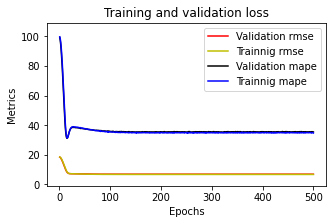

In [120]:
plotme(model4_1_1)

In [121]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_2 = nnmodel_(100, num_hlayers=1,Epoch=500)
model4_1_2

Epoch 1/500
186/186 [==============================] - 0s 1ms/step - loss: 1229138.5000 - mape: 99.5484 - rmse: 1108.6652 - val_loss: 1210486.0000 - val_mape: 98.7338 - val_rmse: 1100.2209
Epoch 2/500
186/186 [==============================] - 0s 860us/step - loss: 1187235.7500 - mape: 97.1381 - rmse: 1089.6035 - val_loss: 1148164.8750 - val_mape: 95.1242 - val_rmse: 1071.5245
Epoch 3/500
186/186 [==============================] - 0s 828us/step - loss: 1105804.6250 - mape: 92.3484 - rmse: 1051.5725 - val_loss: 1049188.7500 - val_mape: 89.1429 - val_rmse: 1024.2992
Epoch 4/500
186/186 [==============================] - 0s 760us/step - loss: 992151.3125 - mape: 85.2882 - rmse: 996.0679 - val_loss: 923607.1250 - val_mape: 81.0553 - val_rmse: 961.0448
Epoch 5/500
186/186 [==============================] - 0s 867us/step - loss: 859684.7500 - mape: 76.3056 - rmse: 927.1918 - val_loss: 786948.1250 - val_mape: 71.4819 - val_rmse: 887.1010
Epoch 6/500
186/186 [==============================] - 

Epoch 88/500
186/186 [==============================] - 0s 845us/step - loss: 160580.0156 - mape: 35.1830 - rmse: 400.7244 - val_loss: 168893.5625 - val_mape: 35.4461 - val_rmse: 410.9666
Epoch 89/500
186/186 [==============================] - 0s 851us/step - loss: 160518.8281 - mape: 34.8270 - rmse: 400.6480 - val_loss: 168896.8438 - val_mape: 35.6775 - val_rmse: 410.9706
Epoch 90/500
186/186 [==============================] - 0s 849us/step - loss: 160515.0000 - mape: 35.1339 - rmse: 400.6432 - val_loss: 168921.6562 - val_mape: 35.3003 - val_rmse: 411.0008
Epoch 91/500
186/186 [==============================] - 0s 879us/step - loss: 160516.9062 - mape: 35.0625 - rmse: 400.6456 - val_loss: 168910.7188 - val_mape: 35.4945 - val_rmse: 410.9875
Epoch 92/500
186/186 [==============================] - 0s 838us/step - loss: 160472.9688 - mape: 34.7476 - rmse: 400.5908 - val_loss: 168919.7812 - val_mape: 35.5331 - val_rmse: 410.9985
Epoch 93/500
186/186 [==============================] - 0s 8

186/186 [==============================] - 0s 864us/step - loss: 160151.8438 - mape: 34.8494 - rmse: 400.1898 - val_loss: 169082.8125 - val_mape: 35.2004 - val_rmse: 411.1968
Epoch 175/500
186/186 [==============================] - 0s 865us/step - loss: 160149.3438 - mape: 34.8393 - rmse: 400.1866 - val_loss: 169065.2344 - val_mape: 35.4339 - val_rmse: 411.1754
Epoch 176/500
186/186 [==============================] - 0s 855us/step - loss: 160153.8438 - mape: 34.7022 - rmse: 400.1923 - val_loss: 169065.7969 - val_mape: 35.7188 - val_rmse: 411.1761
Epoch 177/500
186/186 [==============================] - 0s 855us/step - loss: 160150.8750 - mape: 35.0177 - rmse: 400.1885 - val_loss: 169055.6250 - val_mape: 35.4626 - val_rmse: 411.1638
Epoch 178/500
186/186 [==============================] - 0s 790us/step - loss: 160172.1719 - mape: 35.0171 - rmse: 400.2151 - val_loss: 169063.9844 - val_mape: 35.4422 - val_rmse: 411.1739
Epoch 179/500
186/186 [==============================] - 0s 711us/ste

186/186 [==============================] - 0s 860us/step - loss: 160114.1562 - mape: 34.8553 - rmse: 400.1427 - val_loss: 169033.9062 - val_mape: 35.3190 - val_rmse: 411.1373
Epoch 261/500
186/186 [==============================] - 0s 875us/step - loss: 160116.3281 - mape: 34.7041 - rmse: 400.1454 - val_loss: 169022.6250 - val_mape: 35.5709 - val_rmse: 411.1236
Epoch 262/500
186/186 [==============================] - 0s 872us/step - loss: 160098.3594 - mape: 35.0678 - rmse: 400.1229 - val_loss: 169028.5469 - val_mape: 35.3715 - val_rmse: 411.1308
Epoch 263/500
186/186 [==============================] - 0s 860us/step - loss: 160119.1562 - mape: 34.8157 - rmse: 400.1489 - val_loss: 169021.2031 - val_mape: 35.6056 - val_rmse: 411.1219
Epoch 264/500
186/186 [==============================] - 0s 862us/step - loss: 160094.7969 - mape: 34.7987 - rmse: 400.1185 - val_loss: 169018.7188 - val_mape: 35.5765 - val_rmse: 411.1189
Epoch 265/500
186/186 [==============================] - 0s 895us/ste

186/186 [==============================] - 0s 827us/step - loss: 160098.4688 - mape: 35.1042 - rmse: 400.1231 - val_loss: 168914.0469 - val_mape: 35.5120 - val_rmse: 410.9915
Epoch 347/500
186/186 [==============================] - 0s 751us/step - loss: 160069.2344 - mape: 34.8470 - rmse: 400.0865 - val_loss: 168927.7031 - val_mape: 35.3575 - val_rmse: 411.0081
Epoch 348/500
186/186 [==============================] - 0s 741us/step - loss: 160071.0156 - mape: 35.0178 - rmse: 400.0887 - val_loss: 168935.0312 - val_mape: 35.2982 - val_rmse: 411.0171
Epoch 349/500
186/186 [==============================] - 0s 837us/step - loss: 160097.1094 - mape: 34.8098 - rmse: 400.1214 - val_loss: 168930.3281 - val_mape: 35.3367 - val_rmse: 411.0114
Epoch 350/500
186/186 [==============================] - 0s 802us/step - loss: 160082.1094 - mape: 34.7262 - rmse: 400.1026 - val_loss: 168919.5938 - val_mape: 35.6655 - val_rmse: 410.9983
Epoch 351/500
186/186 [==============================] - 0s 855us/ste

186/186 [==============================] - 0s 850us/step - loss: 160066.5625 - mape: 34.9285 - rmse: 400.0832 - val_loss: 168907.1719 - val_mape: 35.4534 - val_rmse: 410.9832
Epoch 433/500
186/186 [==============================] - 0s 856us/step - loss: 160075.8750 - mape: 34.7876 - rmse: 400.0948 - val_loss: 168903.4531 - val_mape: 35.5479 - val_rmse: 410.9786
Epoch 434/500
186/186 [==============================] - 0s 850us/step - loss: 160073.6562 - mape: 34.8371 - rmse: 400.0921 - val_loss: 168905.5469 - val_mape: 35.5059 - val_rmse: 410.9812
Epoch 435/500
186/186 [==============================] - 0s 785us/step - loss: 160068.4062 - mape: 34.7827 - rmse: 400.0855 - val_loss: 168909.5625 - val_mape: 35.5650 - val_rmse: 410.9861
Epoch 436/500
186/186 [==============================] - 0s 855us/step - loss: 160065.0000 - mape: 35.0415 - rmse: 400.0812 - val_loss: 168911.9531 - val_mape: 35.4103 - val_rmse: 410.9890
Epoch 437/500
186/186 [==============================] - 0s 900us/ste

In [122]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_3 = nnmodel_(200, num_hlayers=1,Epoch=500)
model4_1_3

Epoch 1/500
186/186 [==============================] - 0s 1ms/step - loss: 1224707.8750 - mape: 99.3029 - rmse: 1106.6652 - val_loss: 1196337.8750 - val_mape: 97.9261 - val_rmse: 1093.7723
Epoch 2/500
186/186 [==============================] - 0s 896us/step - loss: 1151730.8750 - mape: 95.1257 - rmse: 1073.1873 - val_loss: 1086821.6250 - val_mape: 91.4586 - val_rmse: 1042.5073
Epoch 3/500
186/186 [==============================] - 0s 776us/step - loss: 1013028.1875 - mape: 86.5497 - rmse: 1006.4930 - val_loss: 923098.5000 - val_mape: 81.0238 - val_rmse: 960.7802
Epoch 4/500
186/186 [==============================] - 0s 825us/step - loss: 833110.8750 - mape: 74.4163 - rmse: 912.7491 - val_loss: 733359.3125 - val_mape: 67.4574 - val_rmse: 856.3640
Epoch 5/500
186/186 [==============================] - 0s 978us/step - loss: 643471.4375 - mape: 59.9152 - rmse: 802.1667 - val_loss: 550452.6875 - val_mape: 52.4154 - val_rmse: 741.9250
Epoch 6/500
186/186 [==============================] - 0s

Epoch 88/500
186/186 [==============================] - 0s 782us/step - loss: 160281.5156 - mape: 35.0119 - rmse: 400.3517 - val_loss: 169037.6094 - val_mape: 35.4839 - val_rmse: 411.1418
Epoch 89/500
186/186 [==============================] - 0s 878us/step - loss: 160260.8125 - mape: 34.9660 - rmse: 400.3259 - val_loss: 169066.5156 - val_mape: 35.1800 - val_rmse: 411.1770
Epoch 90/500
186/186 [==============================] - 0s 891us/step - loss: 160244.4219 - mape: 34.6392 - rmse: 400.3054 - val_loss: 169046.7969 - val_mape: 35.6381 - val_rmse: 411.1530
Epoch 91/500
186/186 [==============================] - 0s 897us/step - loss: 160260.1406 - mape: 34.9344 - rmse: 400.3250 - val_loss: 169050.5156 - val_mape: 35.4148 - val_rmse: 411.1575
Epoch 92/500
186/186 [==============================] - 0s 872us/step - loss: 160273.3125 - mape: 34.8828 - rmse: 400.3415 - val_loss: 169061.4375 - val_mape: 35.2665 - val_rmse: 411.1708
Epoch 93/500
186/186 [==============================] - 0s 7

186/186 [==============================] - 0s 764us/step - loss: 160109.7031 - mape: 34.7533 - rmse: 400.1371 - val_loss: 169052.1094 - val_mape: 35.9379 - val_rmse: 411.1595
Epoch 175/500
186/186 [==============================] - 0s 823us/step - loss: 160151.1406 - mape: 35.0429 - rmse: 400.1889 - val_loss: 169019.7344 - val_mape: 35.4733 - val_rmse: 411.1201
Epoch 176/500
186/186 [==============================] - 0s 799us/step - loss: 160170.8750 - mape: 34.8412 - rmse: 400.2135 - val_loss: 169026.8125 - val_mape: 35.4335 - val_rmse: 411.1287
Epoch 177/500
186/186 [==============================] - 0s 832us/step - loss: 160148.9219 - mape: 34.9968 - rmse: 400.1861 - val_loss: 169026.0156 - val_mape: 35.3554 - val_rmse: 411.1277
Epoch 178/500
186/186 [==============================] - 0s 803us/step - loss: 160121.8125 - mape: 34.7171 - rmse: 400.1522 - val_loss: 169027.4062 - val_mape: 35.7218 - val_rmse: 411.1294
Epoch 179/500
186/186 [==============================] - 0s 777us/ste

186/186 [==============================] - 0s 741us/step - loss: 160106.1406 - mape: 34.8982 - rmse: 400.1327 - val_loss: 168944.4688 - val_mape: 35.6144 - val_rmse: 411.0286
Epoch 261/500
186/186 [==============================] - 0s 884us/step - loss: 160153.1875 - mape: 34.8641 - rmse: 400.1914 - val_loss: 168942.8125 - val_mape: 35.6147 - val_rmse: 411.0265
Epoch 262/500
186/186 [==============================] - 0s 767us/step - loss: 160113.5469 - mape: 35.1975 - rmse: 400.1419 - val_loss: 168996.1875 - val_mape: 35.1100 - val_rmse: 411.0915
Epoch 263/500
186/186 [==============================] - 0s 741us/step - loss: 160124.1094 - mape: 34.7987 - rmse: 400.1551 - val_loss: 169000.5000 - val_mape: 35.0971 - val_rmse: 411.0967
Epoch 264/500
186/186 [==============================] - 0s 831us/step - loss: 160106.3750 - mape: 34.8169 - rmse: 400.1329 - val_loss: 168981.7656 - val_mape: 35.2016 - val_rmse: 411.0739
Epoch 265/500
186/186 [==============================] - 0s 837us/ste

186/186 [==============================] - 0s 821us/step - loss: 160085.4688 - mape: 34.8953 - rmse: 400.1068 - val_loss: 168962.2500 - val_mape: 35.2408 - val_rmse: 411.0502
Epoch 347/500
186/186 [==============================] - 0s 786us/step - loss: 160108.2344 - mape: 34.6779 - rmse: 400.1353 - val_loss: 168955.1094 - val_mape: 35.2974 - val_rmse: 411.0415
Epoch 348/500
186/186 [==============================] - 0s 812us/step - loss: 160069.2031 - mape: 34.9202 - rmse: 400.0865 - val_loss: 168961.3750 - val_mape: 35.2785 - val_rmse: 411.0491
Epoch 349/500
186/186 [==============================] - 0s 807us/step - loss: 160104.3906 - mape: 34.9035 - rmse: 400.1305 - val_loss: 168969.2500 - val_mape: 35.2434 - val_rmse: 411.0587
Epoch 350/500
186/186 [==============================] - 0s 761us/step - loss: 160093.6406 - mape: 34.8555 - rmse: 400.1170 - val_loss: 168954.3750 - val_mape: 35.3064 - val_rmse: 411.0406
Epoch 351/500
186/186 [==============================] - 0s 863us/ste

186/186 [==============================] - 0s 851us/step - loss: 160120.9844 - mape: 34.9654 - rmse: 400.1512 - val_loss: 168922.0781 - val_mape: 35.7978 - val_rmse: 411.0013
Epoch 433/500
186/186 [==============================] - 0s 764us/step - loss: 160071.6094 - mape: 34.8303 - rmse: 400.0895 - val_loss: 168919.8750 - val_mape: 35.5257 - val_rmse: 410.9986
Epoch 434/500
186/186 [==============================] - 0s 862us/step - loss: 160076.1250 - mape: 34.7959 - rmse: 400.0952 - val_loss: 168917.1406 - val_mape: 35.7340 - val_rmse: 410.9953
Epoch 435/500
186/186 [==============================] - 0s 763us/step - loss: 160089.0156 - mape: 35.0196 - rmse: 400.1113 - val_loss: 168918.8281 - val_mape: 35.7138 - val_rmse: 410.9973
Epoch 436/500
186/186 [==============================] - 0s 846us/step - loss: 160114.4531 - mape: 34.9599 - rmse: 400.1430 - val_loss: 168911.5781 - val_mape: 35.6243 - val_rmse: 410.9885
Epoch 437/500
186/186 [==============================] - 0s 710us/ste

In [123]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_4 = nnmodel_(100,50, num_hlayers=2,Epoch=500)
model4_1_4

Epoch 1/500
186/186 [==============================] - 0s 1ms/step - loss: 1169415.5000 - mape: 96.0563 - rmse: 1081.3951 - val_loss: 958288.7500 - val_mape: 83.3241 - val_rmse: 978.9222
Epoch 2/500
186/186 [==============================] - 0s 831us/step - loss: 528923.3750 - mape: 50.9345 - rmse: 727.2712 - val_loss: 211190.3281 - val_mape: 32.1536 - val_rmse: 459.5545
Epoch 3/500
186/186 [==============================] - 0s 826us/step - loss: 189037.9375 - mape: 37.6551 - rmse: 434.7849 - val_loss: 184821.9531 - val_mape: 38.3877 - val_rmse: 429.9092
Epoch 4/500
186/186 [==============================] - 0s 811us/step - loss: 183551.5000 - mape: 39.0404 - rmse: 428.4291 - val_loss: 182831.3281 - val_mape: 37.7898 - val_rmse: 427.5878
Epoch 5/500
186/186 [==============================] - 0s 845us/step - loss: 180827.9844 - mape: 38.7649 - rmse: 425.2387 - val_loss: 180576.2656 - val_mape: 38.5237 - val_rmse: 424.9427
Epoch 6/500
186/186 [==============================] - 0s 798us/s

Epoch 45/500
186/186 [==============================] - 0s 737us/step - loss: 158722.3906 - mape: 34.8284 - rmse: 398.3998 - val_loss: 166835.5781 - val_mape: 35.7479 - val_rmse: 408.4551
Epoch 46/500
186/186 [==============================] - 0s 777us/step - loss: 158859.9844 - mape: 34.8733 - rmse: 398.5724 - val_loss: 166770.2656 - val_mape: 34.8351 - val_rmse: 408.3752
Epoch 47/500
186/186 [==============================] - 0s 909us/step - loss: 158684.0312 - mape: 34.7766 - rmse: 398.3517 - val_loss: 166605.6406 - val_mape: 35.2477 - val_rmse: 408.1736
Epoch 48/500
186/186 [==============================] - 0s 830us/step - loss: 158565.2344 - mape: 34.7826 - rmse: 398.2025 - val_loss: 166500.8438 - val_mape: 35.0565 - val_rmse: 408.0451
Epoch 49/500
186/186 [==============================] - 0s 836us/step - loss: 158470.2812 - mape: 35.0333 - rmse: 398.0833 - val_loss: 166392.0781 - val_mape: 35.3444 - val_rmse: 407.9119
Epoch 50/500
186/186 [==============================] - 0s 8

186/186 [==============================] - 0s 826us/step - loss: 153840.4688 - mape: 34.3551 - rmse: 392.2250 - val_loss: 157853.0156 - val_mape: 33.5884 - val_rmse: 397.3072
Epoch 132/500
186/186 [==============================] - 0s 767us/step - loss: 153839.2188 - mape: 34.4090 - rmse: 392.2234 - val_loss: 157633.0312 - val_mape: 35.0018 - val_rmse: 397.0303
Epoch 133/500
186/186 [==============================] - 0s 788us/step - loss: 153842.7656 - mape: 34.4018 - rmse: 392.2280 - val_loss: 157652.7656 - val_mape: 35.2265 - val_rmse: 397.0551
Epoch 134/500
186/186 [==============================] - 0s 883us/step - loss: 153836.0000 - mape: 34.5137 - rmse: 392.2193 - val_loss: 157610.0469 - val_mape: 33.8482 - val_rmse: 397.0013
Epoch 135/500
186/186 [==============================] - 0s 742us/step - loss: 153763.3750 - mape: 34.5288 - rmse: 392.1267 - val_loss: 157442.6094 - val_mape: 34.3911 - val_rmse: 396.7904
Epoch 136/500
186/186 [==============================] - 0s 808us/ste

186/186 [==============================] - 0s 814us/step - loss: 152667.1562 - mape: 34.2876 - rmse: 390.7264 - val_loss: 156088.8281 - val_mape: 32.7524 - val_rmse: 395.0808
Epoch 218/500
186/186 [==============================] - 0s 870us/step - loss: 152745.8438 - mape: 34.3472 - rmse: 390.8271 - val_loss: 155665.8438 - val_mape: 33.5403 - val_rmse: 394.5451
Epoch 219/500
186/186 [==============================] - 0s 774us/step - loss: 152641.8750 - mape: 34.1080 - rmse: 390.6941 - val_loss: 155840.5469 - val_mape: 33.1838 - val_rmse: 394.7664
Epoch 220/500
186/186 [==============================] - 0s 793us/step - loss: 152590.6250 - mape: 33.9650 - rmse: 390.6285 - val_loss: 156088.6250 - val_mape: 35.7359 - val_rmse: 395.0805
Epoch 221/500
186/186 [==============================] - 0s 837us/step - loss: 152633.6875 - mape: 34.4728 - rmse: 390.6836 - val_loss: 155744.6094 - val_mape: 33.2037 - val_rmse: 394.6449
Epoch 222/500
186/186 [==============================] - 0s 835us/ste

186/186 [==============================] - 0s 809us/step - loss: 152212.0938 - mape: 33.7691 - rmse: 390.1437 - val_loss: 155356.5469 - val_mape: 35.0769 - val_rmse: 394.1530
Epoch 304/500
186/186 [==============================] - 0s 877us/step - loss: 152308.1562 - mape: 34.2664 - rmse: 390.2668 - val_loss: 155497.9375 - val_mape: 35.3916 - val_rmse: 394.3323
Epoch 305/500
186/186 [==============================] - 0s 831us/step - loss: 152255.9375 - mape: 34.2021 - rmse: 390.1999 - val_loss: 155231.6875 - val_mape: 33.6996 - val_rmse: 393.9945
Epoch 306/500
186/186 [==============================] - 0s 801us/step - loss: 152140.4219 - mape: 34.0885 - rmse: 390.0518 - val_loss: 155246.5156 - val_mape: 34.3099 - val_rmse: 394.0133
Epoch 307/500
186/186 [==============================] - 0s 827us/step - loss: 152480.6875 - mape: 34.1967 - rmse: 390.4878 - val_loss: 155832.3750 - val_mape: 32.5599 - val_rmse: 394.7561
Epoch 308/500
186/186 [==============================] - 0s 807us/ste

186/186 [==============================] - 0s 787us/step - loss: 152204.6250 - mape: 34.1546 - rmse: 390.1341 - val_loss: 155207.9062 - val_mape: 34.8482 - val_rmse: 393.9644
Epoch 390/500
186/186 [==============================] - 0s 870us/step - loss: 152150.0312 - mape: 34.2048 - rmse: 390.0641 - val_loss: 155088.3125 - val_mape: 33.6335 - val_rmse: 393.8125
Epoch 391/500
186/186 [==============================] - 0s 876us/step - loss: 151983.6719 - mape: 33.9818 - rmse: 389.8508 - val_loss: 155124.5156 - val_mape: 34.2389 - val_rmse: 393.8585
Epoch 392/500
186/186 [==============================] - 0s 782us/step - loss: 152161.1094 - mape: 34.1201 - rmse: 390.0783 - val_loss: 155038.5781 - val_mape: 33.8254 - val_rmse: 393.7494
Epoch 393/500
186/186 [==============================] - 0s 812us/step - loss: 152062.0156 - mape: 33.9416 - rmse: 389.9513 - val_loss: 155015.8438 - val_mape: 34.6765 - val_rmse: 393.7205
Epoch 394/500
186/186 [==============================] - 0s 844us/ste

186/186 [==============================] - 0s 869us/step - loss: 152059.0781 - mape: 34.0030 - rmse: 389.9475 - val_loss: 154873.9844 - val_mape: 34.6460 - val_rmse: 393.5403
Epoch 476/500
186/186 [==============================] - 0s 870us/step - loss: 151911.7656 - mape: 33.9920 - rmse: 389.7586 - val_loss: 154921.6406 - val_mape: 34.3129 - val_rmse: 393.6009
Epoch 477/500
186/186 [==============================] - 0s 805us/step - loss: 151914.0312 - mape: 34.1111 - rmse: 389.7615 - val_loss: 154893.7812 - val_mape: 33.8528 - val_rmse: 393.5655
Epoch 478/500
186/186 [==============================] - 0s 863us/step - loss: 151939.3594 - mape: 34.0292 - rmse: 389.7940 - val_loss: 154965.1875 - val_mape: 33.2720 - val_rmse: 393.6562
Epoch 479/500
186/186 [==============================] - 0s 787us/step - loss: 151945.2188 - mape: 33.9024 - rmse: 389.8015 - val_loss: 155380.3438 - val_mape: 35.5943 - val_rmse: 394.1831
Epoch 480/500
186/186 [==============================] - 0s 888us/ste

In [124]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_5 = nnmodel_(200,100, num_hlayers=2,Epoch=500)
model4_1_5

Epoch 1/500
186/186 [==============================] - 0s 1ms/step - loss: 1004982.8125 - mape: 84.8639 - rmse: 1002.4883 - val_loss: 400880.8750 - val_mape: 39.6625 - val_rmse: 633.1516
Epoch 2/500
186/186 [==============================] - 0s 878us/step - loss: 209949.6406 - mape: 36.8464 - rmse: 458.2026 - val_loss: 184220.2500 - val_mape: 38.2549 - val_rmse: 429.2089
Epoch 3/500
186/186 [==============================] - 0s 982us/step - loss: 181832.9688 - mape: 38.6907 - rmse: 426.4188 - val_loss: 180547.4219 - val_mape: 38.2176 - val_rmse: 424.9087
Epoch 4/500
186/186 [==============================] - 0s 853us/step - loss: 177390.5312 - mape: 38.1345 - rmse: 421.1776 - val_loss: 177467.9375 - val_mape: 38.6850 - val_rmse: 421.2694
Epoch 5/500
186/186 [==============================] - 0s 927us/step - loss: 173448.3594 - mape: 37.9715 - rmse: 416.4713 - val_loss: 174572.6719 - val_mape: 37.9491 - val_rmse: 417.8189
Epoch 6/500
186/186 [==============================] - 0s 852us/s

Epoch 45/500
186/186 [==============================] - 0s 922us/step - loss: 158926.2344 - mape: 34.7677 - rmse: 398.6555 - val_loss: 167040.4688 - val_mape: 35.9904 - val_rmse: 408.7058
Epoch 46/500
186/186 [==============================] - 0s 922us/step - loss: 158827.4375 - mape: 34.4345 - rmse: 398.5316 - val_loss: 168123.4375 - val_mape: 37.6237 - val_rmse: 410.0286
Epoch 47/500
186/186 [==============================] - 0s 874us/step - loss: 158904.9219 - mape: 34.7900 - rmse: 398.6288 - val_loss: 167183.1562 - val_mape: 36.6225 - val_rmse: 408.8804
Epoch 48/500
186/186 [==============================] - 0s 847us/step - loss: 158681.8906 - mape: 34.9885 - rmse: 398.3490 - val_loss: 168377.5938 - val_mape: 32.7631 - val_rmse: 410.3384
Epoch 49/500
186/186 [==============================] - 0s 930us/step - loss: 158635.3125 - mape: 34.5642 - rmse: 398.2905 - val_loss: 166586.1562 - val_mape: 35.4228 - val_rmse: 408.1497
Epoch 50/500
186/186 [==============================] - 0s 8

186/186 [==============================] - 0s 832us/step - loss: 155534.5000 - mape: 34.4020 - rmse: 394.3786 - val_loss: 161195.5938 - val_mape: 35.6463 - val_rmse: 401.4917
Epoch 132/500
186/186 [==============================] - 0s 932us/step - loss: 155390.2031 - mape: 34.1120 - rmse: 394.1956 - val_loss: 163999.4219 - val_mape: 38.4991 - val_rmse: 404.9684
Epoch 133/500
186/186 [==============================] - 0s 856us/step - loss: 156196.9531 - mape: 34.8170 - rmse: 395.2176 - val_loss: 161989.0781 - val_mape: 36.9035 - val_rmse: 402.4787
Epoch 134/500
186/186 [==============================] - 0s 877us/step - loss: 155639.5156 - mape: 34.3725 - rmse: 394.5117 - val_loss: 161009.3906 - val_mape: 35.4436 - val_rmse: 401.2598
Epoch 135/500
186/186 [==============================] - 0s 855us/step - loss: 155419.0000 - mape: 34.5845 - rmse: 394.2322 - val_loss: 160907.8125 - val_mape: 35.2731 - val_rmse: 401.1331
Epoch 136/500
186/186 [==============================] - 0s 857us/ste

186/186 [==============================] - 0s 876us/step - loss: 154172.0625 - mape: 34.3595 - rmse: 392.6475 - val_loss: 158570.6406 - val_mape: 33.3303 - val_rmse: 398.2093
Epoch 218/500
186/186 [==============================] - 0s 1ms/step - loss: 154130.5469 - mape: 34.7548 - rmse: 392.5946 - val_loss: 158614.1250 - val_mape: 33.1129 - val_rmse: 398.2639
Epoch 219/500
186/186 [==============================] - 0s 986us/step - loss: 154132.5625 - mape: 34.1520 - rmse: 392.5972 - val_loss: 158071.6719 - val_mape: 34.9845 - val_rmse: 397.5823
Epoch 220/500
186/186 [==============================] - 0s 985us/step - loss: 154297.4688 - mape: 34.4483 - rmse: 392.8072 - val_loss: 158036.9062 - val_mape: 34.7598 - val_rmse: 397.5386
Epoch 221/500
186/186 [==============================] - 0s 855us/step - loss: 154295.5312 - mape: 34.5671 - rmse: 392.8047 - val_loss: 158478.1250 - val_mape: 33.1719 - val_rmse: 398.0931
Epoch 222/500
186/186 [==============================] - 0s 941us/step 

186/186 [==============================] - 0s 877us/step - loss: 153686.7656 - mape: 34.1463 - rmse: 392.0290 - val_loss: 156746.4688 - val_mape: 34.6797 - val_rmse: 395.9122
Epoch 304/500
186/186 [==============================] - 0s 930us/step - loss: 153543.7812 - mape: 34.5898 - rmse: 391.8466 - val_loss: 156951.5625 - val_mape: 33.4651 - val_rmse: 396.1711
Epoch 305/500
186/186 [==============================] - 0s 909us/step - loss: 153559.5781 - mape: 34.0980 - rmse: 391.8668 - val_loss: 156885.9219 - val_mape: 35.3329 - val_rmse: 396.0883
Epoch 306/500
186/186 [==============================] - 0s 856us/step - loss: 153470.9688 - mape: 34.5251 - rmse: 391.7537 - val_loss: 156957.3906 - val_mape: 33.6200 - val_rmse: 396.1785
Epoch 307/500
186/186 [==============================] - 0s 875us/step - loss: 153506.8906 - mape: 34.1905 - rmse: 391.7996 - val_loss: 157000.3750 - val_mape: 35.4484 - val_rmse: 396.2327
Epoch 308/500
186/186 [==============================] - 0s 855us/ste

186/186 [==============================] - 0s 844us/step - loss: 152944.8125 - mape: 34.1518 - rmse: 391.0816 - val_loss: 156905.8750 - val_mape: 35.5630 - val_rmse: 396.1135
Epoch 390/500
186/186 [==============================] - 0s 903us/step - loss: 152989.0469 - mape: 34.2203 - rmse: 391.1382 - val_loss: 156477.1406 - val_mape: 33.6819 - val_rmse: 395.5719
Epoch 391/500
186/186 [==============================] - 0s 884us/step - loss: 152975.4375 - mape: 34.3803 - rmse: 391.1208 - val_loss: 156728.0312 - val_mape: 33.3713 - val_rmse: 395.8889
Epoch 392/500
186/186 [==============================] - 0s 847us/step - loss: 152893.8281 - mape: 33.8695 - rmse: 391.0164 - val_loss: 156426.9375 - val_mape: 34.4496 - val_rmse: 395.5085
Epoch 393/500
186/186 [==============================] - 0s 944us/step - loss: 152983.8281 - mape: 34.5139 - rmse: 391.1315 - val_loss: 156532.9531 - val_mape: 34.0012 - val_rmse: 395.6425
Epoch 394/500
186/186 [==============================] - 0s 909us/ste

186/186 [==============================] - 0s 947us/step - loss: 152575.2031 - mape: 34.1815 - rmse: 390.6088 - val_loss: 156298.6094 - val_mape: 35.5972 - val_rmse: 395.3462
Epoch 476/500
186/186 [==============================] - 0s 902us/step - loss: 152442.5625 - mape: 34.2656 - rmse: 390.4389 - val_loss: 155835.7656 - val_mape: 33.5608 - val_rmse: 394.7604
Epoch 477/500
186/186 [==============================] - 0s 880us/step - loss: 152529.5625 - mape: 34.0831 - rmse: 390.5503 - val_loss: 155692.8438 - val_mape: 33.7617 - val_rmse: 394.5793
Epoch 478/500
186/186 [==============================] - 0s 844us/step - loss: 152418.0625 - mape: 34.1021 - rmse: 390.4076 - val_loss: 155675.7500 - val_mape: 34.0315 - val_rmse: 394.5577
Epoch 479/500
186/186 [==============================] - 0s 944us/step - loss: 152294.9531 - mape: 34.0898 - rmse: 390.2498 - val_loss: 155724.2031 - val_mape: 33.8215 - val_rmse: 394.6190
Epoch 480/500
186/186 [==============================] - 0s 929us/ste

### missing value handling approach 2: 

In [125]:
### missing value handling approach 2: 
df6 = df1.iloc[:,0:9].copy()
df6[['1st ranked', '2nd ranked','3rd ranked']] = df6[['1st ranked', '2nd ranked','3rd ranked']].fillna(0)
df6.head()

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0          823            6  0.358222  0.256935    0.682353         0.878788   
1         1066           14  0.453845  0.408831    0.734375         0.734375   
2          665           17  0.312429  0.248150    0.718310         0.796875   
3         1053           21  0.428195  0.300619    0.563107         0.725000   
5         1441           22  0.365045  0.340558    0.610526         0.623656   

  1st ranked   2nd ranked    3rd ranked  
0    primary     tertiary  primary_link  
1    primary     tertiary       service  
2    primary  residential      tertiary  
3    primary     tertiary       service  
5    primary  residential      tertiary

#### 2. encoding of ranked roadtype with binary-encoding

In [126]:
option = ['residential','tertiary','primary']
df6.loc[~df6['1st ranked'].isin(option),'1st ranked'] = 'others1'
option = ['residential','tertiary','secondary',0]
df6.loc[~df6['2nd ranked'].isin(option),'2nd ranked'] = 'others2'
option = ['residential','tertiary',0]
df6.loc[~df6['3rd ranked'].isin(option),'3rd ranked'] = 'others3'
df6.head(20)

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0           823            6  0.358222  0.256935    0.682353         0.878788   
1          1066           14  0.453845  0.408831    0.734375         0.734375   
2           665           17  0.312429  0.248150    0.718310         0.796875   
3          1053           21  0.428195  0.300619    0.563107         0.725000   
5          1441           22  0.365045  0.340558    0.610526         0.623656   
6           663           19  0.366691  0.319411    0.872093         0.925926   
7           838           14  0.368505  0.342642    0.578947         0.555556   
8          1193           14  0.364528  0.319223    0.673684         0.688172   
9           753           16  0.301707  0.264006    0.617284         0.595238   
10          761           23  0.334188  0.270957    0.864198         0.972222   
11         1211           20  0.506586  0.422852    0.826389         0.881481   
12         2108            1  0.011185  0.010618    0.666667         1.000000   
13          971           12  0.199599  0.130786    0.800000         1.000000   
14          642            1  0.358198  0.335590    0.873418         0.802326   
15          382            4  0.138652  0.107072    0.941176         1.000000   
16          518           13  0.222558  0.176469    0.731707         0.833333   
17          960           19  0.467350  0.389947    0.926829         0.926829   
18         1082           21  0.575013  0.417349    0.468254         0.517544   
19          872            7  0.358158  0.256935    0.698795         0.878788   
20         1178            0  0.748872  0.549375    0.920000         0.989247   

   1st ranked   2nd ranked   3rd ranked  
0     primary     tertiary      others3  
1     primary     tertiary      others3  
2     primary  residential     tertiary  
3     primary     tertiary      others3  
5     primary  residential     tertiary  
6     primary     tertiary      others3  
7     primary  residential     tertiary  
8     primary  residential     tertiary  
9     primary     tertiary  residential  
10    primary     tertiary      others3  
11    primary     tertiary      others3  
12   tertiary            0            0  
13    primary     tertiary            0  
14    primary  residential     tertiary  
15    primary     tertiary  residential  
16    primary     tertiary            0  
17    primary     tertiary  residential  
18    primary     tertiary  residential  
19    primary     tertiary      others3  
20    primary     tertiary      others3

In [127]:
#Create object for binary encoding
encoder= ce.BinaryEncoder(cols=['1st ranked','2nd ranked','3rd ranked'],return_df=True)
#Fit and Transform Data 
df6=encoder.fit_transform(df6) 
df6

travel time  hour of day  distance  est_dist  similarity  \
0             823            6  0.358222  0.256935    0.682353   
1            1066           14  0.453845  0.408831    0.734375   
2             665           17  0.312429  0.248150    0.718310   
3            1053           21  0.428195  0.300619    0.563107   
5            1441           22  0.365045  0.340558    0.610526   
...           ...          ...       ...       ...         ...   
7487          945           18  0.471185  0.375091    0.500000   
7488          935           10  0.418747  0.369611    0.494737   
7489         1122           16  0.415560  0.309478    0.306122   
7490         1285           19  0.720478  0.569751    0.641026   
7491          499           20  0.200723  0.159171    0.441860   

      similarity_dijk  1st ranked_0  1st ranked_1  1st ranked_2  2nd ranked_0  \
0            0.878788             0             0             1             0   
1            0.734375             0             0             1             0   
2            0.796875             0             0             1             0   
3            0.725000             0             0             1             0   
5            0.623656             0             0             1             0   
...               ...           ...           ...           ...           ...   
7487         0.523077             0             0             1             0   
7488         0.456311             0             0             1             0   
7489         0.312500             0             0             1             0   
7490         0.663717             0             0             1             0   
7491         0.475000             0             1             0             1   

      2nd ranked_1  2nd ranked_2  3rd ranked_0  3rd ranked_1  3rd ranked_2  
0                0             1             0             0             1  
1                0             1             0             0             1  
2                1             0             0             1             0  
3                0             1             0             0             1  
5                1             0             0             1             0  
...            ...           ...           ...           ...           ...  
7487             0             1             0             1             1  
7488             1             0             0             0             1  
7489             1             0             0             1             0  
7490             0             1             0             1             1  
7491             0             0             0             1             1  

[7406 rows x 15 columns]

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

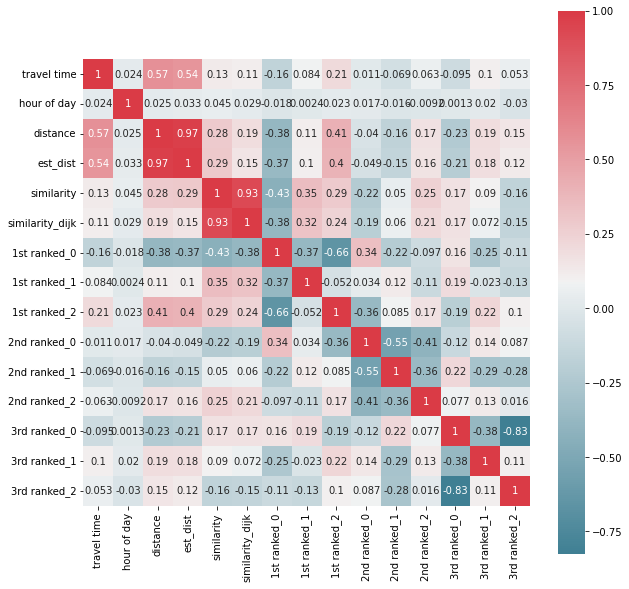

In [128]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(10,10))
corr = df6.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [129]:
x = np.array(df6[['est_dist','1st ranked_0','1st ranked_1','1st ranked_2','2nd ranked_0','2nd ranked_1','2nd ranked_2','3rd ranked_0','3rd ranked_1','3rd ranked_2']])
# x = np.array(df1.iloc[:,1:])
y = np.array(df6['travel time'])
x.shape

(7406, 10)

In [130]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [131]:
print(X_train.shape)
print(X_test.shape)
# X_train

(5924, 10)
(1482, 10)


In [132]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_1 = nnmodel(50, num_hlayers=1,Epoch=500)
model4_4_1

Epoch 1/500
186/186 [==============================] - 0s 1ms/step - loss: 1228288.0000 - mape: 99.4686 - rmse: 1108.2815 - val_loss: 1207030.6250 - val_mape: 98.4497 - val_rmse: 1098.6494
Epoch 2/500
186/186 [==============================] - 0s 824us/step - loss: 1178833.0000 - mape: 96.4773 - rmse: 1085.7407 - val_loss: 1133916.7500 - val_mape: 93.9216 - val_rmse: 1064.8552
Epoch 3/500
186/186 [==============================] - 0s 733us/step - loss: 1083107.2500 - mape: 90.4088 - rmse: 1040.7244 - val_loss: 1017104.5625 - val_mape: 86.3220 - val_rmse: 1008.5160
Epoch 4/500
186/186 [==============================] - 0s 768us/step - loss: 951386.9375 - mape: 81.5676 - rmse: 975.3907 - val_loss: 873282.4375 - val_mape: 76.3463 - val_rmse: 934.4958
Epoch 5/500
186/186 [==============================] - 0s 728us/step - loss: 801647.9375 - mape: 70.6007 - rmse: 895.3480 - val_loss: 721207.2500 - val_mape: 64.5686 - val_rmse: 849.2392
Epoch 6/500
186/186 [==============================] - 

Epoch 88/500
186/186 [==============================] - 0s 775us/step - loss: 160795.4688 - mape: 36.4450 - rmse: 400.9931 - val_loss: 167314.6406 - val_mape: 36.6780 - val_rmse: 409.0411
Epoch 89/500
186/186 [==============================] - 0s 756us/step - loss: 160590.4375 - mape: 36.4277 - rmse: 400.7374 - val_loss: 167224.6406 - val_mape: 36.5373 - val_rmse: 408.9311
Epoch 90/500
186/186 [==============================] - 0s 832us/step - loss: 160427.7500 - mape: 36.2397 - rmse: 400.5343 - val_loss: 167147.2969 - val_mape: 36.4338 - val_rmse: 408.8365
Epoch 91/500
186/186 [==============================] - 0s 722us/step - loss: 160280.1562 - mape: 36.1230 - rmse: 400.3500 - val_loss: 167074.3594 - val_mape: 36.2907 - val_rmse: 408.7473
Epoch 92/500
186/186 [==============================] - 0s 702us/step - loss: 160104.9375 - mape: 35.9727 - rmse: 400.1312 - val_loss: 167017.4375 - val_mape: 36.4241 - val_rmse: 408.6777
Epoch 93/500
186/186 [==============================] - 0s 7

186/186 [==============================] - 0s 768us/step - loss: 158036.0781 - mape: 34.5386 - rmse: 397.5375 - val_loss: 167174.0469 - val_mape: 34.5782 - val_rmse: 408.8692
Epoch 175/500
186/186 [==============================] - 0s 808us/step - loss: 158037.9062 - mape: 34.0692 - rmse: 397.5398 - val_loss: 167134.4062 - val_mape: 35.1739 - val_rmse: 408.8207
Epoch 176/500
186/186 [==============================] - 0s 743us/step - loss: 158034.4844 - mape: 34.6303 - rmse: 397.5355 - val_loss: 167149.6094 - val_mape: 34.8262 - val_rmse: 408.8394
Epoch 177/500
186/186 [==============================] - 0s 818us/step - loss: 158044.8125 - mape: 34.2285 - rmse: 397.5485 - val_loss: 167143.1562 - val_mape: 35.1067 - val_rmse: 408.8315
Epoch 178/500
186/186 [==============================] - 0s 789us/step - loss: 158053.9219 - mape: 34.6368 - rmse: 397.5600 - val_loss: 167148.4531 - val_mape: 34.9899 - val_rmse: 408.8379
Epoch 179/500
186/186 [==============================] - 0s 790us/ste

186/186 [==============================] - 0s 796us/step - loss: 157963.3594 - mape: 34.4079 - rmse: 397.4460 - val_loss: 167184.7031 - val_mape: 34.9831 - val_rmse: 408.8823
Epoch 261/500
186/186 [==============================] - 0s 811us/step - loss: 157967.4219 - mape: 34.4569 - rmse: 397.4511 - val_loss: 167187.0625 - val_mape: 34.9979 - val_rmse: 408.8851
Epoch 262/500
186/186 [==============================] - 0s 712us/step - loss: 157962.2500 - mape: 34.2976 - rmse: 397.4446 - val_loss: 167180.7344 - val_mape: 35.0514 - val_rmse: 408.8774
Epoch 263/500
186/186 [==============================] - 0s 762us/step - loss: 157958.5938 - mape: 34.5743 - rmse: 397.4401 - val_loss: 167192.2344 - val_mape: 34.9318 - val_rmse: 408.8915
Epoch 264/500
186/186 [==============================] - 0s 772us/step - loss: 157986.8906 - mape: 34.5000 - rmse: 397.4756 - val_loss: 167181.2969 - val_mape: 34.9000 - val_rmse: 408.8781
Epoch 265/500
186/186 [==============================] - 0s 783us/ste

186/186 [==============================] - 0s 707us/step - loss: 157924.8125 - mape: 34.5710 - rmse: 397.3976 - val_loss: 167147.9688 - val_mape: 35.0771 - val_rmse: 408.8373
Epoch 347/500
186/186 [==============================] - 0s 837us/step - loss: 157927.3125 - mape: 34.4058 - rmse: 397.4007 - val_loss: 167175.5000 - val_mape: 35.3226 - val_rmse: 408.8710
Epoch 348/500
186/186 [==============================] - 0s 751us/step - loss: 157978.9375 - mape: 34.5731 - rmse: 397.4656 - val_loss: 167167.3750 - val_mape: 35.3558 - val_rmse: 408.8611
Epoch 349/500
186/186 [==============================] - 0s 760us/step - loss: 157997.4375 - mape: 34.6657 - rmse: 397.4889 - val_loss: 167147.8906 - val_mape: 34.9429 - val_rmse: 408.8372
Epoch 350/500
186/186 [==============================] - 0s 753us/step - loss: 157936.4844 - mape: 34.6350 - rmse: 397.4122 - val_loss: 167196.5312 - val_mape: 34.6886 - val_rmse: 408.8967
Epoch 351/500
186/186 [==============================] - 0s 695us/ste

186/186 [==============================] - 0s 775us/step - loss: 157922.6094 - mape: 34.5896 - rmse: 397.3948 - val_loss: 167123.3750 - val_mape: 35.1941 - val_rmse: 408.8073
Epoch 433/500
186/186 [==============================] - 0s 788us/step - loss: 157913.3594 - mape: 34.5081 - rmse: 397.3831 - val_loss: 167123.7031 - val_mape: 35.0101 - val_rmse: 408.8076
Epoch 434/500
186/186 [==============================] - 0s 765us/step - loss: 157912.5781 - mape: 34.5078 - rmse: 397.3821 - val_loss: 167126.0000 - val_mape: 34.9471 - val_rmse: 408.8105
Epoch 435/500
186/186 [==============================] - 0s 787us/step - loss: 157927.8281 - mape: 34.6384 - rmse: 397.4013 - val_loss: 167115.9688 - val_mape: 34.9649 - val_rmse: 408.7982
Epoch 436/500
186/186 [==============================] - 0s 749us/step - loss: 157940.1562 - mape: 34.4741 - rmse: 397.4168 - val_loss: 167107.0938 - val_mape: 35.0703 - val_rmse: 408.7874
Epoch 437/500
186/186 [==============================] - 0s 797us/ste

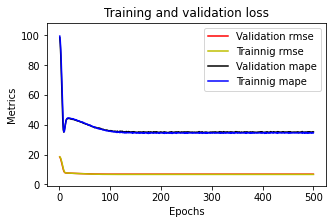

In [133]:
plotme(model4_4_1)
    

In [134]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_2 = nnmodel(100, num_hlayers=1,Epoch=500)
model4_4_2

Epoch 1/500
186/186 [==============================] - 0s 1ms/step - loss: 1219274.7500 - mape: 98.9177 - rmse: 1104.2078 - val_loss: 1181404.6250 - val_mape: 96.8791 - val_rmse: 1086.9244
Epoch 2/500
186/186 [==============================] - 0s 820us/step - loss: 1121019.3750 - mape: 92.8240 - rmse: 1058.7820 - val_loss: 1036509.4375 - val_mape: 87.5995 - val_rmse: 1018.0911
Epoch 3/500
186/186 [==============================] - 0s 815us/step - loss: 940631.4375 - mape: 80.7679 - rmse: 969.8616 - val_loss: 828359.5000 - val_mape: 72.9949 - val_rmse: 910.1426
Epoch 4/500
186/186 [==============================] - 0s 794us/step - loss: 722699.1250 - mape: 64.2467 - rmse: 850.1171 - val_loss: 611268.2500 - val_mape: 55.3445 - val_rmse: 781.8365
Epoch 5/500
186/186 [==============================] - 0s 782us/step - loss: 519903.3438 - mape: 47.5051 - rmse: 721.0432 - val_loss: 430803.3125 - val_mape: 40.8836 - val_rmse: 656.3561
Epoch 6/500
186/186 [==============================] - 0s 7

Epoch 88/500
186/186 [==============================] - 0s 729us/step - loss: 158249.6875 - mape: 34.9688 - rmse: 397.8061 - val_loss: 166850.0469 - val_mape: 34.8220 - val_rmse: 408.4728
Epoch 89/500
186/186 [==============================] - 0s 845us/step - loss: 158285.1875 - mape: 34.7412 - rmse: 397.8507 - val_loss: 166814.5938 - val_mape: 34.9427 - val_rmse: 408.4294
Epoch 90/500
186/186 [==============================] - 0s 753us/step - loss: 158223.8125 - mape: 34.5979 - rmse: 397.7736 - val_loss: 166820.1719 - val_mape: 35.2809 - val_rmse: 408.4362
Epoch 91/500
186/186 [==============================] - 0s 740us/step - loss: 158247.9531 - mape: 34.8786 - rmse: 397.8039 - val_loss: 166830.5781 - val_mape: 35.0524 - val_rmse: 408.4490
Epoch 92/500
186/186 [==============================] - 0s 839us/step - loss: 158219.8906 - mape: 34.6876 - rmse: 397.7686 - val_loss: 166886.6250 - val_mape: 35.2870 - val_rmse: 408.5176
Epoch 93/500
186/186 [==============================] - 0s 7

186/186 [==============================] - 0s 763us/step - loss: 158034.5312 - mape: 34.3364 - rmse: 397.5356 - val_loss: 167216.5625 - val_mape: 34.7565 - val_rmse: 408.9212
Epoch 175/500
186/186 [==============================] - 0s 788us/step - loss: 157996.3438 - mape: 34.6939 - rmse: 397.4875 - val_loss: 167266.8125 - val_mape: 34.7509 - val_rmse: 408.9827
Epoch 176/500
186/186 [==============================] - 0s 788us/step - loss: 158011.6406 - mape: 34.4570 - rmse: 397.5068 - val_loss: 167271.2500 - val_mape: 34.5986 - val_rmse: 408.9881
Epoch 177/500
186/186 [==============================] - 0s 795us/step - loss: 158015.0156 - mape: 34.2332 - rmse: 397.5110 - val_loss: 167198.7188 - val_mape: 35.0778 - val_rmse: 408.8994
Epoch 178/500
186/186 [==============================] - 0s 849us/step - loss: 158004.2500 - mape: 34.4814 - rmse: 397.4975 - val_loss: 167210.1875 - val_mape: 35.2511 - val_rmse: 408.9134
Epoch 179/500
186/186 [==============================] - 0s 730us/ste

186/186 [==============================] - 0s 889us/step - loss: 157951.8594 - mape: 34.4554 - rmse: 397.4316 - val_loss: 167181.7812 - val_mape: 34.8067 - val_rmse: 408.8787
Epoch 261/500
186/186 [==============================] - 0s 791us/step - loss: 157958.8281 - mape: 34.4599 - rmse: 397.4403 - val_loss: 167170.2188 - val_mape: 34.8435 - val_rmse: 408.8646
Epoch 262/500
186/186 [==============================] - 0s 794us/step - loss: 157941.3281 - mape: 34.2153 - rmse: 397.4183 - val_loss: 167152.6406 - val_mape: 35.2266 - val_rmse: 408.8430
Epoch 263/500
186/186 [==============================] - 0s 764us/step - loss: 157951.0312 - mape: 34.5104 - rmse: 397.4305 - val_loss: 167169.6406 - val_mape: 35.1054 - val_rmse: 408.8638
Epoch 264/500
186/186 [==============================] - 0s 732us/step - loss: 157950.4531 - mape: 34.4290 - rmse: 397.4298 - val_loss: 167161.8281 - val_mape: 35.3819 - val_rmse: 408.8543
Epoch 265/500
186/186 [==============================] - 0s 712us/ste

186/186 [==============================] - 0s 728us/step - loss: 157933.2188 - mape: 34.6118 - rmse: 397.4081 - val_loss: 167114.6719 - val_mape: 35.1116 - val_rmse: 408.7966
Epoch 347/500
186/186 [==============================] - 0s 704us/step - loss: 157941.3438 - mape: 34.5697 - rmse: 397.4183 - val_loss: 167131.3438 - val_mape: 34.8620 - val_rmse: 408.8170
Epoch 348/500
186/186 [==============================] - 0s 718us/step - loss: 157933.8125 - mape: 34.3960 - rmse: 397.4089 - val_loss: 167113.7969 - val_mape: 35.1615 - val_rmse: 408.7955
Epoch 349/500
186/186 [==============================] - 0s 741us/step - loss: 157882.2344 - mape: 34.1264 - rmse: 397.3440 - val_loss: 167164.8750 - val_mape: 35.6465 - val_rmse: 408.8580
Epoch 350/500
186/186 [==============================] - 0s 802us/step - loss: 158039.2031 - mape: 35.0013 - rmse: 397.5414 - val_loss: 167102.1719 - val_mape: 34.9784 - val_rmse: 408.7813
Epoch 351/500
186/186 [==============================] - 0s 743us/ste

186/186 [==============================] - 0s 799us/step - loss: 157976.0625 - mape: 34.6883 - rmse: 397.4620 - val_loss: 167133.0156 - val_mape: 35.1387 - val_rmse: 408.8191
Epoch 433/500
186/186 [==============================] - 0s 856us/step - loss: 157951.6250 - mape: 34.6676 - rmse: 397.4313 - val_loss: 167136.1250 - val_mape: 34.8776 - val_rmse: 408.8228
Epoch 434/500
186/186 [==============================] - 0s 777us/step - loss: 157923.2031 - mape: 34.3900 - rmse: 397.3955 - val_loss: 167142.0000 - val_mape: 35.5138 - val_rmse: 408.8300
Epoch 435/500
186/186 [==============================] - 0s 813us/step - loss: 157941.9375 - mape: 34.6525 - rmse: 397.4191 - val_loss: 167086.9531 - val_mape: 35.1538 - val_rmse: 408.7627
Epoch 436/500
186/186 [==============================] - 0s 772us/step - loss: 157924.1562 - mape: 34.6533 - rmse: 397.3967 - val_loss: 167123.7188 - val_mape: 34.8112 - val_rmse: 408.8077
Epoch 437/500
186/186 [==============================] - 0s 793us/ste

In [135]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_3 = nnmodel(200, num_hlayers=1,Epoch=500)
model4_4_3

Epoch 1/500
186/186 [==============================] - 0s 1ms/step - loss: 1206576.3750 - mape: 98.1569 - rmse: 1098.4427 - val_loss: 1141526.0000 - val_mape: 94.4014 - val_rmse: 1068.4222
Epoch 2/500
186/186 [==============================] - 0s 802us/step - loss: 1028413.2500 - mape: 86.6652 - rmse: 1014.1071 - val_loss: 881244.8750 - val_mape: 76.9196 - val_rmse: 938.7465
Epoch 3/500
186/186 [==============================] - 0s 767us/step - loss: 724708.6250 - mape: 64.3305 - rmse: 851.2982 - val_loss: 564361.8750 - val_mape: 51.3622 - val_rmse: 751.2402
Epoch 4/500
186/186 [==============================] - 0s 853us/step - loss: 443603.6562 - mape: 41.8502 - rmse: 666.0358 - val_loss: 338323.7188 - val_mape: 36.0224 - val_rmse: 581.6560
Epoch 5/500
186/186 [==============================] - 0s 749us/step - loss: 280959.4062 - mape: 35.2925 - rmse: 530.0560 - val_loss: 238457.6250 - val_mape: 36.6016 - val_rmse: 488.3212
Epoch 6/500
186/186 [==============================] - 0s 756

Epoch 88/500
186/186 [==============================] - 0s 790us/step - loss: 157800.9375 - mape: 34.5462 - rmse: 397.2417 - val_loss: 166783.0469 - val_mape: 34.4349 - val_rmse: 408.3908
Epoch 89/500
186/186 [==============================] - 0s 746us/step - loss: 157794.2969 - mape: 34.2424 - rmse: 397.2333 - val_loss: 166722.3906 - val_mape: 35.2878 - val_rmse: 408.3165
Epoch 90/500
186/186 [==============================] - 0s 766us/step - loss: 157787.1406 - mape: 34.6627 - rmse: 397.2243 - val_loss: 166684.6094 - val_mape: 34.8684 - val_rmse: 408.2703
Epoch 91/500
186/186 [==============================] - 0s 788us/step - loss: 157793.2812 - mape: 34.2776 - rmse: 397.2320 - val_loss: 166727.4688 - val_mape: 34.8874 - val_rmse: 408.3228
Epoch 92/500
186/186 [==============================] - 0s 865us/step - loss: 157820.5469 - mape: 34.6717 - rmse: 397.2664 - val_loss: 166699.4531 - val_mape: 34.9684 - val_rmse: 408.2885
Epoch 93/500
186/186 [==============================] - 0s 7

186/186 [==============================] - 0s 782us/step - loss: 157388.3438 - mape: 34.5014 - rmse: 396.7220 - val_loss: 166297.7656 - val_mape: 35.0358 - val_rmse: 407.7962
Epoch 175/500
186/186 [==============================] - 0s 715us/step - loss: 157386.3906 - mape: 34.4412 - rmse: 396.7195 - val_loss: 166280.9531 - val_mape: 34.9506 - val_rmse: 407.7756
Epoch 176/500
186/186 [==============================] - 0s 771us/step - loss: 157347.0312 - mape: 34.3334 - rmse: 396.6699 - val_loss: 166303.7031 - val_mape: 35.3673 - val_rmse: 407.8035
Epoch 177/500
186/186 [==============================] - 0s 786us/step - loss: 157355.6250 - mape: 34.3617 - rmse: 396.6808 - val_loss: 166260.7344 - val_mape: 35.1367 - val_rmse: 407.7508
Epoch 178/500
186/186 [==============================] - 0s 809us/step - loss: 157329.9375 - mape: 34.6177 - rmse: 396.6484 - val_loss: 166309.7031 - val_mape: 34.5458 - val_rmse: 407.8109
Epoch 179/500
186/186 [==============================] - 0s 755us/ste

186/186 [==============================] - 0s 854us/step - loss: 156950.3750 - mape: 34.6528 - rmse: 396.1696 - val_loss: 165692.8438 - val_mape: 34.6524 - val_rmse: 407.0539
Epoch 261/500
186/186 [==============================] - 0s 777us/step - loss: 156965.2344 - mape: 34.1931 - rmse: 396.1884 - val_loss: 165683.6094 - val_mape: 35.2129 - val_rmse: 407.0425
Epoch 262/500
186/186 [==============================] - 0s 778us/step - loss: 156953.8281 - mape: 34.4759 - rmse: 396.1740 - val_loss: 165625.5156 - val_mape: 35.1323 - val_rmse: 406.9712
Epoch 263/500
186/186 [==============================] - 0s 853us/step - loss: 156951.7656 - mape: 34.5822 - rmse: 396.1714 - val_loss: 165706.3281 - val_mape: 34.4328 - val_rmse: 407.0704
Epoch 264/500
186/186 [==============================] - 0s 751us/step - loss: 156940.4844 - mape: 34.0834 - rmse: 396.1571 - val_loss: 165635.9062 - val_mape: 35.1445 - val_rmse: 406.9839
Epoch 265/500
186/186 [==============================] - 0s 743us/ste

186/186 [==============================] - 0s 708us/step - loss: 156514.2969 - mape: 34.5332 - rmse: 395.6189 - val_loss: 165045.8906 - val_mape: 34.5480 - val_rmse: 406.2584
Epoch 347/500
186/186 [==============================] - 0s 729us/step - loss: 156535.6094 - mape: 34.0900 - rmse: 395.6458 - val_loss: 164999.2500 - val_mape: 35.2834 - val_rmse: 406.2010
Epoch 348/500
186/186 [==============================] - 0s 754us/step - loss: 156549.8750 - mape: 34.4178 - rmse: 395.6638 - val_loss: 164983.0156 - val_mape: 34.8696 - val_rmse: 406.1810
Epoch 349/500
186/186 [==============================] - 0s 796us/step - loss: 156505.6094 - mape: 34.3583 - rmse: 395.6079 - val_loss: 165006.1250 - val_mape: 35.3393 - val_rmse: 406.2095
Epoch 350/500
186/186 [==============================] - 0s 813us/step - loss: 156535.5469 - mape: 34.3750 - rmse: 395.6457 - val_loss: 164945.6875 - val_mape: 34.8791 - val_rmse: 406.1351
Epoch 351/500
186/186 [==============================] - 0s 809us/ste

186/186 [==============================] - 0s 734us/step - loss: 156180.7344 - mape: 34.3757 - rmse: 395.1971 - val_loss: 164400.4062 - val_mape: 35.2628 - val_rmse: 405.4632
Epoch 433/500
186/186 [==============================] - 0s 752us/step - loss: 156127.6562 - mape: 34.2732 - rmse: 395.1299 - val_loss: 164349.4375 - val_mape: 34.7173 - val_rmse: 405.4003
Epoch 434/500
186/186 [==============================] - 0s 740us/step - loss: 156110.3750 - mape: 34.3552 - rmse: 395.1081 - val_loss: 164383.9844 - val_mape: 34.5653 - val_rmse: 405.4430
Epoch 435/500
186/186 [==============================] - 0s 786us/step - loss: 156102.8125 - mape: 34.2877 - rmse: 395.0985 - val_loss: 164424.3594 - val_mape: 34.3245 - val_rmse: 405.4927
Epoch 436/500
186/186 [==============================] - 0s 713us/step - loss: 156110.5156 - mape: 34.1610 - rmse: 395.1082 - val_loss: 164347.4375 - val_mape: 34.8860 - val_rmse: 405.3979
Epoch 437/500
186/186 [==============================] - 0s 813us/ste

In [136]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model4_4_4

Epoch 1/500
186/186 [==============================] - 0s 1ms/step - loss: 1054487.6250 - mape: 87.7848 - rmse: 1026.8824 - val_loss: 541366.3750 - val_mape: 49.4468 - val_rmse: 735.7761
Epoch 2/500
186/186 [==============================] - 0s 848us/step - loss: 261664.9688 - mape: 42.0091 - rmse: 511.5320 - val_loss: 205725.6250 - val_mape: 43.0271 - val_rmse: 453.5699
Epoch 3/500
186/186 [==============================] - 0s 902us/step - loss: 202861.3906 - mape: 44.2456 - rmse: 450.4014 - val_loss: 200487.9531 - val_mape: 44.1653 - val_rmse: 447.7588
Epoch 4/500
186/186 [==============================] - 0s 842us/step - loss: 197802.9531 - mape: 44.3234 - rmse: 444.7504 - val_loss: 195964.2188 - val_mape: 42.8768 - val_rmse: 442.6785
Epoch 5/500
186/186 [==============================] - 0s 807us/step - loss: 193156.5156 - mape: 43.4377 - rmse: 439.4958 - val_loss: 191782.9062 - val_mape: 42.3644 - val_rmse: 437.9303
Epoch 6/500
186/186 [==============================] - 0s 871us/s

Epoch 45/500
186/186 [==============================] - 0s 875us/step - loss: 156995.8125 - mape: 34.2324 - rmse: 396.2270 - val_loss: 165407.1719 - val_mape: 34.7185 - val_rmse: 406.7028
Epoch 46/500
186/186 [==============================] - 0s 759us/step - loss: 157149.1250 - mape: 34.2605 - rmse: 396.4204 - val_loss: 165463.1406 - val_mape: 35.3587 - val_rmse: 406.7716
Epoch 47/500
186/186 [==============================] - 0s 836us/step - loss: 157032.4531 - mape: 34.4076 - rmse: 396.2732 - val_loss: 165480.4844 - val_mape: 33.9437 - val_rmse: 406.7929
Epoch 48/500
186/186 [==============================] - 0s 817us/step - loss: 156968.8594 - mape: 34.2217 - rmse: 396.1930 - val_loss: 165531.5156 - val_mape: 34.0860 - val_rmse: 406.8557
Epoch 49/500
186/186 [==============================] - 0s 806us/step - loss: 156944.3438 - mape: 34.2670 - rmse: 396.1620 - val_loss: 165391.2188 - val_mape: 35.4206 - val_rmse: 406.6832
Epoch 50/500
186/186 [==============================] - 0s 7

186/186 [==============================] - 0s 876us/step - loss: 154798.2344 - mape: 34.1118 - rmse: 393.4441 - val_loss: 162382.9062 - val_mape: 34.2153 - val_rmse: 402.9676
Epoch 132/500
186/186 [==============================] - 0s 810us/step - loss: 154853.3906 - mape: 34.2009 - rmse: 393.5142 - val_loss: 162326.8125 - val_mape: 34.2254 - val_rmse: 402.8980
Epoch 133/500
186/186 [==============================] - 0s 803us/step - loss: 154815.0312 - mape: 34.1340 - rmse: 393.4654 - val_loss: 162381.5000 - val_mape: 34.5100 - val_rmse: 402.9659
Epoch 134/500
186/186 [==============================] - 0s 752us/step - loss: 154861.1406 - mape: 34.1930 - rmse: 393.5240 - val_loss: 162674.4844 - val_mape: 33.5192 - val_rmse: 403.3293
Epoch 135/500
186/186 [==============================] - 0s 886us/step - loss: 154808.7500 - mape: 34.0896 - rmse: 393.4574 - val_loss: 162427.9219 - val_mape: 33.8023 - val_rmse: 403.0235
Epoch 136/500
186/186 [==============================] - 0s 829us/ste

186/186 [==============================] - 0s 795us/step - loss: 153497.7031 - mape: 34.0138 - rmse: 391.7878 - val_loss: 160064.7500 - val_mape: 34.0841 - val_rmse: 400.0809
Epoch 218/500
186/186 [==============================] - 0s 826us/step - loss: 153545.8594 - mape: 34.2193 - rmse: 391.8493 - val_loss: 159955.5312 - val_mape: 33.6753 - val_rmse: 399.9444
Epoch 219/500
186/186 [==============================] - 0s 819us/step - loss: 153392.1562 - mape: 33.9323 - rmse: 391.6531 - val_loss: 160106.5312 - val_mape: 33.4409 - val_rmse: 400.1331
Epoch 220/500
186/186 [==============================] - 0s 771us/step - loss: 153314.0469 - mape: 33.7359 - rmse: 391.5534 - val_loss: 160512.3125 - val_mape: 36.0503 - val_rmse: 400.6399
Epoch 221/500
186/186 [==============================] - 0s 873us/step - loss: 153361.9375 - mape: 34.2643 - rmse: 391.6145 - val_loss: 160680.5781 - val_mape: 32.6235 - val_rmse: 400.8498
Epoch 222/500
186/186 [==============================] - 0s 831us/ste

186/186 [==============================] - 0s 826us/step - loss: 152524.7812 - mape: 33.8475 - rmse: 390.5442 - val_loss: 158593.8750 - val_mape: 33.5556 - val_rmse: 398.2385
Epoch 304/500
186/186 [==============================] - 0s 890us/step - loss: 152502.1719 - mape: 33.8750 - rmse: 390.5153 - val_loss: 158479.6406 - val_mape: 33.8960 - val_rmse: 398.0950
Epoch 305/500
186/186 [==============================] - 0s 935us/step - loss: 152632.1406 - mape: 33.8391 - rmse: 390.6816 - val_loss: 158405.3281 - val_mape: 34.0016 - val_rmse: 398.0017
Epoch 306/500
186/186 [==============================] - 0s 928us/step - loss: 152477.5469 - mape: 34.1658 - rmse: 390.4837 - val_loss: 158548.3750 - val_mape: 33.6379 - val_rmse: 398.1813
Epoch 307/500
186/186 [==============================] - 0s 896us/step - loss: 152357.0469 - mape: 33.7620 - rmse: 390.3294 - val_loss: 158559.5000 - val_mape: 33.7158 - val_rmse: 398.1953
Epoch 308/500
186/186 [==============================] - 0s 770us/ste

186/186 [==============================] - 0s 881us/step - loss: 151931.9844 - mape: 33.9645 - rmse: 389.7845 - val_loss: 157480.9375 - val_mape: 33.4299 - val_rmse: 396.8387
Epoch 390/500
186/186 [==============================] - 0s 812us/step - loss: 152093.7969 - mape: 33.6470 - rmse: 389.9920 - val_loss: 157588.9531 - val_mape: 35.2415 - val_rmse: 396.9748
Epoch 391/500
186/186 [==============================] - 0s 875us/step - loss: 151935.0625 - mape: 33.9124 - rmse: 389.7885 - val_loss: 157501.3594 - val_mape: 34.9062 - val_rmse: 396.8644
Epoch 392/500
186/186 [==============================] - 0s 847us/step - loss: 151969.5469 - mape: 34.0916 - rmse: 389.8327 - val_loss: 157458.3906 - val_mape: 33.6993 - val_rmse: 396.8103
Epoch 393/500
186/186 [==============================] - 0s 776us/step - loss: 151950.7500 - mape: 34.0289 - rmse: 389.8086 - val_loss: 157619.8906 - val_mape: 33.5060 - val_rmse: 397.0137
Epoch 394/500
186/186 [==============================] - 0s 833us/ste

186/186 [==============================] - 0s 870us/step - loss: 151572.3906 - mape: 33.6263 - rmse: 389.3230 - val_loss: 156441.1406 - val_mape: 33.8595 - val_rmse: 395.5264
Epoch 476/500
186/186 [==============================] - 0s 886us/step - loss: 151464.5156 - mape: 33.8532 - rmse: 389.1844 - val_loss: 156670.3438 - val_mape: 32.9848 - val_rmse: 395.8160
Epoch 477/500
186/186 [==============================] - 0s 776us/step - loss: 151317.6406 - mape: 33.5078 - rmse: 388.9957 - val_loss: 156918.4844 - val_mape: 35.6625 - val_rmse: 396.1294
Epoch 478/500
186/186 [==============================] - 0s 845us/step - loss: 151313.1406 - mape: 34.1211 - rmse: 388.9899 - val_loss: 156570.2031 - val_mape: 33.5784 - val_rmse: 395.6895
Epoch 479/500
186/186 [==============================] - 0s 854us/step - loss: 151352.6719 - mape: 33.5811 - rmse: 389.0407 - val_loss: 156584.7969 - val_mape: 34.5375 - val_rmse: 395.7080
Epoch 480/500
186/186 [==============================] - 0s 809us/ste

In [137]:
# plotme(model4_4_4)

In [138]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model4_4_5

Epoch 1/500
186/186 [==============================] - 0s 1ms/step - loss: 833170.0000 - mape: 73.4589 - rmse: 912.7814 - val_loss: 211448.6406 - val_mape: 41.7452 - val_rmse: 459.8354
Epoch 2/500
186/186 [==============================] - 0s 959us/step - loss: 205426.5625 - mape: 44.7872 - rmse: 453.2401 - val_loss: 201226.4062 - val_mape: 42.8581 - val_rmse: 448.5827
Epoch 3/500
186/186 [==============================] - 0s 862us/step - loss: 197244.3125 - mape: 43.7988 - rmse: 444.1219 - val_loss: 194432.3906 - val_mape: 44.0416 - val_rmse: 440.9449
Epoch 4/500
186/186 [==============================] - 0s 907us/step - loss: 190019.4062 - mape: 43.0992 - rmse: 435.9121 - val_loss: 188178.4844 - val_mape: 40.6569 - val_rmse: 433.7954
Epoch 5/500
186/186 [==============================] - 0s 853us/step - loss: 183241.8906 - mape: 42.0649 - rmse: 428.0676 - val_loss: 182377.2656 - val_mape: 40.0830 - val_rmse: 427.0565
Epoch 6/500
186/186 [==============================] - 0s 1ms/step 

Epoch 45/500
186/186 [==============================] - 0s 935us/step - loss: 156767.0625 - mape: 34.3200 - rmse: 395.9382 - val_loss: 164848.8594 - val_mape: 34.6354 - val_rmse: 406.0158
Epoch 46/500
186/186 [==============================] - 0s 907us/step - loss: 156721.7344 - mape: 34.1222 - rmse: 395.8810 - val_loss: 164842.7969 - val_mape: 35.4292 - val_rmse: 406.0084
Epoch 47/500
186/186 [==============================] - 0s 915us/step - loss: 156590.8594 - mape: 34.2937 - rmse: 395.7156 - val_loss: 164622.3750 - val_mape: 34.5848 - val_rmse: 405.7368
Epoch 48/500
186/186 [==============================] - 0s 950us/step - loss: 156776.7031 - mape: 34.2903 - rmse: 395.9504 - val_loss: 164670.0938 - val_mape: 33.9470 - val_rmse: 405.7956
Epoch 49/500
186/186 [==============================] - 0s 876us/step - loss: 156712.6719 - mape: 34.0110 - rmse: 395.8695 - val_loss: 164661.2188 - val_mape: 35.5488 - val_rmse: 405.7847
Epoch 50/500
186/186 [==============================] - 0s 8

186/186 [==============================] - 0s 885us/step - loss: 153893.5156 - mape: 33.8049 - rmse: 392.2926 - val_loss: 160454.4531 - val_mape: 35.3351 - val_rmse: 400.5677
Epoch 132/500
186/186 [==============================] - 0s 924us/step - loss: 153773.4844 - mape: 34.0311 - rmse: 392.1396 - val_loss: 160415.2812 - val_mape: 33.5600 - val_rmse: 400.5188
Epoch 133/500
186/186 [==============================] - 0s 890us/step - loss: 153700.2969 - mape: 33.9371 - rmse: 392.0463 - val_loss: 160336.8438 - val_mape: 33.9420 - val_rmse: 400.4208
Epoch 134/500
186/186 [==============================] - 0s 896us/step - loss: 153490.6094 - mape: 33.9393 - rmse: 391.7788 - val_loss: 160364.0469 - val_mape: 35.7459 - val_rmse: 400.4548
Epoch 135/500
186/186 [==============================] - 0s 886us/step - loss: 153731.3125 - mape: 33.8178 - rmse: 392.0858 - val_loss: 160219.7969 - val_mape: 35.0130 - val_rmse: 400.2747
Epoch 136/500
186/186 [==============================] - 0s 853us/ste

186/186 [==============================] - 0s 931us/step - loss: 152620.7188 - mape: 33.9929 - rmse: 390.6670 - val_loss: 158466.2812 - val_mape: 32.7542 - val_rmse: 398.0782
Epoch 218/500
186/186 [==============================] - 0s 866us/step - loss: 152711.8594 - mape: 33.8331 - rmse: 390.7837 - val_loss: 157927.5156 - val_mape: 33.9963 - val_rmse: 397.4009
Epoch 219/500
186/186 [==============================] - 0s 924us/step - loss: 152436.4062 - mape: 33.9598 - rmse: 390.4311 - val_loss: 158207.7031 - val_mape: 35.4137 - val_rmse: 397.7533
Epoch 220/500
186/186 [==============================] - 0s 834us/step - loss: 152354.8125 - mape: 33.8768 - rmse: 390.3265 - val_loss: 157785.6250 - val_mape: 33.0830 - val_rmse: 397.2224
Epoch 221/500
186/186 [==============================] - 0s 910us/step - loss: 152333.8125 - mape: 33.9391 - rmse: 390.2997 - val_loss: 157749.6094 - val_mape: 34.8965 - val_rmse: 397.1771
Epoch 222/500
186/186 [==============================] - 0s 921us/ste

186/186 [==============================] - 0s 993us/step - loss: 152130.6094 - mape: 34.1484 - rmse: 390.0392 - val_loss: 156202.3125 - val_mape: 34.3650 - val_rmse: 395.2244
Epoch 304/500
186/186 [==============================] - 0s 978us/step - loss: 151654.4531 - mape: 33.6346 - rmse: 389.4284 - val_loss: 156405.3125 - val_mape: 35.4808 - val_rmse: 395.4811
Epoch 305/500
186/186 [==============================] - 0s 870us/step - loss: 151681.8281 - mape: 34.0446 - rmse: 389.4635 - val_loss: 156219.8125 - val_mape: 33.9611 - val_rmse: 395.2465
Epoch 306/500
186/186 [==============================] - 0s 974us/step - loss: 151668.6094 - mape: 33.9583 - rmse: 389.4465 - val_loss: 156327.8750 - val_mape: 33.0962 - val_rmse: 395.3832
Epoch 307/500
186/186 [==============================] - 0s 930us/step - loss: 151562.6719 - mape: 33.8325 - rmse: 389.3105 - val_loss: 155989.5469 - val_mape: 33.7713 - val_rmse: 394.9551
Epoch 308/500
186/186 [==============================] - 0s 889us/ste

186/186 [==============================] - 0s 856us/step - loss: 150721.1406 - mape: 33.6942 - rmse: 388.2282 - val_loss: 155336.0938 - val_mape: 33.6420 - val_rmse: 394.1270
Epoch 390/500
186/186 [==============================] - 0s 885us/step - loss: 150671.1406 - mape: 33.7199 - rmse: 388.1638 - val_loss: 155957.7344 - val_mape: 31.9035 - val_rmse: 394.9149
Epoch 391/500
186/186 [==============================] - 0s 872us/step - loss: 150540.1562 - mape: 33.3110 - rmse: 387.9951 - val_loss: 155402.0781 - val_mape: 34.2340 - val_rmse: 394.2107
Epoch 392/500
186/186 [==============================] - 0s 843us/step - loss: 150748.4688 - mape: 33.8890 - rmse: 388.2634 - val_loss: 155456.6406 - val_mape: 33.8570 - val_rmse: 394.2799
Epoch 393/500
186/186 [==============================] - 0s 951us/step - loss: 150557.3906 - mape: 34.0092 - rmse: 388.0172 - val_loss: 155467.2188 - val_mape: 32.8934 - val_rmse: 394.2933
Epoch 394/500
186/186 [==============================] - 0s 880us/ste

186/186 [==============================] - 0s 915us/step - loss: 149896.0781 - mape: 33.5166 - rmse: 387.1642 - val_loss: 156511.8438 - val_mape: 31.2815 - val_rmse: 395.6158
Epoch 476/500
186/186 [==============================] - 0s 854us/step - loss: 149855.2656 - mape: 33.4289 - rmse: 387.1115 - val_loss: 155174.0938 - val_mape: 32.4855 - val_rmse: 393.9214
Epoch 477/500
186/186 [==============================] - 0s 918us/step - loss: 149682.5312 - mape: 33.2033 - rmse: 386.8883 - val_loss: 155062.7812 - val_mape: 34.6181 - val_rmse: 393.7801
Epoch 478/500
186/186 [==============================] - 0s 882us/step - loss: 149961.3438 - mape: 33.5172 - rmse: 387.2484 - val_loss: 154885.9688 - val_mape: 34.3752 - val_rmse: 393.5555
Epoch 479/500
186/186 [==============================] - 0s 978us/step - loss: 149815.8594 - mape: 33.3475 - rmse: 387.0605 - val_loss: 155594.4844 - val_mape: 36.0092 - val_rmse: 394.4547
Epoch 480/500
186/186 [==============================] - 0s 932us/ste

## sub-problem 6:  **input: distance & hour &  roadtypes contribution**

#### Analysis of features

In [151]:
df7 = df1.iloc[:,:].copy()
# df7 = df7.drop(['hour of day','1st ranked','2nd ranked','3rd ranked','4d ranked','5th ranked','6th ranked','4rd dist','5th dist','6th dist'], axis=1)
df7 = df7.fillna(0)
df7.head()

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0          823            6  0.358222  0.256935    0.682353         0.878788   
1         1066           14  0.453845  0.408831    0.734375         0.734375   
2          665           17  0.312429  0.248150    0.718310         0.796875   
3         1053           21  0.428195  0.300619    0.563107         0.725000   
5         1441           22  0.365045  0.340558    0.610526         0.623656   

  1st ranked   2nd ranked    3rd ranked  1st dist  2nd dist  3rd dist  \
0    primary     tertiary  primary_link  0.835209  0.098678  0.033588   
1    primary     tertiary       service  0.695410  0.245933  0.026378   
2    primary  residential      tertiary  0.829429  0.103264  0.067307   
3    primary     tertiary       service  0.762876  0.105233  0.061211   
5    primary  residential      tertiary  0.711699  0.201618  0.086683   

     hr_sin        hr_cos  
0  1.000000  6.123234e-17  
1 -0.500000 -8.660254e-01  
2 -0.965926 -2.588190e-01  
3 -0.707107  7.071068e-01  
5 -0.500000  8.660254e-01

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

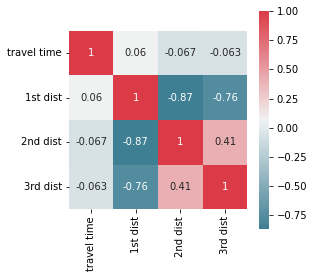

In [152]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(4,4))
corr = df7[['travel time','1st dist','2nd dist','3rd dist']].corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [153]:
x = np.array(df7[['est_dist','1st dist','2nd dist','3rd dist']])
y = np.array(df7['travel time'])
x

array([[0.25693543, 0.83520946, 0.09867791, 0.03358848],
       [0.40883067, 0.6954104 , 0.24593268, 0.0263776 ],
       [0.24814952, 0.82942927, 0.10326356, 0.06730717],
       ...,
       [0.30947844, 0.72089658, 0.16878982, 0.06591767],
       [0.56975076, 0.80141046, 0.12713391, 0.03607793],
       [0.15917053, 0.48486185, 0.33348333, 0.18165482]])

In [154]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [155]:
print(X_train.shape)
print(X_test.shape)
# X_train

(5924, 4)
(1482, 4)


In [156]:
# inputs: distance + 1st dist + 2nd dist + 3rd dist
model6_1_4 = nnmodel_(10, num_hlayers=1,Epoch=500)
model6_1_4

Epoch 1/500
186/186 [==============================] - 0s 1ms/step - loss: 1235695.1250 - mape: 99.9180 - rmse: 1111.6183 - val_loss: 1229701.5000 - val_mape: 99.8160 - val_rmse: 1108.9191
Epoch 2/500
186/186 [==============================] - 0s 1ms/step - loss: 1231132.5000 - mape: 99.6434 - rmse: 1109.5641 - val_loss: 1223290.5000 - val_mape: 99.4302 - val_rmse: 1106.0247
Epoch 3/500
186/186 [==============================] - 0s 769us/step - loss: 1222697.1250 - mape: 99.1347 - rmse: 1105.7563 - val_loss: 1212958.8750 - val_mape: 98.8053 - val_rmse: 1101.3441
Epoch 4/500
186/186 [==============================] - 0s 767us/step - loss: 1210514.6250 - mape: 98.4011 - rmse: 1100.2339 - val_loss: 1199058.5000 - val_mape: 97.9589 - val_rmse: 1095.0153
Epoch 5/500
186/186 [==============================] - 0s 879us/step - loss: 1194949.0000 - mape: 97.4451 - rmse: 1093.1372 - val_loss: 1181978.7500 - val_mape: 96.9105 - val_rmse: 1087.1885
Epoch 6/500
186/186 [============================

Epoch 88/500
186/186 [==============================] - 0s 778us/step - loss: 177435.0781 - mape: 41.8117 - rmse: 421.2304 - val_loss: 182072.5469 - val_mape: 41.5052 - val_rmse: 426.6996
Epoch 89/500
186/186 [==============================] - 0s 793us/step - loss: 177066.2344 - mape: 41.7349 - rmse: 420.7924 - val_loss: 181765.4375 - val_mape: 41.4636 - val_rmse: 426.3396
Epoch 90/500
186/186 [==============================] - 0s 711us/step - loss: 176708.0469 - mape: 41.6361 - rmse: 420.3666 - val_loss: 181455.0312 - val_mape: 41.3483 - val_rmse: 425.9754
Epoch 91/500
186/186 [==============================] - 0s 810us/step - loss: 176361.5000 - mape: 41.5194 - rmse: 419.9542 - val_loss: 181152.8438 - val_mape: 41.2374 - val_rmse: 425.6205
Epoch 92/500
186/186 [==============================] - 0s 773us/step - loss: 176002.1562 - mape: 41.5049 - rmse: 419.5261 - val_loss: 180862.8594 - val_mape: 41.2432 - val_rmse: 425.2798
Epoch 93/500
186/186 [==============================] - 0s 7

186/186 [==============================] - 0s 817us/step - loss: 161689.6875 - mape: 36.3867 - rmse: 402.1066 - val_loss: 169741.5625 - val_mape: 36.9164 - val_rmse: 411.9970
Epoch 175/500
186/186 [==============================] - 0s 834us/step - loss: 161646.4375 - mape: 36.4648 - rmse: 402.0528 - val_loss: 169714.7500 - val_mape: 36.9155 - val_rmse: 411.9645
Epoch 176/500
186/186 [==============================] - 0s 822us/step - loss: 161595.3906 - mape: 36.3094 - rmse: 401.9893 - val_loss: 169690.0469 - val_mape: 36.9001 - val_rmse: 411.9345
Epoch 177/500
186/186 [==============================] - 0s 821us/step - loss: 161552.6406 - mape: 36.3745 - rmse: 401.9361 - val_loss: 169666.5625 - val_mape: 36.8840 - val_rmse: 411.9060
Epoch 178/500
186/186 [==============================] - 0s 769us/step - loss: 161508.5156 - mape: 36.4247 - rmse: 401.8812 - val_loss: 169641.7656 - val_mape: 36.8210 - val_rmse: 411.8759
Epoch 179/500
186/186 [==============================] - 0s 753us/ste

186/186 [==============================] - 0s 791us/step - loss: 160385.9844 - mape: 34.9579 - rmse: 400.4822 - val_loss: 169341.2656 - val_mape: 35.6848 - val_rmse: 411.5110
Epoch 261/500
186/186 [==============================] - 0s 824us/step - loss: 160376.4219 - mape: 35.0121 - rmse: 400.4702 - val_loss: 169342.5469 - val_mape: 35.6916 - val_rmse: 411.5125
Epoch 262/500
186/186 [==============================] - 0s 787us/step - loss: 160375.4688 - mape: 35.0454 - rmse: 400.4691 - val_loss: 169343.7969 - val_mape: 35.7347 - val_rmse: 411.5140
Epoch 263/500
186/186 [==============================] - 0s 747us/step - loss: 160372.0469 - mape: 34.9829 - rmse: 400.4648 - val_loss: 169346.3594 - val_mape: 35.7255 - val_rmse: 411.5172
Epoch 264/500
186/186 [==============================] - 0s 813us/step - loss: 160370.8906 - mape: 35.1027 - rmse: 400.4633 - val_loss: 169347.2812 - val_mape: 35.7155 - val_rmse: 411.5182
Epoch 265/500
186/186 [==============================] - 0s 705us/ste

186/186 [==============================] - 0s 753us/step - loss: 160291.4375 - mape: 34.7474 - rmse: 400.3641 - val_loss: 169444.8906 - val_mape: 35.4545 - val_rmse: 411.6368
Epoch 347/500
186/186 [==============================] - 0s 688us/step - loss: 160291.0625 - mape: 34.8874 - rmse: 400.3637 - val_loss: 169443.7656 - val_mape: 35.5224 - val_rmse: 411.6355
Epoch 348/500
186/186 [==============================] - 0s 765us/step - loss: 160284.3750 - mape: 34.8510 - rmse: 400.3553 - val_loss: 169445.1875 - val_mape: 35.4668 - val_rmse: 411.6372
Epoch 349/500
186/186 [==============================] - 0s 814us/step - loss: 160291.6406 - mape: 34.7783 - rmse: 400.3644 - val_loss: 169445.3906 - val_mape: 35.5711 - val_rmse: 411.6375
Epoch 350/500
186/186 [==============================] - 0s 817us/step - loss: 160298.0938 - mape: 34.9173 - rmse: 400.3724 - val_loss: 169444.9531 - val_mape: 35.4859 - val_rmse: 411.6369
Epoch 351/500
186/186 [==============================] - 0s 822us/ste

186/186 [==============================] - 0s 701us/step - loss: 160258.8281 - mape: 34.8879 - rmse: 400.3234 - val_loss: 169473.2344 - val_mape: 35.5725 - val_rmse: 411.6713
Epoch 433/500
186/186 [==============================] - 0s 803us/step - loss: 160255.5156 - mape: 34.8613 - rmse: 400.3193 - val_loss: 169474.9531 - val_mape: 35.6137 - val_rmse: 411.6734
Epoch 434/500
186/186 [==============================] - 0s 785us/step - loss: 160261.1719 - mape: 34.8817 - rmse: 400.3263 - val_loss: 169473.4844 - val_mape: 35.5539 - val_rmse: 411.6716
Epoch 435/500
186/186 [==============================] - 0s 819us/step - loss: 160252.7656 - mape: 34.8112 - rmse: 400.3158 - val_loss: 169474.7969 - val_mape: 35.5849 - val_rmse: 411.6732
Epoch 436/500
186/186 [==============================] - 0s 787us/step - loss: 160254.4844 - mape: 34.8056 - rmse: 400.3180 - val_loss: 169475.7500 - val_mape: 35.5823 - val_rmse: 411.6743
Epoch 437/500
186/186 [==============================] - 0s 849us/ste

In [157]:
# inputs: distance + 1st dist + 2nd dist + 3rd dist
model6_1_3 = nnmodel_(50, num_hlayers=1,Epoch=500)
model6_1_3

Epoch 1/500
186/186 [==============================] - 0s 1ms/step - loss: 1233824.6250 - mape: 99.7992 - rmse: 1110.7766 - val_loss: 1224008.3750 - val_mape: 99.4644 - val_rmse: 1106.3491
Epoch 2/500
186/186 [==============================] - 0s 827us/step - loss: 1218082.7500 - mape: 98.8444 - rmse: 1103.6678 - val_loss: 1201092.7500 - val_mape: 98.0674 - val_rmse: 1095.9437
Epoch 3/500
186/186 [==============================] - 0s 749us/step - loss: 1188070.6250 - mape: 97.0093 - rmse: 1089.9866 - val_loss: 1164372.6250 - val_mape: 95.7973 - val_rmse: 1079.0610
Epoch 4/500
186/186 [==============================] - 0s 809us/step - loss: 1145058.2500 - mape: 94.3109 - rmse: 1070.0740 - val_loss: 1115702.6250 - val_mape: 92.7225 - val_rmse: 1056.2683
Epoch 5/500
186/186 [==============================] - 0s 782us/step - loss: 1090227.3750 - mape: 90.8534 - rmse: 1044.1395 - val_loss: 1055106.7500 - val_mape: 88.7795 - val_rmse: 1027.1838
Epoch 6/500
186/186 [==========================

Epoch 88/500
186/186 [==============================] - 0s 791us/step - loss: 163127.2344 - mape: 37.3057 - rmse: 403.8901 - val_loss: 170649.4844 - val_mape: 37.6025 - val_rmse: 413.0974
Epoch 89/500
186/186 [==============================] - 0s 740us/step - loss: 162976.4062 - mape: 37.1339 - rmse: 403.7034 - val_loss: 170541.6875 - val_mape: 37.4901 - val_rmse: 412.9669
Epoch 90/500
186/186 [==============================] - 0s 734us/step - loss: 162816.6875 - mape: 37.2078 - rmse: 403.5055 - val_loss: 170441.1406 - val_mape: 37.4587 - val_rmse: 412.8452
Epoch 91/500
186/186 [==============================] - 0s 819us/step - loss: 162644.4688 - mape: 37.0326 - rmse: 403.2921 - val_loss: 170344.3750 - val_mape: 37.2809 - val_rmse: 412.7280
Epoch 92/500
186/186 [==============================] - 0s 758us/step - loss: 162508.0312 - mape: 36.9197 - rmse: 403.1229 - val_loss: 170251.0781 - val_mape: 37.2481 - val_rmse: 412.6149
Epoch 93/500
186/186 [==============================] - 0s 7

186/186 [==============================] - 0s 754us/step - loss: 160321.3906 - mape: 34.8109 - rmse: 400.4016 - val_loss: 169452.7188 - val_mape: 35.7206 - val_rmse: 411.6464
Epoch 175/500
186/186 [==============================] - 0s 774us/step - loss: 160338.4688 - mape: 34.8099 - rmse: 400.4229 - val_loss: 169452.3438 - val_mape: 35.7199 - val_rmse: 411.6459
Epoch 176/500
186/186 [==============================] - 0s 785us/step - loss: 160336.2656 - mape: 34.9551 - rmse: 400.4201 - val_loss: 169446.5938 - val_mape: 35.6191 - val_rmse: 411.6389
Epoch 177/500
186/186 [==============================] - 0s 780us/step - loss: 160323.9062 - mape: 35.0449 - rmse: 400.4047 - val_loss: 169446.5156 - val_mape: 35.5483 - val_rmse: 411.6388
Epoch 178/500
186/186 [==============================] - 0s 782us/step - loss: 160337.6875 - mape: 34.8209 - rmse: 400.4219 - val_loss: 169449.5938 - val_mape: 35.5285 - val_rmse: 411.6425
Epoch 179/500
186/186 [==============================] - 0s 790us/ste

186/186 [==============================] - 0s 887us/step - loss: 160265.9688 - mape: 34.6431 - rmse: 400.3323 - val_loss: 169513.5000 - val_mape: 35.4948 - val_rmse: 411.7202
Epoch 261/500
186/186 [==============================] - 0s 832us/step - loss: 160262.3281 - mape: 34.8610 - rmse: 400.3278 - val_loss: 169512.6875 - val_mape: 35.5002 - val_rmse: 411.7192
Epoch 262/500
186/186 [==============================] - 0s 812us/step - loss: 160261.6875 - mape: 34.6088 - rmse: 400.3270 - val_loss: 169515.4062 - val_mape: 35.5010 - val_rmse: 411.7225
Epoch 263/500
186/186 [==============================] - 0s 819us/step - loss: 160259.5469 - mape: 34.8239 - rmse: 400.3243 - val_loss: 169516.1719 - val_mape: 35.5479 - val_rmse: 411.7234
Epoch 264/500
186/186 [==============================] - 0s 862us/step - loss: 160257.1406 - mape: 34.8402 - rmse: 400.3213 - val_loss: 169517.7188 - val_mape: 35.4146 - val_rmse: 411.7253
Epoch 265/500
186/186 [==============================] - 0s 994us/ste

186/186 [==============================] - 0s 823us/step - loss: 160222.4062 - mape: 34.8833 - rmse: 400.2779 - val_loss: 169501.6719 - val_mape: 35.4999 - val_rmse: 411.7058
Epoch 347/500
186/186 [==============================] - 0s 846us/step - loss: 160231.8281 - mape: 34.7486 - rmse: 400.2897 - val_loss: 169505.0312 - val_mape: 35.4834 - val_rmse: 411.7099
Epoch 348/500
186/186 [==============================] - 0s 797us/step - loss: 160235.1094 - mape: 34.8456 - rmse: 400.2938 - val_loss: 169508.1250 - val_mape: 35.3480 - val_rmse: 411.7137
Epoch 349/500
186/186 [==============================] - 0s 805us/step - loss: 160213.2344 - mape: 34.5429 - rmse: 400.2664 - val_loss: 169510.5000 - val_mape: 35.6273 - val_rmse: 411.7165
Epoch 350/500
186/186 [==============================] - 0s 797us/step - loss: 160212.9531 - mape: 34.8760 - rmse: 400.2661 - val_loss: 169506.7031 - val_mape: 35.5305 - val_rmse: 411.7119
Epoch 351/500
186/186 [==============================] - 0s 797us/ste

186/186 [==============================] - 0s 829us/step - loss: 160186.7812 - mape: 34.6634 - rmse: 400.2334 - val_loss: 169474.0781 - val_mape: 35.4975 - val_rmse: 411.6723
Epoch 433/500
186/186 [==============================] - 0s 846us/step - loss: 160193.8594 - mape: 34.6601 - rmse: 400.2422 - val_loss: 169481.3906 - val_mape: 35.5005 - val_rmse: 411.6812
Epoch 434/500
186/186 [==============================] - 0s 789us/step - loss: 160184.6406 - mape: 34.7556 - rmse: 400.2307 - val_loss: 169490.7031 - val_mape: 35.7145 - val_rmse: 411.6925
Epoch 435/500
186/186 [==============================] - 0s 822us/step - loss: 160195.2812 - mape: 34.9452 - rmse: 400.2440 - val_loss: 169479.4375 - val_mape: 35.6602 - val_rmse: 411.6788
Epoch 436/500
186/186 [==============================] - 0s 810us/step - loss: 160181.9062 - mape: 34.8460 - rmse: 400.2273 - val_loss: 169475.5156 - val_mape: 35.6566 - val_rmse: 411.6740
Epoch 437/500
186/186 [==============================] - 0s 793us/ste

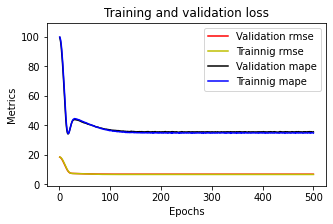

In [158]:
plotme(model6_1_3)

In [159]:
# inputs: distance + 1st dist + 2nd dist + 3rd dist
model6_1_5 = nnmodel_(100, num_hlayers=1,Epoch=500)
model6_1_5

Epoch 1/500
186/186 [==============================] - 0s 1ms/step - loss: 1229377.5000 - mape: 99.5311 - rmse: 1108.7729 - val_loss: 1211522.0000 - val_mape: 98.7137 - val_rmse: 1100.6917
Epoch 2/500
186/186 [==============================] - 0s 859us/step - loss: 1188697.6250 - mape: 97.0562 - rmse: 1090.2740 - val_loss: 1150662.0000 - val_mape: 94.9567 - val_rmse: 1072.6891
Epoch 3/500
186/186 [==============================] - 0s 842us/step - loss: 1110145.6250 - mape: 92.1044 - rmse: 1053.6345 - val_loss: 1056161.1250 - val_mape: 88.8755 - val_rmse: 1027.6970
Epoch 4/500
186/186 [==============================] - 0s 849us/step - loss: 1002216.8125 - mape: 84.9673 - rmse: 1001.1078 - val_loss: 937226.6250 - val_mape: 80.7932 - val_rmse: 968.1047
Epoch 5/500
186/186 [==============================] - 0s 848us/step - loss: 875262.3750 - mape: 76.0507 - rmse: 935.5546 - val_loss: 806202.1250 - val_mape: 71.1829 - val_rmse: 897.8876
Epoch 6/500
186/186 [==============================] 

Epoch 88/500
186/186 [==============================] - 0s 801us/step - loss: 160452.2500 - mape: 34.9577 - rmse: 400.5649 - val_loss: 169358.7500 - val_mape: 35.8170 - val_rmse: 411.5322
Epoch 89/500
186/186 [==============================] - 0s 798us/step - loss: 160446.5312 - mape: 35.1249 - rmse: 400.5578 - val_loss: 169359.2812 - val_mape: 35.7358 - val_rmse: 411.5328
Epoch 90/500
186/186 [==============================] - 0s 828us/step - loss: 160421.1719 - mape: 34.9151 - rmse: 400.5261 - val_loss: 169374.5000 - val_mape: 35.8667 - val_rmse: 411.5513
Epoch 91/500
186/186 [==============================] - 0s 855us/step - loss: 160440.1875 - mape: 34.9729 - rmse: 400.5499 - val_loss: 169376.4688 - val_mape: 35.8190 - val_rmse: 411.5537
Epoch 92/500
186/186 [==============================] - 0s 829us/step - loss: 160411.0000 - mape: 35.0818 - rmse: 400.5134 - val_loss: 169385.6875 - val_mape: 35.8752 - val_rmse: 411.5649
Epoch 93/500
186/186 [==============================] - 0s 8

186/186 [==============================] - 0s 797us/step - loss: 160279.0469 - mape: 34.5804 - rmse: 400.3487 - val_loss: 169504.5469 - val_mape: 35.5307 - val_rmse: 411.7093
Epoch 175/500
186/186 [==============================] - 0s 802us/step - loss: 160257.4844 - mape: 34.9185 - rmse: 400.3217 - val_loss: 169504.9531 - val_mape: 35.4375 - val_rmse: 411.7098
Epoch 176/500
186/186 [==============================] - 0s 805us/step - loss: 160265.3438 - mape: 34.9554 - rmse: 400.3315 - val_loss: 169503.5781 - val_mape: 35.4485 - val_rmse: 411.7081
Epoch 177/500
186/186 [==============================] - 0s 808us/step - loss: 160262.4219 - mape: 34.6986 - rmse: 400.3279 - val_loss: 169507.5625 - val_mape: 35.4856 - val_rmse: 411.7130
Epoch 178/500
186/186 [==============================] - 0s 804us/step - loss: 160251.3281 - mape: 34.9679 - rmse: 400.3140 - val_loss: 169517.3750 - val_mape: 35.2428 - val_rmse: 411.7249
Epoch 179/500
186/186 [==============================] - 0s 805us/ste

186/186 [==============================] - 0s 797us/step - loss: 160217.5781 - mape: 34.5866 - rmse: 400.2719 - val_loss: 169482.5625 - val_mape: 35.3641 - val_rmse: 411.6826
Epoch 261/500
186/186 [==============================] - 0s 805us/step - loss: 160208.2656 - mape: 34.5992 - rmse: 400.2603 - val_loss: 169477.3281 - val_mape: 35.4556 - val_rmse: 411.6762
Epoch 262/500
186/186 [==============================] - 0s 802us/step - loss: 160209.5625 - mape: 34.7259 - rmse: 400.2619 - val_loss: 169486.0156 - val_mape: 35.6772 - val_rmse: 411.6868
Epoch 263/500
186/186 [==============================] - 0s 806us/step - loss: 160205.2031 - mape: 34.6019 - rmse: 400.2564 - val_loss: 169528.5469 - val_mape: 35.9666 - val_rmse: 411.7384
Epoch 264/500
186/186 [==============================] - 0s 797us/step - loss: 160199.8906 - mape: 34.8989 - rmse: 400.2498 - val_loss: 169482.7031 - val_mape: 35.6212 - val_rmse: 411.6828
Epoch 265/500
186/186 [==============================] - 0s 806us/ste

186/186 [==============================] - 0s 809us/step - loss: 160179.6875 - mape: 34.7603 - rmse: 400.2245 - val_loss: 169418.5312 - val_mape: 35.6369 - val_rmse: 411.6048
Epoch 347/500
186/186 [==============================] - 0s 829us/step - loss: 160164.5000 - mape: 34.8713 - rmse: 400.2056 - val_loss: 169414.1094 - val_mape: 35.6244 - val_rmse: 411.5995
Epoch 348/500
186/186 [==============================] - 0s 844us/step - loss: 160160.5469 - mape: 34.7735 - rmse: 400.2006 - val_loss: 169437.3281 - val_mape: 35.8275 - val_rmse: 411.6277
Epoch 349/500
186/186 [==============================] - 0s 838us/step - loss: 160173.9688 - mape: 34.9757 - rmse: 400.2174 - val_loss: 169406.7969 - val_mape: 35.5557 - val_rmse: 411.5906
Epoch 350/500
186/186 [==============================] - 0s 826us/step - loss: 160159.6875 - mape: 34.6775 - rmse: 400.1996 - val_loss: 169414.3906 - val_mape: 35.6824 - val_rmse: 411.5998
Epoch 351/500
186/186 [==============================] - 0s 825us/ste

186/186 [==============================] - 0s 863us/step - loss: 160097.7031 - mape: 34.7200 - rmse: 400.1221 - val_loss: 169327.5000 - val_mape: 35.5456 - val_rmse: 411.4942
Epoch 433/500
186/186 [==============================] - 0s 804us/step - loss: 160112.7188 - mape: 34.9281 - rmse: 400.1409 - val_loss: 169332.0000 - val_mape: 35.2915 - val_rmse: 411.4997
Epoch 434/500
186/186 [==============================] - 0s 796us/step - loss: 160101.1719 - mape: 34.8104 - rmse: 400.1264 - val_loss: 169327.1719 - val_mape: 35.5038 - val_rmse: 411.4938
Epoch 435/500
186/186 [==============================] - 0s 800us/step - loss: 160101.3438 - mape: 34.8654 - rmse: 400.1266 - val_loss: 169329.7969 - val_mape: 35.3946 - val_rmse: 411.4970
Epoch 436/500
186/186 [==============================] - 0s 799us/step - loss: 160112.6875 - mape: 34.9071 - rmse: 400.1408 - val_loss: 169325.3281 - val_mape: 35.4730 - val_rmse: 411.4916
Epoch 437/500
186/186 [==============================] - 0s 795us/ste

In [160]:
# inputs: distance + 1st dist + 2nd dist + 3rd dist
model6_1_1 = nnmodel_(100,50, num_hlayers=2,Epoch=500)
model6_1_1

Epoch 1/500
186/186 [==============================] - 0s 1ms/step - loss: 1179338.7500 - mape: 96.4879 - rmse: 1085.9736 - val_loss: 997983.9375 - val_mape: 85.0657 - val_rmse: 998.9915
Epoch 2/500
186/186 [==============================] - 0s 866us/step - loss: 592952.9375 - mape: 54.3434 - rmse: 770.0344 - val_loss: 249930.3281 - val_mape: 34.3457 - val_rmse: 499.9303
Epoch 3/500
186/186 [==============================] - 0s 868us/step - loss: 200544.1562 - mape: 41.7771 - rmse: 447.8216 - val_loss: 193654.9375 - val_mape: 43.9374 - val_rmse: 440.0624
Epoch 4/500
186/186 [==============================] - 0s 874us/step - loss: 188822.4531 - mape: 44.2080 - rmse: 434.5370 - val_loss: 190387.4375 - val_mape: 43.7152 - val_rmse: 436.3341
Epoch 5/500
186/186 [==============================] - 0s 909us/step - loss: 184962.8594 - mape: 43.6028 - rmse: 430.0731 - val_loss: 186956.2188 - val_mape: 42.3487 - val_rmse: 432.3843
Epoch 6/500
186/186 [==============================] - 0s 874us/s

Epoch 45/500
186/186 [==============================] - 0s 869us/step - loss: 159389.9531 - mape: 34.4733 - rmse: 399.2367 - val_loss: 168111.9844 - val_mape: 35.8687 - val_rmse: 410.0146
Epoch 46/500
186/186 [==============================] - 0s 886us/step - loss: 159406.6875 - mape: 34.8044 - rmse: 399.2577 - val_loss: 168037.5000 - val_mape: 35.8131 - val_rmse: 409.9238
Epoch 47/500
186/186 [==============================] - 0s 869us/step - loss: 159346.7656 - mape: 34.6820 - rmse: 399.1826 - val_loss: 167966.8594 - val_mape: 35.2182 - val_rmse: 409.8376
Epoch 48/500
186/186 [==============================] - 0s 861us/step - loss: 159358.0469 - mape: 34.9120 - rmse: 399.1967 - val_loss: 167961.3750 - val_mape: 35.0630 - val_rmse: 409.8309
Epoch 49/500
186/186 [==============================] - 0s 871us/step - loss: 159314.0469 - mape: 34.6015 - rmse: 399.1416 - val_loss: 167921.8281 - val_mape: 35.5280 - val_rmse: 409.7827
Epoch 50/500
186/186 [==============================] - 0s 8

186/186 [==============================] - 0s 870us/step - loss: 157647.4844 - mape: 34.4768 - rmse: 397.0485 - val_loss: 165496.9219 - val_mape: 33.9600 - val_rmse: 406.8131
Epoch 132/500
186/186 [==============================] - 0s 861us/step - loss: 157611.8438 - mape: 34.3485 - rmse: 397.0036 - val_loss: 165200.9844 - val_mape: 35.5109 - val_rmse: 406.4492
Epoch 133/500
186/186 [==============================] - 0s 868us/step - loss: 157534.7188 - mape: 34.4948 - rmse: 396.9064 - val_loss: 165287.4688 - val_mape: 35.9021 - val_rmse: 406.5556
Epoch 134/500
186/186 [==============================] - 0s 895us/step - loss: 157495.0938 - mape: 34.6009 - rmse: 396.8565 - val_loss: 165120.5938 - val_mape: 35.2242 - val_rmse: 406.3503
Epoch 135/500
186/186 [==============================] - 0s 860us/step - loss: 157648.3125 - mape: 34.6001 - rmse: 397.0495 - val_loss: 165176.2500 - val_mape: 34.4317 - val_rmse: 406.4188
Epoch 136/500
186/186 [==============================] - 0s 864us/ste

186/186 [==============================] - 0s 861us/step - loss: 156147.3594 - mape: 34.4843 - rmse: 395.1548 - val_loss: 162694.2188 - val_mape: 34.7476 - val_rmse: 403.3537
Epoch 218/500
186/186 [==============================] - 0s 875us/step - loss: 156160.4688 - mape: 34.2644 - rmse: 395.1714 - val_loss: 162866.0938 - val_mape: 35.9221 - val_rmse: 403.5667
Epoch 219/500
186/186 [==============================] - 0s 868us/step - loss: 156070.7656 - mape: 34.6179 - rmse: 395.0579 - val_loss: 162761.8125 - val_mape: 34.1078 - val_rmse: 403.4375
Epoch 220/500
186/186 [==============================] - 0s 863us/step - loss: 156061.2656 - mape: 34.4329 - rmse: 395.0459 - val_loss: 162738.9844 - val_mape: 34.1016 - val_rmse: 403.4092
Epoch 221/500
186/186 [==============================] - 0s 894us/step - loss: 156181.4062 - mape: 34.3898 - rmse: 395.1979 - val_loss: 162606.4844 - val_mape: 34.5825 - val_rmse: 403.2449
Epoch 222/500
186/186 [==============================] - 0s 850us/ste

186/186 [==============================] - 0s 859us/step - loss: 155198.0000 - mape: 34.5126 - rmse: 393.9518 - val_loss: 160890.9062 - val_mape: 34.0826 - val_rmse: 401.1121
Epoch 304/500
186/186 [==============================] - 0s 862us/step - loss: 155219.9375 - mape: 34.2446 - rmse: 393.9796 - val_loss: 160806.5312 - val_mape: 35.1175 - val_rmse: 401.0069
Epoch 305/500
186/186 [==============================] - 0s 874us/step - loss: 155178.7500 - mape: 34.4705 - rmse: 393.9273 - val_loss: 160850.0781 - val_mape: 34.1028 - val_rmse: 401.0612
Epoch 306/500
186/186 [==============================] - 0s 1ms/step - loss: 155157.2188 - mape: 34.2078 - rmse: 393.9000 - val_loss: 161075.7188 - val_mape: 35.9330 - val_rmse: 401.3424
Epoch 307/500
186/186 [==============================] - 0s 872us/step - loss: 155179.8438 - mape: 34.3712 - rmse: 393.9287 - val_loss: 160735.4531 - val_mape: 35.1159 - val_rmse: 400.9183
Epoch 308/500
186/186 [==============================] - 0s 872us/step 

186/186 [==============================] - 0s 866us/step - loss: 154528.7969 - mape: 34.4675 - rmse: 393.1015 - val_loss: 159384.6719 - val_mape: 35.4408 - val_rmse: 399.2301
Epoch 390/500
186/186 [==============================] - 0s 892us/step - loss: 154614.5000 - mape: 34.7062 - rmse: 393.2105 - val_loss: 159272.2656 - val_mape: 34.3729 - val_rmse: 399.0893
Epoch 391/500
186/186 [==============================] - 0s 860us/step - loss: 154623.1094 - mape: 34.3793 - rmse: 393.2215 - val_loss: 159236.2500 - val_mape: 34.2428 - val_rmse: 399.0442
Epoch 392/500
186/186 [==============================] - 0s 850us/step - loss: 154509.3906 - mape: 34.4644 - rmse: 393.0768 - val_loss: 159318.2344 - val_mape: 33.8835 - val_rmse: 399.1469
Epoch 393/500
186/186 [==============================] - 0s 852us/step - loss: 154540.2969 - mape: 34.4329 - rmse: 393.1161 - val_loss: 159284.1562 - val_mape: 33.9460 - val_rmse: 399.1042
Epoch 394/500
186/186 [==============================] - 0s 866us/ste

186/186 [==============================] - 0s 814us/step - loss: 154019.4219 - mape: 34.2842 - rmse: 392.4531 - val_loss: 158223.6094 - val_mape: 35.0984 - val_rmse: 397.7733
Epoch 476/500
186/186 [==============================] - 0s 880us/step - loss: 154049.4531 - mape: 34.4011 - rmse: 392.4913 - val_loss: 158216.0312 - val_mape: 33.9480 - val_rmse: 397.7638
Epoch 477/500
186/186 [==============================] - 0s 873us/step - loss: 154078.2344 - mape: 34.4961 - rmse: 392.5280 - val_loss: 158250.9219 - val_mape: 33.7537 - val_rmse: 397.8076
Epoch 478/500
186/186 [==============================] - 0s 864us/step - loss: 154268.2969 - mape: 34.2528 - rmse: 392.7700 - val_loss: 158190.2344 - val_mape: 34.5274 - val_rmse: 397.7314
Epoch 479/500
186/186 [==============================] - 0s 839us/step - loss: 154100.0781 - mape: 34.4635 - rmse: 392.5558 - val_loss: 158241.4844 - val_mape: 35.0527 - val_rmse: 397.7958
Epoch 480/500
186/186 [==============================] - 0s 849us/ste

In [161]:
# plotme(model6_1_1)

In [162]:
# inputs: distance + hour + 1st dist + 2nd dist + 3rd dist
model6_1_2 = nnmodel_(200,100, num_hlayers=2,Epoch=500)
model6_1_2

Epoch 1/500
186/186 [==============================] - 0s 2ms/step - loss: 1032066.3125 - mape: 86.2856 - rmse: 1015.9066 - val_loss: 499056.3125 - val_mape: 45.3318 - val_rmse: 706.4391
Epoch 2/500
186/186 [==============================] - 0s 1ms/step - loss: 238207.5469 - mape: 41.1172 - rmse: 488.0651 - val_loss: 194291.6875 - val_mape: 44.9034 - val_rmse: 440.7853
Epoch 3/500
186/186 [==============================] - 0s 1ms/step - loss: 188041.2500 - mape: 44.3727 - rmse: 433.6372 - val_loss: 188594.2500 - val_mape: 42.8487 - val_rmse: 434.2744
Epoch 4/500
186/186 [==============================] - 0s 1ms/step - loss: 181969.7812 - mape: 42.6192 - rmse: 426.5792 - val_loss: 183756.6719 - val_mape: 42.8973 - val_rmse: 428.6685
Epoch 5/500
186/186 [==============================] - 0s 1ms/step - loss: 176350.7500 - mape: 41.6713 - rmse: 419.9414 - val_loss: 178956.4844 - val_mape: 41.2498 - val_rmse: 423.0325
Epoch 6/500
186/186 [==============================] - 0s 1ms/step - loss

Epoch 89/500
186/186 [==============================] - 0s 865us/step - loss: 158003.4688 - mape: 34.5723 - rmse: 397.4965 - val_loss: 165380.8438 - val_mape: 35.3921 - val_rmse: 406.6704
Epoch 90/500
186/186 [==============================] - 0s 891us/step - loss: 157759.5000 - mape: 34.4820 - rmse: 397.1895 - val_loss: 165416.8281 - val_mape: 35.9050 - val_rmse: 406.7147
Epoch 91/500
186/186 [==============================] - 0s 1ms/step - loss: 157651.0156 - mape: 34.6039 - rmse: 397.0529 - val_loss: 165485.4375 - val_mape: 34.1022 - val_rmse: 406.7990
Epoch 92/500
186/186 [==============================] - 0s 1ms/step - loss: 157599.7344 - mape: 34.5993 - rmse: 396.9883 - val_loss: 165774.5469 - val_mape: 33.5287 - val_rmse: 407.1542
Epoch 93/500
186/186 [==============================] - 0s 918us/step - loss: 157705.7812 - mape: 34.4670 - rmse: 397.1219 - val_loss: 165223.2812 - val_mape: 35.3747 - val_rmse: 406.4767
Epoch 94/500
186/186 [==============================] - 0s 919us

186/186 [==============================] - 0s 874us/step - loss: 155911.6094 - mape: 34.6621 - rmse: 394.8564 - val_loss: 161627.5156 - val_mape: 33.9072 - val_rmse: 402.0292
Epoch 176/500
186/186 [==============================] - 0s 875us/step - loss: 155605.9844 - mape: 34.4801 - rmse: 394.4692 - val_loss: 161452.4844 - val_mape: 34.6145 - val_rmse: 401.8115
Epoch 177/500
186/186 [==============================] - 0s 882us/step - loss: 155622.7969 - mape: 34.2992 - rmse: 394.4905 - val_loss: 161475.0000 - val_mape: 35.1665 - val_rmse: 401.8395
Epoch 178/500
186/186 [==============================] - 0s 975us/step - loss: 155406.0625 - mape: 34.3543 - rmse: 394.2158 - val_loss: 162177.4219 - val_mape: 36.8300 - val_rmse: 402.7126
Epoch 179/500
186/186 [==============================] - 0s 846us/step - loss: 155619.8281 - mape: 34.2986 - rmse: 394.4868 - val_loss: 161457.2188 - val_mape: 35.6848 - val_rmse: 401.8174
Epoch 180/500
186/186 [==============================] - 0s 897us/ste

186/186 [==============================] - 0s 890us/step - loss: 154303.6406 - mape: 34.4749 - rmse: 392.8150 - val_loss: 159074.0312 - val_mape: 33.4088 - val_rmse: 398.8409
Epoch 262/500
186/186 [==============================] - 0s 897us/step - loss: 154251.4688 - mape: 34.2252 - rmse: 392.7486 - val_loss: 158780.5156 - val_mape: 34.0904 - val_rmse: 398.4727
Epoch 263/500
186/186 [==============================] - 0s 888us/step - loss: 154091.6094 - mape: 34.3410 - rmse: 392.5450 - val_loss: 159024.6875 - val_mape: 35.5509 - val_rmse: 398.7790
Epoch 264/500
186/186 [==============================] - 0s 854us/step - loss: 154123.6406 - mape: 34.2833 - rmse: 392.5858 - val_loss: 158895.1406 - val_mape: 35.6383 - val_rmse: 398.6165
Epoch 265/500
186/186 [==============================] - 0s 847us/step - loss: 154162.1562 - mape: 34.4778 - rmse: 392.6349 - val_loss: 158822.1719 - val_mape: 35.3458 - val_rmse: 398.5250
Epoch 266/500
186/186 [==============================] - 0s 935us/ste

186/186 [==============================] - 0s 968us/step - loss: 153390.5781 - mape: 34.1915 - rmse: 391.6511 - val_loss: 157146.8750 - val_mape: 34.7137 - val_rmse: 396.4175
Epoch 348/500
186/186 [==============================] - 0s 879us/step - loss: 153728.5781 - mape: 34.0697 - rmse: 392.0824 - val_loss: 157308.6562 - val_mape: 33.5266 - val_rmse: 396.6216
Epoch 349/500
186/186 [==============================] - 0s 855us/step - loss: 153472.0938 - mape: 34.3939 - rmse: 391.7552 - val_loss: 157321.2656 - val_mape: 34.8414 - val_rmse: 396.6375
Epoch 350/500
186/186 [==============================] - 0s 928us/step - loss: 153551.7344 - mape: 34.2446 - rmse: 391.8568 - val_loss: 157158.2344 - val_mape: 34.7477 - val_rmse: 396.4319
Epoch 351/500
186/186 [==============================] - 0s 850us/step - loss: 153288.4844 - mape: 34.2756 - rmse: 391.5207 - val_loss: 157239.4375 - val_mape: 34.0755 - val_rmse: 396.5343
Epoch 352/500
186/186 [==============================] - 0s 929us/ste

186/186 [==============================] - 0s 870us/step - loss: 152377.4688 - mape: 34.0586 - rmse: 390.3556 - val_loss: 157027.3906 - val_mape: 36.3809 - val_rmse: 396.2668
Epoch 434/500
186/186 [==============================] - 0s 864us/step - loss: 152592.6094 - mape: 34.3246 - rmse: 390.6310 - val_loss: 156000.7500 - val_mape: 34.9209 - val_rmse: 394.9693
Epoch 435/500
186/186 [==============================] - 0s 895us/step - loss: 152250.8125 - mape: 33.9226 - rmse: 390.1933 - val_loss: 155825.3906 - val_mape: 34.9322 - val_rmse: 394.7473
Epoch 436/500
186/186 [==============================] - 0s 829us/step - loss: 152535.5625 - mape: 34.5208 - rmse: 390.5580 - val_loss: 156138.5938 - val_mape: 32.9736 - val_rmse: 395.1438
Epoch 437/500
186/186 [==============================] - 0s 878us/step - loss: 152548.7188 - mape: 34.0109 - rmse: 390.5749 - val_loss: 156204.1406 - val_mape: 32.8139 - val_rmse: 395.2267
Epoch 438/500
186/186 [==============================] - 0s 856us/ste

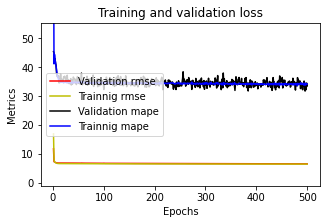

In [163]:
plotme(model6_1_2)

## sub-problem 7:  **input: distance & hour & all roadtypes with real distance**

In [30]:
# df2 = pd.read_csv('C:\\My files\\Dr Buzna\\trips\\NN\\real_distance\\tripdf1_ps_sps.csv', index_col=0)
# df1 = pd.merge(df3,df1, on = ['travel time','distance','hour of day'])
# df2 = pd.merge(df3,df2, on = ['travel time','distance','hour of day'])
# normalized_distance22=(df2['distance']-df2['distance'].min())/(df2['distance'].max()-df2['distance'].min())
# normalized_distance33=(df2['est_dist']-df2['est_dist'].min())/(df2['est_dist'].max()-df2['est_dist'].min())
# df2['distance'] = normalized_distance22
# df2['est_dist'] = normalized_distance33
df2 = df2.dropna(axis='columns', how ='all')
df8 = df2.iloc[:,:].copy()
# df8 = df8.drop(['hour of day'], axis=1)
df8.head(20)

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0           823            6  0.358222  0.256935    0.682353         0.878788   
1          1066           14  0.453845  0.408831    0.734375         0.734375   
2           665           17  0.312429  0.248150    0.718310         0.796875   
3          1053           21  0.428195  0.300619    0.563107         0.725000   
5          1441           22  0.365045  0.340558    0.610526         0.623656   
6           663           19  0.366691  0.319411    0.872093         0.925926   
7           838           14  0.368505  0.342642    0.578947         0.555556   
8          1193           14  0.364528  0.319223    0.673684         0.688172   
9           753           16  0.301707  0.264006    0.617284         0.595238   
10          761           23  0.334188  0.270957    0.864198         0.972222   
11         1211           20  0.506586  0.422852    0.826389         0.881481   
12         2108            1  0.011185  0.010618    0.666667         1.000000   
13          971           12  0.199599  0.130786    0.800000         1.000000   
14          642            1  0.358198  0.335590    0.873418         0.802326   
15          382            4  0.138652  0.107072    0.941176         1.000000   
16          518           13  0.222558  0.176469    0.731707         0.833333   
17          960           19  0.467350  0.389947    0.926829         0.926829   
18         1082           21  0.575013  0.417349    0.468254         0.517544   
19          872            7  0.358158  0.256935    0.698795         0.878788   
20         1178            0  0.748872  0.549375    0.920000         0.989247   

    living_street  motorway  motorway_link    primary  ...  road  secondary  \
0             0.0       0.0            0.0   9565.882  ...   0.0        0.0   
1             0.0       0.0            0.0  10057.793  ...   0.0        0.0   
2             0.0       0.0            0.0   8304.143  ...   0.0        0.0   
3             0.0       0.0            0.0  10417.651  ...   0.0        0.0   
5             0.0       0.0            0.0   8304.143  ...   0.0        0.0   
6             0.0       0.0            0.0  10417.651  ...   0.0        0.0   
7             0.0       0.0            0.0   8304.143  ...   0.0        0.0   
8             0.0       0.0            0.0   8304.143  ...   0.0        0.0   
9             0.0       0.0            0.0   6598.517  ...   0.0        0.0   
10            0.0       0.0            0.0   8554.998  ...   0.0        0.0   
11            0.0       0.0            0.0  14594.525  ...   0.0        0.0   
12            0.0       0.0            0.0      0.000  ...   0.0        0.0   
13            0.0       0.0            0.0   5554.231  ...   0.0        0.0   
14            0.0       0.0            0.0   9270.097  ...   0.0        0.0   
15            0.0       0.0            0.0   3287.012  ...   0.0        0.0   
16            0.0       0.0            0.0   5802.349  ...   0.0        0.0   
17            0.0       0.0            0.0  10057.793  ...   0.0        0.0   
18            0.0       0.0            0.0  15977.739  ...   0.0        0.0   
19            0.0       0.0            0.0   9206.024  ...   0.0        0.0   
20            0.0       0.0            0.0  20916.745  ...   0.0        0.0   

    secondary_link  service  tertiary  track  trunk  trunk_link  unclassified  \
0              0.0  188.852  1130.185    0.0    0.0         0.0       102.520   
1              0.0  381.502  3556.950    0.0    0.0         0.0        42.929   
2              0.0    0.000   673.871    0.0    0.0         0.0         0.000   
3              0.0  835.884  1437.041    0.0    0.0         0.0       450.567   
5              0.0    0.000  1011.418    0.0    0.0         0.0         0.000   
6              0.0    0.000  1011.418    0.0    0.0         0.0       137.788   
7              0.0    0.000  1380.763    0.0    0.0         0.0         0.0

In [31]:
# Normalize using Min/Max Normalization.
normalize=(df8['living_street']-df8['living_street'].min())/(df8['living_street'].max()-df8['living_street'].min())
df8['living_street'] = normalize
normalize=(df8['motorway']-df8['motorway'].min())/(df8['motorway'].max()-df8['motorway'].min())
df8['motorway'] = normalize
normalize=(df8['motorway_link']-df8['motorway_link'].min())/(df8['motorway_link'].max()-df8['motorway_link'].min())
df8['motorway_link'] = normalize
normalize=(df8['primary']-df8['primary'].min())/(df8['primary'].max()-df8['primary'].min())
df8['primary'] = normalize
normalize=(df8['primary_link']-df8['primary_link'].min())/(df8['primary_link'].max()-df8['primary_link'].min())
df8['primary_link'] = normalize
normalize=(df8['residential']-df8['residential'].min())/(df8['residential'].max()-df8['residential'].min())
df8['residential'] = normalize
normalize=(df8['road']-df8['road'].min())/(df8['road'].max()-df8['road'].min())
df8['road'] = normalize
normalize=(df8['secondary']-df8['secondary'].min())/(df8['secondary'].max()-df8['secondary'].min())
df8['secondary'] = normalize
normalize=(df8['secondary_link']-df8['secondary_link'].min())/(df8['secondary_link'].max()-df8['secondary_link'].min())
df8['secondary_link'] = normalize
normalize=(df8['service']-df8['service'].min())/(df8['service'].max()-df8['service'].min())
df8['service'] = normalize
normalize=(df8['tertiary']-df8['tertiary'].min())/(df8['tertiary'].max()-df8['tertiary'].min())
df8['tertiary'] = normalize

normalize=(df8['track']-df8['track'].min())/(df8['track'].max()-df8['track'].min())
df8['track'] = normalize


normalize=(df8['trunk_link']-df8['trunk_link'].min())/(df8['trunk_link'].max()-df8['trunk_link'].min())
df8['trunk_link'] = normalize

normalize=(df8['trunk']-df8['trunk'].min())/(df8['trunk'].max()-df8['trunk'].min())
df8['trunk'] = normalize

normalize=(df8['unclassified']-df8['unclassified'].min())/(df8['unclassified'].max()-df8['unclassified'].min())
df8['unclassified'] = normalize
normalize=(df8['others']-df8['others'].min())/(df8['others'].max()-df8['others'].min())
df8['others'] = normalize
df8 = df8.dropna(axis='columns', how ='all')
df8

travel time  hour of day  distance  est_dist  similarity  \
0             823            6  0.358222  0.256935    0.682353   
1            1066           14  0.453845  0.408831    0.734375   
2             665           17  0.312429  0.248150    0.718310   
3            1053           21  0.428195  0.300619    0.563107   
5            1441           22  0.365045  0.340558    0.610526   
...           ...          ...       ...       ...         ...   
7487          945           18  0.471185  0.375091    0.500000   
7488          935           10  0.418747  0.369611    0.494737   
7489         1122           16  0.415560  0.309478    0.306122   
7490         1285           19  0.720478  0.569751    0.641026   
7491          499           20  0.200723  0.159171    0.441860   

      similarity_dijk  living_street  motorway  motorway_link   primary  \
0            0.878788            0.0       0.0            0.0  0.335569   
1            0.734375            0.0       0.0            0.0  0.352825   
2            0.796875            0.0       0.0            0.0  0.291308   
3            0.725000            0.0       0.0            0.0  0.365449   
5            0.623656            0.0       0.0            0.0  0.291308   
...               ...            ...       ...            ...       ...   
7487         0.523077            0.0       0.0            0.0  0.315015   
7488         0.456311            0.0       0.0            0.0  0.390525   
7489         0.312500            0.0       0.0            0.0  0.335281   
7490         0.663717            0.0       0.0            0.0  0.642549   
7491         0.475000            0.0       0.0            0.0  0.075992   

      primary_link  residential  road  secondary  secondary_link   service  \
0         0.265116     0.009295   0.0   0.000000             0.0  0.058255   
1         0.105429     0.031040   0.0   0.000000             0.0  0.117681   
2         0.000000     0.118441   0.0   0.000000             0.0  0.000000   
3         0.105429     0.041429   0.0   0.000000             0.0  0.257844   
5         0.000000     0.269504   0.0   0.000000             0.0  0.000000   
...            ...          ...   ...        ...             ...       ...   
7487      0.000000     0.103276   0.0   0.000000             0.0  0.000000   
7488      0.462365     0.122407   0.0   0.000000             0.0  0.000000   
7489      0.303642     0.256368   0.0   0.000000             0.0  0.045654   
7490      0.000000     0.094466   0.0   0.028689             0.0  0.015291   
7491      0.000000     0.135183   0.0   0.000000             0.0  0.000000   

      tertiary  track  unclassified  others  
0     0.074920    0.0      0.023800     0.0  
1     0.235790    0.0      0.009966     0.0  
2     0.044671    0.0      0.000000     0.0  
3     0.095261    0.0      0.104600     0.0  
5     0.067047    0.0      0.000000     0.0  
...        ...    ...           ...     ...  
7487  0.339898    0.0      0.000000     0.0  
7488  0.032250    0.0      0.000000     0.0  
7489  0.057933    0.0      0.000000     0.0  
7490  0.192621    0.0      0.000000     0.0  
7491  0.208786    0.0      0.000000     0.0  

[7406 rows x 20 columns]

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

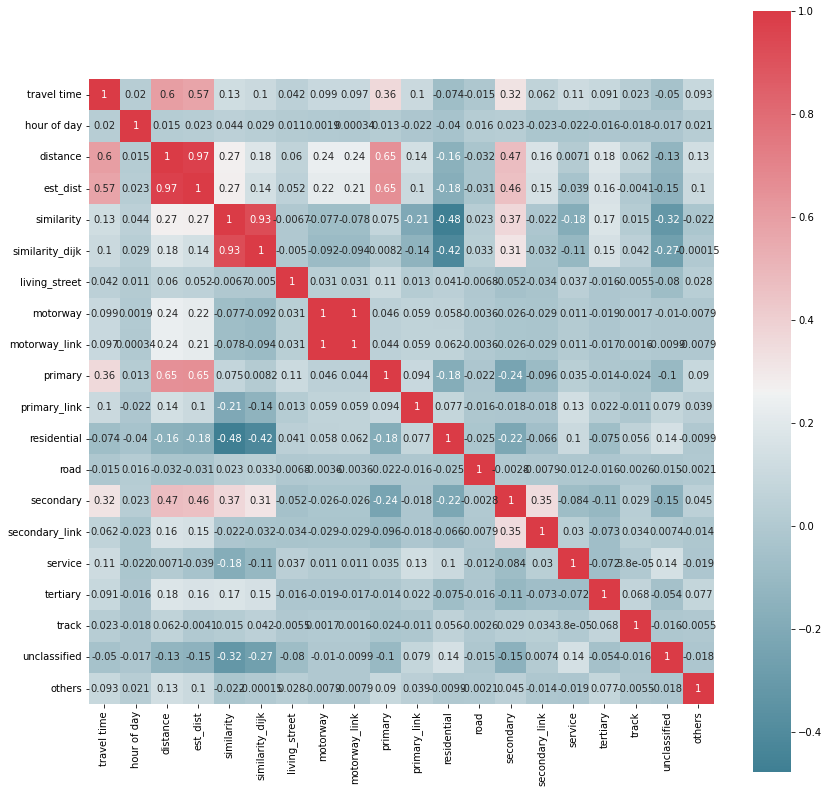

In [206]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(14,14))
corr = df8.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [207]:
x = np.array(df8.iloc[:,3:])
y = np.array(df8['travel time'])
x

array([[0.22948195, 0.68235294, 0.87878788, ..., 0.        , 0.02380027,
        0.        ],
       [0.36514723, 0.734375  , 0.734375  , ..., 0.        , 0.00996607,
        0.        ],
       [0.22163481, 0.71830986, 0.796875  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.27641075, 0.30612245, 0.3125    , ..., 0.        , 0.        ,
        0.        ],
       [0.50887304, 0.64102564, 0.66371681, ..., 0.        , 0.        ,
        0.        ],
       [0.1421632 , 0.44186047, 0.475     , ..., 0.        , 0.        ,
        0.        ]])

In [208]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [209]:
print(X_train.shape)
print(X_test.shape)
# X_train

(5993, 17)
(1499, 17)


In [210]:
# inputs: distance + roadtypes distance
model7_1_1 = nnmodel_(100,50, num_hlayers=2,Epoch=500)
model7_1_1

Epoch 1/500
188/188 [==============================] - 0s 1ms/step - loss: 1140162.7500 - mape: 92.2166 - rmse: 1067.7841 - val_loss: 736688.6875 - val_mape: 65.7615 - val_rmse: 858.3057
Epoch 2/500
188/188 [==============================] - 0s 904us/step - loss: 315776.3125 - mape: 40.8385 - rmse: 561.9398 - val_loss: 193772.0469 - val_mape: 39.4920 - val_rmse: 440.1955
Epoch 3/500
188/188 [==============================] - 0s 903us/step - loss: 187464.2344 - mape: 39.6666 - rmse: 432.9714 - val_loss: 183576.2656 - val_mape: 38.9063 - val_rmse: 428.4580
Epoch 4/500
188/188 [==============================] - 0s 903us/step - loss: 179201.0312 - mape: 38.7124 - rmse: 423.3214 - val_loss: 174100.5625 - val_mape: 37.3918 - val_rmse: 417.2536
Epoch 5/500
188/188 [==============================] - 0s 821us/step - loss: 171581.7500 - mape: 37.1791 - rmse: 414.2243 - val_loss: 166348.7500 - val_mape: 37.5860 - val_rmse: 407.8587
Epoch 6/500
188/188 [==============================] - 0s 898us/s

Epoch 45/500
188/188 [==============================] - 0s 877us/step - loss: 148709.8750 - mape: 32.7827 - rmse: 385.6292 - val_loss: 142591.8750 - val_mape: 31.7100 - val_rmse: 377.6134
Epoch 46/500
188/188 [==============================] - 0s 832us/step - loss: 148704.5469 - mape: 32.5825 - rmse: 385.6223 - val_loss: 143285.2344 - val_mape: 34.2541 - val_rmse: 378.5304
Epoch 47/500
188/188 [==============================] - 0s 904us/step - loss: 148768.5469 - mape: 32.9016 - rmse: 385.7053 - val_loss: 142540.5156 - val_mape: 32.9445 - val_rmse: 377.5454
Epoch 48/500
188/188 [==============================] - 0s 841us/step - loss: 148848.9844 - mape: 32.8080 - rmse: 385.8095 - val_loss: 142377.6875 - val_mape: 32.0694 - val_rmse: 377.3297
Epoch 49/500
188/188 [==============================] - 0s 849us/step - loss: 148624.2812 - mape: 32.7148 - rmse: 385.5182 - val_loss: 142435.5625 - val_mape: 32.8228 - val_rmse: 377.4064
Epoch 50/500
188/188 [==============================] - 0s 8

188/188 [==============================] - 0s 922us/step - loss: 146312.6562 - mape: 32.5001 - rmse: 382.5084 - val_loss: 140402.0625 - val_mape: 33.0418 - val_rmse: 374.7026
Epoch 132/500
188/188 [==============================] - 0s 761us/step - loss: 146340.3750 - mape: 32.4853 - rmse: 382.5446 - val_loss: 140170.9375 - val_mape: 32.5594 - val_rmse: 374.3941
Epoch 133/500
188/188 [==============================] - 0s 840us/step - loss: 146220.3125 - mape: 32.3390 - rmse: 382.3876 - val_loss: 140053.3750 - val_mape: 32.1299 - val_rmse: 374.2371
Epoch 134/500
188/188 [==============================] - 0s 845us/step - loss: 146240.6562 - mape: 32.4914 - rmse: 382.4142 - val_loss: 140096.8906 - val_mape: 31.6861 - val_rmse: 374.2952
Epoch 135/500
188/188 [==============================] - 0s 831us/step - loss: 146185.6094 - mape: 32.4332 - rmse: 382.3423 - val_loss: 140102.0781 - val_mape: 32.4406 - val_rmse: 374.3021
Epoch 136/500
188/188 [==============================] - 0s 767us/ste

188/188 [==============================] - 0s 834us/step - loss: 143931.2344 - mape: 32.1081 - rmse: 379.3827 - val_loss: 138726.3906 - val_mape: 31.1915 - val_rmse: 372.4599
Epoch 218/500
188/188 [==============================] - 0s 857us/step - loss: 144011.2188 - mape: 32.2010 - rmse: 379.4881 - val_loss: 138775.9531 - val_mape: 31.1953 - val_rmse: 372.5265
Epoch 219/500
188/188 [==============================] - 0s 854us/step - loss: 143906.6562 - mape: 32.0527 - rmse: 379.3503 - val_loss: 138794.9375 - val_mape: 32.5357 - val_rmse: 372.5519
Epoch 220/500
188/188 [==============================] - 0s 863us/step - loss: 143912.2188 - mape: 32.0533 - rmse: 379.3576 - val_loss: 138874.4531 - val_mape: 32.7858 - val_rmse: 372.6586
Epoch 221/500
188/188 [==============================] - 0s 848us/step - loss: 143912.4062 - mape: 32.2172 - rmse: 379.3579 - val_loss: 138937.7188 - val_mape: 32.9664 - val_rmse: 372.7435
Epoch 222/500
188/188 [==============================] - 0s 774us/ste

188/188 [==============================] - 0s 967us/step - loss: 141201.1875 - mape: 31.7788 - rmse: 375.7675 - val_loss: 136850.5469 - val_mape: 30.4898 - val_rmse: 369.9332
Epoch 304/500
188/188 [==============================] - 0s 843us/step - loss: 141178.1406 - mape: 31.7743 - rmse: 375.7368 - val_loss: 136572.3906 - val_mape: 31.3602 - val_rmse: 369.5570
Epoch 305/500
188/188 [==============================] - 0s 915us/step - loss: 141176.4531 - mape: 31.8280 - rmse: 375.7346 - val_loss: 136538.5469 - val_mape: 31.2287 - val_rmse: 369.5112
Epoch 306/500
188/188 [==============================] - 0s 829us/step - loss: 141176.5000 - mape: 31.7127 - rmse: 375.7346 - val_loss: 136434.7812 - val_mape: 30.9331 - val_rmse: 369.3708
Epoch 307/500
188/188 [==============================] - 0s 878us/step - loss: 141191.5469 - mape: 31.7931 - rmse: 375.7546 - val_loss: 136804.2344 - val_mape: 32.4550 - val_rmse: 369.8706
Epoch 308/500
188/188 [==============================] - 0s 881us/ste

188/188 [==============================] - 0s 867us/step - loss: 138764.8438 - mape: 31.5948 - rmse: 372.5115 - val_loss: 135052.0469 - val_mape: 30.8712 - val_rmse: 367.4943
Epoch 390/500
188/188 [==============================] - 0s 864us/step - loss: 138981.7812 - mape: 31.3509 - rmse: 372.8026 - val_loss: 135424.0781 - val_mape: 31.8970 - val_rmse: 368.0001
Epoch 391/500
188/188 [==============================] - 0s 871us/step - loss: 138741.1250 - mape: 31.5507 - rmse: 372.4797 - val_loss: 135227.1406 - val_mape: 31.2907 - val_rmse: 367.7324
Epoch 392/500
188/188 [==============================] - 0s 886us/step - loss: 138769.5000 - mape: 31.5562 - rmse: 372.5178 - val_loss: 135055.6875 - val_mape: 31.3999 - val_rmse: 367.4992
Epoch 393/500
188/188 [==============================] - 0s 857us/step - loss: 138813.4219 - mape: 31.5619 - rmse: 372.5767 - val_loss: 135114.5312 - val_mape: 30.5725 - val_rmse: 367.5793
Epoch 394/500
188/188 [==============================] - 0s 862us/ste

188/188 [==============================] - 0s 881us/step - loss: 136246.3125 - mape: 31.0898 - rmse: 369.1156 - val_loss: 133593.4219 - val_mape: 31.0387 - val_rmse: 365.5043
Epoch 476/500
188/188 [==============================] - 0s 855us/step - loss: 136197.2812 - mape: 31.1735 - rmse: 369.0492 - val_loss: 133549.0625 - val_mape: 31.1926 - val_rmse: 365.4437
Epoch 477/500
188/188 [==============================] - 0s 773us/step - loss: 136138.3438 - mape: 31.1283 - rmse: 368.9693 - val_loss: 133615.1875 - val_mape: 30.8689 - val_rmse: 365.5341
Epoch 478/500
188/188 [==============================] - 0s 794us/step - loss: 135920.1875 - mape: 30.9982 - rmse: 368.6736 - val_loss: 134043.3594 - val_mape: 32.0882 - val_rmse: 366.1193
Epoch 479/500
188/188 [==============================] - 0s 831us/step - loss: 136021.0625 - mape: 31.2687 - rmse: 368.8103 - val_loss: 133692.7969 - val_mape: 31.4056 - val_rmse: 365.6403
Epoch 480/500
188/188 [==============================] - 0s 841us/ste

In [211]:
# plotme(model7_1_1)

In [212]:
# inputs: distance + hour + roadtypes distance
model7_1_2 = nnmodel_(200,100, num_hlayers=2,Epoch=500)
model7_1_2

Epoch 1/500
188/188 [==============================] - 0s 1ms/step - loss: 956666.6875 - mape: 78.9000 - rmse: 978.0934 - val_loss: 261874.7188 - val_mape: 32.6677 - val_rmse: 511.7370
Epoch 2/500
188/188 [==============================] - 0s 870us/step - loss: 194614.2344 - mape: 39.2926 - rmse: 441.1510 - val_loss: 185161.9844 - val_mape: 38.1950 - val_rmse: 430.3045
Epoch 3/500
188/188 [==============================] - 0s 943us/step - loss: 177959.4219 - mape: 38.3718 - rmse: 421.8524 - val_loss: 170422.6250 - val_mape: 36.5829 - val_rmse: 412.8228
Epoch 4/500
188/188 [==============================] - 0s 888us/step - loss: 167130.5469 - mape: 36.6736 - rmse: 408.8160 - val_loss: 159776.6875 - val_mape: 36.0750 - val_rmse: 399.7208
Epoch 5/500
188/188 [==============================] - 0s 923us/step - loss: 160043.4531 - mape: 35.0331 - rmse: 400.0543 - val_loss: 153259.3750 - val_mape: 34.7542 - val_rmse: 391.4836
Epoch 6/500
188/188 [==============================] - 0s 950us/ste

Epoch 45/500
188/188 [==============================] - 0s 939us/step - loss: 147902.2656 - mape: 32.6318 - rmse: 384.5806 - val_loss: 142961.0625 - val_mape: 29.8598 - val_rmse: 378.1019
Epoch 46/500
188/188 [==============================] - 0s 950us/step - loss: 148130.7656 - mape: 32.5535 - rmse: 384.8776 - val_loss: 141606.2500 - val_mape: 33.2341 - val_rmse: 376.3061
Epoch 47/500
188/188 [==============================] - 0s 925us/step - loss: 147681.3438 - mape: 32.6439 - rmse: 384.2933 - val_loss: 141333.9844 - val_mape: 32.6923 - val_rmse: 375.9441
Epoch 48/500
188/188 [==============================] - 0s 914us/step - loss: 147731.6562 - mape: 32.5267 - rmse: 384.3588 - val_loss: 141550.2812 - val_mape: 33.1942 - val_rmse: 376.2317
Epoch 49/500
188/188 [==============================] - 0s 887us/step - loss: 147418.0938 - mape: 32.5817 - rmse: 383.9507 - val_loss: 142501.5781 - val_mape: 34.5992 - val_rmse: 377.4938
Epoch 50/500
188/188 [==============================] - 0s 9

188/188 [==============================] - 0s 851us/step - loss: 143444.2812 - mape: 32.0478 - rmse: 378.7404 - val_loss: 137830.4219 - val_mape: 31.5260 - val_rmse: 371.2552
Epoch 132/500
188/188 [==============================] - 0s 916us/step - loss: 143322.6094 - mape: 31.9991 - rmse: 378.5797 - val_loss: 137857.8281 - val_mape: 31.3898 - val_rmse: 371.2921
Epoch 133/500
188/188 [==============================] - 0s 870us/step - loss: 143143.7344 - mape: 32.2633 - rmse: 378.3434 - val_loss: 138264.1719 - val_mape: 30.4184 - val_rmse: 371.8389
Epoch 134/500
188/188 [==============================] - 0s 954us/step - loss: 142965.7344 - mape: 31.7444 - rmse: 378.1081 - val_loss: 138167.1875 - val_mape: 32.9786 - val_rmse: 371.7085
Epoch 135/500
188/188 [==============================] - 0s 913us/step - loss: 142970.6250 - mape: 32.3220 - rmse: 378.1146 - val_loss: 138021.0625 - val_mape: 30.4574 - val_rmse: 371.5119
Epoch 136/500
188/188 [==============================] - 0s 896us/ste

188/188 [==============================] - 0s 863us/step - loss: 138826.9844 - mape: 31.5106 - rmse: 372.5949 - val_loss: 135327.3438 - val_mape: 31.2649 - val_rmse: 367.8687
Epoch 218/500
188/188 [==============================] - 0s 837us/step - loss: 138892.6719 - mape: 31.5634 - rmse: 372.6831 - val_loss: 135131.9375 - val_mape: 31.3316 - val_rmse: 367.6030
Epoch 219/500
188/188 [==============================] - 0s 874us/step - loss: 138744.3906 - mape: 31.5932 - rmse: 372.4841 - val_loss: 135402.4531 - val_mape: 30.0930 - val_rmse: 367.9707
Epoch 220/500
188/188 [==============================] - 0s 960us/step - loss: 138567.3594 - mape: 31.2764 - rmse: 372.2464 - val_loss: 135229.8125 - val_mape: 31.0288 - val_rmse: 367.7361
Epoch 221/500
188/188 [==============================] - 0s 896us/step - loss: 138846.2344 - mape: 31.5543 - rmse: 372.6208 - val_loss: 134993.7188 - val_mape: 30.7876 - val_rmse: 367.4149
Epoch 222/500
188/188 [==============================] - 0s 868us/ste

188/188 [==============================] - 0s 906us/step - loss: 134090.7656 - mape: 30.6025 - rmse: 366.1841 - val_loss: 133040.6250 - val_mape: 30.5344 - val_rmse: 364.7473
Epoch 304/500
188/188 [==============================] - 0s 927us/step - loss: 134194.4688 - mape: 30.7908 - rmse: 366.3256 - val_loss: 133781.2969 - val_mape: 32.0936 - val_rmse: 365.7613
Epoch 305/500
188/188 [==============================] - 0s 900us/step - loss: 134405.1875 - mape: 30.8313 - rmse: 366.6131 - val_loss: 133087.5625 - val_mape: 30.5298 - val_rmse: 364.8117
Epoch 306/500
188/188 [==============================] - 0s 920us/step - loss: 133988.4531 - mape: 30.6101 - rmse: 366.0443 - val_loss: 132999.9219 - val_mape: 30.0582 - val_rmse: 364.6915
Epoch 307/500
188/188 [==============================] - 0s 866us/step - loss: 134002.9844 - mape: 30.7594 - rmse: 366.0642 - val_loss: 133078.5781 - val_mape: 30.4435 - val_rmse: 364.7994
Epoch 308/500
188/188 [==============================] - 0s 930us/ste

188/188 [==============================] - 0s 904us/step - loss: 131009.0703 - mape: 30.2660 - rmse: 361.9518 - val_loss: 133013.2344 - val_mape: 29.0817 - val_rmse: 364.7098
Epoch 390/500
188/188 [==============================] - 0s 846us/step - loss: 130924.9609 - mape: 30.4578 - rmse: 361.8355 - val_loss: 132497.6094 - val_mape: 29.7411 - val_rmse: 364.0022
Epoch 391/500
188/188 [==============================] - 0s 887us/step - loss: 131337.0938 - mape: 30.1786 - rmse: 362.4046 - val_loss: 133079.4531 - val_mape: 31.4283 - val_rmse: 364.8006
Epoch 392/500
188/188 [==============================] - 0s 940us/step - loss: 131183.4531 - mape: 30.2181 - rmse: 362.1926 - val_loss: 132444.1094 - val_mape: 29.9272 - val_rmse: 363.9287
Epoch 393/500
188/188 [==============================] - 0s 935us/step - loss: 130951.2812 - mape: 29.9653 - rmse: 361.8719 - val_loss: 133310.7969 - val_mape: 31.5840 - val_rmse: 365.1175
Epoch 394/500
188/188 [==============================] - 0s 828us/ste

188/188 [==============================] - 0s 903us/step - loss: 128819.6797 - mape: 29.8055 - rmse: 358.9146 - val_loss: 132472.2969 - val_mape: 30.7001 - val_rmse: 363.9674
Epoch 476/500
188/188 [==============================] - 0s 904us/step - loss: 128625.2422 - mape: 30.0021 - rmse: 358.6436 - val_loss: 132254.7500 - val_mape: 29.1672 - val_rmse: 363.6685
Epoch 477/500
188/188 [==============================] - 0s 995us/step - loss: 128488.6797 - mape: 29.7635 - rmse: 358.4532 - val_loss: 132670.3281 - val_mape: 30.2423 - val_rmse: 364.2394
Epoch 478/500
188/188 [==============================] - 0s 929us/step - loss: 128808.7656 - mape: 29.8147 - rmse: 358.8994 - val_loss: 133199.6719 - val_mape: 31.7153 - val_rmse: 364.9653
Epoch 479/500
188/188 [==============================] - 0s 916us/step - loss: 128892.3672 - mape: 29.8502 - rmse: 359.0158 - val_loss: 133393.3594 - val_mape: 31.6096 - val_rmse: 365.2306
Epoch 480/500
188/188 [==============================] - 0s 903us/ste

In [213]:
# plotme(model7_1_2)

In [214]:
# inputs: distance + roadtypes distance
model7_1_3 = nnmodel_(50, num_hlayers=1,Epoch=500)
model7_1_3

Epoch 1/500
188/188 [==============================] - 0s 1ms/step - loss: 1265819.6250 - mape: 99.6437 - rmse: 1125.0865 - val_loss: 1252417.5000 - val_mape: 99.0295 - val_rmse: 1119.1146
Epoch 2/500
188/188 [==============================] - 0s 850us/step - loss: 1233532.2500 - mape: 97.8180 - rmse: 1110.6450 - val_loss: 1204217.6250 - val_mape: 96.2786 - val_rmse: 1097.3685
Epoch 3/500
188/188 [==============================] - 0s 835us/step - loss: 1170251.0000 - mape: 94.1594 - rmse: 1081.7814 - val_loss: 1127715.1250 - val_mape: 91.7803 - val_rmse: 1061.9393
Epoch 4/500
188/188 [==============================] - 0s 752us/step - loss: 1082177.1250 - mape: 88.9072 - rmse: 1040.2775 - val_loss: 1030315.3125 - val_mape: 85.7799 - val_rmse: 1015.0445
Epoch 5/500
188/188 [==============================] - 0s 805us/step - loss: 975519.5625 - mape: 82.2340 - rmse: 987.6840 - val_loss: 916903.5625 - val_mape: 78.4450 - val_rmse: 957.5508
Epoch 6/500
188/188 [==============================

Epoch 88/500
188/188 [==============================] - 0s 809us/step - loss: 151771.1562 - mape: 32.7659 - rmse: 389.5782 - val_loss: 146391.1250 - val_mape: 32.5440 - val_rmse: 382.6109
Epoch 89/500
188/188 [==============================] - 0s 775us/step - loss: 151740.7031 - mape: 32.6167 - rmse: 389.5391 - val_loss: 146331.0156 - val_mape: 32.5027 - val_rmse: 382.5324
Epoch 90/500
188/188 [==============================] - 0s 815us/step - loss: 151671.7656 - mape: 32.8434 - rmse: 389.4506 - val_loss: 146271.1406 - val_mape: 32.2874 - val_rmse: 382.4541
Epoch 91/500
188/188 [==============================] - 0s 864us/step - loss: 151621.3594 - mape: 32.5863 - rmse: 389.3859 - val_loss: 146231.8438 - val_mape: 32.5163 - val_rmse: 382.4027
Epoch 92/500
188/188 [==============================] - 0s 800us/step - loss: 151589.9375 - mape: 32.5838 - rmse: 389.3455 - val_loss: 146224.4375 - val_mape: 32.7466 - val_rmse: 382.3930
Epoch 93/500
188/188 [==============================] - 0s 8

188/188 [==============================] - 0s 822us/step - loss: 149937.0312 - mape: 32.8752 - rmse: 387.2170 - val_loss: 143909.8750 - val_mape: 32.7150 - val_rmse: 379.3546
Epoch 175/500
188/188 [==============================] - 0s 817us/step - loss: 149928.6562 - mape: 32.9110 - rmse: 387.2062 - val_loss: 143866.8281 - val_mape: 32.4359 - val_rmse: 379.2978
Epoch 176/500
188/188 [==============================] - 0s 789us/step - loss: 149922.0312 - mape: 32.5983 - rmse: 387.1977 - val_loss: 143902.6719 - val_mape: 32.7779 - val_rmse: 379.3451
Epoch 177/500
188/188 [==============================] - 0s 839us/step - loss: 149900.0469 - mape: 32.9705 - rmse: 387.1693 - val_loss: 143842.8125 - val_mape: 32.4422 - val_rmse: 379.2661
Epoch 178/500
188/188 [==============================] - 0s 783us/step - loss: 149918.6875 - mape: 32.7748 - rmse: 387.1934 - val_loss: 143837.6250 - val_mape: 32.3229 - val_rmse: 379.2593
Epoch 179/500
188/188 [==============================] - 0s 851us/ste

188/188 [==============================] - 0s 750us/step - loss: 149391.8906 - mape: 32.7781 - rmse: 386.5125 - val_loss: 143097.2500 - val_mape: 32.8491 - val_rmse: 378.2820
Epoch 261/500
188/188 [==============================] - 0s 826us/step - loss: 149384.4531 - mape: 32.8417 - rmse: 386.5028 - val_loss: 143071.2344 - val_mape: 32.7090 - val_rmse: 378.2476
Epoch 262/500
188/188 [==============================] - 0s 846us/step - loss: 149365.5625 - mape: 32.9469 - rmse: 386.4784 - val_loss: 143040.6719 - val_mape: 32.5310 - val_rmse: 378.2072
Epoch 263/500
188/188 [==============================] - 0s 718us/step - loss: 149390.9375 - mape: 32.6861 - rmse: 386.5112 - val_loss: 143041.2969 - val_mape: 32.6010 - val_rmse: 378.2080
Epoch 264/500
188/188 [==============================] - 0s 724us/step - loss: 149366.9688 - mape: 32.7374 - rmse: 386.4802 - val_loss: 143082.2969 - val_mape: 32.8644 - val_rmse: 378.2622
Epoch 265/500
188/188 [==============================] - 0s 876us/ste

188/188 [==============================] - 0s 745us/step - loss: 149116.2344 - mape: 32.6423 - rmse: 386.1557 - val_loss: 142625.0938 - val_mape: 32.6211 - val_rmse: 377.6574
Epoch 347/500
188/188 [==============================] - 0s 885us/step - loss: 149102.1719 - mape: 32.7105 - rmse: 386.1375 - val_loss: 142622.7031 - val_mape: 32.5897 - val_rmse: 377.6542
Epoch 348/500
188/188 [==============================] - 0s 766us/step - loss: 149085.8750 - mape: 32.8928 - rmse: 386.1164 - val_loss: 142627.8594 - val_mape: 32.6715 - val_rmse: 377.6610
Epoch 349/500
188/188 [==============================] - 0s 854us/step - loss: 149086.3438 - mape: 32.7324 - rmse: 386.1170 - val_loss: 142638.5625 - val_mape: 32.7941 - val_rmse: 377.6752
Epoch 350/500
188/188 [==============================] - 0s 788us/step - loss: 149087.7344 - mape: 32.8169 - rmse: 386.1188 - val_loss: 142597.7188 - val_mape: 32.5223 - val_rmse: 377.6211
Epoch 351/500
188/188 [==============================] - 0s 789us/ste

188/188 [==============================] - 0s 781us/step - loss: 148939.9844 - mape: 32.7136 - rmse: 385.9274 - val_loss: 142406.8125 - val_mape: 32.7868 - val_rmse: 377.3683
Epoch 433/500
188/188 [==============================] - 0s 800us/step - loss: 148932.2500 - mape: 32.8108 - rmse: 385.9174 - val_loss: 142388.0938 - val_mape: 32.7545 - val_rmse: 377.3435
Epoch 434/500
188/188 [==============================] - 0s 793us/step - loss: 148929.0938 - mape: 32.7331 - rmse: 385.9133 - val_loss: 142401.4375 - val_mape: 32.8024 - val_rmse: 377.3611
Epoch 435/500
188/188 [==============================] - 0s 783us/step - loss: 148959.0781 - mape: 32.6524 - rmse: 385.9522 - val_loss: 142452.0625 - val_mape: 32.9764 - val_rmse: 377.4282
Epoch 436/500
188/188 [==============================] - 0s 783us/step - loss: 148961.8281 - mape: 32.8076 - rmse: 385.9557 - val_loss: 142410.2500 - val_mape: 32.8666 - val_rmse: 377.3728
Epoch 437/500
188/188 [==============================] - 0s 891us/ste

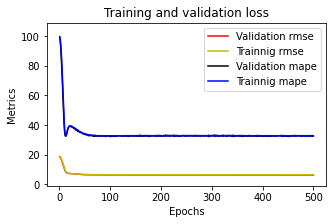

In [215]:
plotme(model7_1_3)

In [216]:
# inputs: distance + roadtypes distance
model7_1_4 = nnmodel_(10, num_hlayers=1,Epoch=500)
model7_1_4

Epoch 1/500
188/188 [==============================] - 0s 1ms/step - loss: 1270836.0000 - mape: 99.9275 - rmse: 1127.3136 - val_loss: 1265360.5000 - val_mape: 99.7666 - val_rmse: 1124.8824
Epoch 2/500
188/188 [==============================] - 0s 869us/step - loss: 1263261.0000 - mape: 99.5047 - rmse: 1123.9489 - val_loss: 1255036.3750 - val_mape: 99.1881 - val_rmse: 1120.2841
Epoch 3/500
188/188 [==============================] - 0s 809us/step - loss: 1250121.6250 - mape: 98.7701 - rmse: 1118.0884 - val_loss: 1239259.5000 - val_mape: 98.2995 - val_rmse: 1113.2203
Epoch 4/500
188/188 [==============================] - 0s 764us/step - loss: 1231650.2500 - mape: 97.7362 - rmse: 1109.7974 - val_loss: 1218410.8750 - val_mape: 97.1148 - val_rmse: 1103.8165
Epoch 5/500
188/188 [==============================] - 0s 868us/step - loss: 1208303.7500 - mape: 96.3937 - rmse: 1099.2288 - val_loss: 1192915.3750 - val_mape: 95.6495 - val_rmse: 1092.2067
Epoch 6/500
188/188 [==========================

Epoch 88/500
188/188 [==============================] - 0s 760us/step - loss: 163583.4688 - mape: 35.8441 - rmse: 404.4545 - val_loss: 160632.1875 - val_mape: 35.3441 - val_rmse: 400.7895
Epoch 89/500
188/188 [==============================] - 0s 765us/step - loss: 163203.8281 - mape: 35.6792 - rmse: 403.9849 - val_loss: 160179.5469 - val_mape: 35.1905 - val_rmse: 400.2244
Epoch 90/500
188/188 [==============================] - 0s 800us/step - loss: 162844.9375 - mape: 35.6396 - rmse: 403.5405 - val_loss: 159748.0781 - val_mape: 35.1581 - val_rmse: 399.6850
Epoch 91/500
188/188 [==============================] - 0s 755us/step - loss: 162485.6562 - mape: 35.4115 - rmse: 403.0951 - val_loss: 159322.6094 - val_mape: 35.1411 - val_rmse: 399.1524
Epoch 92/500
188/188 [==============================] - 0s 806us/step - loss: 162147.8125 - mape: 35.4774 - rmse: 402.6758 - val_loss: 158909.4844 - val_mape: 35.0565 - val_rmse: 398.6345
Epoch 93/500
188/188 [==============================] - 0s 7

188/188 [==============================] - 0s 781us/step - loss: 152460.3906 - mape: 32.8678 - rmse: 390.4618 - val_loss: 147251.7812 - val_mape: 32.6850 - val_rmse: 383.7340
Epoch 175/500
188/188 [==============================] - 0s 797us/step - loss: 152434.3125 - mape: 32.8289 - rmse: 390.4284 - val_loss: 147201.9219 - val_mape: 32.5255 - val_rmse: 383.6690
Epoch 176/500
188/188 [==============================] - 0s 812us/step - loss: 152399.7812 - mape: 32.7755 - rmse: 390.3842 - val_loss: 147174.8281 - val_mape: 32.6105 - val_rmse: 383.6337
Epoch 177/500
188/188 [==============================] - 0s 762us/step - loss: 152375.1719 - mape: 32.8580 - rmse: 390.3526 - val_loss: 147134.7344 - val_mape: 32.5629 - val_rmse: 383.5815
Epoch 178/500
188/188 [==============================] - 0s 824us/step - loss: 152334.0469 - mape: 32.7622 - rmse: 390.3000 - val_loss: 147102.7656 - val_mape: 32.5709 - val_rmse: 383.5398
Epoch 179/500
188/188 [==============================] - 0s 769us/ste

188/188 [==============================] - 0s 739us/step - loss: 150899.9531 - mape: 32.5369 - rmse: 388.4584 - val_loss: 145392.8594 - val_mape: 32.6147 - val_rmse: 381.3042
Epoch 261/500
188/188 [==============================] - 0s 728us/step - loss: 150877.9375 - mape: 32.8059 - rmse: 388.4301 - val_loss: 145386.2188 - val_mape: 32.6308 - val_rmse: 381.2954
Epoch 262/500
188/188 [==============================] - 0s 795us/step - loss: 150874.6719 - mape: 32.6174 - rmse: 388.4259 - val_loss: 145378.5781 - val_mape: 32.6751 - val_rmse: 381.2854
Epoch 263/500
188/188 [==============================] - 0s 796us/step - loss: 150864.6250 - mape: 32.7959 - rmse: 388.4130 - val_loss: 145357.0781 - val_mape: 32.6423 - val_rmse: 381.2572
Epoch 264/500
188/188 [==============================] - 0s 761us/step - loss: 150856.8594 - mape: 32.8692 - rmse: 388.4030 - val_loss: 145328.9219 - val_mape: 32.5322 - val_rmse: 381.2203
Epoch 265/500
188/188 [==============================] - 0s 816us/ste

188/188 [==============================] - 0s 768us/step - loss: 150220.2812 - mape: 32.8562 - rmse: 387.5826 - val_loss: 144427.9375 - val_mape: 32.5804 - val_rmse: 380.0367
Epoch 347/500
188/188 [==============================] - 0s 842us/step - loss: 150219.7500 - mape: 32.7133 - rmse: 387.5819 - val_loss: 144428.6094 - val_mape: 32.6743 - val_rmse: 380.0376
Epoch 348/500
188/188 [==============================] - 0s 822us/step - loss: 150234.6719 - mape: 32.8498 - rmse: 387.6012 - val_loss: 144419.5938 - val_mape: 32.6791 - val_rmse: 380.0258
Epoch 349/500
188/188 [==============================] - 0s 784us/step - loss: 150206.1250 - mape: 32.8190 - rmse: 387.5644 - val_loss: 144412.7969 - val_mape: 32.6494 - val_rmse: 380.0168
Epoch 350/500
188/188 [==============================] - 0s 803us/step - loss: 150215.6719 - mape: 32.7743 - rmse: 387.5767 - val_loss: 144397.3906 - val_mape: 32.6588 - val_rmse: 379.9966
Epoch 351/500
188/188 [==============================] - 0s 753us/ste

188/188 [==============================] - 0s 777us/step - loss: 149848.1094 - mape: 32.7009 - rmse: 387.1022 - val_loss: 143857.1875 - val_mape: 32.7168 - val_rmse: 379.2851
Epoch 433/500
188/188 [==============================] - 0s 820us/step - loss: 149840.8281 - mape: 32.8194 - rmse: 387.0928 - val_loss: 143855.3438 - val_mape: 32.7457 - val_rmse: 379.2827
Epoch 434/500
188/188 [==============================] - 0s 778us/step - loss: 149839.1719 - mape: 32.8900 - rmse: 387.0906 - val_loss: 143839.1250 - val_mape: 32.6646 - val_rmse: 379.2613
Epoch 435/500
188/188 [==============================] - 0s 818us/step - loss: 149839.3125 - mape: 32.7425 - rmse: 387.0908 - val_loss: 143844.8750 - val_mape: 32.7344 - val_rmse: 379.2689
Epoch 436/500
188/188 [==============================] - 0s 762us/step - loss: 149837.9531 - mape: 32.8863 - rmse: 387.0891 - val_loss: 143830.0156 - val_mape: 32.6641 - val_rmse: 379.2493
Epoch 437/500
188/188 [==============================] - 0s 801us/ste

In [217]:
# inputs: distance + roadtypes distance
model7_1_5 = nnmodel_(100, num_hlayers=1,Epoch=500)
model7_1_5

Epoch 1/500
188/188 [==============================] - 0s 1ms/step - loss: 1259348.8750 - mape: 99.2928 - rmse: 1122.2072 - val_loss: 1232772.3750 - val_mape: 97.9246 - val_rmse: 1110.3029
Epoch 2/500
188/188 [==============================] - 0s 859us/step - loss: 1186587.5000 - mape: 95.1088 - rmse: 1089.3060 - val_loss: 1123312.7500 - val_mape: 91.5330 - val_rmse: 1059.8645
Epoch 3/500
188/188 [==============================] - 0s 810us/step - loss: 1046610.8125 - mape: 86.6525 - rmse: 1023.0400 - val_loss: 959566.5000 - val_mape: 81.2617 - val_rmse: 979.5746
Epoch 4/500
188/188 [==============================] - 0s 785us/step - loss: 866408.3125 - mape: 74.8009 - rmse: 930.8105 - val_loss: 770478.3750 - val_mape: 68.2570 - val_rmse: 877.7690
Epoch 5/500
188/188 [==============================] - 0s 871us/step - loss: 675965.9375 - mape: 60.7698 - rmse: 822.1714 - val_loss: 586144.1250 - val_mape: 53.7164 - val_rmse: 765.6005
Epoch 6/500
188/188 [==============================] - 0s

Epoch 88/500
188/188 [==============================] - 0s 812us/step - loss: 150714.7500 - mape: 32.7165 - rmse: 388.2200 - val_loss: 144999.5000 - val_mape: 32.5803 - val_rmse: 380.7880
Epoch 89/500
188/188 [==============================] - 0s 855us/step - loss: 150677.8438 - mape: 32.8514 - rmse: 388.1725 - val_loss: 144951.5312 - val_mape: 32.4420 - val_rmse: 380.7250
Epoch 90/500
188/188 [==============================] - 0s 758us/step - loss: 150664.3125 - mape: 32.6567 - rmse: 388.1550 - val_loss: 144963.1875 - val_mape: 32.7059 - val_rmse: 380.7403
Epoch 91/500
188/188 [==============================] - 0s 804us/step - loss: 150620.9375 - mape: 32.7483 - rmse: 388.0991 - val_loss: 144914.6719 - val_mape: 32.6844 - val_rmse: 380.6766
Epoch 92/500
188/188 [==============================] - 0s 835us/step - loss: 150572.7812 - mape: 32.7282 - rmse: 388.0371 - val_loss: 144855.0469 - val_mape: 32.5933 - val_rmse: 380.5983
Epoch 93/500
188/188 [==============================] - 0s 7

188/188 [==============================] - 0s 824us/step - loss: 149492.6094 - mape: 32.9221 - rmse: 386.6427 - val_loss: 143196.2969 - val_mape: 32.3122 - val_rmse: 378.4129
Epoch 175/500
188/188 [==============================] - 0s 778us/step - loss: 149531.3281 - mape: 32.7054 - rmse: 386.6928 - val_loss: 143200.7188 - val_mape: 32.5695 - val_rmse: 378.4187
Epoch 176/500
188/188 [==============================] - 0s 852us/step - loss: 149505.4219 - mape: 32.6718 - rmse: 386.6593 - val_loss: 143217.3594 - val_mape: 32.7448 - val_rmse: 378.4407
Epoch 177/500
188/188 [==============================] - 0s 827us/step - loss: 149479.6562 - mape: 32.7280 - rmse: 386.6260 - val_loss: 143243.8125 - val_mape: 32.9496 - val_rmse: 378.4756
Epoch 178/500
188/188 [==============================] - 0s 825us/step - loss: 149452.5625 - mape: 33.0501 - rmse: 386.5909 - val_loss: 143159.7656 - val_mape: 32.2987 - val_rmse: 378.3646
Epoch 179/500
188/188 [==============================] - 0s 821us/ste

188/188 [==============================] - 0s 775us/step - loss: 149111.8125 - mape: 32.9224 - rmse: 386.1500 - val_loss: 142605.0938 - val_mape: 32.5202 - val_rmse: 377.6309
Epoch 261/500
188/188 [==============================] - 0s 761us/step - loss: 149091.9062 - mape: 32.7904 - rmse: 386.1242 - val_loss: 142610.5625 - val_mape: 32.6431 - val_rmse: 377.6381
Epoch 262/500
188/188 [==============================] - 0s 782us/step - loss: 149075.2969 - mape: 32.6299 - rmse: 386.1027 - val_loss: 142646.2344 - val_mape: 32.8680 - val_rmse: 377.6854
Epoch 263/500
188/188 [==============================] - 0s 722us/step - loss: 149070.3906 - mape: 33.0027 - rmse: 386.0963 - val_loss: 142572.2500 - val_mape: 32.3710 - val_rmse: 377.5874
Epoch 264/500
188/188 [==============================] - 0s 751us/step - loss: 149072.0625 - mape: 32.6438 - rmse: 386.0985 - val_loss: 142585.7812 - val_mape: 32.6137 - val_rmse: 377.6053
Epoch 265/500
188/188 [==============================] - 0s 785us/ste

188/188 [==============================] - 0s 795us/step - loss: 148909.9375 - mape: 32.9088 - rmse: 385.8885 - val_loss: 142280.5625 - val_mape: 32.3147 - val_rmse: 377.2010
Epoch 347/500
188/188 [==============================] - 0s 842us/step - loss: 148910.5156 - mape: 32.8558 - rmse: 385.8893 - val_loss: 142273.0938 - val_mape: 32.2089 - val_rmse: 377.1911
Epoch 348/500
188/188 [==============================] - 0s 737us/step - loss: 148920.0625 - mape: 32.5121 - rmse: 385.9016 - val_loss: 142285.6562 - val_mape: 32.5660 - val_rmse: 377.2077
Epoch 349/500
188/188 [==============================] - 0s 792us/step - loss: 148875.3281 - mape: 32.7579 - rmse: 385.8437 - val_loss: 142321.6875 - val_mape: 32.7136 - val_rmse: 377.2555
Epoch 350/500
188/188 [==============================] - 0s 801us/step - loss: 148888.2812 - mape: 32.8149 - rmse: 385.8604 - val_loss: 142269.2812 - val_mape: 32.3297 - val_rmse: 377.1860
Epoch 351/500
188/188 [==============================] - 0s 788us/ste

188/188 [==============================] - 0s 861us/step - loss: 148781.3594 - mape: 32.6287 - rmse: 385.7219 - val_loss: 142149.2500 - val_mape: 32.6696 - val_rmse: 377.0269
Epoch 433/500
188/188 [==============================] - 0s 805us/step - loss: 148814.6562 - mape: 32.7350 - rmse: 385.7650 - val_loss: 142140.9688 - val_mape: 32.6270 - val_rmse: 377.0159
Epoch 434/500
188/188 [==============================] - 0s 847us/step - loss: 148792.0000 - mape: 32.8919 - rmse: 385.7357 - val_loss: 142095.7812 - val_mape: 32.3733 - val_rmse: 376.9559
Epoch 435/500
188/188 [==============================] - 0s 820us/step - loss: 148783.1094 - mape: 32.6438 - rmse: 385.7242 - val_loss: 142100.1250 - val_mape: 32.4268 - val_rmse: 376.9617
Epoch 436/500
188/188 [==============================] - 0s 728us/step - loss: 148734.7656 - mape: 33.0773 - rmse: 385.6615 - val_loss: 142139.3281 - val_mape: 31.8411 - val_rmse: 377.0137
Epoch 437/500
188/188 [==============================] - 0s 734us/ste

## model 8: take the most powerful regressors: distance, 1st dominated hot-encoded, primary road full distance

In [273]:
df_ = pd.concat([df1, df2], axis=1)
df_ = df_[['travel time','distance','1st ranked','primary','secondary']]
# df_ = df_[['travel time','distance','1st ranked','2nd ranked','3rd ranked','primary','secondary']]
df_ = df_.T.drop_duplicates().T
df_

travel time  distance 1st ranked  primary secondary
0            823  0.358222    primary  9565.88         0
1           1066  0.453845    primary  10057.8         0
2            665  0.312429    primary  8304.14         0
3           1053  0.428195    primary  10417.7         0
5           1441  0.365045    primary  8304.14         0
...          ...       ...        ...      ...       ...
7487         945  0.471185    primary  8979.96         0
7488         935  0.418747    primary  11132.5         0
7489        1122   0.41556    primary  9557.67         0
7490        1285  0.720478    primary  18316.8    759.01
7491         499  0.200723   tertiary  2166.26         0

[7406 rows x 5 columns]

In [274]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7406 entries, 0 to 7491
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   travel time  7406 non-null   object
 1   distance     7406 non-null   object
 2   1st ranked   7406 non-null   object
 3   primary      7406 non-null   object
 4   secondary    7406 non-null   object
dtypes: object(5)
memory usage: 667.2+ KB


In [275]:
df_['travel time'] = df_['travel time'].astype(float)
df_['primary'] = df_['primary'].astype(float)
df_['secondary'] = df_['secondary'].astype(float)
df_['distance'] = df_['distance'].astype(float)
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7406 entries, 0 to 7491
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   travel time  7406 non-null   float64
 1   distance     7406 non-null   float64
 2   1st ranked   7406 non-null   object 
 3   primary      7406 non-null   float64
 4   secondary    7406 non-null   float64
dtypes: float64(4), object(1)
memory usage: 667.2+ KB


In [276]:
summar1 = df_.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
motorway          89.0
primary         3047.0
residential     1117.0
secondary       1967.0
service            5.0
tertiary        1024.0
track              7.0
unclassified     150.0
Name: travel time, dtype: float64

In [277]:
option = ['residential','tertiary','primary','secondary']
df_.loc[~df_['1st ranked'].isin(option),'1st ranked'] = 'others1'
summar1 = df_.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
others1         251.0
primary        3047.0
residential    1117.0
secondary      1967.0
tertiary       1024.0
Name: travel time, dtype: float64

In [278]:
# summar1 = df_.groupby('2nd ranked').agg(np.size)
# summar1['travel time']

In [279]:
# option = ['residential','tertiary','primary',None]
# df_.loc[~df_['2nd ranked'].isin(option),'2nd ranked'] = 'others2'
# summar1 = df_.groupby('2nd ranked').agg(np.size)
# summar1['travel time']

In [280]:
# summar1 = df_.groupby('3rd ranked').agg(np.size)
# summar1['travel time']

In [281]:
# option = ['residential','tertiary','primary','primary_link','service',None]
# df_.loc[~df_['3rd ranked'].isin(option),'3rd ranked'] = 'others3'
# summar1 = df_.groupby('3rd ranked').agg(np.size)
# summar1['travel time']

## Encoding features

#### 1. Target (mean) encoding of dominated roadtype

In [282]:
te = TargetEncoder()
df_['1st ranked'] = te.fit_transform(df_['1st ranked'],df_['travel time'])
# df_['2nd ranked'] = te.fit_transform(df_['2nd ranked'],df_['travel time'])
# df_['3rd ranked'] = te.fit_transform(df_['3rd ranked'],df_['travel time'])

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [283]:
normalized_distance2=(df_['1st ranked']-df_['1st ranked'].min())/(df_['1st ranked'].max()-df_['1st ranked'].min())
df_['1st ranked'] = normalized_distance2
# normalize=(df_['2nd ranked']-df_['2nd ranked'].min())/(df_['2nd ranked'].max()-df_['2nd ranked'].min())
# df_['2nd ranked'] = normalize

# normalize=(df_['3rd ranked']-df_['3rd ranked'].min())/(df_['3rd ranked'].max()-df_['3rd ranked'].min())
# df_['3rd ranked'] = normalize

normalize=(df_['primary']-df_['primary'].min())/(df_['primary'].max()-df_['primary'].min())
df_['primary'] = normalize

normalize=(df_['secondary']-df_['secondary'].min())/(df_['secondary'].max()-df_['secondary'].min())
df_['secondary'] = normalize

df_
df_.head()

travel time  distance  1st ranked   primary  secondary
0        823.0  0.358222    0.635122  0.335569        0.0
1       1066.0  0.453845    0.635122  0.352825        0.0
2        665.0  0.312429    0.635122  0.291308        0.0
3       1053.0  0.428195    0.635122  0.365449        0.0
5       1441.0  0.365045    0.635122  0.291308        0.0

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

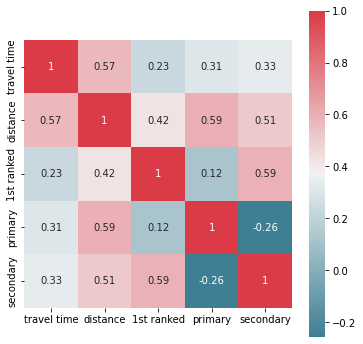

In [284]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(6,6))
corr = df_.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [285]:
x = np.array(df_.iloc[:,1:])
y = np.array(df_['travel time'])
x

array([[0.35822197, 0.63512192, 0.33556925, 0.        ],
       [0.45384484, 0.63512192, 0.35282539, 0.        ],
       [0.31242852, 0.63512192, 0.2913077 , 0.        ],
       ...,
       [0.41555971, 0.63512192, 0.33528135, 0.        ],
       [0.72047801, 0.63512192, 0.64254864, 0.02868874],
       [0.20072349, 0.19621302, 0.0759918 , 0.        ]])

In [286]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [287]:
print(X_train.shape)
print(X_test.shape)
# X_train

(5924, 4)
(1482, 4)


In [288]:
# inputs: distance + roadtypes distance
model8_1_3 = nnmodel_(50, num_hlayers=1,Epoch=500)
model8_1_3

Epoch 1/500
186/186 [==============================] - 0s 1ms/step - loss: 1231724.8750 - mape: 99.7166 - rmse: 1109.8311 - val_loss: 1219070.6250 - val_mape: 99.2631 - val_rmse: 1104.1154
Epoch 2/500
186/186 [==============================] - 0s 782us/step - loss: 1208502.0000 - mape: 98.4644 - rmse: 1099.3188 - val_loss: 1185007.3750 - val_mape: 97.4031 - val_rmse: 1088.5804
Epoch 3/500
186/186 [==============================] - 0s 731us/step - loss: 1163855.1250 - mape: 95.9764 - rmse: 1078.8212 - val_loss: 1129217.5000 - val_mape: 94.2856 - val_rmse: 1062.6465
Epoch 4/500
186/186 [==============================] - 0s 757us/step - loss: 1099802.0000 - mape: 92.3267 - rmse: 1048.7145 - val_loss: 1056715.8750 - val_mape: 90.0910 - val_rmse: 1027.9669
Epoch 5/500
186/186 [==============================] - 0s 757us/step - loss: 1021321.7500 - mape: 87.6777 - rmse: 1010.6047 - val_loss: 971955.1250 - val_mape: 84.9592 - val_rmse: 985.8779
Epoch 6/500
186/186 [============================

Epoch 88/500
186/186 [==============================] - 0s 714us/step - loss: 153625.8750 - mape: 33.8771 - rmse: 391.9514 - val_loss: 159631.6406 - val_mape: 34.2214 - val_rmse: 399.5393
Epoch 89/500
186/186 [==============================] - 0s 798us/step - loss: 153538.5625 - mape: 33.7760 - rmse: 391.8400 - val_loss: 159631.8281 - val_mape: 34.3118 - val_rmse: 399.5395
Epoch 90/500
186/186 [==============================] - 0s 817us/step - loss: 153487.9688 - mape: 33.8340 - rmse: 391.7754 - val_loss: 159630.9688 - val_mape: 34.2879 - val_rmse: 399.5385
Epoch 91/500
186/186 [==============================] - 0s 802us/step - loss: 153451.8906 - mape: 33.8526 - rmse: 391.7294 - val_loss: 159627.9219 - val_mape: 34.2697 - val_rmse: 399.5346
Epoch 92/500
186/186 [==============================] - 0s 709us/step - loss: 153384.3125 - mape: 33.8381 - rmse: 391.6431 - val_loss: 159637.6562 - val_mape: 34.1159 - val_rmse: 399.5468
Epoch 93/500
186/186 [==============================] - 0s 7

186/186 [==============================] - 0s 785us/step - loss: 152554.2188 - mape: 33.4452 - rmse: 390.5819 - val_loss: 160076.1562 - val_mape: 34.1488 - val_rmse: 400.0952
Epoch 175/500
186/186 [==============================] - 0s 803us/step - loss: 152542.7188 - mape: 33.6193 - rmse: 390.5672 - val_loss: 160075.6562 - val_mape: 34.1464 - val_rmse: 400.0946
Epoch 176/500
186/186 [==============================] - 0s 713us/step - loss: 152526.4844 - mape: 33.4291 - rmse: 390.5464 - val_loss: 160079.8125 - val_mape: 34.1906 - val_rmse: 400.0998
Epoch 177/500
186/186 [==============================] - 0s 704us/step - loss: 152547.3438 - mape: 33.6795 - rmse: 390.5731 - val_loss: 160080.8750 - val_mape: 34.0840 - val_rmse: 400.1011
Epoch 178/500
186/186 [==============================] - 0s 752us/step - loss: 152532.5625 - mape: 33.4997 - rmse: 390.5542 - val_loss: 160077.4688 - val_mape: 34.1155 - val_rmse: 400.0968
Epoch 179/500
186/186 [==============================] - 0s 793us/ste

186/186 [==============================] - 0s 757us/step - loss: 152392.9062 - mape: 33.4068 - rmse: 390.3753 - val_loss: 160053.0312 - val_mape: 34.0058 - val_rmse: 400.0663
Epoch 261/500
186/186 [==============================] - 0s 787us/step - loss: 152381.9375 - mape: 33.4254 - rmse: 390.3613 - val_loss: 160052.6562 - val_mape: 33.9497 - val_rmse: 400.0658
Epoch 262/500
186/186 [==============================] - 0s 796us/step - loss: 152379.9219 - mape: 33.5524 - rmse: 390.3587 - val_loss: 160064.9688 - val_mape: 34.0049 - val_rmse: 400.0812
Epoch 263/500
186/186 [==============================] - 0s 785us/step - loss: 152376.8125 - mape: 33.5425 - rmse: 390.3547 - val_loss: 160059.5625 - val_mape: 33.9725 - val_rmse: 400.0744
Epoch 264/500
186/186 [==============================] - 0s 767us/step - loss: 152405.6719 - mape: 33.5320 - rmse: 390.3917 - val_loss: 160056.4375 - val_mape: 33.9846 - val_rmse: 400.0705
Epoch 265/500
186/186 [==============================] - 0s 725us/ste

186/186 [==============================] - 0s 827us/step - loss: 152339.4844 - mape: 33.4909 - rmse: 390.3069 - val_loss: 160034.6406 - val_mape: 34.1922 - val_rmse: 400.0433
Epoch 347/500
186/186 [==============================] - 0s 727us/step - loss: 152320.7969 - mape: 33.3844 - rmse: 390.2830 - val_loss: 160039.0469 - val_mape: 34.1042 - val_rmse: 400.0488
Epoch 348/500
186/186 [==============================] - 0s 804us/step - loss: 152313.4219 - mape: 33.6022 - rmse: 390.2735 - val_loss: 160035.7500 - val_mape: 34.0128 - val_rmse: 400.0447
Epoch 349/500
186/186 [==============================] - 0s 768us/step - loss: 152308.6406 - mape: 33.4205 - rmse: 390.2674 - val_loss: 160035.3438 - val_mape: 34.0917 - val_rmse: 400.0442
Epoch 350/500
186/186 [==============================] - 0s 762us/step - loss: 152327.2969 - mape: 33.4893 - rmse: 390.2913 - val_loss: 160038.1875 - val_mape: 34.0810 - val_rmse: 400.0477
Epoch 351/500
186/186 [==============================] - 0s 794us/ste

186/186 [==============================] - 0s 775us/step - loss: 152289.1406 - mape: 33.3744 - rmse: 390.2424 - val_loss: 160045.1562 - val_mape: 34.0407 - val_rmse: 400.0564
Epoch 433/500
186/186 [==============================] - 0s 778us/step - loss: 152288.9375 - mape: 33.5472 - rmse: 390.2422 - val_loss: 160031.4844 - val_mape: 33.9965 - val_rmse: 400.0394
Epoch 434/500
186/186 [==============================] - 0s 729us/step - loss: 152275.0000 - mape: 33.5262 - rmse: 390.2243 - val_loss: 160025.5469 - val_mape: 33.9550 - val_rmse: 400.0319
Epoch 435/500
186/186 [==============================] - 0s 757us/step - loss: 152281.1250 - mape: 33.3625 - rmse: 390.2321 - val_loss: 160025.4219 - val_mape: 33.9765 - val_rmse: 400.0318
Epoch 436/500
186/186 [==============================] - 0s 728us/step - loss: 152286.8281 - mape: 33.3825 - rmse: 390.2394 - val_loss: 160028.8281 - val_mape: 34.0203 - val_rmse: 400.0360
Epoch 437/500
186/186 [==============================] - 0s 820us/ste

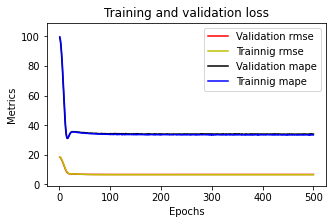

In [289]:
plotme(model8_1_3)

In [290]:
# inputs: distance + roadtypes distance
model8_1_5 = nnmodel_(100, num_hlayers=1,Epoch=500)
model8_1_5

Epoch 1/500
186/186 [==============================] - 1s 2ms/step - loss: 1230317.0000 - mape: 99.6347 - rmse: 1109.1965 - val_loss: 1213746.3750 - val_mape: 98.9681 - val_rmse: 1101.7015
Epoch 2/500
186/186 [==============================] - 0s 771us/step - loss: 1194347.3750 - mape: 97.6817 - rmse: 1092.8621 - val_loss: 1159323.2500 - val_mape: 95.9702 - val_rmse: 1076.7188
Epoch 3/500
186/186 [==============================] - 0s 754us/step - loss: 1124149.1250 - mape: 93.7106 - rmse: 1060.2590 - val_loss: 1073662.5000 - val_mape: 91.0720 - val_rmse: 1036.1769
Epoch 4/500
186/186 [==============================] - 0s 852us/step - loss: 1027485.6250 - mape: 88.0400 - rmse: 1013.6497 - val_loss: 966185.0000 - val_mape: 84.5794 - val_rmse: 982.9471
Epoch 5/500
186/186 [==============================] - 0s 724us/step - loss: 913139.0625 - mape: 80.9917 - rmse: 955.5831 - val_loss: 845396.5625 - val_mape: 76.7422 - val_rmse: 919.4545
Epoch 6/500
186/186 [==============================] 

Epoch 88/500
186/186 [==============================] - 0s 856us/step - loss: 152920.5938 - mape: 33.8378 - rmse: 391.0506 - val_loss: 159789.1719 - val_mape: 34.0389 - val_rmse: 399.7364
Epoch 89/500
186/186 [==============================] - 0s 788us/step - loss: 152898.0156 - mape: 33.6716 - rmse: 391.0218 - val_loss: 159790.5156 - val_mape: 34.2090 - val_rmse: 399.7381
Epoch 90/500
186/186 [==============================] - 0s 803us/step - loss: 152891.5469 - mape: 33.6896 - rmse: 391.0135 - val_loss: 159804.2031 - val_mape: 34.1378 - val_rmse: 399.7552
Epoch 91/500
186/186 [==============================] - 0s 773us/step - loss: 152859.8281 - mape: 33.8027 - rmse: 390.9729 - val_loss: 159820.1406 - val_mape: 34.1096 - val_rmse: 399.7751
Epoch 92/500
186/186 [==============================] - 0s 826us/step - loss: 152869.4219 - mape: 33.5019 - rmse: 390.9852 - val_loss: 159833.9062 - val_mape: 34.0930 - val_rmse: 399.7923
Epoch 93/500
186/186 [==============================] - 0s 7

186/186 [==============================] - 0s 778us/step - loss: 152454.1250 - mape: 33.6890 - rmse: 390.4537 - val_loss: 160062.4062 - val_mape: 34.0317 - val_rmse: 400.0780
Epoch 175/500
186/186 [==============================] - 0s 861us/step - loss: 152449.0781 - mape: 33.4762 - rmse: 390.4473 - val_loss: 160065.5156 - val_mape: 33.8782 - val_rmse: 400.0819
Epoch 176/500
186/186 [==============================] - 0s 715us/step - loss: 152459.2969 - mape: 33.4958 - rmse: 390.4604 - val_loss: 160067.5469 - val_mape: 33.8860 - val_rmse: 400.0844
Epoch 177/500
186/186 [==============================] - 0s 799us/step - loss: 152457.0312 - mape: 33.5047 - rmse: 390.4575 - val_loss: 160053.5938 - val_mape: 33.9853 - val_rmse: 400.0670
Epoch 178/500
186/186 [==============================] - 0s 738us/step - loss: 152443.8906 - mape: 33.4592 - rmse: 390.4406 - val_loss: 160056.9062 - val_mape: 33.9925 - val_rmse: 400.0711
Epoch 179/500
186/186 [==============================] - 0s 738us/ste

186/186 [==============================] - 0s 798us/step - loss: 152332.7656 - mape: 33.5062 - rmse: 390.2983 - val_loss: 160015.4844 - val_mape: 34.0347 - val_rmse: 400.0193
Epoch 261/500
186/186 [==============================] - 0s 780us/step - loss: 152329.0156 - mape: 33.7180 - rmse: 390.2935 - val_loss: 160013.3906 - val_mape: 33.9354 - val_rmse: 400.0167
Epoch 262/500
186/186 [==============================] - 0s 699us/step - loss: 152330.3750 - mape: 33.4735 - rmse: 390.2952 - val_loss: 160017.4219 - val_mape: 34.0458 - val_rmse: 400.0218
Epoch 263/500
186/186 [==============================] - 0s 867us/step - loss: 152334.1094 - mape: 33.5071 - rmse: 390.3000 - val_loss: 160019.5938 - val_mape: 34.0048 - val_rmse: 400.0245
Epoch 264/500
186/186 [==============================] - 0s 788us/step - loss: 152345.2500 - mape: 33.4050 - rmse: 390.3143 - val_loss: 160026.9844 - val_mape: 34.0496 - val_rmse: 400.0337
Epoch 265/500
186/186 [==============================] - 0s 798us/ste

186/186 [==============================] - 0s 806us/step - loss: 152286.3438 - mape: 33.2717 - rmse: 390.2388 - val_loss: 160017.9844 - val_mape: 34.1115 - val_rmse: 400.0225
Epoch 347/500
186/186 [==============================] - 0s 817us/step - loss: 152294.2812 - mape: 33.4759 - rmse: 390.2490 - val_loss: 160016.4062 - val_mape: 34.1031 - val_rmse: 400.0205
Epoch 348/500
186/186 [==============================] - 0s 784us/step - loss: 152286.2969 - mape: 33.4740 - rmse: 390.2388 - val_loss: 160031.1094 - val_mape: 33.8695 - val_rmse: 400.0389
Epoch 349/500
186/186 [==============================] - 0s 804us/step - loss: 152296.9844 - mape: 33.2801 - rmse: 390.2525 - val_loss: 160018.1875 - val_mape: 34.0729 - val_rmse: 400.0227
Epoch 350/500
186/186 [==============================] - 0s 803us/step - loss: 152281.4844 - mape: 33.2159 - rmse: 390.2326 - val_loss: 160020.2188 - val_mape: 34.0990 - val_rmse: 400.0253
Epoch 351/500
186/186 [==============================] - 0s 797us/ste

186/186 [==============================] - 0s 800us/step - loss: 152267.5625 - mape: 33.3602 - rmse: 390.2148 - val_loss: 160025.9688 - val_mape: 34.0572 - val_rmse: 400.0325
Epoch 433/500
186/186 [==============================] - 0s 726us/step - loss: 152266.4062 - mape: 33.4006 - rmse: 390.2133 - val_loss: 160025.0625 - val_mape: 33.9835 - val_rmse: 400.0313
Epoch 434/500
186/186 [==============================] - 0s 811us/step - loss: 152250.7969 - mape: 33.2350 - rmse: 390.1933 - val_loss: 160031.2500 - val_mape: 34.2197 - val_rmse: 400.0391
Epoch 435/500
186/186 [==============================] - 0s 718us/step - loss: 152284.2500 - mape: 33.6313 - rmse: 390.2361 - val_loss: 160021.8906 - val_mape: 33.9495 - val_rmse: 400.0274
Epoch 436/500
186/186 [==============================] - 0s 807us/step - loss: 152264.1719 - mape: 33.5934 - rmse: 390.2104 - val_loss: 160033.2344 - val_mape: 33.8633 - val_rmse: 400.0415
Epoch 437/500
186/186 [==============================] - 0s 778us/ste

In [291]:
# inputs: distance + roadtypes distance
model8_1_1 = nnmodel_(100,50, num_hlayers=2,Epoch=500)
model8_1_1

Epoch 1/500
186/186 [==============================] - 0s 1ms/step - loss: 1178546.0000 - mape: 96.7609 - rmse: 1085.6086 - val_loss: 992661.3125 - val_mape: 86.2246 - val_rmse: 996.3239
Epoch 2/500
186/186 [==============================] - 0s 906us/step - loss: 574238.6250 - mape: 55.2926 - rmse: 757.7853 - val_loss: 224763.9844 - val_mape: 31.0774 - val_rmse: 474.0928
Epoch 3/500
186/186 [==============================] - 0s 782us/step - loss: 190551.5312 - mape: 34.1831 - rmse: 436.5221 - val_loss: 178395.8125 - val_mape: 35.7582 - val_rmse: 422.3693
Epoch 4/500
186/186 [==============================] - 0s 844us/step - loss: 179571.8281 - mape: 35.7125 - rmse: 423.7592 - val_loss: 174736.2812 - val_mape: 35.5998 - val_rmse: 418.0147
Epoch 5/500
186/186 [==============================] - 0s 879us/step - loss: 175066.7969 - mape: 35.3661 - rmse: 418.4099 - val_loss: 171605.5000 - val_mape: 35.3555 - val_rmse: 414.2529
Epoch 6/500
186/186 [==============================] - 0s 857us/s

Epoch 45/500
186/186 [==============================] - 0s 808us/step - loss: 152462.8594 - mape: 33.5450 - rmse: 390.4649 - val_loss: 160078.9531 - val_mape: 33.7241 - val_rmse: 400.0987
Epoch 46/500
186/186 [==============================] - 0s 798us/step - loss: 152591.9531 - mape: 33.6359 - rmse: 390.6302 - val_loss: 160192.2031 - val_mape: 33.1873 - val_rmse: 400.2402
Epoch 47/500
186/186 [==============================] - 0s 893us/step - loss: 152453.9062 - mape: 33.3224 - rmse: 390.4535 - val_loss: 160105.3594 - val_mape: 33.5388 - val_rmse: 400.1317
Epoch 48/500
186/186 [==============================] - 0s 821us/step - loss: 152462.0781 - mape: 33.3821 - rmse: 390.4639 - val_loss: 160057.9375 - val_mape: 33.9168 - val_rmse: 400.0724
Epoch 49/500
186/186 [==============================] - 0s 806us/step - loss: 152502.0000 - mape: 33.5494 - rmse: 390.5150 - val_loss: 160052.4531 - val_mape: 33.7795 - val_rmse: 400.0656
Epoch 50/500
186/186 [==============================] - 0s 8

186/186 [==============================] - 0s 890us/step - loss: 152385.5938 - mape: 33.5390 - rmse: 390.3660 - val_loss: 160611.8906 - val_mape: 32.5620 - val_rmse: 400.7641
Epoch 132/500
186/186 [==============================] - 0s 776us/step - loss: 152380.2344 - mape: 33.0827 - rmse: 390.3591 - val_loss: 160044.5312 - val_mape: 33.9966 - val_rmse: 400.0557
Epoch 133/500
186/186 [==============================] - 0s 868us/step - loss: 152415.7500 - mape: 33.3890 - rmse: 390.4046 - val_loss: 160057.2812 - val_mape: 33.7526 - val_rmse: 400.0716
Epoch 134/500
186/186 [==============================] - 0s 862us/step - loss: 152402.4062 - mape: 33.2361 - rmse: 390.3875 - val_loss: 160026.9219 - val_mape: 34.1448 - val_rmse: 400.0337
Epoch 135/500
186/186 [==============================] - 0s 862us/step - loss: 152452.1406 - mape: 33.4956 - rmse: 390.4512 - val_loss: 160107.0625 - val_mape: 33.5314 - val_rmse: 400.1338
Epoch 136/500
186/186 [==============================] - 0s 757us/ste

186/186 [==============================] - 0s 832us/step - loss: 152445.8750 - mape: 33.2107 - rmse: 390.4432 - val_loss: 160075.7188 - val_mape: 33.7582 - val_rmse: 400.0946
Epoch 218/500
186/186 [==============================] - 0s 828us/step - loss: 152449.6719 - mape: 33.3981 - rmse: 390.4480 - val_loss: 160056.5781 - val_mape: 33.9023 - val_rmse: 400.0707
Epoch 219/500
186/186 [==============================] - 0s 830us/step - loss: 152416.4688 - mape: 33.3214 - rmse: 390.4055 - val_loss: 160124.5938 - val_mape: 33.5598 - val_rmse: 400.1557
Epoch 220/500
186/186 [==============================] - 0s 840us/step - loss: 152272.0938 - mape: 33.1572 - rmse: 390.2206 - val_loss: 160683.0312 - val_mape: 35.5850 - val_rmse: 400.8529
Epoch 221/500
186/186 [==============================] - 0s 793us/step - loss: 152656.2812 - mape: 33.6210 - rmse: 390.7125 - val_loss: 160056.2812 - val_mape: 34.5654 - val_rmse: 400.0703
Epoch 222/500
186/186 [==============================] - 0s 870us/ste

186/186 [==============================] - 0s 883us/step - loss: 152532.2812 - mape: 33.4246 - rmse: 390.5538 - val_loss: 160144.0938 - val_mape: 34.7060 - val_rmse: 400.1801
Epoch 304/500
186/186 [==============================] - 0s 849us/step - loss: 152444.8281 - mape: 33.3962 - rmse: 390.4418 - val_loss: 160044.0000 - val_mape: 34.1923 - val_rmse: 400.0550
Epoch 305/500
186/186 [==============================] - 0s 850us/step - loss: 152387.0625 - mape: 33.3634 - rmse: 390.3679 - val_loss: 160034.1406 - val_mape: 34.0480 - val_rmse: 400.0427
Epoch 306/500
186/186 [==============================] - 0s 810us/step - loss: 152358.5625 - mape: 33.3329 - rmse: 390.3314 - val_loss: 160029.4062 - val_mape: 33.7748 - val_rmse: 400.0367
Epoch 307/500
186/186 [==============================] - 0s 809us/step - loss: 152347.9844 - mape: 33.2500 - rmse: 390.3178 - val_loss: 160019.5625 - val_mape: 33.9825 - val_rmse: 400.0244
Epoch 308/500
186/186 [==============================] - 0s 834us/ste

186/186 [==============================] - 0s 752us/step - loss: 152521.7031 - mape: 33.2836 - rmse: 390.5403 - val_loss: 160102.7969 - val_mape: 34.4283 - val_rmse: 400.1285
Epoch 390/500
186/186 [==============================] - 0s 852us/step - loss: 152421.3750 - mape: 33.2792 - rmse: 390.4118 - val_loss: 160146.6719 - val_mape: 34.4693 - val_rmse: 400.1833
Epoch 391/500
186/186 [==============================] - 0s 821us/step - loss: 152331.4688 - mape: 33.4582 - rmse: 390.2966 - val_loss: 160319.1562 - val_mape: 33.0151 - val_rmse: 400.3987
Epoch 392/500
186/186 [==============================] - 0s 869us/step - loss: 152451.0312 - mape: 33.2343 - rmse: 390.4498 - val_loss: 160116.1562 - val_mape: 33.4825 - val_rmse: 400.1452
Epoch 393/500
186/186 [==============================] - 0s 827us/step - loss: 152370.2812 - mape: 33.1255 - rmse: 390.3464 - val_loss: 160274.1406 - val_mape: 34.9383 - val_rmse: 400.3425
Epoch 394/500
186/186 [==============================] - 0s 856us/ste

186/186 [==============================] - 0s 810us/step - loss: 152417.3906 - mape: 33.5209 - rmse: 390.4067 - val_loss: 160062.7031 - val_mape: 33.5457 - val_rmse: 400.0784
Epoch 476/500
186/186 [==============================] - 0s 801us/step - loss: 152410.4844 - mape: 33.3363 - rmse: 390.3979 - val_loss: 160069.2031 - val_mape: 33.6092 - val_rmse: 400.0865
Epoch 477/500
186/186 [==============================] - 0s 843us/step - loss: 152557.1406 - mape: 33.4507 - rmse: 390.5856 - val_loss: 160027.9531 - val_mape: 33.9824 - val_rmse: 400.0349
Epoch 478/500
186/186 [==============================] - 0s 835us/step - loss: 152462.8281 - mape: 33.3344 - rmse: 390.4649 - val_loss: 160069.5469 - val_mape: 34.3152 - val_rmse: 400.0869
Epoch 479/500
186/186 [==============================] - 0s 776us/step - loss: 152536.2969 - mape: 33.3624 - rmse: 390.5590 - val_loss: 160044.0000 - val_mape: 33.9840 - val_rmse: 400.0550
Epoch 480/500
186/186 [==============================] - 0s 892us/ste

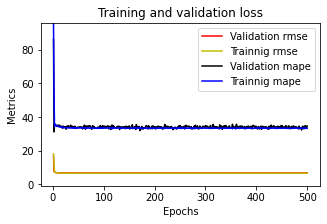

In [292]:
plotme(model8_1_1)

In [293]:
# inputs: distance + hour + roadtypes distance
model8_1_2 = nnmodel_(200,100, num_hlayers=2,Epoch=500)
model8_1_2

Epoch 1/500
186/186 [==============================] - 0s 1ms/step - loss: 1033335.4375 - mape: 87.5717 - rmse: 1016.5311 - val_loss: 491473.2188 - val_mape: 49.4115 - val_rmse: 701.0515
Epoch 2/500
186/186 [==============================] - 0s 1000us/step - loss: 232888.1562 - mape: 35.6480 - rmse: 482.5849 - val_loss: 178338.3906 - val_mape: 35.8459 - val_rmse: 422.3013
Epoch 3/500
186/186 [==============================] - 0s 947us/step - loss: 178071.4531 - mape: 35.5526 - rmse: 421.9851 - val_loss: 172813.9062 - val_mape: 35.9448 - val_rmse: 415.7089
Epoch 4/500
186/186 [==============================] - 0s 999us/step - loss: 171549.3750 - mape: 35.2003 - rmse: 414.1852 - val_loss: 168878.6250 - val_mape: 36.3046 - val_rmse: 410.9485
Epoch 5/500
186/186 [==============================] - 0s 997us/step - loss: 166129.4531 - mape: 34.9352 - rmse: 407.5898 - val_loss: 165327.3750 - val_mape: 35.7309 - val_rmse: 406.6047
Epoch 6/500
186/186 [==============================] - 0s 941us/

Epoch 45/500
186/186 [==============================] - 0s 958us/step - loss: 152447.3281 - mape: 33.5759 - rmse: 390.4450 - val_loss: 159980.2344 - val_mape: 33.5068 - val_rmse: 399.9753
Epoch 46/500
186/186 [==============================] - 0s 879us/step - loss: 152490.3125 - mape: 33.3288 - rmse: 390.5001 - val_loss: 160066.6719 - val_mape: 33.1504 - val_rmse: 400.0833
Epoch 47/500
186/186 [==============================] - 0s 881us/step - loss: 152401.3438 - mape: 33.2643 - rmse: 390.3861 - val_loss: 159930.8438 - val_mape: 34.2725 - val_rmse: 399.9135
Epoch 48/500
186/186 [==============================] - 0s 942us/step - loss: 152366.2188 - mape: 33.2096 - rmse: 390.3412 - val_loss: 159997.0156 - val_mape: 34.4195 - val_rmse: 399.9963
Epoch 49/500
186/186 [==============================] - 0s 951us/step - loss: 152378.2656 - mape: 33.5109 - rmse: 390.3566 - val_loss: 159925.3750 - val_mape: 33.8428 - val_rmse: 399.9067
Epoch 50/500
186/186 [==============================] - 0s 9

186/186 [==============================] - 0s 860us/step - loss: 151887.3750 - mape: 33.1307 - rmse: 389.7273 - val_loss: 159621.1875 - val_mape: 34.1777 - val_rmse: 399.5262
Epoch 132/500
186/186 [==============================] - 0s 950us/step - loss: 151961.2031 - mape: 33.4937 - rmse: 389.8220 - val_loss: 159692.5312 - val_mape: 33.2743 - val_rmse: 399.6155
Epoch 133/500
186/186 [==============================] - 0s 893us/step - loss: 152004.2500 - mape: 33.2235 - rmse: 389.8772 - val_loss: 159498.1875 - val_mape: 33.7865 - val_rmse: 399.3723
Epoch 134/500
186/186 [==============================] - 0s 934us/step - loss: 152157.9219 - mape: 33.3102 - rmse: 390.0742 - val_loss: 159586.2656 - val_mape: 33.6013 - val_rmse: 399.4825
Epoch 135/500
186/186 [==============================] - 0s 869us/step - loss: 152090.9062 - mape: 33.3364 - rmse: 389.9883 - val_loss: 159513.4062 - val_mape: 34.1806 - val_rmse: 399.3913
Epoch 136/500
186/186 [==============================] - 0s 958us/ste

186/186 [==============================] - 0s 872us/step - loss: 151604.6562 - mape: 33.4252 - rmse: 389.3644 - val_loss: 159613.6094 - val_mape: 32.3174 - val_rmse: 399.5167
Epoch 218/500
186/186 [==============================] - 0s 913us/step - loss: 151644.9688 - mape: 33.2666 - rmse: 389.4162 - val_loss: 159135.7344 - val_mape: 33.1178 - val_rmse: 398.9182
Epoch 219/500
186/186 [==============================] - 0s 917us/step - loss: 151685.6875 - mape: 33.1221 - rmse: 389.4685 - val_loss: 159551.5312 - val_mape: 35.5951 - val_rmse: 399.4390
Epoch 220/500
186/186 [==============================] - 0s 930us/step - loss: 151570.6094 - mape: 33.2951 - rmse: 389.3207 - val_loss: 159012.0625 - val_mape: 34.5445 - val_rmse: 398.7632
Epoch 221/500
186/186 [==============================] - 0s 886us/step - loss: 151571.1562 - mape: 33.4591 - rmse: 389.3214 - val_loss: 159701.2969 - val_mape: 32.2874 - val_rmse: 399.6264
Epoch 222/500
186/186 [==============================] - 0s 907us/ste

186/186 [==============================] - 0s 880us/step - loss: 151039.1094 - mape: 33.1221 - rmse: 388.6375 - val_loss: 158883.5781 - val_mape: 35.4528 - val_rmse: 398.6020
Epoch 304/500
186/186 [==============================] - 0s 950us/step - loss: 151027.1875 - mape: 33.3256 - rmse: 388.6222 - val_loss: 158315.7031 - val_mape: 34.0319 - val_rmse: 397.8891
Epoch 305/500
186/186 [==============================] - 0s 855us/step - loss: 151253.4844 - mape: 33.2254 - rmse: 388.9132 - val_loss: 158420.8438 - val_mape: 34.5917 - val_rmse: 398.0211
Epoch 306/500
186/186 [==============================] - 0s 868us/step - loss: 151127.9688 - mape: 33.3233 - rmse: 388.7518 - val_loss: 158624.7812 - val_mape: 35.0535 - val_rmse: 398.2773
Epoch 307/500
186/186 [==============================] - 0s 898us/step - loss: 151315.2500 - mape: 33.6702 - rmse: 388.9926 - val_loss: 158560.2500 - val_mape: 33.3040 - val_rmse: 398.1963
Epoch 308/500
186/186 [==============================] - 0s 948us/ste

186/186 [==============================] - 0s 845us/step - loss: 150853.4219 - mape: 33.2387 - rmse: 388.3985 - val_loss: 157888.8594 - val_mape: 33.6913 - val_rmse: 397.3523
Epoch 390/500
186/186 [==============================] - 0s 817us/step - loss: 150995.5625 - mape: 33.4807 - rmse: 388.5815 - val_loss: 157827.8594 - val_mape: 33.6979 - val_rmse: 397.2755
Epoch 391/500
186/186 [==============================] - 0s 822us/step - loss: 151021.7812 - mape: 33.3106 - rmse: 388.6152 - val_loss: 157818.5312 - val_mape: 34.2276 - val_rmse: 397.2638
Epoch 392/500
186/186 [==============================] - 0s 883us/step - loss: 150918.9531 - mape: 33.4528 - rmse: 388.4829 - val_loss: 157976.8906 - val_mape: 33.1239 - val_rmse: 397.4631
Epoch 393/500
186/186 [==============================] - 0s 876us/step - loss: 150898.4844 - mape: 33.2940 - rmse: 388.4565 - val_loss: 157884.0469 - val_mape: 34.2075 - val_rmse: 397.3463
Epoch 394/500
186/186 [==============================] - 0s 894us/ste

186/186 [==============================] - 0s 916us/step - loss: 150879.7031 - mape: 33.3264 - rmse: 388.4324 - val_loss: 157641.6719 - val_mape: 33.4543 - val_rmse: 397.0411
Epoch 476/500
186/186 [==============================] - 0s 854us/step - loss: 150843.3750 - mape: 33.3493 - rmse: 388.3856 - val_loss: 158473.2188 - val_mape: 32.1455 - val_rmse: 398.0869
Epoch 477/500
186/186 [==============================] - 0s 962us/step - loss: 150764.6406 - mape: 33.4877 - rmse: 388.2842 - val_loss: 157597.0938 - val_mape: 33.8741 - val_rmse: 396.9850
Epoch 478/500
186/186 [==============================] - 0s 867us/step - loss: 150845.4531 - mape: 33.2038 - rmse: 388.3883 - val_loss: 158266.8438 - val_mape: 35.7485 - val_rmse: 397.8277
Epoch 479/500
186/186 [==============================] - 0s 889us/step - loss: 150825.7500 - mape: 33.4991 - rmse: 388.3629 - val_loss: 157593.0312 - val_mape: 34.1046 - val_rmse: 396.9799
Epoch 480/500
186/186 [==============================] - 0s 884us/ste

In [295]:
# inputs: distance + roadtypes distance
model8_1_4 = nnmodel_(10, num_hlayers=1,Epoch=500)
model8_1_4

Epoch 1/500
186/186 [==============================] - 0s 1ms/step - loss: 1236425.2500 - mape: 99.9590 - rmse: 1111.9467 - val_loss: 1230469.3750 - val_mape: 99.8695 - val_rmse: 1109.2653
Epoch 2/500
186/186 [==============================] - 0s 723us/step - loss: 1232300.1250 - mape: 99.7355 - rmse: 1110.0901 - val_loss: 1224926.0000 - val_mape: 99.5676 - val_rmse: 1106.7638
Epoch 3/500
186/186 [==============================] - 0s 757us/step - loss: 1225291.2500 - mape: 99.3529 - rmse: 1106.9287 - val_loss: 1216366.2500 - val_mape: 99.1008 - val_rmse: 1102.8900
Epoch 4/500
186/186 [==============================] - 0s 707us/step - loss: 1215410.3750 - mape: 98.8082 - rmse: 1102.4565 - val_loss: 1204981.0000 - val_mape: 98.4775 - val_rmse: 1097.7163
Epoch 5/500
186/186 [==============================] - 0s 849us/step - loss: 1202785.3750 - mape: 98.1246 - rmse: 1096.7157 - val_loss: 1190969.8750 - val_mape: 97.7064 - val_rmse: 1091.3157
Epoch 6/500
186/186 [==========================

Epoch 88/500
186/186 [==============================] - 0s 829us/step - loss: 170445.1094 - mape: 35.2000 - rmse: 412.8500 - val_loss: 169670.9688 - val_mape: 35.3533 - val_rmse: 411.9113
Epoch 89/500
186/186 [==============================] - 0s 771us/step - loss: 170118.1094 - mape: 35.1033 - rmse: 412.4538 - val_loss: 169440.5000 - val_mape: 35.3412 - val_rmse: 411.6315
Epoch 90/500
186/186 [==============================] - 0s 716us/step - loss: 169802.7031 - mape: 35.0563 - rmse: 412.0712 - val_loss: 169224.1875 - val_mape: 35.3748 - val_rmse: 411.3687
Epoch 91/500
186/186 [==============================] - 0s 663us/step - loss: 169493.5469 - mape: 35.1702 - rmse: 411.6960 - val_loss: 169015.0000 - val_mape: 35.4024 - val_rmse: 411.1143
Epoch 92/500
186/186 [==============================] - 0s 749us/step - loss: 169188.1094 - mape: 35.1724 - rmse: 411.3248 - val_loss: 168807.3281 - val_mape: 35.4078 - val_rmse: 410.8617
Epoch 93/500
186/186 [==============================] - 0s 8

186/186 [==============================] - 0s 808us/step - loss: 155755.2656 - mape: 34.1565 - rmse: 394.6584 - val_loss: 160331.1094 - val_mape: 34.5637 - val_rmse: 400.4137
Epoch 175/500
186/186 [==============================] - 0s 757us/step - loss: 155691.2500 - mape: 34.2345 - rmse: 394.5773 - val_loss: 160296.7031 - val_mape: 34.5144 - val_rmse: 400.3707
Epoch 176/500
186/186 [==============================] - 0s 692us/step - loss: 155621.9375 - mape: 34.1688 - rmse: 394.4895 - val_loss: 160264.1406 - val_mape: 34.4601 - val_rmse: 400.3300
Epoch 177/500
186/186 [==============================] - 0s 799us/step - loss: 155558.5312 - mape: 34.0997 - rmse: 394.4091 - val_loss: 160234.1562 - val_mape: 34.4259 - val_rmse: 400.2926
Epoch 178/500
186/186 [==============================] - 0s 767us/step - loss: 155491.5781 - mape: 34.0706 - rmse: 394.3242 - val_loss: 160208.8125 - val_mape: 34.4694 - val_rmse: 400.2609
Epoch 179/500
186/186 [==============================] - 0s 805us/ste

186/186 [==============================] - 0s 756us/step - loss: 153065.7188 - mape: 33.7214 - rmse: 391.2361 - val_loss: 159675.1562 - val_mape: 34.2592 - val_rmse: 399.5938
Epoch 261/500
186/186 [==============================] - 0s 779us/step - loss: 153054.6875 - mape: 33.8128 - rmse: 391.2220 - val_loss: 159679.5312 - val_mape: 34.2119 - val_rmse: 399.5992
Epoch 262/500
186/186 [==============================] - 0s 824us/step - loss: 153045.3750 - mape: 33.7210 - rmse: 391.2101 - val_loss: 159681.8281 - val_mape: 34.2214 - val_rmse: 399.6021
Epoch 263/500
186/186 [==============================] - 0s 751us/step - loss: 153038.2031 - mape: 33.6678 - rmse: 391.2010 - val_loss: 159685.8594 - val_mape: 34.1888 - val_rmse: 399.6071
Epoch 264/500
186/186 [==============================] - 0s 746us/step - loss: 153026.1250 - mape: 33.7165 - rmse: 391.1855 - val_loss: 159689.8281 - val_mape: 34.1970 - val_rmse: 399.6121
Epoch 265/500
186/186 [==============================] - 0s 684us/ste

186/186 [==============================] - 0s 840us/step - loss: 152673.9219 - mape: 33.6954 - rmse: 390.7351 - val_loss: 159959.1562 - val_mape: 34.1546 - val_rmse: 399.9489
Epoch 347/500
186/186 [==============================] - 0s 786us/step - loss: 152661.5625 - mape: 33.6242 - rmse: 390.7193 - val_loss: 159963.0625 - val_mape: 34.1367 - val_rmse: 399.9538
Epoch 348/500
186/186 [==============================] - 0s 779us/step - loss: 152667.1406 - mape: 33.5979 - rmse: 390.7264 - val_loss: 159966.9531 - val_mape: 34.1375 - val_rmse: 399.9587
Epoch 349/500
186/186 [==============================] - 0s 797us/step - loss: 152658.4375 - mape: 33.6404 - rmse: 390.7153 - val_loss: 159968.9844 - val_mape: 34.1409 - val_rmse: 399.9612
Epoch 350/500
186/186 [==============================] - 0s 821us/step - loss: 152660.3906 - mape: 33.7344 - rmse: 390.7178 - val_loss: 159973.4219 - val_mape: 34.1142 - val_rmse: 399.9668
Epoch 351/500
186/186 [==============================] - 0s 681us/ste

186/186 [==============================] - 0s 793us/step - loss: 152549.3281 - mape: 33.5932 - rmse: 390.5756 - val_loss: 160054.1406 - val_mape: 34.1072 - val_rmse: 400.0677
Epoch 433/500
186/186 [==============================] - 0s 822us/step - loss: 152543.6406 - mape: 33.6014 - rmse: 390.5684 - val_loss: 160056.4688 - val_mape: 34.1002 - val_rmse: 400.0706
Epoch 434/500
186/186 [==============================] - 0s 761us/step - loss: 152543.8438 - mape: 33.5723 - rmse: 390.5686 - val_loss: 160055.4375 - val_mape: 34.0910 - val_rmse: 400.0693
Epoch 435/500
186/186 [==============================] - 0s 786us/step - loss: 152547.0625 - mape: 33.6387 - rmse: 390.5727 - val_loss: 160054.8125 - val_mape: 34.0964 - val_rmse: 400.0685
Epoch 436/500
186/186 [==============================] - 0s 788us/step - loss: 152541.2188 - mape: 33.6551 - rmse: 390.5652 - val_loss: 160057.5938 - val_mape: 34.0391 - val_rmse: 400.0720
Epoch 437/500
186/186 [==============================] - 0s 740us/ste

# Feature selection

## Lasso

In [27]:
df1.head(4)

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0          823            6  0.358222  0.256935    0.682353         0.878788   
1         1066           14  0.453845  0.408831    0.734375         0.734375   
2          665           17  0.312429  0.248150    0.718310         0.796875   
3         1053           21  0.428195  0.300619    0.563107         0.725000   

  1st ranked   2nd ranked    3rd ranked  1st dist  2nd dist  3rd dist  \
0    primary     tertiary  primary_link  0.835209  0.098678  0.033588   
1    primary     tertiary       service  0.695410  0.245933  0.026378   
2    primary  residential      tertiary  0.829429  0.103264  0.067307   
3    primary     tertiary       service  0.762876  0.105233  0.061211   

     hr_sin        hr_cos  
0  1.000000  6.123234e-17  
1 -0.500000 -8.660254e-01  
2 -0.965926 -2.588190e-01  
3 -0.707107  7.071068e-01

In [28]:
df4

travel time  hour of day  distance  est_dist similarity similarity_dijk  \
0             823            6  0.358222  0.256935   0.682353        0.878788   
1            1066           14  0.453845  0.408831   0.734375        0.734375   
2             665           17  0.312429   0.24815    0.71831        0.796875   
3            1053           21  0.428195  0.300619   0.563107           0.725   
5            1441           22  0.365045  0.340558   0.610526        0.623656   
...           ...          ...       ...       ...        ...             ...   
7487          945           18  0.471185  0.375091        0.5        0.523077   
7488          935           10  0.418747  0.369611   0.494737        0.456311   
7489         1122           16   0.41556  0.309478   0.306122          0.3125   
7490         1285           19  0.720478  0.569751   0.641026        0.663717   
7491          499           20  0.200723  0.159171    0.44186           0.475   

      1st ranked  2nd ranked  3rd ranked  1st dist   2nd dist   3rd dist  \
0       0.370117    0.273258    0.155189  0.835209  0.0986779  0.0335885   
1       0.370117    0.273258    0.123172   0.69541   0.245933  0.0263776   
2       0.370117    0.173095    0.379671  0.829429   0.103264  0.0673072   
3       0.370117    0.273258    0.123172  0.762876   0.105233  0.0612111   
5       0.370117    0.173095    0.379671  0.711699   0.201618  0.0866827   
...          ...         ...         ...       ...        ...        ...   
7487    0.370117    0.273258    0.311342  0.598309   0.341627  0.0600635   
7488    0.370117    0.173095    0.155189   0.83337  0.0799858  0.0502245   
7489    0.370117    0.173095    0.379671  0.720897    0.16879  0.0659177   
7490    0.370117    0.273258    0.311342   0.80141   0.127134  0.0360779   
7491    0.118343    0.290155    0.311342  0.484862   0.333483   0.181655   

        hr_sin       hr_cos  
0            1  6.12323e-17  
1         -0.5    -0.866025  
2    -0.965926    -0.258819  
3    -0.707107     0.707107  
5         -0.5     0.866025  
...        ...          ...  
7487        -1 -1.83697e-16  
7488       0.5    -0.866025  
7489 -0.866025         -0.5  
7490 -0.965926     0.258819  
7491 -0.866025          0.5  

[7406 rows x 14 columns]

In [32]:
df8

travel time  hour of day  distance  est_dist  similarity  \
0             823            6  0.358222  0.256935    0.682353   
1            1066           14  0.453845  0.408831    0.734375   
2             665           17  0.312429  0.248150    0.718310   
3            1053           21  0.428195  0.300619    0.563107   
5            1441           22  0.365045  0.340558    0.610526   
...           ...          ...       ...       ...         ...   
7487          945           18  0.471185  0.375091    0.500000   
7488          935           10  0.418747  0.369611    0.494737   
7489         1122           16  0.415560  0.309478    0.306122   
7490         1285           19  0.720478  0.569751    0.641026   
7491          499           20  0.200723  0.159171    0.441860   

      similarity_dijk  living_street  motorway  motorway_link   primary  \
0            0.878788            0.0       0.0            0.0  0.335569   
1            0.734375            0.0       0.0            0.0  0.352825   
2            0.796875            0.0       0.0            0.0  0.291308   
3            0.725000            0.0       0.0            0.0  0.365449   
5            0.623656            0.0       0.0            0.0  0.291308   
...               ...            ...       ...            ...       ...   
7487         0.523077            0.0       0.0            0.0  0.315015   
7488         0.456311            0.0       0.0            0.0  0.390525   
7489         0.312500            0.0       0.0            0.0  0.335281   
7490         0.663717            0.0       0.0            0.0  0.642549   
7491         0.475000            0.0       0.0            0.0  0.075992   

      primary_link  residential  road  secondary  secondary_link   service  \
0         0.265116     0.009295   0.0   0.000000             0.0  0.058255   
1         0.105429     0.031040   0.0   0.000000             0.0  0.117681   
2         0.000000     0.118441   0.0   0.000000             0.0  0.000000   
3         0.105429     0.041429   0.0   0.000000             0.0  0.257844   
5         0.000000     0.269504   0.0   0.000000             0.0  0.000000   
...            ...          ...   ...        ...             ...       ...   
7487      0.000000     0.103276   0.0   0.000000             0.0  0.000000   
7488      0.462365     0.122407   0.0   0.000000             0.0  0.000000   
7489      0.303642     0.256368   0.0   0.000000             0.0  0.045654   
7490      0.000000     0.094466   0.0   0.028689             0.0  0.015291   
7491      0.000000     0.135183   0.0   0.000000             0.0  0.000000   

      tertiary  track  unclassified  others  
0     0.074920    0.0      0.023800     0.0  
1     0.235790    0.0      0.009966     0.0  
2     0.044671    0.0      0.000000     0.0  
3     0.095261    0.0      0.104600     0.0  
5     0.067047    0.0      0.000000     0.0  
...        ...    ...           ...     ...  
7487  0.339898    0.0      0.000000     0.0  
7488  0.032250    0.0      0.000000     0.0  
7489  0.057933    0.0      0.000000     0.0  
7490  0.192621    0.0      0.000000     0.0  
7491  0.208786    0.0      0.000000     0.0  

[7406 rows x 20 columns]

In [33]:
df0 = pd.merge(df4,df8, on=['travel time','distance','hour of day'])
df0.shape
df0

travel time  hour of day  distance est_dist_x similarity_x  \
0             823            6  0.358222   0.256935     0.682353   
1            1066           14  0.453845   0.408831     0.734375   
2             665           17  0.312429    0.24815      0.71831   
3            1053           21  0.428195   0.300619     0.563107   
4            1441           22  0.365045   0.340558     0.610526   
...           ...          ...       ...        ...          ...   
7401          945           18  0.471185   0.375091          0.5   
7402          935           10  0.418747   0.369611     0.494737   
7403         1122           16   0.41556   0.309478     0.306122   
7404         1285           19  0.720478   0.569751     0.641026   
7405          499           20  0.200723   0.159171      0.44186   

     similarity_dijk_x  1st ranked  2nd ranked  3rd ranked  1st dist  ...  \
0             0.878788    0.370117    0.273258    0.155189  0.835209  ...   
1             0.734375    0.370117    0.273258    0.123172   0.69541  ...   
2             0.796875    0.370117    0.173095    0.379671  0.829429  ...   
3                0.725    0.370117    0.273258    0.123172  0.762876  ...   
4             0.623656    0.370117    0.173095    0.379671  0.711699  ...   
...                ...         ...         ...         ...       ...  ...   
7401          0.523077    0.370117    0.273258    0.311342  0.598309  ...   
7402          0.456311    0.370117    0.173095    0.155189   0.83337  ...   
7403            0.3125    0.370117    0.173095    0.379671  0.720897  ...   
7404          0.663717    0.370117    0.273258    0.311342   0.80141  ...   
7405             0.475    0.118343    0.290155    0.311342  0.484862  ...   

     primary_link residential road secondary  secondary_link   service  \
0        0.265116    0.009295  0.0  0.000000             0.0  0.058255   
1        0.105429    0.031040  0.0  0.000000             0.0  0.117681   
2        0.000000    0.118441  0.0  0.000000             0.0  0.000000   
3        0.105429    0.041429  0.0  0.000000             0.0  0.257844   
4        0.000000    0.269504  0.0  0.000000             0.0  0.000000   
...           ...         ...  ...       ...             ...       ...   
7401     0.000000    0.103276  0.0  0.000000             0.0  0.000000   
7402     0.462365    0.122407  0.0  0.000000             0.0  0.000000   
7403     0.303642    0.256368  0.0  0.000000             0.0  0.045654   
7404     0.000000    0.094466  0.0  0.028689             0.0  0.015291   
7405     0.000000    0.135183  0.0  0.000000             0.0  0.000000   

      tertiary  track  unclassified  others  
0     0.074920    0.0      0.023800     0.0  
1     0.235790    0.0      0.009966     0.0  
2     0.044671    0.0      0.000000     0.0  
3     0.095261    0.0      0.104600     0.0  
4     0.067047    0.0      0.000000     0.0  
...        ...    ...           ...     ...  
7401  0.339898    0.0      0.000000     0.0  
7402  0.032250    0.0      0.000000     0.0  
7403  0.057933    0.0      0.000000     0.0  
7404  0.192621    0.0      0.000000     0.0  
7405  0.208786    0.0      0.000000     0.0  

[7406 rows x 31 columns]

In [34]:
x = np.array(df0.iloc[:,1:])
y = np.array(df0['travel time'])
x

array([[6, 0.358221965349726, 0.25693542616036574, ..., 0.0,
        0.023800270875498023, 0.0],
       [14, 0.45384483831631134, 0.40883067254780797, ..., 0.0,
        0.009966073238531551, 0.0],
       [17, 0.31242852305166435, 0.24814951575500446, ..., 0.0, 0.0, 0.0],
       ...,
       [16, 0.4155597062236861, 0.30947843830182353, ..., 0.0, 0.0, 0.0],
       [19, 0.7204780128591075, 0.5697507567726549, ..., 0.0, 0.0, 0.0],
       [20, 0.2007234896035422, 0.15917052554980624, ..., 0.0, 0.0, 0.0]],
      dtype=object)

In [35]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
print(X_train.shape)
print(X_test.shape)
# X_train

(5924, 30)
(1482, 30)


In [39]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

# load data
X = X_train
y = y_train

# Use L1 penalty
estimator = LassoCV(cv=5, normalize = True)

# Set a minimum threshold of 0.25
sfm = SelectFromModel(estimator, threshold=0.25, prefit=False, norm_order=1, max_features=None)
# sfm = SelectFromModel(estimator, threshold=0.25, prefit=False, norm_order=1, max_features=None)

sfm.fit(X, y)

feature_idx = sfm.get_support()
# feature_name = X.columns[feature_idx]
# feature_name

# n_features = sfm.transform(X).shape[1]
# n_features

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [40]:
df0.iloc[:,1:].columns[feature_idx]

NameError: name 'feature_idx' is not defined

In [41]:
df0.iloc[:,1:].columns[~feature_idx]

NameError: name 'feature_idx' is not defined

In [42]:
feature_idx

NameError: name 'feature_idx' is not defined

In [43]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=1)
reg.fit(X_train, y_train)
alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
feature_idx

In [ ]:
df0.iloc[:,1:].columns[feature_idx]

In [ ]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(6,6))
corr = df0[['travel time','distance','motorway','residential','secondary_link','service','track','trunk']].corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [ ]:
x = np.array(df0[['distance','motorway','residential','secondary_link','service','track','trunk']])
y = np.array(df0['travel time'])
x

In [ ]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
# X_train

In [ ]:
# inputs: distance + roadtypes distance
model8_1_3 = nnmodel_(50, num_hlayers=1,Epoch=500)
model8_1_3

In [ ]:
plotme(model8_1_3)

In [ ]:
# inputs: distance + roadtypes distance
model8_1_5 = nnmodel_(100, num_hlayers=1,Epoch=500)
model8_1_5

In [ ]:
# inputs: distance + roadtypes distance
model8_1_1 = nnmodel_(100,50, num_hlayers=2,Epoch=500)
model8_1_1

In [ ]:
plotme(model8_1_1)

In [ ]:
# inputs: distance + hour + roadtypes distance
model8_1_2 = nnmodel_(200,100, num_hlayers=2,Epoch=500)
model8_1_2

In [ ]:
plotme(model8_1_2)

In [ ]:
# inputs: distance + roadtypes distance
model8_1_4 = nnmodel_(10, num_hlayers=1,Epoch=500)
model8_1_4